*Trabajo de Fin de Máster. Ingeniería del Software: Cloud, Datos y Gestión TI*

------

# Respuesta frente a la COVID-19: Un análisis de GitHub

##### *Jacinto José Ruiz Díaz*

## Capítulo 5. Resultados

------

In [2]:
import requests
import json
import pandas as pd
import numpy as np
import sys
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from datetime import datetime

from pandasgui import show

pd.options.mode.chained_assignment = None  # default='warn'

### Definición de colores y temas

In [3]:
color = sns.color_palette("rocket")
sns.set_theme(style="whitegrid")
rcParams['font.sans-serif'] = ['Cambria']
rcParams['font.size'] = 13.0

--------

## Repositorios

### Estadísticas de los 4 datasets de repositorios generados con las 4 keywords (coronavirus, covid, covid19, covid-19)

In [323]:
coronavirus = pd.read_csv('coronavirus_merged.csv')
covid = pd.read_csv('covid_merged.csv')
covid19 = pd.read_csv('covid19_merged.csv')
covid_19 = pd.read_csv('covid-19_merged.csv')

In [324]:
a = coronavirus.shape[0]
b = covid.shape[0]
c = covid19.shape[0]
d = covid_19.shape[0]

In [325]:
keywords = ["coronavirus", "covid", "covid19", "covid-19"]
counts = [a, b, c, d]

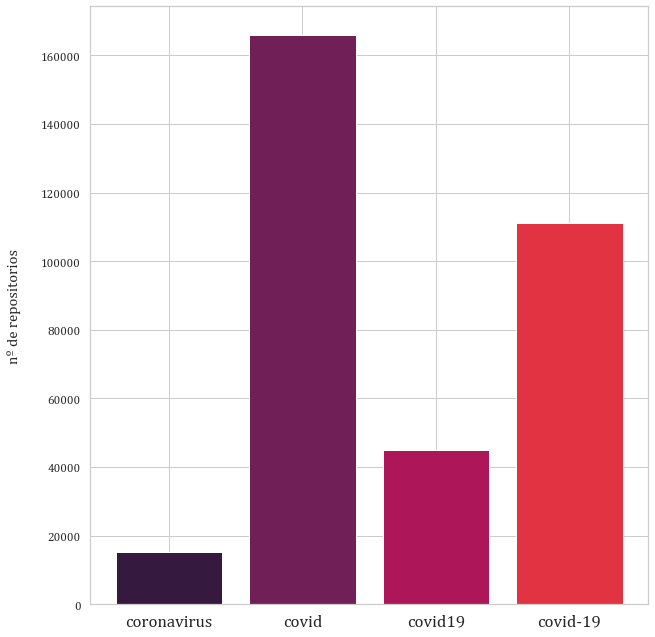

In [336]:
x = keywords
y = counts

plt.figure(figsize=(10,11))
plt.bar(x, y, color=color, align = 'center')
plt.ylabel('nº de repositorios', size=15, labelpad=20)

plt.tick_params(axis='x', which='major', labelsize=17)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.show()

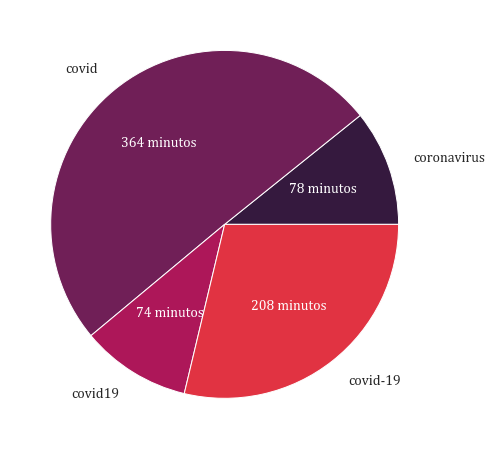

In [194]:
tiempos = [78, 364, 74, 208]

plt.figure(figsize=(10,8))
# Label distance: gives the space between labels and the center of the pie
_, _, autotexts = plt.pie(tiempos, labels=keywords, colors=color, autopct=lambda p:f'{p*sum(tiempos)/100 :.0f} minutos', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

# plt.title('Tiempo de generación en minutos', fontsize=20)
plt.show()

### Número de repositorios en función de dónde se encuentran palabras claves

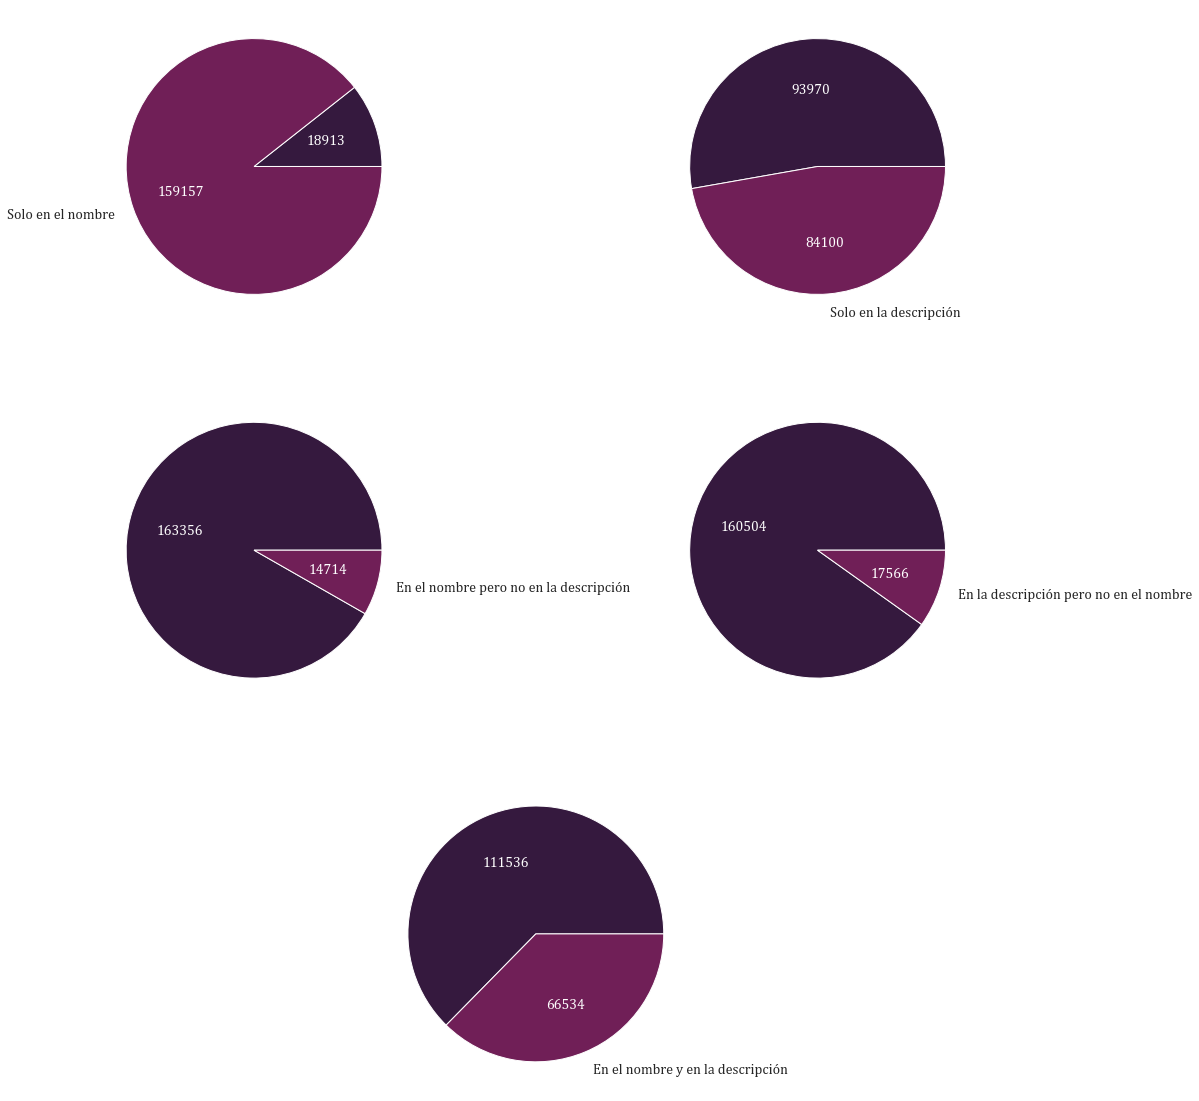

In [195]:
total = 178070 

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(wspace=0.02)

# fig.suptitle('Repositorios en función de la ubicación de las palabras claves', size=36)

# Gráfico 1 - Solo en el nombre
x = ["","Solo en el nombre"]
y = [total-159157, 159157]
ax1 = plt.subplot2grid((3,2),(0,0))
_, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')
    

# Gráfico 2 - Solo en la descripción
ax1 = plt.subplot2grid((3,2), (0, 1))
x = ["","Solo en la descripción"]
y = [total-84100, 84100]
_, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

# Gráfico 3 - En el nombre pero no en la descripción
ax1 = plt.subplot2grid((3,2), (1, 0))
x = ["","En el nombre pero no en la descripción"]
y = [total-14714, 14714]

_, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

# Gráfico 4 - En la descripción pero no en el nombre
ax1 = plt.subplot2grid((3,2), (1, 1))
x = ["","En la descripción pero no en el nombre"]
y = [total-17566, 17566]
_, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')
    
# Gráfico 5 - En el nombre y en la descripción
ax1 = plt.subplot2grid((3,2), (2, 0), colspan=2)
x = ["","En el nombre y en la descripción"]
y = [total-66534, 66534]
_, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

Código modificado para ser representado individualmente en tamaño mayor, de cara a la memoria:

In [213]:
# total = 178070 

# fig = plt.figure(figsize=(15,15))

# fig.suptitle('Repositorios en función de la ubicación de las palabras claves', size=36)

# Gráfico 1 - Solo en el nombre
# x = ["","Solo en el nombre"]
# y = [total-159157, 159157]
# _, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
#                           textprops={'fontsize': 22}, labeldistance=1.15)
# for autotext in autotexts:
#     autotext.set_color('white')
    

# # Gráfico 2 - Solo en la descripción
# ax1 = plt.subplot2grid((3,2), (0, 1))
# x = ["","Solo en la descripción"]
# y = [total-84100, 84100]
# _, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
#                           textprops={'fontsize': 22}, labeldistance=1.15)
# for autotext in autotexts:
#     autotext.set_color('white')

# # Gráfico 3 - En el nombre pero no en la descripción
# ax1 = plt.subplot2grid((3,2), (1, 0))
# x = ["","En el nombre pero \nno en la descripción"]
# y = [total-14714, 14714]

# _, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
#                           textprops={'fontsize': 22}, labeldistance=1.15)
# for autotext in autotexts:
#     autotext.set_color('white')

# # Gráfico 4 - En la descripción pero no en el nombre
# ax1 = plt.subplot2grid((3,2), (1, 1))
# x = ["","En la descripción pero \nno en el nombre"]
# y = [total-17566, 17566]
# _, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
#                           textprops={'fontsize': 22}, labeldistance=1.15)
# for autotext in autotexts:
#     autotext.set_color('white')
    
# # Gráfico 5 - En el nombre y en la descripción
# ax1 = plt.subplot2grid((3,2), (2, 0), colspan=2)
# x = ["","En el nombre y \nen la descripción"]
# y = [total-66534, 66534]
# _, _, autotexts = plt.pie(y, labels=x, colors=color, autopct=lambda p:f'{p*sum(y)/100 :.0f}', 
#                           textprops={'fontsize': 22}, labeldistance=1.15)
# for autotext in autotexts:
#     autotext.set_color('white')

### Repositorios creados antes de declararse pandemia

In [532]:
df = pd.read_csv('df_repositorios.csv')
df

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178065  269527538  OpenWeatherMap-concat-histories   
178066  270034436                    mzansi_corona   
178067  269906994              face-mask-detection   
178068  270013759                         frontend   
178069  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178065  ALT-F1/OpenWeatherMap-concat-histories   
178066             marvinIsSacul/mzansi_corona   
178067      jahnavi-prasad/face-mask-detection   
178068                        Tackode/frontend   
178069                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178065  Concatenate histories weather data collected b...   
178066  Flutter app about South Africa's Corona Virus ...   
178067  Simple project to detect if a person is wearin...   
178068                               Frontend for Tackode   
178069                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178065  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178066  https://api.github.com/repos/marvinIsSacul/mza...     False     False   
178067  https://api.github.com/repos/jahnavi-prasad/fa...     False     False   
178068  https://api.github.com/repos/Tackode/frontend/...     False     False   
178069  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178065                 1               1            0  ...          True   
178066                 0               0            0  ...          True   
178067                 6               6            7  ...          True   
178068                 0               0            0  ...          True   
178069                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

Actualizados antes de 2020:

In [533]:
df_anterior_2020_updated = df[df["updated_at"] < "2020-01-01"]
df_anterior_2020_updated = df_anterior_2020_updated[["id", "full_name", "description", "created_at", "pushed_at", "updated_at", "html_url"]]
df_anterior_2020_updated.sort_values(by=['updated_at'])

id                                  full_name  \
15386    2618529       prakash-netspective/covidien-gateway   
15587    7797677                          ramrudra/covidien   
15582   34158241                            tozimmer/covida   
15682   42319556                   cdevogt/covide-wordpress   
15625   42321742                          cdevogt/covide-wp   
531     46790113           smorfopoulou/coronavirus_genbank   
15800   63896251              AtillaSzikora/G_ANDROID_covid   
15681   64085813                  AndrasKesik/Android_Covid   
15585  106683801                       ashutoshsi333/Covide   
411    105979787                     sdwfrost/mers-analysis   
15779  183196269                       CocoYuki/CoVideoList   
677    196332961     Koohoko/Coronavirus_Bayseian_Modelling   
15667  225646868                     awconway/xml-covidence   
846    195876578  dmontecino/Eidolon_helvum_CoV_seasonality   

                                             description  \
15386                                   covidien-gateway   
15587                                                NaN   
15582  Automatically exported from code.google.com/p/...   
15682                                                NaN   
15625                                                NaN   
531                                                  NaN   
15800                                                NaN   
15681                                                NaN   
15585                                            covides   
411      Phylodynamics in R, applied to MERS Coronavirus   
15779                glide+Retrofit+RecycleView瀑布流点击播放视频   
677                       Coronavirus_Bayseian_Modelling   
15667                                                NaN   
846    Stan codes for logistic regressions fitted to ...   

                 created_at             pushed_at            updated_at  \
15386  2011-10-21T06:40:31Z  2011-10-21T11:33:52Z  2013-12-07T01:21:24Z   
15587  2013-01-24T12:39:12Z  2013-01-24T16:04:00Z  2014-07-10T06:58:27Z   
15582  2015-04-18T08:20:46Z  2015-04-18T08:29:07Z  2015-04-18T08:25:30Z   
15682  2015-09-11T16:23:39Z  2015-09-11T16:23:39Z  2015-09-11T16:23:39Z   
15625  2015-09-11T17:07:31Z  2015-09-11T17:07:39Z  2015-09-11T17:07:31Z   
531    2015-11-24T12:24:55Z  2015-11-24T12:33:08Z  2015-11-24T12:24:55Z   
15800  2016-07-21T19:20:00Z  2016-07-25T09:28:27Z  2016-07-21T19:21:54Z   
15681  2016-07-24T21:10:37Z  2016-07-24T21:13:57Z  2016-09-05T09:32:21Z   
15585  2017-10-12T11:27:19Z  2017-10-12T11:27:32Z  2017-10-12T11:27:19Z   
411    2017-10-06T07:49:06Z  2017-10-18T13:26:46Z  2019-04-13T04:19:51Z   
15779  2019-04-24T09:33:28Z  2019-05-13T11:35:09Z  2019-05-13T11:35:11Z   
677    2019-07-11T06:27:47Z  2019-08-14T10:50:04Z  2019-08-14T10:50:05Z   
15667  2019-12-03T14:59:23Z  2019-12-03T15:04:21Z  2019-12-03T15:04:24Z   
846    2019-07-08T19:47:56Z  2019-12-19T03:39:33Z  2019-12-19T03:39:35Z   

                                                html_url  
15386  https://github.com/prakash-netspective/covidie...  
15587               https://github.com/ramrudra/covidien  
15582                 https://github.com/tozimmer/covida  
15682        https://github.com/cdevogt/covide-wordpress  
15625               https://github.com/cdevogt/covide-wp  
531    https://github.com/smorfopoulou/coronavirus_ge...  
15800   https://github.com/AtillaSzikora/G_ANDROID_covid  
15681       https://github.com/AndrasKesik/Android_Covid  
15585            https://github.com/ashutoshsi333/Covide  
411            https://github.com/sdwfrost/mers-analysis  
15779            https://github.com/CocoYuki/CoVideoList  
677    https://github.com/Koohoko/Coronavirus_Bayseia...  
15667          https://github.com/awconway/xml-covidence  
846    https://github.com/dmontecino/Eidolon_helvum_C...

Creados antes de 2020:

In [534]:
df_anterior_2020_created = df[df["created_at"] < "2020-01-01"]
df_anterior_2020_created = df_anterior_2020_created[["id", "full_name", "description", "created_at", "pushed_at", "updated_at", "html_url"]]
df_anterior_2020_created

id                              full_name  \
72      229427465           Eddy-Arch/Hentai-discord-bot   
79      229502804  Perishleaf/data-visualisation-scripts   
128     216746155                 Daggron/No-coronavirus   
140     141635301   vinitshahdeo/Water-Monitoring-System   
150     210619242                lachhebo/corona-tracker   
...           ...                                    ...   
176858  175701328                       neocortix/ncscli   
176860  174684798                   fredeil/FuzzyMatcher   
176861  215429565                         mgudorf/datsci   
176864  194029871             Ram-95/Python_Applications   
176868  184951194   gavinlyonsrepo/pic_16F18313_projects   

                                              description  \
72      A NSFW hentai discord bot with extra functiona...   
79      Collection of scripts for data visualisation a...   
128                                                   NaN   
140     Water Monitoring System is an IOT based Liquid...   
150     a gnome shell extension to follow how the covi...   
...                                                   ...   
176858  ncscli is the command-line and python interfac...   
176860  Fuzzy-Matching algorithm using Jaro-Winkler di...   
176861  Data science projects for Springboard data sci...   
176864  :notebook_with_decorative_cover: Python Applic...   
176868  Projects for the Microchip PIC 16F18313 Microc...   

                  created_at             pushed_at            updated_at  \
72      2019-12-21T12:55:55Z  2021-07-18T09:53:05Z  2021-07-29T10:33:41Z   
79      2019-12-22T01:12:45Z  2020-08-06T12:06:03Z  2021-06-10T12:17:53Z   
128     2019-10-22T07:07:46Z  2020-03-28T18:16:03Z  2020-12-15T13:40:04Z   
140     2018-07-19T22:06:05Z  2021-06-09T18:42:30Z  2021-08-06T15:01:36Z   
150     2019-09-24T14:10:35Z  2021-07-14T07:52:28Z  2021-05-25T17:39:44Z   
...                      ...                   ...                   ...   
176858  2019-03-14T21:19:39Z  2021-08-11T20:02:53Z  2021-08-11T20:02:56Z   
176860  2019-03-09T11:19:10Z  2020-06-05T08:46:38Z  2020-06-05T08:49:39Z   
176861  2019-10-16T01:29:25Z  2021-03-24T18:45:36Z  2021-03-24T18:45:39Z   
176864  2019-06-27T05:41:20Z  2021-06-09T07:15:48Z  2021-06-09T07:15:50Z   
176868  2019-05-04T22:43:10Z  2021-04-08T21:21:11Z  2021-05-10T13:36:59Z   

                                                 html_url  
72        https://github.com/Eddy-Arch/Hentai-discord-bot  
79      https://github.com/Perishleaf/data-visualisati...  
128             https://github.com/Daggron/No-coronavirus  
140     https://github.com/vinitshahdeo/Water-Monitori...  
150            https://github.com/lachhebo/corona-tracker  
...                                                   ...  
176858                https://github.com/neocortix/ncscli  
176860            https://github.com/fredeil/FuzzyMatcher  
176861                  https://github.com/mgudorf/datsci  
176864      https://github.com/Ram-95/Python_Applications  
176868  https://github.com/gavinlyonsrepo/pic_16F18313...  

[230 rows x 7 columns]

-----

Conversión de fechas a tipo datetime de Pandas para mejor gestión:

In [536]:
df_anterior_2020_created["created_at"] = pd.to_datetime(df_anterior_2020_created['created_at'])
df_anterior_2020_created = df_anterior_2020_created.set_index("created_at")
df_anterior_2020_created

id                              full_name  \
created_at                                                                    
2019-12-21 12:55:55+00:00  229427465           Eddy-Arch/Hentai-discord-bot   
2019-12-22 01:12:45+00:00  229502804  Perishleaf/data-visualisation-scripts   
2019-10-22 07:07:46+00:00  216746155                 Daggron/No-coronavirus   
2018-07-19 22:06:05+00:00  141635301   vinitshahdeo/Water-Monitoring-System   
2019-09-24 14:10:35+00:00  210619242                lachhebo/corona-tracker   
...                              ...                                    ...   
2019-03-14 21:19:39+00:00  175701328                       neocortix/ncscli   
2019-03-09 11:19:10+00:00  174684798                   fredeil/FuzzyMatcher   
2019-10-16 01:29:25+00:00  215429565                         mgudorf/datsci   
2019-06-27 05:41:20+00:00  194029871             Ram-95/Python_Applications   
2019-05-04 22:43:10+00:00  184951194   gavinlyonsrepo/pic_16F18313_projects   

                                                                 description  \
created_at                                                                     
2019-12-21 12:55:55+00:00  A NSFW hentai discord bot with extra functiona...   
2019-12-22 01:12:45+00:00  Collection of scripts for data visualisation a...   
2019-10-22 07:07:46+00:00                                                NaN   
2018-07-19 22:06:05+00:00  Water Monitoring System is an IOT based Liquid...   
2019-09-24 14:10:35+00:00  a gnome shell extension to follow how the covi...   
...                                                                      ...   
2019-03-14 21:19:39+00:00  ncscli is the command-line and python interfac...   
2019-03-09 11:19:10+00:00  Fuzzy-Matching algorithm using Jaro-Winkler di...   
2019-10-16 01:29:25+00:00  Data science projects for Springboard data sci...   
2019-06-27 05:41:20+00:00  :notebook_with_decorative_cover: Python Applic...   
2019-05-04 22:43:10+00:00  Projects for the Microchip PIC 16F18313 Microc...   

                                      pushed_at            updated_at  \
created_at                                                              
2019-12-21 12:55:55+00:00  2021-07-18T09:53:05Z  2021-07-29T10:33:41Z   
2019-12-22 01:12:45+00:00  2020-08-06T12:06:03Z  2021-06-10T12:17:53Z   
2019-10-22 07:07:46+00:00  2020-03-28T18:16:03Z  2020-12-15T13:40:04Z   
2018-07-19 22:06:05+00:00  2021-06-09T18:42:30Z  2021-08-06T15:01:36Z   
2019-09-24 14:10:35+00:00  2021-07-14T07:52:28Z  2021-05-25T17:39:44Z   
...                                         ...                   ...   
2019-03-14 21:19:39+00:00  2021-08-11T20:02:53Z  2021-08-11T20:02:56Z   
2019-03-09 11:19:10+00:00  2020-06-05T08:46:38Z  2020-06-05T08:49:39Z   
2019-10-16 01:29:25+00:00  2021-03-24T18:45:36Z  2021-03-24T18:45:39Z   
2019-06-27 05:41:20+00:00  2021-06-09T07:15:48Z  2021-06-09T07:15:50Z   
2019-05-04 22:43:10+00:00  2021-04-08T21:21:11Z  2021-05-10T13:36:59Z   

                                                                    html_url  
created_at                                                                    
2019-12-21 12:55:55+00:00    https://github.com/Eddy-Arch/Hentai-discord-bot  
2019-12-22 01:12:45+00:00  https://github.com/Perishleaf/data-visualisati...  
2019-10-22 07:07:46+00:00          https://github.com/Daggron/No-coronavirus  
2018-07-19 22:06:05+00:00  https://github.com/vinitshahdeo/Water-Monitori...  
2019-09-24 14:10:35+00:00         https://github.com/lachhebo/corona-tracker  
...                                                                      ...  
2019-03-14 21:19:39+00:00                https://github.com/neocortix/ncscli  
2019-03-09 11:19:10+00:00            https://github.com/fredeil/FuzzyMatcher  
2019-10-16 01:29:25+00:00                  https://github.com/mgudorf/datsci  
2019-06-27 05:41:20+00:00      https://github.com/Ram-95/Python_Applications  
2019-05-04 22:43:10+00:00  https://github.com/gavinlyonsrepo/pic_16

In [72]:
show(df_anterior_2020_created)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [537]:
df_anterior_2020_created.index = df_anterior_2020_created.index.strftime('%Y-%m')
df_anterior_2020_created

id                              full_name  \
created_at                                                     
2019-12     229427465           Eddy-Arch/Hentai-discord-bot   
2019-12     229502804  Perishleaf/data-visualisation-scripts   
2019-10     216746155                 Daggron/No-coronavirus   
2018-07     141635301   vinitshahdeo/Water-Monitoring-System   
2019-09     210619242                lachhebo/corona-tracker   
...               ...                                    ...   
2019-03     175701328                       neocortix/ncscli   
2019-03     174684798                   fredeil/FuzzyMatcher   
2019-10     215429565                         mgudorf/datsci   
2019-06     194029871             Ram-95/Python_Applications   
2019-05     184951194   gavinlyonsrepo/pic_16F18313_projects   

                                                  description  \
created_at                                                      
2019-12     A NSFW hentai discord bot with extra functiona...   
2019-12     Collection of scripts for data visualisation a...   
2019-10                                                   NaN   
2018-07     Water Monitoring System is an IOT based Liquid...   
2019-09     a gnome shell extension to follow how the covi...   
...                                                       ...   
2019-03     ncscli is the command-line and python interfac...   
2019-03     Fuzzy-Matching algorithm using Jaro-Winkler di...   
2019-10     Data science projects for Springboard data sci...   
2019-06     :notebook_with_decorative_cover: Python Applic...   
2019-05     Projects for the Microchip PIC 16F18313 Microc...   

                       pushed_at            updated_at  \
created_at                                               
2019-12     2021-07-18T09:53:05Z  2021-07-29T10:33:41Z   
2019-12     2020-08-06T12:06:03Z  2021-06-10T12:17:53Z   
2019-10     2020-03-28T18:16:03Z  2020-12-15T13:40:04Z   
2018-07     2021-06-09T18:42:30Z  2021-08-06T15:01:36Z   
2019-09     2021-07-14T07:52:28Z  2021-05-25T17:39:44Z   
...                          ...                   ...   
2019-03     2021-08-11T20:02:53Z  2021-08-11T20:02:56Z   
2019-03     2020-06-05T08:46:38Z  2020-06-05T08:49:39Z   
2019-10     2021-03-24T18:45:36Z  2021-03-24T18:45:39Z   
2019-06     2021-06-09T07:15:48Z  2021-06-09T07:15:50Z   
2019-05     2021-04-08T21:21:11Z  2021-05-10T13:36:59Z   

                                                     html_url  
created_at                                                     
2019-12       https://github.com/Eddy-Arch/Hentai-discord-bot  
2019-12     https://github.com/Perishleaf/data-visualisati...  
2019-10             https://github.com/Daggron/No-coronavirus  
2018-07     https://github.com/vinitshahdeo/Water-Monitori...  
2019-09            https://github.com/lachhebo/corona-tracker  
...                                                       ...  
2019-03                   https://github.com/neocortix/ncscli  
2019-03               https://github.com/fredeil/FuzzyMatcher  
2019-10                     https://github.com/mgudorf/datsci  
2019-06         https://github.com/Ram-95/Python_Applications  
2019-05     https://github.com/gavinlyonsrepo/pic_16F18313...  

[230 rows x 6 columns]

In [538]:
df2 = df_anterior_2020_created.groupby([df_anterior_2020_created.index]).size()
df2

created_at
2011-10     1
2011-11     1
2013-01     1
2014-04     1
2014-06     1
2014-12     1
2015-01     1
2015-03     1
2015-04     2
2015-06     2
2015-08     2
2015-09     3
2015-11     1
2016-05     1
2016-06     1
2016-07     2
2016-08     3
2016-09     1
2016-11     2
2017-02     3
2017-03     1
2017-06     2
2017-07     4
2017-08     1
2017-09     1
2017-10     3
2017-11     4
2017-12     1
2018-01     1
2018-03     3
2018-04     2
2018-05     2
2018-06     5
2018-07     6
2018-08     2
2018-09     5
2018-10     2
2018-11     3
2018-12     2
2019-01     5
2019-02     6
2019-03     8
2019-04     8
2019-05     6
2019-06     7
2019-07    13
2019-08    17
2019-09    17
2019-10    19
2019-11    16
2019-12    27
dtype: int64

In [539]:
df2.loc["2011-10":"2019-12"].sum()

230

In [544]:
fig = plt.figure(figsize=(20,10))
g = sns.lineplot(data = df2.loc["2011-10":"2019-12"], color=color[0])
plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Fecha de creación', size=17, labelpad=20) 
plt.yticks(np.arange(0, 30, 2))
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.show()

Quitamos los 14 repositorios que estén incluidos en los 230 obtenidos:

In [521]:
comun = df_anterior_2020_created.merge(df_anterior_2020_updated,on=['id'])

df_anterior_2020_created = df_anterior_2020_created[(~df_anterior_2020_created.id.isin(comun.id))&(~df_anterior_2020_created.id.isin(comun.id))]
df_anterior_2020_created

id                              full_name  \
72      229427465           Eddy-Arch/Hentai-discord-bot   
79      229502804  Perishleaf/data-visualisation-scripts   
128     216746155                 Daggron/No-coronavirus   
140     141635301   vinitshahdeo/Water-Monitoring-System   
150     210619242                lachhebo/corona-tracker   
...           ...                                    ...   
176858  175701328                       neocortix/ncscli   
176860  174684798                   fredeil/FuzzyMatcher   
176861  215429565                         mgudorf/datsci   
176864  194029871             Ram-95/Python_Applications   
176868  184951194   gavinlyonsrepo/pic_16F18313_projects   

                                              description  \
72      A NSFW hentai discord bot with extra functiona...   
79      Collection of scripts for data visualisation a...   
128                                                   NaN   
140     Water Monitoring System is an IOT based Liquid...   
150     a gnome shell extension to follow how the covi...   
...                                                   ...   
176858  ncscli is the command-line and python interfac...   
176860  Fuzzy-Matching algorithm using Jaro-Winkler di...   
176861  Data science projects for Springboard data sci...   
176864  :notebook_with_decorative_cover: Python Applic...   
176868  Projects for the Microchip PIC 16F18313 Microc...   

                  created_at             pushed_at            updated_at  \
72      2019-12-21T12:55:55Z  2021-07-18T09:53:05Z  2021-07-29T10:33:41Z   
79      2019-12-22T01:12:45Z  2020-08-06T12:06:03Z  2021-06-10T12:17:53Z   
128     2019-10-22T07:07:46Z  2020-03-28T18:16:03Z  2020-12-15T13:40:04Z   
140     2018-07-19T22:06:05Z  2021-06-09T18:42:30Z  2021-08-06T15:01:36Z   
150     2019-09-24T14:10:35Z  2021-07-14T07:52:28Z  2021-05-25T17:39:44Z   
...                      ...                   ...                   ...   
176858  2019-03-14T21:19:39Z  2021-08-11T20:02:53Z  2021-08-11T20:02:56Z   
176860  2019-03-09T11:19:10Z  2020-06-05T08:46:38Z  2020-06-05T08:49:39Z   
176861  2019-10-16T01:29:25Z  2021-03-24T18:45:36Z  2021-03-24T18:45:39Z   
176864  2019-06-27T05:41:20Z  2021-06-09T07:15:48Z  2021-06-09T07:15:50Z   
176868  2019-05-04T22:43:10Z  2021-04-08T21:21:11Z  2021-05-10T13:36:59Z   

                                                 html_url  
72        https://github.com/Eddy-Arch/Hentai-discord-bot  
79      https://github.com/Perishleaf/data-visualisati...  
128             https://github.com/Daggron/No-coronavirus  
140     https://github.com/vinitshahdeo/Water-Monitori...  
150            https://github.com/lachhebo/corona-tracker  
...                                                   ...  
176858                https://github.com/neocortix/ncscli  
176860            https://github.com/fredeil/FuzzyMatcher  
176861                  https://github.com/mgudorf/datsci  
176864      https://github.com/Ram-95/Python_Applications  
176868  https://github.com/gavinlyonsrepo/pic_16F18313...  

[216 rows x 7 columns]

Los analizamos manualmente:

In [7]:
show(df_anterior_2020_created)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


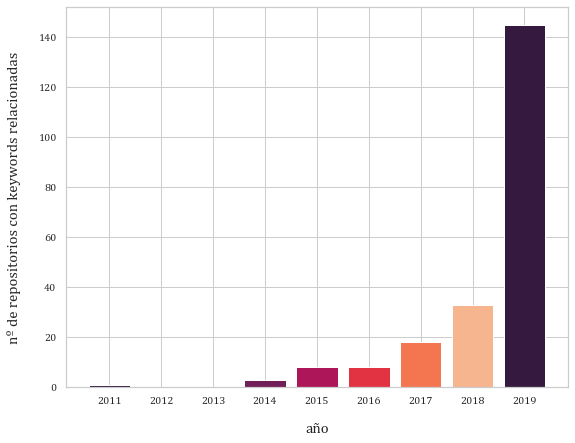

In [535]:
x = [2011, 2014, 2015, 2016, 2017, 2018, 2019]
y = [1, 3, 8, 8, 18, 33, 145]

plt.figure(figsize=(9,7))
plt.bar(x, y, color=color, align = 'center')
plt.xticks(np.arange(2011, 2020, 1))
plt.ylabel('nº de repositorios con keywords relacionadas', size=15, labelpad=17)
plt.xlabel('año', size=15, labelpad=17)

plt.show()

De estos 216, 13 son inválidos. En total, 203 son los repositorios válidos creados hasta finales de diciembre de 2019.

In [507]:
# Lista con los ids de los repositorios inválidos
invalidos = [2618529, 7797677, 34158241, 42319556, 42321742, 46790113, 63896251, 64085813, 106683801, 105979787, 
             183196269, 196332961, 225646868, 195876578,  209656058, 231134405, 216056228, 140326771, 172798234, 
             229122289, 21244714, 93610140, 175701328, 194225243, 150090997, 197573508, 213540232]

### Repositorios relacionados

In [58]:
df = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

In [4]:
show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


#### Con fecha de creación

In [59]:
df_created = df.copy()
df_created["created_at"] = pd.to_datetime(df_created['created_at'])
df_created = df_created.set_index("created_at")
df_created

id                             name  \
created_at                                                              
2020-02-04 22:03:53+00:00  238316428                         COVID-19   
2020-01-21 15:27:23+00:00  235374822                         COVID-19   
2020-02-11 14:08:06+00:00  239777191                      coronavirus   
2020-01-30 03:12:19+00:00  237129709                      coronavirus   
2020-01-19 17:23:17+00:00  234936988                             ncov   
...                              ...                              ...   
2020-06-02 16:46:15+00:00  268856502               iot-contact-tracer   
2020-06-04 22:35:16+00:00  269479371                          jupyter   
2020-06-05 04:04:46+00:00  269527538  OpenWeatherMap-concat-histories   
2020-06-06 14:57:50+00:00  270013759                         frontend   
2020-06-06 14:30:13+00:00  270006438                          backend   

                                                        full_name  \
created_at                                                          
2020-02-04 22:03:53+00:00                 CSSEGISandData/COVID-19   
2020-01-21 15:27:23+00:00                  midas-network/COVID-19   
2020-02-11 14:08:06+00:00                 RamiKrispin/coronavirus   
2020-01-30 03:12:19+00:00               FoldingAtHome/coronavirus   
2020-01-19 17:23:17+00:00                         nextstrain/ncov   
...                                                           ...   
2020-06-02 16:46:15+00:00                 fwcd/iot-contact-tracer   
2020-06-04 22:35:16+00:00                           kclhi/jupyter   
2020-06-05 04:04:46+00:00  ALT-F1/OpenWeatherMap-concat-histories   
2020-06-06 14:57:50+00:00                        Tackode/frontend   
2020-06-06 14:30:13+00:00                         Tackode/backend   

                                                                 description  \
created_at                                                                     
2020-02-04 22:03:53+00:00  Novel Coronavirus (COVID-19) Cases, provided b...   
2020-01-21 15:27:23+00:00                  2019 novel coronavirus repository   
2020-02-11 14:08:06+00:00                            The coronavirus dataset   
2020-01-30 03:12:19+00:00                      Folding@home COVID-19 efforts   
2020-01-19 17:23:17+00:00  Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                                      ...   
2020-06-02 16:46:15+00:00  Decentralized contact tracing system supportin...   
2020-06-04 22:35:16+00:00           :whale2: JupyterHub Docker configuration   
2020-06-05 04:04:46+00:00  Concatenate histories weather data collected b...   
2020-06-06 14:57:50+00:00                               Frontend for Tackode   
2020-06-06 14:30:13+00:00                                Backend for Tackode   

                                                            contributors_url  \
created_at                                                                     
2020-02-04 22:03:53+00:00  https://api.github.com/repos/CSSEGISandData/CO...   
2020-01-21 15:27:23+00:00  https://api.github.com/repos/midas-network/COV...   
2020-02-11 14:08:06+00:00  https://api.github.com/repos/RamiKrispin/coron...   
2020-01-30 03:12:19+00:00  https://api.github.com/repos/FoldingAtHome/cor...   
2020-01-19 17:23:17+00:00  https://api.github.com/repos/nextstrain/ncov/c...   
...                                                                      ...   
2020-06-02 16:46:15+00:00  https://api.github.com/repos/fwcd/iot-contact-...   
2020-06-04 22:35:16+00:00  https://api.github.com/repos/kclhi/jupyter/con...   
2020-06-05 04:04:46+00:00  https://api.github.com/repos/ALT-F1/OpenWeathe...   
2020-06-06 14:57:50+00:00  https://api.github.com/repos/Tackode/frontend/...   
2020-06-06 14:30:13+00:00  https://api.github.com/repos/Tackode/backend/c...   

                           archived  disabled  stargazers_count  \
created_at                           

In [60]:
df_created_dias = df_created.copy()
df_created_dias.index = df_created_dias.index.strftime('%Y-%m-%d')
df_created_dias

id                             name  \
created_at                                               
2020-02-04  238316428                         COVID-19   
2020-01-21  235374822                         COVID-19   
2020-02-11  239777191                      coronavirus   
2020-01-30  237129709                      coronavirus   
2020-01-19  234936988                             ncov   
...               ...                              ...   
2020-06-02  268856502               iot-contact-tracer   
2020-06-04  269479371                          jupyter   
2020-06-05  269527538  OpenWeatherMap-concat-histories   
2020-06-06  270013759                         frontend   
2020-06-06  270006438                          backend   

                                         full_name  \
created_at                                           
2020-02-04                 CSSEGISandData/COVID-19   
2020-01-21                  midas-network/COVID-19   
2020-02-11                 RamiKrispin/coronavirus   
2020-01-30               FoldingAtHome/coronavirus   
2020-01-19                         nextstrain/ncov   
...                                            ...   
2020-06-02                 fwcd/iot-contact-tracer   
2020-06-04                           kclhi/jupyter   
2020-06-05  ALT-F1/OpenWeatherMap-concat-histories   
2020-06-06                        Tackode/frontend   
2020-06-06                         Tackode/backend   

                                                  description  \
created_at                                                      
2020-02-04  Novel Coronavirus (COVID-19) Cases, provided b...   
2020-01-21                  2019 novel coronavirus repository   
2020-02-11                            The coronavirus dataset   
2020-01-30                      Folding@home COVID-19 efforts   
2020-01-19  Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                       ...   
2020-06-02  Decentralized contact tracing system supportin...   
2020-06-04           :whale2: JupyterHub Docker configuration   
2020-06-05  Concatenate histories weather data collected b...   
2020-06-06                               Frontend for Tackode   
2020-06-06                                Backend for Tackode   

                                             contributors_url  archived  \
created_at                                                                
2020-02-04  https://api.github.com/repos/CSSEGISandData/CO...     False   
2020-01-21  https://api.github.com/repos/midas-network/COV...     False   
2020-02-11  https://api.github.com/repos/RamiKrispin/coron...     False   
2020-01-30  https://api.github.com/repos/FoldingAtHome/cor...     False   
2020-01-19  https://api.github.com/repos/nextstrain/ncov/c...     False   
...                                                       ...       ...   
2020-06-02  https://api.github.com/repos/fwcd/iot-contact-...     False   
2020-06-04  https://api.github.com/repos/kclhi/jupyter/con...     False   
2020-06-05  https://api.github.com/repos/ALT-F1/OpenWeathe...     False   
2020-06-06  https://api.github.com/repos/Tackode/frontend/...     False   
2020-06-06  https://api.github.com/repos/Tackode/backend/c...     False   

            disabled  stargazers_count  watchers_count  forks_count  ...  \
created_at                                                           ...   
2020-02-04     False             27211           27211        17432  ...   
2020-01-21     False               642             642          221  ...   
2020-02-11     False               394             394          175  ...   
2020-01-30     False              1115            1115           87  ...   
2020-01-19     False              1208            1208          343  ...   
...              ...               ...             ...          ...  ...   
2020-06-02     False                 1               1            0  ...   
2020-06-04     False                 2               2 

In [61]:
df_created_meses = df_created.copy()
df_created_meses.index = df_created_meses.index.strftime('%Y-%m')
df_created_meses

id                             name  \
created_at                                               
2020-02     238316428                         COVID-19   
2020-01     235374822                         COVID-19   
2020-02     239777191                      coronavirus   
2020-01     237129709                      coronavirus   
2020-01     234936988                             ncov   
...               ...                              ...   
2020-06     268856502               iot-contact-tracer   
2020-06     269479371                          jupyter   
2020-06     269527538  OpenWeatherMap-concat-histories   
2020-06     270013759                         frontend   
2020-06     270006438                          backend   

                                         full_name  \
created_at                                           
2020-02                    CSSEGISandData/COVID-19   
2020-01                     midas-network/COVID-19   
2020-02                    RamiKrispin/coronavirus   
2020-01                  FoldingAtHome/coronavirus   
2020-01                            nextstrain/ncov   
...                                            ...   
2020-06                    fwcd/iot-contact-tracer   
2020-06                              kclhi/jupyter   
2020-06     ALT-F1/OpenWeatherMap-concat-histories   
2020-06                           Tackode/frontend   
2020-06                            Tackode/backend   

                                                  description  \
created_at                                                      
2020-02     Novel Coronavirus (COVID-19) Cases, provided b...   
2020-01                     2019 novel coronavirus repository   
2020-02                               The coronavirus dataset   
2020-01                         Folding@home COVID-19 efforts   
2020-01     Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                       ...   
2020-06     Decentralized contact tracing system supportin...   
2020-06              :whale2: JupyterHub Docker configuration   
2020-06     Concatenate histories weather data collected b...   
2020-06                                  Frontend for Tackode   
2020-06                                   Backend for Tackode   

                                             contributors_url  archived  \
created_at                                                                
2020-02     https://api.github.com/repos/CSSEGISandData/CO...     False   
2020-01     https://api.github.com/repos/midas-network/COV...     False   
2020-02     https://api.github.com/repos/RamiKrispin/coron...     False   
2020-01     https://api.github.com/repos/FoldingAtHome/cor...     False   
2020-01     https://api.github.com/repos/nextstrain/ncov/c...     False   
...                                                       ...       ...   
2020-06     https://api.github.com/repos/fwcd/iot-contact-...     False   
2020-06     https://api.github.com/repos/kclhi/jupyter/con...     False   
2020-06     https://api.github.com/repos/ALT-F1/OpenWeathe...     False   
2020-06     https://api.github.com/repos/Tackode/frontend/...     False   
2020-06     https://api.github.com/repos/Tackode/backend/c...     False   

            disabled  stargazers_count  watchers_count  forks_count  ...  \
created_at                                                           ...   
2020-02        False             27211           27211        17432  ...   
2020-01        False               642             642          221  ...   
2020-02        False               394             394          175  ...   
2020-01        False              1115            1115           87  ...   
2020-01        False              1208            1208          343  ...   
...              ...               ...             ...          ...  ...   
2020-06        False                 1               1            0  ...   
2020-06        False                 2               2 

In [62]:
df_created_meses_grouped = df_created.groupby([df_created_meses.index]).size()
df_created_meses_grouped

created_at
2011-11        1
2014-04        1
2014-12        1
2015-01        1
2015-03        1
           ...  
2021-03     6312
2021-04     7466
2021-05    10187
2021-06     7660
2021-07     5926
Length: 65, dtype: int64

In [63]:
df_created_meses_grouped.values

array([    1,     1,     1,     1,     1,     1,     2,     2,     1,
           1,     1,     2,     1,     2,     3,     1,     1,     4,
           1,     1,     1,     4,     1,     1,     3,     2,     2,
           5,     5,     2,     4,     2,     3,     2,     5,     5,
           7,     7,     6,     6,    10,    17,    16,    17,    16,
          24,   249,  1091, 22806, 27299, 15955, 11101, 10433,  9015,
        7981,  7568,  7346,  7037,  6739,  5666,  6312,  7466, 10187,
        7660,  5926], dtype=int64)

In [64]:
df_created_dias_grouped = df_created.groupby([df_created_dias.index]).size()
df_created_dias_grouped

created_at
2011-11-30      1
2014-04-06      1
2014-12-30      1
2015-01-05      1
2015-03-29      1
             ... 
2021-07-21    206
2021-07-22    217
2021-07-23    219
2021-07-24    233
2021-07-25    213
Length: 733, dtype: int64

In [65]:
df_created_dias_grouped = df_created_dias_grouped.sort_values(ascending=False)
df_created_dias_grouped

created_at
2020-03-28    1431
2020-03-29    1394
2020-03-22    1392
2020-03-30    1316
2020-03-27    1309
              ... 
2019-07-31       1
2019-07-15       1
2019-07-12       1
2019-07-10       1
2011-11-30       1
Length: 733, dtype: int64

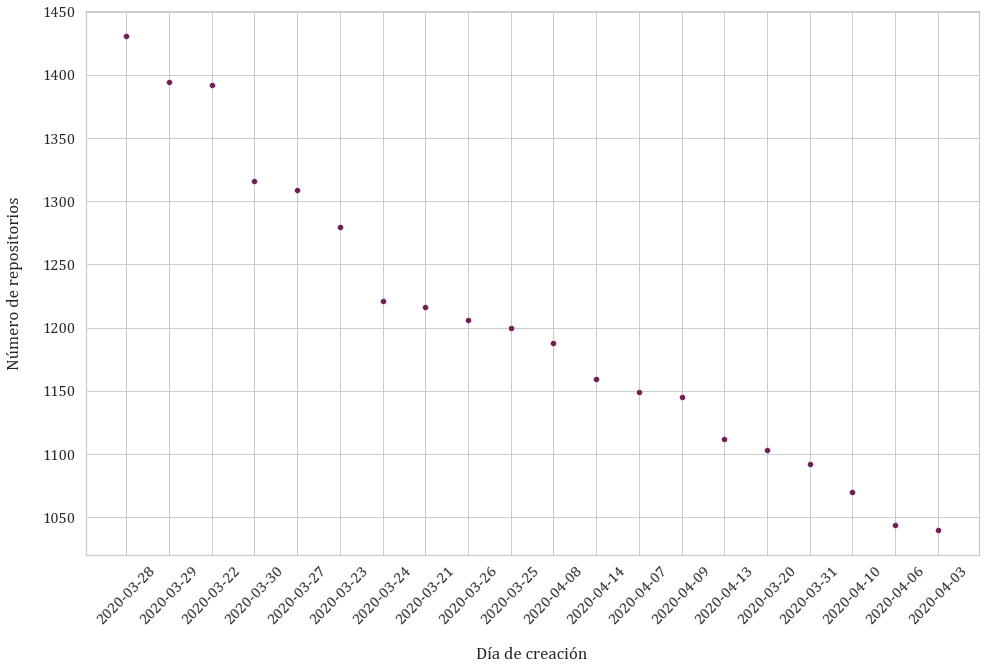

In [215]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = df_created_dias_grouped.index[:20], y = df_created_dias_grouped.values[:20], color=color[1])
plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Día de creación', size=17, labelpad=20) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

-------

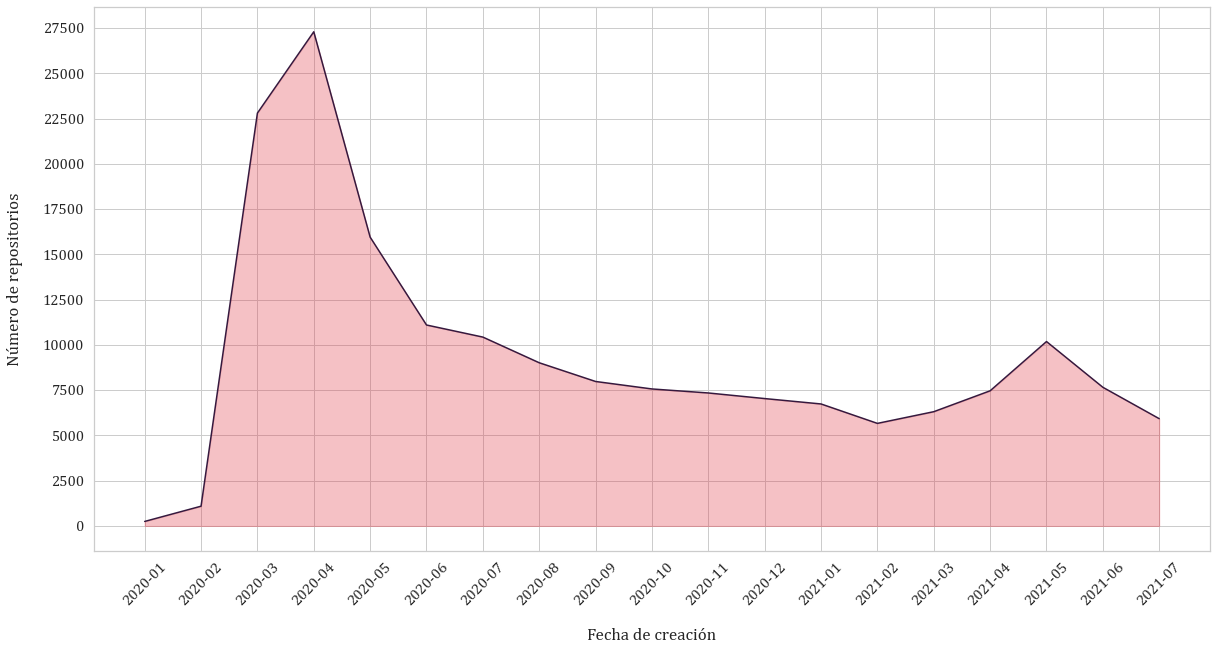

In [214]:
fig = plt.figure(figsize=(20,10))

g = sns.lineplot(data = df_created_meses_grouped.loc["2020-01":"2021-07"], color=color[0])
g.fill_between(df_created_meses_grouped.loc["2020-01":"2021-07"].index, 
               df_created_meses_grouped.loc["2020-01":"2021-07"].values, color=color[3], alpha=0.3)

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Fecha de creación', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Número de casos

In [51]:
df_covid = pd.read_csv('owid-covid-data.csv')
df_covid

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1           AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...         ...       ...          ...         ...          ...        ...   
115888      ZWE    Africa     Zimbabwe  2021-09-06     125671.0      121.0   
115889      ZWE    Africa     Zimbabwe  2021-09-07     125796.0      125.0   
115890      ZWE    Africa     Zimbabwe  2021-09-08     125931.0      135.0   
115891      ZWE    Africa     Zimbabwe  2021-09-09     126056.0      125.0   
115892      ZWE    Africa     Zimbabwe  2021-09-10     126163.0      107.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
115888             155.714        4493.0        11.0               11.000   
115889             146.143        4503.0        10.0               12.000   
115890             138.714        4517.0        14.0               11.286   
115891             134.000        4521.0         4.0               10.286   
115892             118.857        4532.0        11.0               10.714   

        ...  extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0       ...              NaN                597.029                 9.59   
1       ...              NaN                597.029                 9.59   
2       ...              NaN                597.029                 9.59   
3       ...              NaN                597.029                 9.59   
4       ...              NaN                597.029                 9.59   
...     ...              ...                    ...                  ...   
115888  ...             21.4                307.846                 1.82   
115889  ...             21.4                307.846                 1.82   
115890  ...             21.4                307.846                 1.82   
115891  ...             21.4                307.846                 1.82   
115892  ...             21.4                307.846                 1.82   

        female_smokers  male_smokers  handwashing_facilities  \
0                  NaN           NaN                  37.746   
1                  NaN           NaN                  37.746   
2                  NaN           NaN                  37.746   
3                  NaN           NaN                  37.746   
4                  NaN           NaN                  37.746   
...                ...           ...                     ...   
115888             1.6          30.7                  36.791   
115889             1.6          30.7                  36.791   
115890             1.6          30.7                  36.791   
115891             1.6          30.7                  36.791   
115892             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83            

Nos quedamos solo con las columnas de interés:

In [52]:
df_covid = df_covid[["iso_code", "location", "date", "new_cases", "new_deaths", "total_cases", "total_deaths"]]
df_covid

iso_code     location        date  new_cases  new_deaths  total_cases  \
0           AFG  Afghanistan  2020-02-24        1.0         NaN          1.0   
1           AFG  Afghanistan  2020-02-25        0.0         NaN          1.0   
2           AFG  Afghanistan  2020-02-26        0.0         NaN          1.0   
3           AFG  Afghanistan  2020-02-27        0.0         NaN          1.0   
4           AFG  Afghanistan  2020-02-28        0.0         NaN          1.0   
...         ...          ...         ...        ...         ...          ...   
115888      ZWE     Zimbabwe  2021-09-06      121.0        11.0     125671.0   
115889      ZWE     Zimbabwe  2021-09-07      125.0        10.0     125796.0   
115890      ZWE     Zimbabwe  2021-09-08      135.0        14.0     125931.0   
115891      ZWE     Zimbabwe  2021-09-09      125.0         4.0     126056.0   
115892      ZWE     Zimbabwe  2021-09-10      107.0        11.0     126163.0   

        total_deaths  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
115888        4493.0  
115889        4503.0  
115890        4517.0  
115891        4521.0  
115892        4532.0  

[115893 rows x 7 columns]

Seleccionamos la evolución mundial:

In [53]:
df_world = df_covid[df_covid.iso_code == "OWID_WRL"]
df_world

iso_code location        date  new_cases  new_deaths  total_cases  \
113694  OWID_WRL    World  2020-01-22        0.0         0.0        557.0   
113695  OWID_WRL    World  2020-01-23       98.0         1.0        655.0   
113696  OWID_WRL    World  2020-01-24      286.0         8.0        941.0   
113697  OWID_WRL    World  2020-01-25      492.0        16.0       1433.0   
113698  OWID_WRL    World  2020-01-26      685.0        14.0       2118.0   
...          ...      ...         ...        ...         ...          ...   
114287  OWID_WRL    World  2021-09-06   435867.0      7927.0  221211300.0   
114288  OWID_WRL    World  2021-09-07   721592.0      9873.0  221932892.0   
114289  OWID_WRL    World  2021-09-08   626911.0     10116.0  222559803.0   
114290  OWID_WRL    World  2021-09-09   620688.0      9327.0  223180491.0   
114291  OWID_WRL    World  2021-09-10   667593.0     11125.0  223848084.0   

        total_deaths  
113694          17.0  
113695          18.0  
113696          26.0  
113697          42.0  
113698          56.0  
...              ...  
114287     4576405.0  
114288     4586278.0  
114289     4596394.0  
114290     4605721.0  
114291     4616846.0  

[598 rows x 7 columns]

In [54]:
df_world["date"] = pd.to_datetime(df_world['date'])
df_world = df_world.set_index("date")
df_world

iso_code location  new_cases  new_deaths  total_cases  \
date                                                                
2020-01-22  OWID_WRL    World        0.0         0.0        557.0   
2020-01-23  OWID_WRL    World       98.0         1.0        655.0   
2020-01-24  OWID_WRL    World      286.0         8.0        941.0   
2020-01-25  OWID_WRL    World      492.0        16.0       1433.0   
2020-01-26  OWID_WRL    World      685.0        14.0       2118.0   
...              ...      ...        ...         ...          ...   
2021-09-06  OWID_WRL    World   435867.0      7927.0  221211300.0   
2021-09-07  OWID_WRL    World   721592.0      9873.0  221932892.0   
2021-09-08  OWID_WRL    World   626911.0     10116.0  222559803.0   
2021-09-09  OWID_WRL    World   620688.0      9327.0  223180491.0   
2021-09-10  OWID_WRL    World   667593.0     11125.0  223848084.0   

            total_deaths  
date                      
2020-01-22          17.0  
2020-01-23          18.0  
2020-01-24          26.0  
2020-01-25          42.0  
2020-01-26          56.0  
...                  ...  
2021-09-06     4576405.0  
2021-09-07     4586278.0  
2021-09-08     4596394.0  
2021-09-09     4605721.0  
2021-09-10     4616846.0  

[598 rows x 6 columns]

In [55]:
df_world_meses = df_world.copy()
df_world_meses.index = df_world_meses.index.strftime('%Y-%m')
df_world_meses

iso_code location  new_cases  new_deaths  total_cases  total_deaths
date                                                                        
2020-01  OWID_WRL    World        0.0         0.0        557.0          17.0
2020-01  OWID_WRL    World       98.0         1.0        655.0          18.0
2020-01  OWID_WRL    World      286.0         8.0        941.0          26.0
2020-01  OWID_WRL    World      492.0        16.0       1433.0          42.0
2020-01  OWID_WRL    World      685.0        14.0       2118.0          56.0
...           ...      ...        ...         ...          ...           ...
2021-09  OWID_WRL    World   435867.0      7927.0  221211300.0     4576405.0
2021-09  OWID_WRL    World   721592.0      9873.0  221932892.0     4586278.0
2021-09  OWID_WRL    World   626911.0     10116.0  222559803.0     4596394.0
2021-09  OWID_WRL    World   620688.0      9327.0  223180491.0     4605721.0
2021-09  OWID_WRL    World   667593.0     11125.0  223848084.0     4616846.0

[598 rows x 6 columns]

In [56]:
df_world_meses_grouped = df_world_meses.groupby([df_world_meses.index]).sum()
df_world_meses_grouped

new_cases  new_deaths   total_cases  total_deaths
date                                                       
2020-01      9370.0       196.0  3.853800e+04         889.0
2020-02     76087.0      2730.0  1.672035e+06       46911.0
2020-03    790504.0     41737.0  9.064084e+06      400533.0
2020-04   2405655.0    196352.0  6.361958e+07     4400958.0
2020-05   2905980.0    149984.0  1.452323e+08     9985916.0
2020-06   4269772.0    145102.0  2.466585e+08    13973204.0
2020-07   7146871.0    176036.0  4.317808e+08    19309865.0
2020-08   7904256.0    183494.0  6.716852e+08    25082416.0
2020-09   8504348.0    168712.0  8.948363e+08    29550142.0
2020-10  12129927.0    184361.0  1.229273e+09    35866991.0
2020-11  17268820.0    276508.0  1.649698e+09    41536385.0
2020-12  19348429.0    355480.0  2.295806e+09    52948581.0
2021-01  19446375.0    418105.0  2.916424e+09    64720891.0
2021-02  11152237.0    310942.0  3.052680e+09    69217118.0
2021-03  14719390.0    300188.0  3.755339e+09    85566263.0
2021-04  22502860.0    378535.0  4.194044e+09    92873376.0
2021-05  19676517.0    379458.0  5.035174e+09   108243119.0
2021-06  11472485.0    283116.0  5.304992e+09   114751251.0
2021-07  15670841.0    260862.0  5.880244e+09   126613213.0
2021-08  19832649.0    298735.0  6.449625e+09   135605459.0
2021-09   6139769.0     97410.0  2.211244e+09    45740022.0

In [18]:
show(df_world)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


Función para alinear los valores de los ejes Y empezando desde 0 cuando se usan dos de ellos:

In [50]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

**Representación comparativa:**

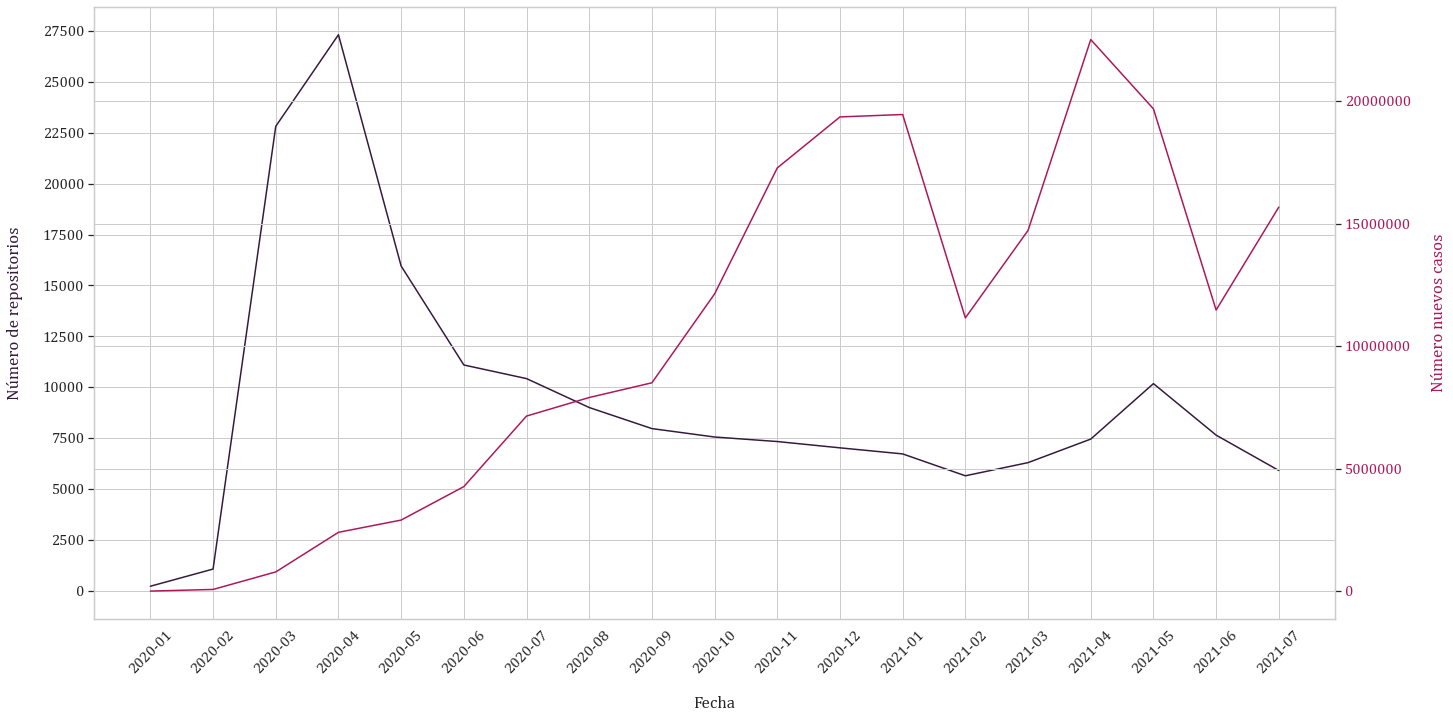

In [221]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = df_created_meses_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_world_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 25000000, 1000000))
fig.tight_layout()
align_yaxis(ax1, ax2)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

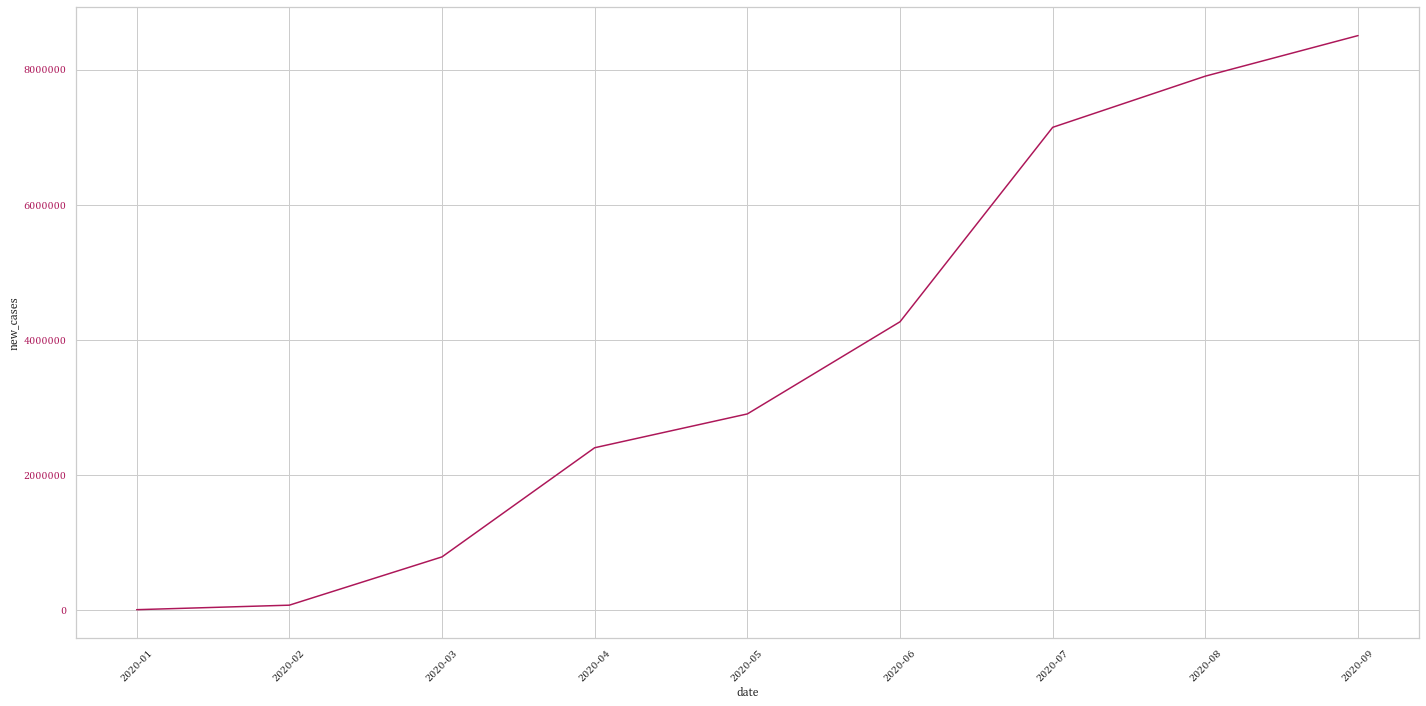

In [103]:
fig = plt.figure(figsize=(20,10))


plt.xticks(rotation=45)

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_world_meses_grouped["new_cases"].loc[:"2020-09"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 25000000, 1000000))
fig.tight_layout()

plt.show()

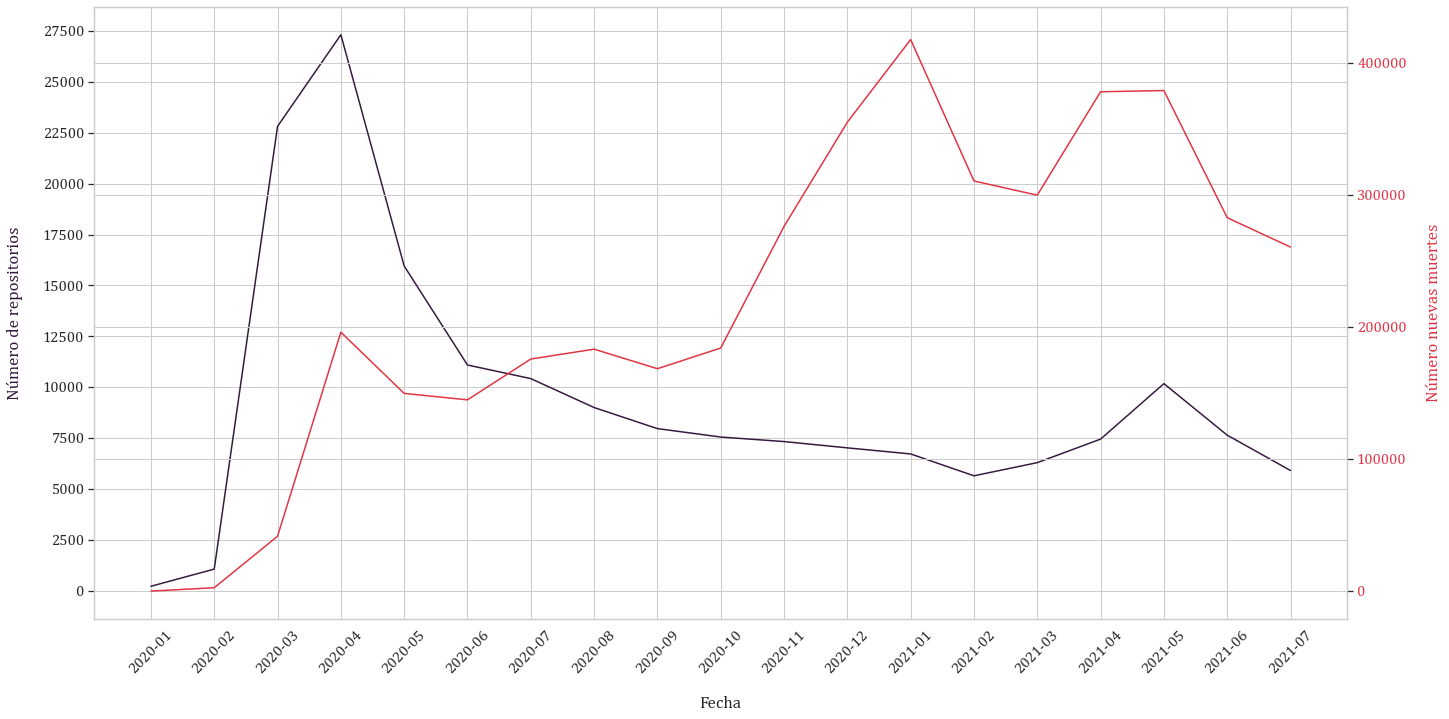

In [222]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = df_created_meses_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[3], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_world_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[3])
ax2.tick_params(axis='y', labelcolor=color[3])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 25000000, 1000000))
fig.tight_layout()
align_yaxis(ax1, ax2)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

#### Con fecha de actualización

In [225]:
df_updated = df.copy()

In [226]:
df_updated["updated_at"] = pd.to_datetime(df_updated['updated_at'])
df_updated = df_updated.set_index("updated_at")
df_updated

id                             name  \
updated_at                                                              
2021-08-14 11:56:01+00:00  238316428                         COVID-19   
2021-08-12 20:15:21+00:00  235374822                         COVID-19   
2021-08-14 08:19:52+00:00  239777191                      coronavirus   
2021-08-09 21:17:36+00:00  237129709                      coronavirus   
2021-08-13 12:36:10+00:00  234936988                             ncov   
...                              ...                              ...   
2020-09-04 15:03:54+00:00  268856502               iot-contact-tracer   
2021-08-14 14:32:53+00:00  269479371                          jupyter   
2020-06-08 12:44:27+00:00  269527538  OpenWeatherMap-concat-histories   
2021-01-11 08:38:35+00:00  270013759                         frontend   
2021-05-26 08:44:01+00:00  270006438                          backend   

                                                        full_name  \
updated_at                                                          
2021-08-14 11:56:01+00:00                 CSSEGISandData/COVID-19   
2021-08-12 20:15:21+00:00                  midas-network/COVID-19   
2021-08-14 08:19:52+00:00                 RamiKrispin/coronavirus   
2021-08-09 21:17:36+00:00               FoldingAtHome/coronavirus   
2021-08-13 12:36:10+00:00                         nextstrain/ncov   
...                                                           ...   
2020-09-04 15:03:54+00:00                 fwcd/iot-contact-tracer   
2021-08-14 14:32:53+00:00                           kclhi/jupyter   
2020-06-08 12:44:27+00:00  ALT-F1/OpenWeatherMap-concat-histories   
2021-01-11 08:38:35+00:00                        Tackode/frontend   
2021-05-26 08:44:01+00:00                         Tackode/backend   

                                                                 description  \
updated_at                                                                     
2021-08-14 11:56:01+00:00  Novel Coronavirus (COVID-19) Cases, provided b...   
2021-08-12 20:15:21+00:00                  2019 novel coronavirus repository   
2021-08-14 08:19:52+00:00                            The coronavirus dataset   
2021-08-09 21:17:36+00:00                      Folding@home COVID-19 efforts   
2021-08-13 12:36:10+00:00  Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                                      ...   
2020-09-04 15:03:54+00:00  Decentralized contact tracing system supportin...   
2021-08-14 14:32:53+00:00           :whale2: JupyterHub Docker configuration   
2020-06-08 12:44:27+00:00  Concatenate histories weather data collected b...   
2021-01-11 08:38:35+00:00                               Frontend for Tackode   
2021-05-26 08:44:01+00:00                                Backend for Tackode   

                                                            contributors_url  \
updated_at                                                                     
2021-08-14 11:56:01+00:00  https://api.github.com/repos/CSSEGISandData/CO...   
2021-08-12 20:15:21+00:00  https://api.github.com/repos/midas-network/COV...   
2021-08-14 08:19:52+00:00  https://api.github.com/repos/RamiKrispin/coron...   
2021-08-09 21:17:36+00:00  https://api.github.com/repos/FoldingAtHome/cor...   
2021-08-13 12:36:10+00:00  https://api.github.com/repos/nextstrain/ncov/c...   
...                                                                      ...   
2020-09-04 15:03:54+00:00  https://api.github.com/repos/fwcd/iot-contact-...   
2021-08-14 14:32:53+00:00  https://api.github.com/repos/kclhi/jupyter/con...   
2020-06-08 12:44:27+00:00  https://api.github.com/repos/ALT-F1/OpenWeathe...   
2021-01-11 08:38:35+00:00  https://api.github.com/repos/Tackode/frontend/...   
2021-05-26 08:44:01+00:00  https://api.github.com/repos/Tackode/backend/c...   

                           archived  disabled  stargazers_count  \
updated_at                           

In [227]:
df_updated_meses = df_updated.copy()
df_updated_meses.index = df_updated_meses.index.strftime('%Y-%m')
df_updated_meses

id                             name  \
updated_at                                               
2021-08     238316428                         COVID-19   
2021-08     235374822                         COVID-19   
2021-08     239777191                      coronavirus   
2021-08     237129709                      coronavirus   
2021-08     234936988                             ncov   
...               ...                              ...   
2020-09     268856502               iot-contact-tracer   
2021-08     269479371                          jupyter   
2020-06     269527538  OpenWeatherMap-concat-histories   
2021-01     270013759                         frontend   
2021-05     270006438                          backend   

                                         full_name  \
updated_at                                           
2021-08                    CSSEGISandData/COVID-19   
2021-08                     midas-network/COVID-19   
2021-08                    RamiKrispin/coronavirus   
2021-08                  FoldingAtHome/coronavirus   
2021-08                            nextstrain/ncov   
...                                            ...   
2020-09                    fwcd/iot-contact-tracer   
2021-08                              kclhi/jupyter   
2020-06     ALT-F1/OpenWeatherMap-concat-histories   
2021-01                           Tackode/frontend   
2021-05                            Tackode/backend   

                                                  description  \
updated_at                                                      
2021-08     Novel Coronavirus (COVID-19) Cases, provided b...   
2021-08                     2019 novel coronavirus repository   
2021-08                               The coronavirus dataset   
2021-08                         Folding@home COVID-19 efforts   
2021-08     Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                       ...   
2020-09     Decentralized contact tracing system supportin...   
2021-08              :whale2: JupyterHub Docker configuration   
2020-06     Concatenate histories weather data collected b...   
2021-01                                  Frontend for Tackode   
2021-05                                   Backend for Tackode   

                                             contributors_url  archived  \
updated_at                                                                
2021-08     https://api.github.com/repos/CSSEGISandData/CO...     False   
2021-08     https://api.github.com/repos/midas-network/COV...     False   
2021-08     https://api.github.com/repos/RamiKrispin/coron...     False   
2021-08     https://api.github.com/repos/FoldingAtHome/cor...     False   
2021-08     https://api.github.com/repos/nextstrain/ncov/c...     False   
...                                                       ...       ...   
2020-09     https://api.github.com/repos/fwcd/iot-contact-...     False   
2021-08     https://api.github.com/repos/kclhi/jupyter/con...     False   
2020-06     https://api.github.com/repos/ALT-F1/OpenWeathe...     False   
2021-01     https://api.github.com/repos/Tackode/frontend/...     False   
2021-05     https://api.github.com/repos/Tackode/backend/c...     False   

            disabled  stargazers_count  watchers_count  forks_count  ...  \
updated_at                                                           ...   
2021-08        False             27211           27211        17432  ...   
2021-08        False               642             642          221  ...   
2021-08        False               394             394          175  ...   
2021-08        False              1115            1115           87  ...   
2021-08        False              1208            1208          343  ...   
...              ...               ...             ...          ...  ...   
2020-09        False                 1               1            0  ...   
2021-08        False                 2               2 

In [228]:
df_updated_meses_grouped = df_updated.groupby([df_updated_meses.index]).size()
df_updated_meses_grouped

updated_at
2020-01       56
2020-02      405
2020-03    10145
2020-04    19153
2020-05    13746
2020-06    10153
2020-07     9895
2020-08     8839
2020-09     8015
2020-10     7802
2020-11     7583
2020-12     9179
2021-01     8253
2021-02     7001
2021-03     8107
2021-04     9204
2021-05    12739
2021-06    11465
2021-07    11135
2021-08     5164
dtype: int64

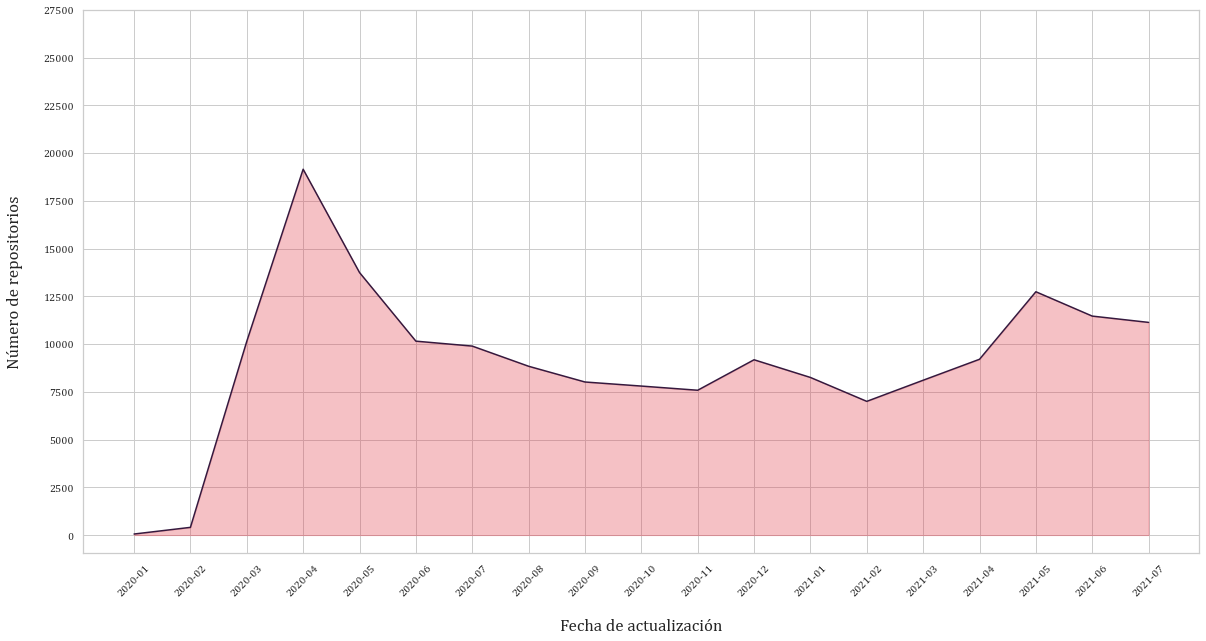

In [229]:
fig = plt.figure(figsize=(20,10))

g = sns.lineplot(data = df_updated_meses_grouped.loc["2020-01":"2021-07"], color=color[0])
g.fill_between(df_updated_meses_grouped.loc["2020-01":"2021-07"].index, 
               df_updated_meses_grouped.loc["2020-01":"2021-07"].values, color=color[3], alpha=0.3)

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Fecha de actualización', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

plt.show()

In [230]:
df_created_y_updated = pd.concat([df_updated_meses_grouped, df_created_meses_grouped], axis=1)

nombres = ['updated', 'created']
df_created_y_updated.columns = nombres

df_created_y_updated

updated  created
2020-01     56.0    249.0
2020-02    405.0   1091.0
2020-03  10145.0  22806.0
2020-04  19153.0  27299.0
2020-05  13746.0  15955.0
...          ...      ...
2019-08      NaN     17.0
2019-09      NaN     16.0
2019-10      NaN     17.0
2019-11      NaN     16.0
2019-12      NaN     24.0

[66 rows x 2 columns]

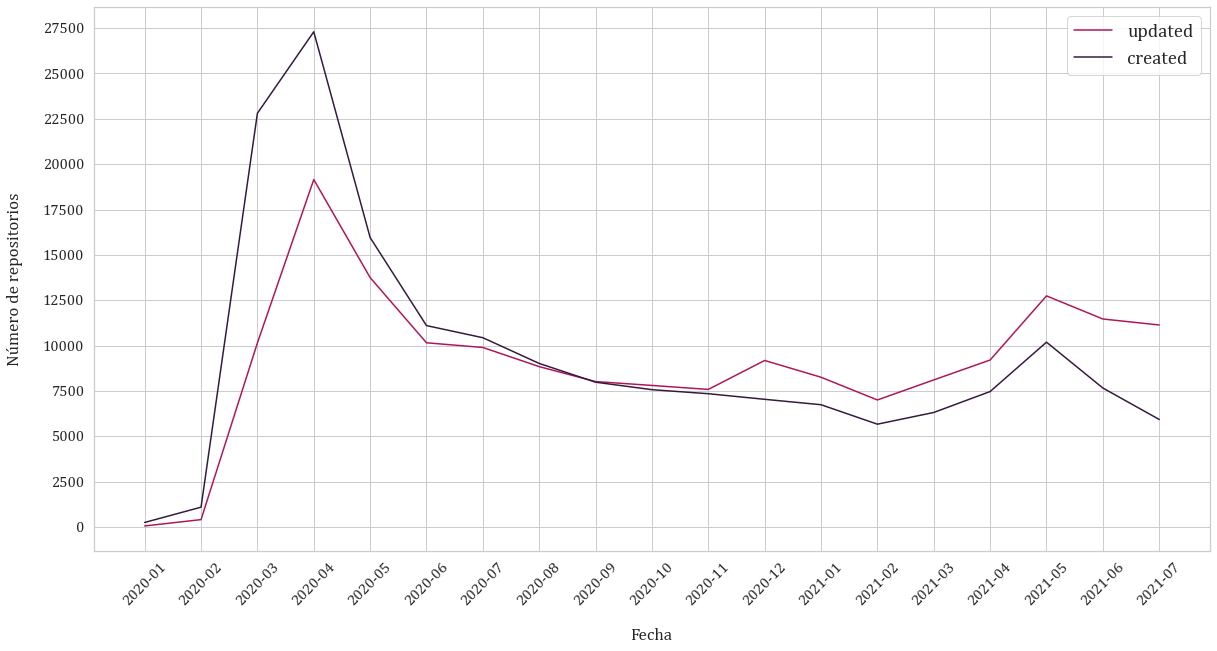

In [231]:
fig = plt.figure(figsize=(20,10))

palette = [color[2], color[0]]
ax1 = sns.lineplot(data = df_created_y_updated.loc["2020-01":"2021-07"], palette=palette, dashes = False)

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))
plt.legend(fontsize='x-large', title_fontsize='40')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

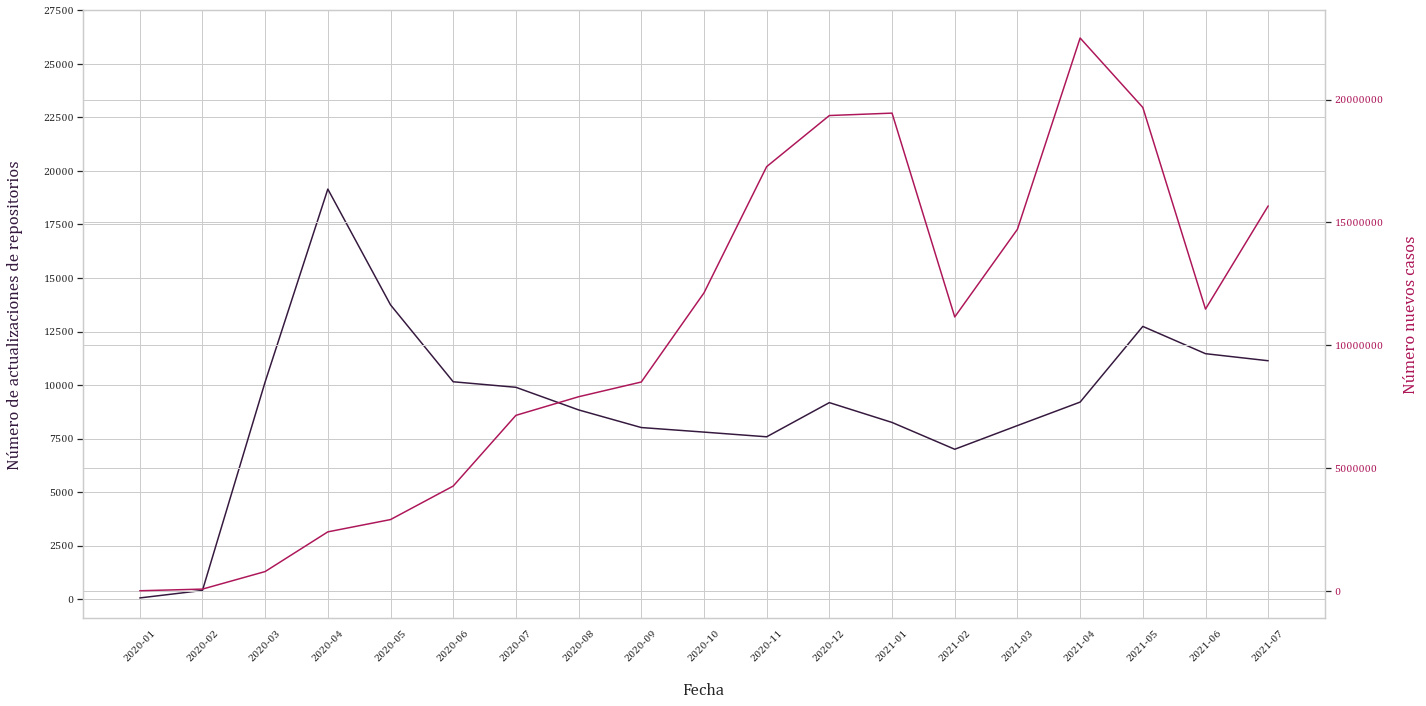

In [123]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = df_updated_meses_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de actualizaciones de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_world_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 25000000, 1000000))
fig.tight_layout()

plt.show()

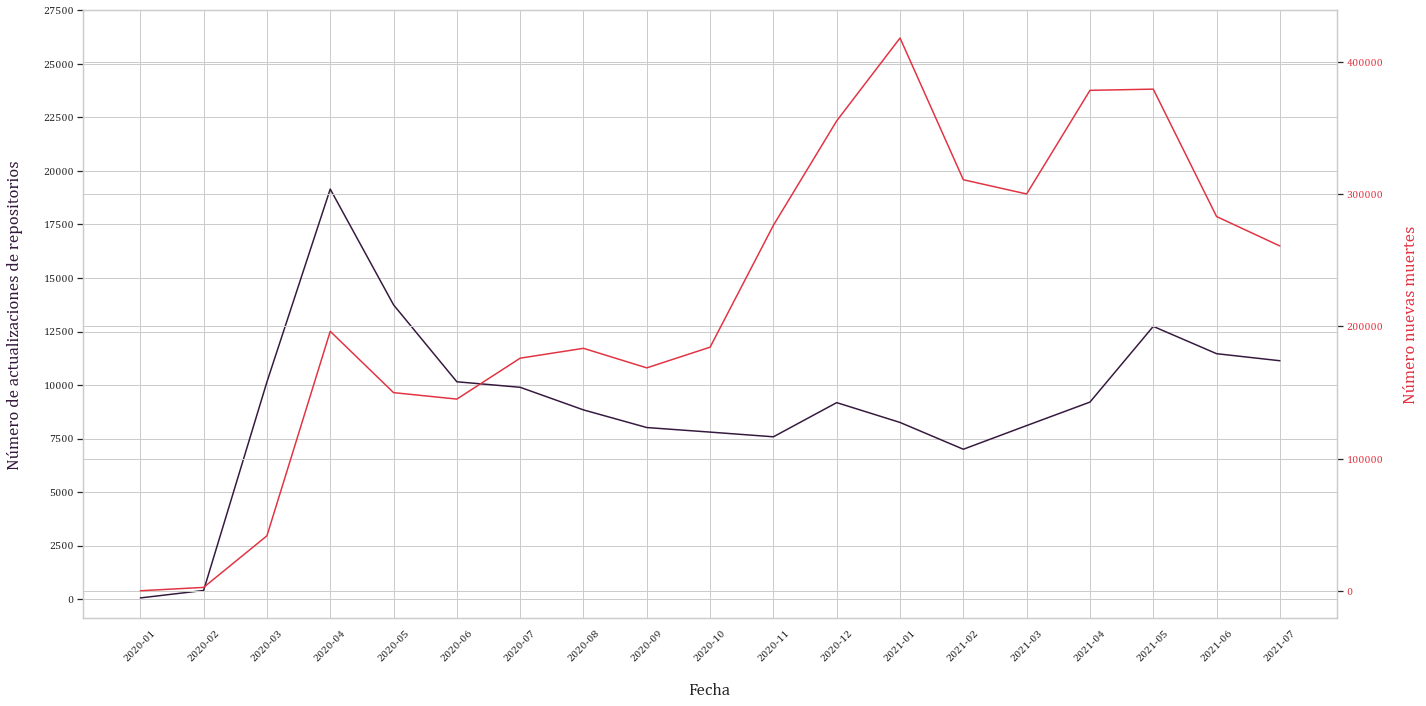

In [125]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = df_updated_meses_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de actualizaciones de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[3], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_world_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[3])
ax2.tick_params(axis='y', labelcolor=color[3])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 25000000, 1000000))
fig.tight_layout()

plt.show()

### Histórico de repositorios

In [545]:
df_historico = pd.read_csv('historicos/historico_repositorios_2016_2021.csv')

In [546]:
df_historico['date'] = pd.to_datetime(df_historico['date'])

In [547]:
df_historico

num_repos       date
0          8400 2016-01-01
1          9983 2016-01-02
2         10866 2016-01-03
3         17344 2016-01-04
4         18375 2016-01-05
...         ...        ...
2028      95727 2021-07-21
2029      96459 2021-07-22
2030      89395 2021-07-23
2031      75494 2021-07-24
2032      77150 2021-07-25

[2033 rows x 2 columns]

In [548]:
df_historico = df_historico.set_index("date")

In [549]:
df_historico_meses = df_historico.copy()
df_historico_meses.index = df_historico_meses.index.strftime('%Y-%m')
df_historico_meses

num_repos
date              
2016-01       8400
2016-01       9983
2016-01      10866
2016-01      17344
2016-01      18375
...            ...
2021-07      95727
2021-07      96459
2021-07      89395
2021-07      75494
2021-07      77150

[2033 rows x 1 columns]

In [550]:
df_historico_meses_grouped = df_historico_meses.groupby([df_historico_meses.index]).sum()
df_historico_meses_grouped

num_repos
date              
2016-01     542425
2016-02     613443
2016-03     689185
2016-04     667752
2016-05     641776
...            ...
2021-03    2739692
2021-04    2696186
2021-05    2830801
2021-06    2827718
2021-07    2378475

[67 rows x 1 columns]

In [551]:
df_historico_2016 = df_historico_meses_grouped["2016-01":"2016-12"]
df_historico_2016.index = pd.to_datetime(df_historico_2016.index).strftime('%m')
df_historico_2016.index = df_historico_2016.index.rename('2016')
df_historico_2016

num_repos
2016           
01       542425
02       613443
03       689185
04       667752
05       641776
06       602867
07       626874
08       681163
09       756887
10       807360
11       805049
12       729430

In [552]:
df_historico_2017 = df_historico_meses_grouped["2017-01":"2017-12"]
df_historico_2017.index = pd.to_datetime(df_historico_2017.index).strftime('%m')
df_historico_2017.index = df_historico_2017.index.rename('2017')
df_historico_2017

num_repos
2017           
01       807221
02       865823
03      1019099
04       921335
05       944764
06       882399
07       913301
08       933149
09      1009553
10      1079956
11      1087893
12       962683

In [553]:
df_historico_2018 = df_historico_meses_grouped["2018-01":"2018-12"]
df_historico_2018.index = pd.to_datetime(df_historico_2018.index).strftime('%m')
df_historico_2018.index = df_historico_2018.index.rename('2018')
df_historico_2018

num_repos
2018           
01      1120734
02      1061792
03      1289125
04      1225955
05      1221308
06      1113065
07      1133229
08      1150456
09      1238203
10      1384885
11      1312947
12      1184895

In [554]:
df_historico_2019 = df_historico_meses_grouped["2019-01":"2019-12"]
df_historico_2019.index = pd.to_datetime(df_historico_2019.index).strftime('%m')
df_historico_2019.index = df_historico_2019.index.rename('2019')
df_historico_2019

num_repos
2019           
01      1243756
02      1182230
03      1414730
04      1364491
05      1372200
06      1262545
07      1337160
08      1495242
09      1758652
10      1718968
11      1680913
12      1523975

In [555]:
df_historico_2020 = df_historico_meses_grouped["2020-01":"2020-12"]
df_historico_2020.index = pd.to_datetime(df_historico_2020.index).strftime('%m')
df_historico_2020.index = df_historico_2020.index.rename('2020')
df_historico_2020

num_repos
2020           
01      1637445
02      1740659
03      2053797
04      2105941
05      2105184
06      1970158
07      2034745
08      1971042
09      2128745
10      2211226
11      2166700
12      2140016

In [556]:
df_historico_2021 = df_historico_meses_grouped["2021-01":"2021-07"]
df_historico_2021.index = pd.to_datetime(df_historico_2021.index).strftime('%m')
df_historico_2021.index = df_historico_2021.index.rename('2021')
df_historico_2021

num_repos
2021           
01      2278340
02      2201460
03      2739692
04      2696186
05      2830801
06      2827718
07      2378475

In [557]:
datafr = pd.DataFrame()
datafr.insert(loc=0, column='2016', value=df_historico_2016["num_repos"])
datafr.insert(loc=0, column='2017', value=df_historico_2017["num_repos"])
datafr.insert(loc=0, column='2018', value=df_historico_2018["num_repos"])
datafr.insert(loc=0, column='2019', value=df_historico_2019["num_repos"])
datafr.insert(loc=0, column='2020', value=df_historico_2020["num_repos"])
datafr.insert(loc=0, column='2021', value=df_historico_2021["num_repos"])
datafr.index = datafr.index.rename('mes')
datafr

2021     2020     2019     2018     2017    2016
mes                                                       
01   2278340.0  1637445  1243756  1120734   807221  542425
02   2201460.0  1740659  1182230  1061792   865823  613443
03   2739692.0  2053797  1414730  1289125  1019099  689185
04   2696186.0  2105941  1364491  1225955   921335  667752
05   2830801.0  2105184  1372200  1221308   944764  641776
06   2827718.0  1970158  1262545  1113065   882399  602867
07   2378475.0  2034745  1337160  1133229   913301  626874
08         NaN  1971042  1495242  1150456   933149  681163
09         NaN  2128745  1758652  1238203  1009553  756887
10         NaN  2211226  1718968  1384885  1079956  807360
11         NaN  2166700  1680913  1312947  1087893  805049
12         NaN  2140016  1523975  1184895   962683  729430

In [558]:
datafr["01":"06"].sum()

2021    15574197.0
2020    11613184.0
2019     7839952.0
2018     7031979.0
2017     5440641.0
2016     3757448.0
dtype: float64

In [559]:
datafr.sum()

2021    17952672.0
2020    24265658.0
2019    17354862.0
2018    14436594.0
2017    11427176.0
2016     8164211.0
dtype: float64

In [560]:
type(color[5])

tuple

C:\Users\webde\AppData\Local\Temp/ipykernel_3788/3263792399.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



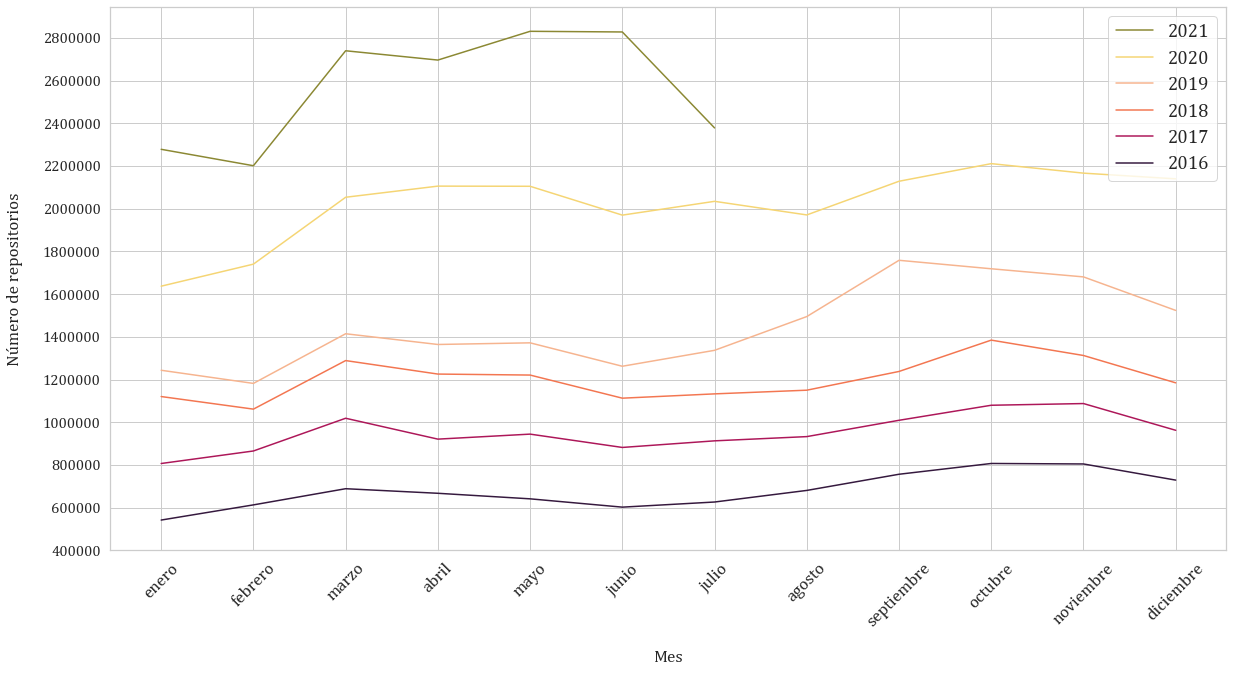

In [562]:
fig = plt.figure(figsize=(20,10))

palette = ["#8b8833", "#f5d574", color[5], color[4], color[2], color[0]]

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Mes', size=17, labelpad=20)
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

ax = sns.lineplot(data = datafr, palette=palette, dashes= False)
ax.set(xticklabels=meses)
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax.set_yticks(np.arange(400000, 3000000, 200000))
plt.legend(fontsize='x-large', title_fontsize='40')
ax.tick_params(axis='x', which='major', labelsize=17)
ax.tick_params(axis='y', which='major', labelsize=15)
plt.show()

-------

## Repositorios

In [431]:
df = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

In [52]:
df.columns

Index(['id', 'name', 'full_name', 'description', 'contributors_url',
       'archived', 'disabled', 'stargazers_count', 'watchers_count',
       'forks_count', 'has_downloads', 'has_issues', 'has_pages',
       'has_projects', 'has_wiki', 'homepage', 'html_url', 'language',
       'created_at', 'pushed_at', 'updated_at', 'svn_url', 'owner.login'],
      dtype='object')

### Lenguajes

In [432]:
df_grouped_by_lenguaje = df.groupby(df.language).size()
df_grouped_by_lenguaje

language
1C Enterprise    1
ABAP             1
AL               1
AMPL             4
API Blueprint    3
                ..
YARA             2
Yacc             1
q                3
wdl              9
xBase            2
Length: 185, dtype: int64

In [433]:
df_grouped_by_lenguaje = df_grouped_by_lenguaje.to_frame()
df_grouped_by_lenguaje.columns = ["num_repos"]

In [434]:
top20_lenguajes = df_grouped_by_lenguaje.sort_values("num_repos", ascending=False)[:20]
top20_lenguajes

num_repos
language                   
JavaScript            37310
Jupyter Notebook      25795
Python                22356
HTML                  18624
Java                   8444
R                      6019
TypeScript             5095
CSS                    3760
Dart                   3604
PHP                    2606
Vue                    2045
Kotlin                 1885
C#                     1732
Swift                  1230
C++                    1097
Ruby                    613
MATLAB                  591
Go                      552
Shell                   526
C                       506

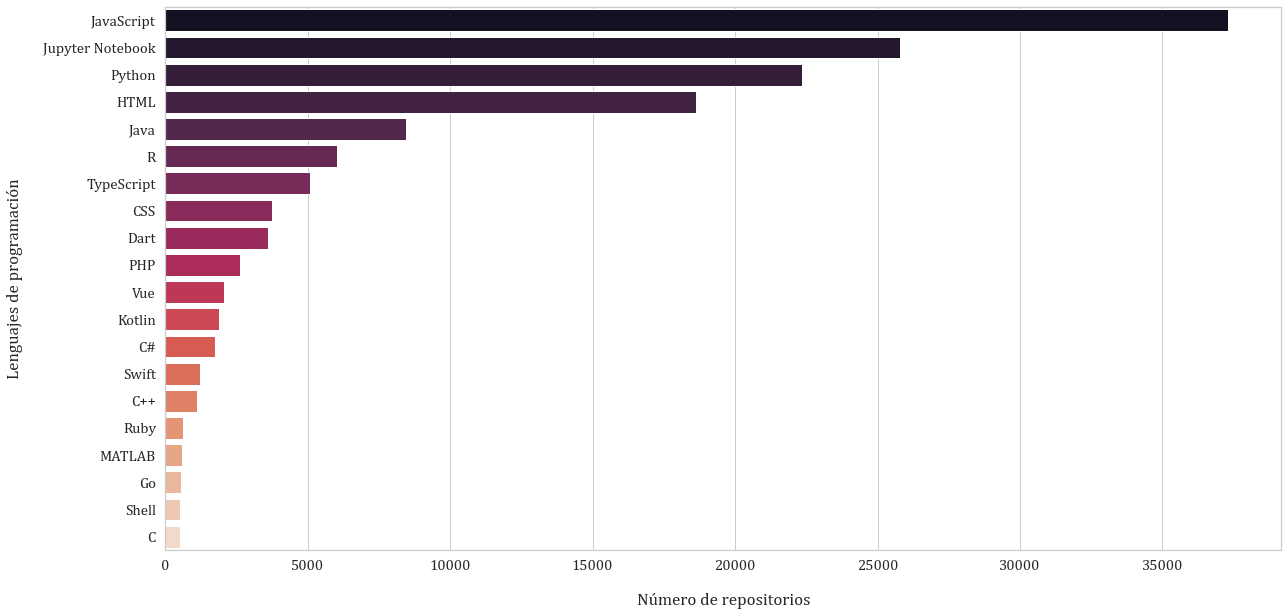

In [435]:
fig = plt.figure(figsize=(20,10))

sns.barplot(y=top20_lenguajes.index, x='num_repos', data=top20_lenguajes, palette='rocket')
plt.ylabel('Lenguajes de programación', size=17, labelpad=20) 
plt.xlabel('Número de repositorios', size=17, labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Estrellas

In [436]:
df_grouped_by_stars = df.groupby(df.stargazers_count).size()
df_grouped_by_stars

stargazers_count
0        145245
1         19396
2          5111
3          2291
4          1253
          ...  
4137          1
6195          1
6509          1
6658          1
27211         1
Length: 332, dtype: int64

In [437]:
df_grouped_by_stars = df_grouped_by_stars.to_frame()
df_grouped_by_stars

0
stargazers_count        
0                 145245
1                  19396
2                   5111
3                   2291
4                   1253
...                  ...
4137                   1
6195                   1
6509                   1
6658                   1
27211                  1

[332 rows x 1 columns]

In [438]:
df_grouped_by_stars.columns = ["num_repos"]
df_grouped_by_stars

num_repos
stargazers_count           
0                    145245
1                     19396
2                      5111
3                      2291
4                      1253
...                     ...
4137                      1
6195                      1
6509                      1
6658                      1
27211                     1

[332 rows x 1 columns]

In [439]:
df_grouped_by_stars[2:99].num_repos.sum()

13075

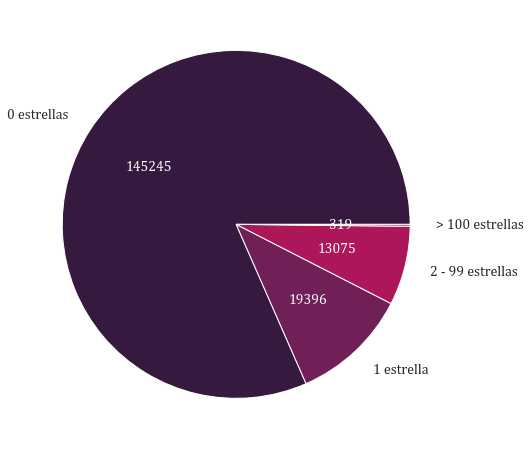

In [440]:
estrellas = ["0 estrellas", "1 estrella", "2 - 99 estrellas", "> 100 estrellas"]
num_repos = [145245, 19396, 13075, 319]

plt.figure(figsize=(10,8))
# Label distance: gives the space between labels and the center of the pie
_, _, autotexts = plt.pie(num_repos, labels=estrellas, colors=color, autopct=lambda p:f'{p*sum(num_repos)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

# plt.title('Distribución de estrellas por repositorio', fontsize=20)
plt.show()

### *Forks*

In [441]:
df_grouped_by_forks = df.groupby(df.forks_count).size()
df_grouped_by_forks

forks_count
0        160035
1         10847
2          2863
3          1176
4           661
          ...  
2261          1
2582          1
2987          1
3343          1
17432         1
Length: 197, dtype: int64

In [442]:
df_grouped_by_forks = df_grouped_by_forks.to_frame()
df_grouped_by_forks

0
forks_count        
0            160035
1             10847
2              2863
3              1176
4               661
...             ...
2261              1
2582              1
2987              1
3343              1
17432             1

[197 rows x 1 columns]

In [443]:
df_grouped_by_forks.columns = ["num_repos"]
df_grouped_by_forks

num_repos
forks_count           
0               160035
1                10847
2                 2863
3                 1176
4                  661
...                ...
2261                 1
2582                 1
2987                 1
3343                 1
17432                1

[197 rows x 1 columns]

In [444]:
df_grouped_by_forks[2:99].num_repos.sum()

7036

In [445]:
forks = ["0 forks", "1 fork", "2 - 99 forks", "> 100 forks"]
num_repos = [160035, 10847, 7036, 120]

plt.figure(figsize=(10,8))
# Label distance: gives the space between labels and the center of the pie
_, _, autotexts = plt.pie(num_repos, labels=forks, colors=color, autopct=lambda p:f'{p*sum(num_repos)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

# plt.title('Distribución de estrellas por repositorio', fontsize=20)
plt.show()

### Actividad

In [446]:
df = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

In [447]:
df_actividad = df[["id", "full_name", "stargazers_count", "forks_count", "created_at", "updated_at"]]
df_actividad

id                               full_name  stargazers_count  \
0       238316428                 CSSEGISandData/COVID-19             27211   
1       235374822                  midas-network/COVID-19               642   
2       239777191                 RamiKrispin/coronavirus               394   
3       237129709               FoldingAtHome/coronavirus              1115   
4       234936988                         nextstrain/ncov              1208   
...           ...                                     ...               ...   
178034  268856502                 fwcd/iot-contact-tracer                 1   
178035  269479371                           kclhi/jupyter                 2   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories                 1   
178037  270013759                        Tackode/frontend                 0   
178038  270006438                         Tackode/backend                 0   

        forks_count            created_at            updated_at  
0             17432  2020-02-04T22:03:53Z  2021-08-14T11:56:01Z  
1               221  2020-01-21T15:27:23Z  2021-08-12T20:15:21Z  
2               175  2020-02-11T14:08:06Z  2021-08-14T08:19:52Z  
3                87  2020-01-30T03:12:19Z  2021-08-09T21:17:36Z  
4               343  2020-01-19T17:23:17Z  2021-08-13T12:36:10Z  
...             ...                   ...                   ...  
178034            0  2020-06-02T16:46:15Z  2020-09-04T15:03:54Z  
178035            0  2020-06-04T22:35:16Z  2021-08-14T14:32:53Z  
178036            0  2020-06-05T04:04:46Z  2020-06-08T12:44:27Z  
178037            0  2020-06-06T14:57:50Z  2021-01-11T08:38:35Z  
178038            0  2020-06-06T14:30:13Z  2021-05-26T08:44:01Z  

[178039 rows x 6 columns]

In [448]:
df_actividad["created_at"] = pd.to_datetime(df_actividad['created_at'])
df_actividad["updated_at"] = pd.to_datetime(df_actividad['updated_at'])
df_actividad

id                               full_name  stargazers_count  \
0       238316428                 CSSEGISandData/COVID-19             27211   
1       235374822                  midas-network/COVID-19               642   
2       239777191                 RamiKrispin/coronavirus               394   
3       237129709               FoldingAtHome/coronavirus              1115   
4       234936988                         nextstrain/ncov              1208   
...           ...                                     ...               ...   
178034  268856502                 fwcd/iot-contact-tracer                 1   
178035  269479371                           kclhi/jupyter                 2   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories                 1   
178037  270013759                        Tackode/frontend                 0   
178038  270006438                         Tackode/backend                 0   

        forks_count                created_at                updated_at  
0             17432 2020-02-04 22:03:53+00:00 2021-08-14 11:56:01+00:00  
1               221 2020-01-21 15:27:23+00:00 2021-08-12 20:15:21+00:00  
2               175 2020-02-11 14:08:06+00:00 2021-08-14 08:19:52+00:00  
3                87 2020-01-30 03:12:19+00:00 2021-08-09 21:17:36+00:00  
4               343 2020-01-19 17:23:17+00:00 2021-08-13 12:36:10+00:00  
...             ...                       ...                       ...  
178034            0 2020-06-02 16:46:15+00:00 2020-09-04 15:03:54+00:00  
178035            0 2020-06-04 22:35:16+00:00 2021-08-14 14:32:53+00:00  
178036            0 2020-06-05 04:04:46+00:00 2020-06-08 12:44:27+00:00  
178037            0 2020-06-06 14:57:50+00:00 2021-01-11 08:38:35+00:00  
178038            0 2020-06-06 14:30:13+00:00 2021-05-26 08:44:01+00:00  

[178039 rows x 6 columns]

In [449]:
def get_tiempo_activo(df):
    first_date = df['created_at']
    second_date = df['updated_at']
    days = (second_date - first_date).days
    return days

In [450]:
df_actividad['active_days'] = df_actividad.apply(get_tiempo_activo, axis = 1)
df_actividad

id                               full_name  stargazers_count  \
0       238316428                 CSSEGISandData/COVID-19             27211   
1       235374822                  midas-network/COVID-19               642   
2       239777191                 RamiKrispin/coronavirus               394   
3       237129709               FoldingAtHome/coronavirus              1115   
4       234936988                         nextstrain/ncov              1208   
...           ...                                     ...               ...   
178034  268856502                 fwcd/iot-contact-tracer                 1   
178035  269479371                           kclhi/jupyter                 2   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories                 1   
178037  270013759                        Tackode/frontend                 0   
178038  270006438                         Tackode/backend                 0   

        forks_count                created_at                updated_at  \
0             17432 2020-02-04 22:03:53+00:00 2021-08-14 11:56:01+00:00   
1               221 2020-01-21 15:27:23+00:00 2021-08-12 20:15:21+00:00   
2               175 2020-02-11 14:08:06+00:00 2021-08-14 08:19:52+00:00   
3                87 2020-01-30 03:12:19+00:00 2021-08-09 21:17:36+00:00   
4               343 2020-01-19 17:23:17+00:00 2021-08-13 12:36:10+00:00   
...             ...                       ...                       ...   
178034            0 2020-06-02 16:46:15+00:00 2020-09-04 15:03:54+00:00   
178035            0 2020-06-04 22:35:16+00:00 2021-08-14 14:32:53+00:00   
178036            0 2020-06-05 04:04:46+00:00 2020-06-08 12:44:27+00:00   
178037            0 2020-06-06 14:57:50+00:00 2021-01-11 08:38:35+00:00   
178038            0 2020-06-06 14:30:13+00:00 2021-05-26 08:44:01+00:00   

        active_days  
0               556  
1               569  
2               549  
3               557  
4               571  
...             ...  
178034           93  
178035          435  
178036            3  
178037          218  
178038          353  

[178039 rows x 7 columns]

In [451]:
df_actividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178039 entries, 0 to 178038
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   id                178039 non-null  int64              
 1   full_name         178039 non-null  object             
 2   stargazers_count  178039 non-null  int64              
 3   forks_count       178039 non-null  int64              
 4   created_at        178039 non-null  datetime64[ns, UTC]
 5   updated_at        178039 non-null  datetime64[ns, UTC]
 6   active_days       178039 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(4), object(1)
memory usage: 9.5+ MB


In [114]:
show(df_actividad)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [452]:
df_actividad_2020_2021 = df_actividad[df_actividad.created_at.dt.year > 2019]
df_actividad_2020_2021

id                               full_name  stargazers_count  \
0       238316428                 CSSEGISandData/COVID-19             27211   
1       235374822                  midas-network/COVID-19               642   
2       239777191                 RamiKrispin/coronavirus               394   
3       237129709               FoldingAtHome/coronavirus              1115   
4       234936988                         nextstrain/ncov              1208   
...           ...                                     ...               ...   
178034  268856502                 fwcd/iot-contact-tracer                 1   
178035  269479371                           kclhi/jupyter                 2   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories                 1   
178037  270013759                        Tackode/frontend                 0   
178038  270006438                         Tackode/backend                 0   

        forks_count                created_at                updated_at  \
0             17432 2020-02-04 22:03:53+00:00 2021-08-14 11:56:01+00:00   
1               221 2020-01-21 15:27:23+00:00 2021-08-12 20:15:21+00:00   
2               175 2020-02-11 14:08:06+00:00 2021-08-14 08:19:52+00:00   
3                87 2020-01-30 03:12:19+00:00 2021-08-09 21:17:36+00:00   
4               343 2020-01-19 17:23:17+00:00 2021-08-13 12:36:10+00:00   
...             ...                       ...                       ...   
178034            0 2020-06-02 16:46:15+00:00 2020-09-04 15:03:54+00:00   
178035            0 2020-06-04 22:35:16+00:00 2021-08-14 14:32:53+00:00   
178036            0 2020-06-05 04:04:46+00:00 2020-06-08 12:44:27+00:00   
178037            0 2020-06-06 14:57:50+00:00 2021-01-11 08:38:35+00:00   
178038            0 2020-06-06 14:30:13+00:00 2021-05-26 08:44:01+00:00   

        active_days  
0               556  
1               569  
2               549  
3               557  
4               571  
...             ...  
178034           93  
178035          435  
178036            3  
178037          218  
178038          353  

[177837 rows x 7 columns]

Media de días activos:

In [453]:
df_actividad_2020_2021.active_days.mean()

57.822489133307464

#### Actividad de repositorios creados en abril de 2020 (mes con mayor número de creaciones de repositorios relacionados)

In [454]:
df_actividad_2020 = df_actividad_2020_2021[df_actividad_2020_2021.created_at.dt.year == 2020]
df_actividad_abril_2020 = df_actividad_2020[df_actividad_2020.created_at.dt.month == 4]
df_actividad_abril_2020

id                           full_name  stargazers_count  \
7604    252229971  fatiherikli/coronavirus-simulation               199   
7605    252032315          mdcollab/covidclinicaldata                44   
7606    252249069             neuralnetai/CoronaVirus                24   
7607    252160388                hollobit/COVID-19-AI                22   
7608    252307499    ItzMeDwii/corona-discord-webhook                 6   
...           ...                                 ...               ...   
177955  259685397    kevinrmblr/traceprivately-server                 3   
177956  259892997           DuongHieuMAI/spinger_free                 2   
177957  259828482       praneetloke/FoldingInTheCloud                 1   
177958  260225654              philvoyer/RainbowMaker                 1   
177959  260118310                  GerSmith/tutorials                 0   

        forks_count                created_at                updated_at  \
7604             14 2020-04-01 16:32:37+00:00 2021-07-13 17:55:43+00:00   
7605             29 2020-04-01 00:36:50+00:00 2021-07-24 16:02:13+00:00   
7606              5 2020-04-01 17:58:34+00:00 2021-01-19 16:45:06+00:00   
7607              9 2020-04-01 11:51:34+00:00 2021-01-11 05:04:50+00:00   
7608              5 2020-04-01 23:16:36+00:00 2021-03-07 11:10:14+00:00   
...             ...                       ...                       ...   
177955            2 2020-04-28 16:00:39+00:00 2020-06-29 08:22:50+00:00   
177956            0 2020-04-29 10:19:59+00:00 2020-07-21 06:44:10+00:00   
177957            0 2020-04-29 04:59:15+00:00 2021-08-12 18:14:38+00:00   
177958            0 2020-04-30 13:55:18+00:00 2020-05-01 13:37:47+00:00   
177959            0 2020-04-30 05:04:52+00:00 2021-07-14 11:11:33+00:00   

        active_days  
7604            468  
7605            479  
7606            292  
7607            284  
7608            339  
...             ...  
177955           61  
177956           82  
177957          470  
177958            0  
177959          440  

[27299 rows x 7 columns]

In [455]:
df_actividad_abril_2020_grouped = df_actividad_abril_2020.groupby(df_actividad_abril_2020.active_days).size()
df_actividad_abril_2020_grouped

active_days
0      10290
1       1006
2        647
3        520
4        473
       ...  
495       19
496       17
497       15
498        8
499        7
Length: 500, dtype: int64

In [456]:
df_actividad_abril_2020_grouped[df_actividad_abril_2020_grouped.index < 31].sum()

17353

#### Actividad de repositorios creados el 28 de marzo 2020 (día con mayor número de creaciones de repositorios relacionados)

In [457]:
df_actividad_2020 = df_actividad_2020_2021[df_actividad_2020_2021.created_at.dt.year == 2020]
df_actividad_marzo_2020 = df_actividad_2020[df_actividad_2020.created_at.dt.month == 3]
df_actividad_3_marzo_2020 = df_actividad_marzo_2020[df_actividad_marzo_2020.created_at.dt.day == 28]
df_actividad_3_marzo_2020

id                                    full_name  \
6533    250864837        colbyfayock/coronavirus-map-dashboard   
6534    250766832             huzaifsayed/coronabot-chatterbot   
6535    250781165        shotstack/coronavirus-data-video-demo   
6536    250778122                frankplus/coronavirus-irc-bot   
6537    250907417             Amulya-Kumar/coronavirus-tracker   
...           ...                                          ...   
177592  250713808                       kfischer-okarin/jordan   
177593  250726353  prahaladbelavadi/hospital-inventory-manager   
177594  250873231               Funnyman420/SIR-Implementation   
177595  250834389                         axelboberg/high-five   
177596  250906167                                 paul-em/seir   

        stargazers_count  forks_count                created_at  \
6533                  36           25 2020-03-28 18:22:07+00:00   
6534                  22           38 2020-03-28 10:31:33+00:00   
6535                   4            5 2020-03-28 11:48:16+00:00   
6536                   5            2 2020-03-28 11:31:15+00:00   
6537                   3            2 2020-03-28 22:37:00+00:00   
...                  ...          ...                       ...   
177592                 0            0 2020-03-28 04:26:29+00:00   
177593                 0            0 2020-03-28 06:05:00+00:00   
177594                 0            0 2020-03-28 19:08:34+00:00   
177595                 0            0 2020-03-28 15:49:54+00:00   
177596                 1            0 2020-03-28 22:28:15+00:00   

                      updated_at  active_days  
6533   2021-05-03 18:54:29+00:00          401  
6534   2021-07-23 00:31:40+00:00          481  
6535   2020-12-30 02:33:04+00:00          276  
6536   2021-07-03 14:39:55+00:00          462  
6537   2020-08-17 15:47:27+00:00          141  
...                          ...          ...  
177592 2020-04-05 03:37:53+00:00            7  
177593 2020-04-09 07:00:09+00:00           12  
177594 2020-03-31 10:39:14+00:00            2  
177595 2020-04-15 21:37:53+00:00           18  
177596 2021-08-13 11:20:49+00:00          502  

[1431 rows x 7 columns]

In [458]:
df_actividad_3_marzo_2020_grouped = df_actividad_3_marzo_2020.groupby(df_actividad_3_marzo_2020.active_days).size()
df_actividad_3_marzo_2020_grouped

active_days
0      447
1       74
2       54
3       25
4       26
      ... 
499      1
501      6
502      9
503      3
504      1
Length: 324, dtype: int64

In [169]:
show(df_actividad_3_marzo_2020_grouped)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
PandasGUI WARNING — pandasgui.utility — In _159, converted column names to string: 0


In [459]:
df_actividad_3_marzo_2020_grouped[df_actividad_3_marzo_2020_grouped.index > 365].sum()

150

-----

#### Actividad global

In [460]:
df_actividad_grouped = df_actividad_2020_2021.groupby(df_actividad_2020_2021.active_days).size()
df_actividad_grouped

active_days
0      78556
1       6506
2       4252
3       3288
4       2729
       ...  
564        1
565        3
568        2
569        1
571        1
Length: 565, dtype: int64

30 primeros días:

In [461]:
df_actividad_grouped[:30].sum()

122764

Primer año:

In [462]:
df_actividad_grouped[:365].sum()

170450

-----

Descartamos el último año para computar la actividad mayor a un año:

In [463]:
df_actividad_antes_25_julio = df_actividad_2020_2021[df_actividad_2020_2021.created_at < "2020-07-25"]
df_actividad_antes_25_julio

id                               full_name  stargazers_count  \
0       238316428                 CSSEGISandData/COVID-19             27211   
1       235374822                  midas-network/COVID-19               642   
2       239777191                 RamiKrispin/coronavirus               394   
3       237129709               FoldingAtHome/coronavirus              1115   
4       234936988                         nextstrain/ncov              1208   
...           ...                                     ...               ...   
178034  268856502                 fwcd/iot-contact-tracer                 1   
178035  269479371                           kclhi/jupyter                 2   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories                 1   
178037  270013759                        Tackode/frontend                 0   
178038  270006438                         Tackode/backend                 0   

        forks_count                created_at                updated_at  \
0             17432 2020-02-04 22:03:53+00:00 2021-08-14 11:56:01+00:00   
1               221 2020-01-21 15:27:23+00:00 2021-08-12 20:15:21+00:00   
2               175 2020-02-11 14:08:06+00:00 2021-08-14 08:19:52+00:00   
3                87 2020-01-30 03:12:19+00:00 2021-08-09 21:17:36+00:00   
4               343 2020-01-19 17:23:17+00:00 2021-08-13 12:36:10+00:00   
...             ...                       ...                       ...   
178034            0 2020-06-02 16:46:15+00:00 2020-09-04 15:03:54+00:00   
178035            0 2020-06-04 22:35:16+00:00 2021-08-14 14:32:53+00:00   
178036            0 2020-06-05 04:04:46+00:00 2020-06-08 12:44:27+00:00   
178037            0 2020-06-06 14:57:50+00:00 2021-01-11 08:38:35+00:00   
178038            0 2020-06-06 14:30:13+00:00 2021-05-26 08:44:01+00:00   

        active_days  
0               556  
1               569  
2               549  
3               557  
4               571  
...             ...  
178034           93  
178035          435  
178036            3  
178037          218  
178038          353  

[86633 rows x 7 columns]

In [198]:
show(df_actividad_antes_25_julio)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [464]:
df_actividad_antes_25_julio_grouped = df_actividad_antes_25_julio.groupby(df_actividad_antes_25_julio.active_days).size()
df_actividad_antes_25_julio_grouped

active_days
0      32300
1       3077
2       2044
3       1581
4       1365
       ...  
564        1
565        3
568        2
569        1
571        1
Length: 565, dtype: int64

In [465]:
df_actividad_antes_25_julio_grouped[df_actividad_antes_25_julio_grouped.index < 365].sum()

79341

-----

Actividad superior a 500 días:

In [466]:
df_actividad_2020_2021_mas_500 = df_actividad_2020_2021[df_actividad_2020_2021.active_days > 500]
df_actividad_2020_2021_mas_500

id                      full_name  stargazers_count  \
0       238316428        CSSEGISandData/COVID-19             27211   
1       235374822         midas-network/COVID-19               642   
2       239777191        RamiKrispin/coronavirus               394   
3       237129709      FoldingAtHome/coronavirus              1115   
4       234936988                nextstrain/ncov              1208   
...           ...                            ...               ...   
177426  247851538  coreyward/takeout-tracker-web                19   
177427  247979391    stefancrain/folding-at-home                38   
177444  248125109                     now-sh/api                 0   
177503  249124058           ihmeuw-msca/CurveFit               189   
177596  250906167                   paul-em/seir                 1   

        forks_count                created_at                updated_at  \
0             17432 2020-02-04 22:03:53+00:00 2021-08-14 11:56:01+00:00   
1               221 2020-01-21 15:27:23+00:00 2021-08-12 20:15:21+00:00   
2               175 2020-02-11 14:08:06+00:00 2021-08-14 08:19:52+00:00   
3                87 2020-01-30 03:12:19+00:00 2021-08-09 21:17:36+00:00   
4               343 2020-01-19 17:23:17+00:00 2021-08-13 12:36:10+00:00   
...             ...                       ...                       ...   
177426            5 2020-03-17 01:24:12+00:00 2021-08-12 20:08:16+00:00   
177427            7 2020-03-17 13:39:07+00:00 2021-08-09 23:07:40+00:00   
177444            0 2020-03-18 02:59:34+00:00 2021-08-01 04:29:29+00:00   
177503           59 2020-03-22 06:08:00+00:00 2021-08-10 01:52:02+00:00   
177596            0 2020-03-28 22:28:15+00:00 2021-08-13 11:20:49+00:00   

        active_days  
0               556  
1               569  
2               549  
3               557  
4               571  
...             ...  
177426          513  
177427          510  
177444          501  
177503          505  
177596          502  

[650 rows x 7 columns]

In [467]:
df_actividad_2020_2021_mas_500_pop = df_actividad_2020_2021_mas_500.sort_values(by = "stargazers_count", ascending = False)
df_actividad_2020_2021_mas_500_pop

id                                    full_name  \
0      238316428                      CSSEGISandData/COVID-19   
2271   247386519              covid19india/covid19india-react   
5387   249842476                        nytimes/covid-19-data   
13380  243894277               tokyo-metropolitan-gov/covid19   
13024  246079929                           owid/covid-19-data   
...          ...                                          ...   
6872   251004731                    YossiBenZaken/CoronaVirus   
6916   250972351             drxyzw/WuhanCoronavirus-Malaysia   
21358  248751646                        jeremymack-LU/covid19   
7117   244714437                   davidkirwan/covid-19-plots   
46690  245897704  yupokevinlin/covid-19-interactive-world-map   

       stargazers_count  forks_count                created_at  \
0                 27211        17432 2020-02-04 22:03:53+00:00   
2271               6658         3343 2020-03-15 02:16:02+00:00   
5387               6509         2987 2020-03-24 23:41:39+00:00   
13380              6195         2079 2020-02-29 02:57:45+00:00   
13024              4137         2582 2020-03-09 16:00:06+00:00   
...                 ...          ...                       ...   
6872                  0            0 2020-03-29 10:21:34+00:00   
6916                  0            1 2020-03-29 06:54:18+00:00   
21358                 0            0 2020-03-20 12:37:22+00:00   
7117                  0            0 2020-03-03 18:43:47+00:00   
46690                 0            0 2020-03-08 22:24:46+00:00   

                     updated_at  active_days  
0     2021-08-14 11:56:01+00:00          556  
2271  2021-08-14 09:00:43+00:00          517  
5387  2021-08-14 03:14:24+00:00          507  
13380 2021-08-13 09:24:44+00:00          531  
13024 2021-08-14 10:14:11+00:00          522  
...                         ...          ...  
6872  2021-08-12 12:15:31+00:00          501  
6916  2021-08-14 11:05:10+00:00          503  
21358 2021-08-12 14:41:55+00:00          510  
7117  2021-07-19 17:14:56+00:00          502  
46690 2021-07-27 11:33:43+00:00          505  

[650 rows x 7 columns]

In [468]:
df_actividad_2020_2021_mas_500_pop[df_actividad_2020_2021_mas_500_pop.stargazers_count > 100]

id                          full_name  stargazers_count  \
0       238316428            CSSEGISandData/COVID-19             27211   
2271    247386519    covid19india/covid19india-react              6658   
5387    249842476              nytimes/covid-19-data              6509   
13380   243894277     tokyo-metropolitan-gov/covid19              6195   
13024   246079929                 owid/covid-19-data              4137   
...           ...                                ...               ...   
2268    247558208  midudev/covid-19-spread-simulator               108   
159590  244498848                  ababaian/serratus               107   
6806    251008210       ryo-ma/covid19-japan-web-api               107   
27996   249007415                 epiforecasts/covid               104   
145364  247415884                   datameet/covid19               101   

        forks_count                created_at                updated_at  \
0             17432 2020-02-04 22:03:53+00:00 2021-08-14 11:56:01+00:00   
2271           3343 2020-03-15 02:16:02+00:00 2021-08-14 09:00:43+00:00   
5387           2987 2020-03-24 23:41:39+00:00 2021-08-14 03:14:24+00:00   
13380          2079 2020-02-29 02:57:45+00:00 2021-08-13 09:24:44+00:00   
13024          2582 2020-03-09 16:00:06+00:00 2021-08-14 10:14:11+00:00   
...             ...                       ...                       ...   
2268             42 2020-03-15 21:54:36+00:00 2021-08-01 21:11:04+00:00   
159590           14 2020-03-02 23:38:02+00:00 2021-08-11 14:56:58+00:00   
6806             20 2020-03-29 10:42:43+00:00 2021-08-14 06:22:32+00:00   
27996            25 2020-03-21 15:44:20+00:00 2021-08-10 20:02:20+00:00   
145364           92 2020-03-15 06:45:33+00:00 2021-08-13 10:56:42+00:00   

        active_days  
0               556  
2271            517  
5387            507  
13380           531  
13024           522  
...             ...  
2268            503  
159590          526  
6806            502  
27996           507  
145364          516  

[137 rows x 7 columns]

In [130]:
show(df_actividad_2020_2021)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


### Top 100 repositorios

In [576]:
df = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

In [577]:
df_ordered_by_stars = df.sort_values(by="stargazers_count", ascending = False)
top_100 = df_ordered_by_stars[:100]
top_100

id                      name                         full_name  \
0       238316428                  COVID-19           CSSEGISandData/COVID-19   
2271    247386519        covid19india-react   covid19india/covid19india-react   
5387    249842476             covid-19-data             nytimes/covid-19-data   
13380   243894277                   covid19    tokyo-metropolitan-gov/covid19   
13024   246079929             covid-19-data                owid/covid-19-data   
...           ...                       ...                               ...   
59282   250423021  TH_COVID19_International  Tencent/TH_COVID19_International   
76762   252258050       covid19_projections     youyanggu/covid19_projections   
159145  236146885                 pneumonia                 lispczz/pneumonia   
175028  247677393     Event-Safety-Measures    fossasia/Event-Safety-Measures   
37587   249297850           covid19_twitter     thepanacealab/covid19_twitter   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
2271             Tracking the impact of COVID-19 in India   
5387    An ongoing repository of data on coronavirus c...   
13380   東京都 新型コロナウイルス感染症対策サイト / Tokyo COVID-19 Task Fo...   
13024   Data on COVID-19 (coronavirus) cases, deaths, ...   
...                                                   ...   
59282                                                 NaN   
76762         COVID-19 Projections Using Machine Learning   
159145                                   中国新型冠状病毒肺炎地级市疫情图   
175028  List of Safety Measures for Events during Covid19   
37587   Covid-19 Twitter dataset for non-commercial re...   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
2271    https://api.github.com/repos/covid19india/covi...     False     False   
5387    https://api.github.com/repos/nytimes/covid-19-...     False     False   
13380   https://api.github.com/repos/tokyo-metropolita...     False     False   
13024   https://api.github.com/repos/owid/covid-19-dat...     False     False   
...                                                   ...       ...       ...   
59282   https://api.github.com/repos/Tencent/TH_COVID1...     False     False   
76762   https://api.github.com/repos/youyanggu/covid19...     False     False   
159145  https://api.github.com/repos/lispczz/pneumonia...     False     False   
175028  https://api.github.com/repos/fossasia/Event-Sa...     False     False   
37587   https://api.github.com/repos/thepanacealab/cov...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
2271                6658            6658         3343  ...          True   
5387                6509            6509         2987  ...          True   
13380               6195            6195         2079  ...          True   
13024               4137            4137         2582  ...         False   
...                  ...             ...          ...  ...           ...   
59282                358             358           82  ...          True   
76762                357             357           87  ...          True   
159145               356             356          100  ...          True   
175028               351             351            4  ...         False   
37587                350             350          136  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
2271        True                       https://www.covid19india.org   
5387        True  https://www.nytimes.com/interactive/2020/us/co...   
13380      False             https://stopcovid19.metro.tokyo.lg.jp/   
13024      False             https://ourworldindata.org/coronavirus 

In [578]:
top_100 = top_100[["id", "full_name", "description", "stargazers_count", "forks_count", "homepage", "html_url", "archived",
                  "language", "created_at", "updated_at", "owner.login"]]
top_100

id                         full_name  \
0       238316428           CSSEGISandData/COVID-19   
2271    247386519   covid19india/covid19india-react   
5387    249842476             nytimes/covid-19-data   
13380   243894277    tokyo-metropolitan-gov/covid19   
13024   246079929                owid/covid-19-data   
...           ...                               ...   
59282   250423021  Tencent/TH_COVID19_International   
76762   252258050     youyanggu/covid19_projections   
159145  236146885                 lispczz/pneumonia   
175028  247677393    fossasia/Event-Safety-Measures   
37587   249297850     thepanacealab/covid19_twitter   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
2271             Tracking the impact of COVID-19 in India              6658   
5387    An ongoing repository of data on coronavirus c...              6509   
13380   東京都 新型コロナウイルス感染症対策サイト / Tokyo COVID-19 Task Fo...              6195   
13024   Data on COVID-19 (coronavirus) cases, deaths, ...              4137   
...                                                   ...               ...   
59282                                                 NaN               358   
76762         COVID-19 Projections Using Machine Learning               357   
159145                                   中国新型冠状病毒肺炎地级市疫情图               356   
175028  List of Safety Measures for Events during Covid19               351   
37587   Covid-19 Twitter dataset for non-commercial re...               350   

        forks_count                                           homepage  \
0             17432  https://systems.jhu.edu/research/public-health...   
2271           3343                       https://www.covid19india.org   
5387           2987  https://www.nytimes.com/interactive/2020/us/co...   
13380          2079             https://stopcovid19.metro.tokyo.lg.jp/   
13024          2582             https://ourworldindata.org/coronavirus   
...             ...                                                ...   
59282            82                                                NaN   
76762            87                    https://covid19-projections.com   
159145          100               https://lispczz.github.io/pneumonia/   
175028            4                                                NaN   
37587           136                 http://www.panacealab.org/covid19/   

                                                 html_url  archived  \
0              https://github.com/CSSEGISandData/COVID-19     False   
2271    https://github.com/covid19india/covid19india-r...     False   
5387             https://github.com/nytimes/covid-19-data     False   
13380   https://github.com/tokyo-metropolitan-gov/covid19     False   
13024               https://github.com/owid/covid-19-data     False   
...                                                   ...       ...   
59282   https://github.com/Tencent/TH_COVID19_Internat...     False   
76762    https://github.com/youyanggu/covid19_projections     False   
159145               https://github.com/lispczz/pneumonia     False   
175028  https://github.com/fossasia/Event-Safety-Measures     False   
37587    https://github.com/thepanacealab/covid19_twitter     False   

                language            created_at            updated_at  \
0                    NaN  2020-02-04T22:03:53Z  2021-08-14T11:56:01Z   
2271          JavaScript  2020-03-15T02:16:02Z  2021-08-14T09:00:43Z   
5387                 NaN  2020-03-24T23:41:39Z  2021-08-14T03:14:24Z   
13380                Vue  2020-02-29T02:57:45Z  2021-08-13T09:24:44Z   
13024             Python  2020-03-09T16:00:06Z  2021-08-14T10:14:11Z   
...                  ...                   ...                   ...   
59282               TSQL  2020-03-27T02:35:33Z  2021-08-13T01:02:26Z   
76762                NaN  2020-04-01T18:39:59Z  2021-08-06T07:24:15Z   
159145        J

-----

#### Añadiéndole información de los usuarios: país y tipo de usuario

In [579]:
na_values = ['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
             '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', '']

usuarios_con_paises = pd.read_csv("usuarios_totales_con_paises.csv", na_values=na_values, keep_default_na=False)
usuarios_con_paises = usuarios_con_paises[["repo_id", "country_name", "type"]]
usuarios_con_paises

repo_id   country_name          type
0       238316428  United States          User
1       235374822            NaN  Organization
2       239777191  United States          User
3       237129709  United States  Organization
4       234936988            NaN  Organization
...           ...            ...           ...
177817  269527538        Belgium  Organization
177818  270034436   South Africa          User
177819  269906994          India          User
177820  270013759  United States  Organization
177821  270006438  United States  Organization

[177822 rows x 3 columns]

Unión del dataset de usuarios conteniendo los países para añadir éstos a los repositorios según su id:

In [580]:
top_100_con_paises = top_100.join(usuarios_con_paises.set_index('repo_id'), on='id')
top_100_con_paises

id                         full_name  \
0       238316428           CSSEGISandData/COVID-19   
2271    247386519   covid19india/covid19india-react   
5387    249842476             nytimes/covid-19-data   
13380   243894277    tokyo-metropolitan-gov/covid19   
13024   246079929                owid/covid-19-data   
...           ...                               ...   
59282   250423021  Tencent/TH_COVID19_International   
76762   252258050     youyanggu/covid19_projections   
159145  236146885                 lispczz/pneumonia   
175028  247677393    fossasia/Event-Safety-Measures   
37587   249297850     thepanacealab/covid19_twitter   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
2271             Tracking the impact of COVID-19 in India              6658   
5387    An ongoing repository of data on coronavirus c...              6509   
13380   東京都 新型コロナウイルス感染症対策サイト / Tokyo COVID-19 Task Fo...              6195   
13024   Data on COVID-19 (coronavirus) cases, deaths, ...              4137   
...                                                   ...               ...   
59282                                                 NaN               358   
76762         COVID-19 Projections Using Machine Learning               357   
159145                                   中国新型冠状病毒肺炎地级市疫情图               356   
175028  List of Safety Measures for Events during Covid19               351   
37587   Covid-19 Twitter dataset for non-commercial re...               350   

        forks_count                                           homepage  \
0             17432  https://systems.jhu.edu/research/public-health...   
2271           3343                       https://www.covid19india.org   
5387           2987  https://www.nytimes.com/interactive/2020/us/co...   
13380          2079             https://stopcovid19.metro.tokyo.lg.jp/   
13024          2582             https://ourworldindata.org/coronavirus   
...             ...                                                ...   
59282            82                                                NaN   
76762            87                    https://covid19-projections.com   
159145          100               https://lispczz.github.io/pneumonia/   
175028            4                                                NaN   
37587           136                 http://www.panacealab.org/covid19/   

                                                 html_url  archived  \
0              https://github.com/CSSEGISandData/COVID-19     False   
2271    https://github.com/covid19india/covid19india-r...     False   
5387             https://github.com/nytimes/covid-19-data     False   
13380   https://github.com/tokyo-metropolitan-gov/covid19     False   
13024               https://github.com/owid/covid-19-data     False   
...                                                   ...       ...   
59282   https://github.com/Tencent/TH_COVID19_Internat...     False   
76762    https://github.com/youyanggu/covid19_projections     False   
159145               https://github.com/lispczz/pneumonia     False   
175028  https://github.com/fossasia/Event-Safety-Measures     False   
37587    https://github.com/thepanacealab/covid19_twitter     False   

                language            created_at            updated_at  \
0                    NaN  2020-02-04T22:03:53Z  2021-08-14T11:56:01Z   
2271          JavaScript  2020-03-15T02:16:02Z  2021-08-14T09:00:43Z   
5387                 NaN  2020-03-24T23:41:39Z  2021-08-14T03:14:24Z   
13380                Vue  2020-02-29T02:57:45Z  2021-08-13T09:24:44Z   
13024             Python  2020-03-09T16:00:06Z  2021-08-14T10:14:11Z   
...                  ...                   ...                   ...   
59282               TSQL  2020-03-27T02:35:33Z  2021-08-13T01:02:26Z   
76762                NaN  2020-04-01T18:39:59Z  2021-08-06T07:24:15Z   
159145        J

----

### Tipo de cuenta

In [581]:
top_100_usuarios_unicos = top_100_con_paises.drop_duplicates(subset = "owner.login")
top_100_usuarios_unicos

id                         full_name  \
0       238316428           CSSEGISandData/COVID-19   
2271    247386519   covid19india/covid19india-react   
5387    249842476             nytimes/covid-19-data   
13380   243894277    tokyo-metropolitan-gov/covid19   
13024   246079929                owid/covid-19-data   
...           ...                               ...   
59282   250423021  Tencent/TH_COVID19_International   
76762   252258050     youyanggu/covid19_projections   
159145  236146885                 lispczz/pneumonia   
175028  247677393    fossasia/Event-Safety-Measures   
37587   249297850     thepanacealab/covid19_twitter   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
2271             Tracking the impact of COVID-19 in India              6658   
5387    An ongoing repository of data on coronavirus c...              6509   
13380   東京都 新型コロナウイルス感染症対策サイト / Tokyo COVID-19 Task Fo...              6195   
13024   Data on COVID-19 (coronavirus) cases, deaths, ...              4137   
...                                                   ...               ...   
59282                                                 NaN               358   
76762         COVID-19 Projections Using Machine Learning               357   
159145                                   中国新型冠状病毒肺炎地级市疫情图               356   
175028  List of Safety Measures for Events during Covid19               351   
37587   Covid-19 Twitter dataset for non-commercial re...               350   

        forks_count                                           homepage  \
0             17432  https://systems.jhu.edu/research/public-health...   
2271           3343                       https://www.covid19india.org   
5387           2987  https://www.nytimes.com/interactive/2020/us/co...   
13380          2079             https://stopcovid19.metro.tokyo.lg.jp/   
13024          2582             https://ourworldindata.org/coronavirus   
...             ...                                                ...   
59282            82                                                NaN   
76762            87                    https://covid19-projections.com   
159145          100               https://lispczz.github.io/pneumonia/   
175028            4                                                NaN   
37587           136                 http://www.panacealab.org/covid19/   

                                                 html_url  archived  \
0              https://github.com/CSSEGISandData/COVID-19     False   
2271    https://github.com/covid19india/covid19india-r...     False   
5387             https://github.com/nytimes/covid-19-data     False   
13380   https://github.com/tokyo-metropolitan-gov/covid19     False   
13024               https://github.com/owid/covid-19-data     False   
...                                                   ...       ...   
59282   https://github.com/Tencent/TH_COVID19_Internat...     False   
76762    https://github.com/youyanggu/covid19_projections     False   
159145               https://github.com/lispczz/pneumonia     False   
175028  https://github.com/fossasia/Event-Safety-Measures     False   
37587    https://github.com/thepanacealab/covid19_twitter     False   

                language            created_at            updated_at  \
0                    NaN  2020-02-04T22:03:53Z  2021-08-14T11:56:01Z   
2271          JavaScript  2020-03-15T02:16:02Z  2021-08-14T09:00:43Z   
5387                 NaN  2020-03-24T23:41:39Z  2021-08-14T03:14:24Z   
13380                Vue  2020-02-29T02:57:45Z  2021-08-13T09:24:44Z   
13024             Python  2020-03-09T16:00:06Z  2021-08-14T10:14:11Z   
...                  ...                   ...                   ...   
59282               TSQL  2020-03-27T02:35:33Z  2021-08-13T01:02:26Z   
76762                NaN  2020-04-01T18:39:59Z  2021-08-06T07:24:15Z   
159145        J

In [582]:
top_100_con_paises_tipo_cuenta = top_100_usuarios_unicos.groupby(top_100_usuarios_unicos.type).size()
top_100_con_paises_tipo_cuenta = top_100_con_paises_tipo_cuenta.sort_values(ascending = False)
top_100_con_paises_tipo_cuenta

type
User            50
Organization    45
dtype: int64

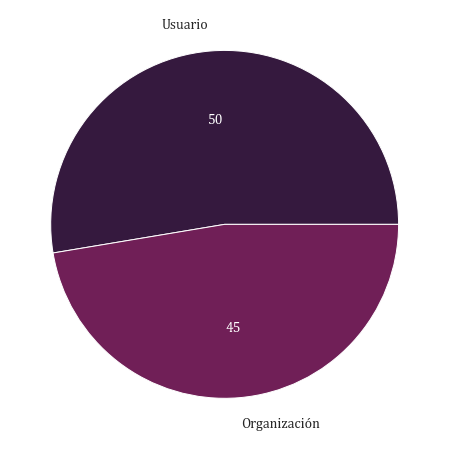

In [583]:
tipos = ["Usuario", "Organización"]
num_cuentas = [top_100_con_paises_tipo_cuenta[0], top_100_con_paises_tipo_cuenta[1]]

plt.figure(figsize=(10,8))
# Label distance: gives the space between labels and the center of the pie
_, _, autotexts = plt.pie(num_cuentas, labels=tipos, colors=color, autopct=lambda p:f'{p*sum(num_cuentas)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

### Lenguajes de programación

In [584]:
top_100_con_paises_lenguajes = top_100_con_paises.groupby(top_100_con_paises.language).size()
top_100_con_paises_lenguajes = top_100_con_paises_lenguajes.sort_values(ascending = False)
top_100_con_paises_lenguajes = top_100_con_paises_lenguajes.to_frame()
top_100_con_paises_lenguajes.columns = ["num_repos"]
top_100_con_paises_lenguajes

num_repos
language                   
Python                   19
Jupyter Notebook         15
JavaScript               12
TypeScript               10
R                         5
HTML                      4
Kotlin                    4
Swift                     2
Dart                      2
Java                      2
C++                       2
AppleScript               1
TeX                       1
TSQL                      1
PHP                       1
Stan                      1
Ruby                      1
Objective-C               1
Go                        1
Vue                       1

In [585]:
top_100_con_paises_lenguajes.num_repos.sum()

86

In [586]:
fig = plt.figure(figsize=(20,10))

sns.barplot(y=top_100_con_paises_lenguajes.index, x='num_repos', data=top_100_con_paises_lenguajes, palette='rocket')
plt.ylabel('Lenguajes de programación', size=17, labelpad=20) 
plt.xlabel('Número de repositorios', size=17, labelpad=20)
plt.xticks(np.arange(0, 20, 1))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Países

In [587]:
top_100_con_paises_paises = top_100_con_paises.groupby(top_100_con_paises.country_name).size()
top_100_con_paises_paises = top_100_con_paises_paises.sort_values(ascending = False)
top_100_con_paises_paises = top_100_con_paises_paises.to_frame()
top_100_con_paises_paises.columns = ["num_repos"]
top_100_con_paises_paises

num_repos
country_name                 
United States              18
China                       6
India                       5
Italy                       4
Germany                     3
United Kingdom              3
Indonesia                   3
Switzerland                 3
Japan                       3
Brazil                      2
Portugal                    2
Malaysia                    2
Canada                      1
Norway                      1
Singapore                   1
Korea, Republic of          1
New Zealand                 1
France                      1
Israel                      1
Ireland                     1
Bulgaria                    1
Bangladesh                  1

**Adición del número de repositorios por millón de habitantes**

In [588]:
top_100_con_paises_y_millon_habitantes = top_100_con_paises_paises.copy()

In [589]:
top_100_con_paises_y_millon_habitantes

num_repos
country_name                 
United States              18
China                       6
India                       5
Italy                       4
Germany                     3
United Kingdom              3
Indonesia                   3
Switzerland                 3
Japan                       3
Brazil                      2
Portugal                    2
Malaysia                    2
Canada                      1
Norway                      1
Singapore                   1
Korea, Republic of          1
New Zealand                 1
France                      1
Israel                      1
Ireland                     1
Bulgaria                    1
Bangladesh                  1

In [590]:
population = pd.read_csv("population_by_country_2020_kaggle.csv")
population = population[["Country (or dependency)", "Population (2020)"]]
population.rename(columns={ population.columns[0]: "name" }, inplace = True)
population.rename(columns={ population.columns[1]: "pop2020" }, inplace = True)
population

name     pop2020
0               China  1440297825
1               India  1382345085
2       United States   331341050
3           Indonesia   274021604
4            Pakistan   221612785
..                ...         ...
230        Montserrat        4993
231  Falkland Islands        3497
232              Niue        1628
233           Tokelau        1360
234          Holy See         801

[235 rows x 2 columns]

In [591]:
#Cambiamos el nombre de Corea del Sur por su nombre oficial, para que lo detecte el merge posterior con el df de repositorios
population.loc[population.name == "South Korea", "name"] = "Korea, Republic of"

In [592]:
show(population)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [597]:
top_100_con_paises_y_millon_habitantes = pd.merge(left=top_100_con_paises_y_millon_habitantes, right=population, how='left', 
                                 left_on=top_100_con_paises_y_millon_habitantes.index, right_on='name')
top_100_con_paises_y_millon_habitantes

num_repos                name     pop2020
0          18       United States   331341050
1           6               China  1440297825
2           5               India  1382345085
3           4               Italy    60446035
4           3             Germany    83830972
5           3      United Kingdom    67948282
6           3           Indonesia   274021604
7           3         Switzerland     8665615
8           3               Japan   126407422
9           2              Brazil   212821986
10          2            Portugal    10191409
11          2            Malaysia    32436963
12          1              Canada    37799407
13          1              Norway     5428594
14          1           Singapore     5858322
15          1  Korea, Republic of    51276977
16          1         New Zealand     4829021
17          1              France    65298930
18          1              Israel     8678517
19          1             Ireland     4947267
20          1            Bulgaria     6939018
21          1          Bangladesh   164972348

In [594]:
def get_num_repos_mes_por_millon_habitantes(df):
    num_repos = df["num_repos"]
    population = df["pop2020"]

    res = ( (1000000 * num_repos) / population )
    return res

In [599]:
top_100_con_paises_y_millon_habitantes["num_repos_per_million"] = top_100_con_paises_y_millon_habitantes.apply(get_num_repos_mes_por_millon_habitantes, 
                                                                                         axis = 1)

In [600]:
top_100_con_paises_y_millon_habitantes

num_repos                name     pop2020  num_repos_per_million
0          18       United States   331341050               0.054325
1           6               China  1440297825               0.004166
2           5               India  1382345085               0.003617
3           4               Italy    60446035               0.066175
4           3             Germany    83830972               0.035786
5           3      United Kingdom    67948282               0.044151
6           3           Indonesia   274021604               0.010948
7           3         Switzerland     8665615               0.346196
8           3               Japan   126407422               0.023733
9           2              Brazil   212821986               0.009398
10          2            Portugal    10191409               0.196244
11          2            Malaysia    32436963               0.061658
12          1              Canada    37799407               0.026455
13          1              Norway     5428594               0.184210
14          1           Singapore     5858322               0.170697
15          1  Korea, Republic of    51276977               0.019502
16          1         New Zealand     4829021               0.207081
17          1              France    65298930               0.015314
18          1              Israel     8678517               0.115227
19          1             Ireland     4947267               0.202132
20          1            Bulgaria     6939018               0.144113
21          1          Bangladesh   164972348               0.006062

In [601]:
top_100_con_paises_y_millon_habitantes.num_repos.sum()

64

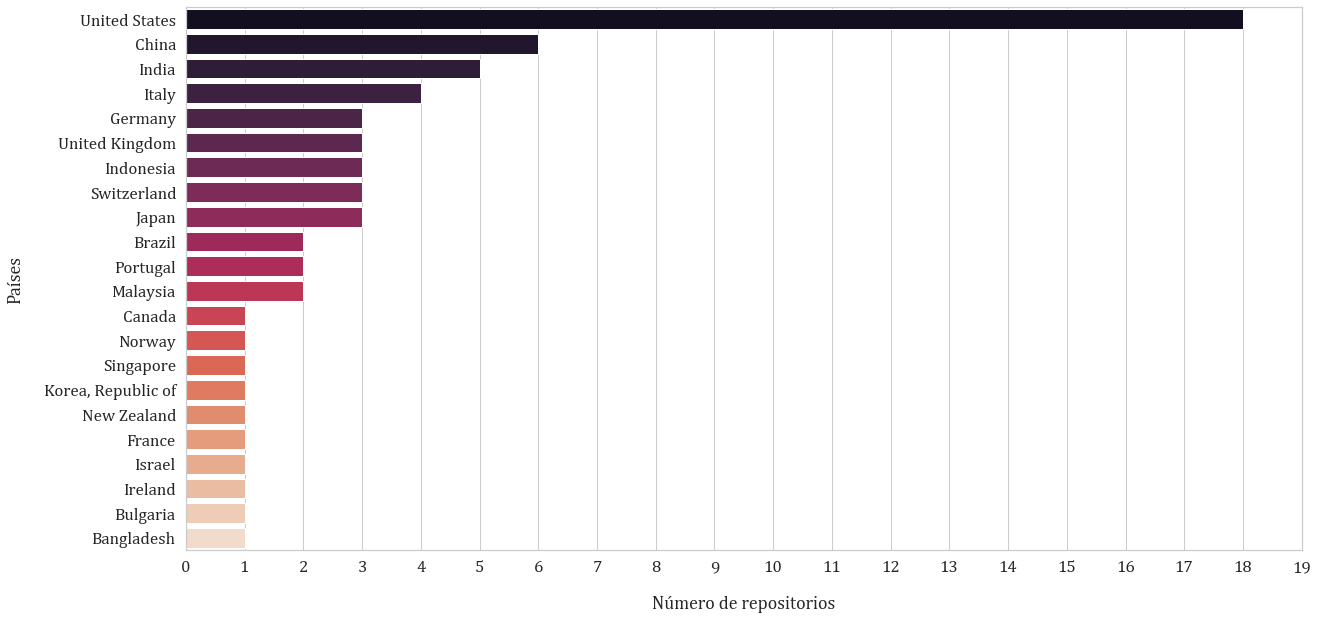

In [603]:
fig = plt.figure(figsize=(20,10))

sns.barplot(y="name", x='num_repos', data=top_100_con_paises_y_millon_habitantes, palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios', size=18, labelpad=20)
plt.xticks(np.arange(0, 20, 1))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.show()

En unidades relativas (por millón de habitantes):

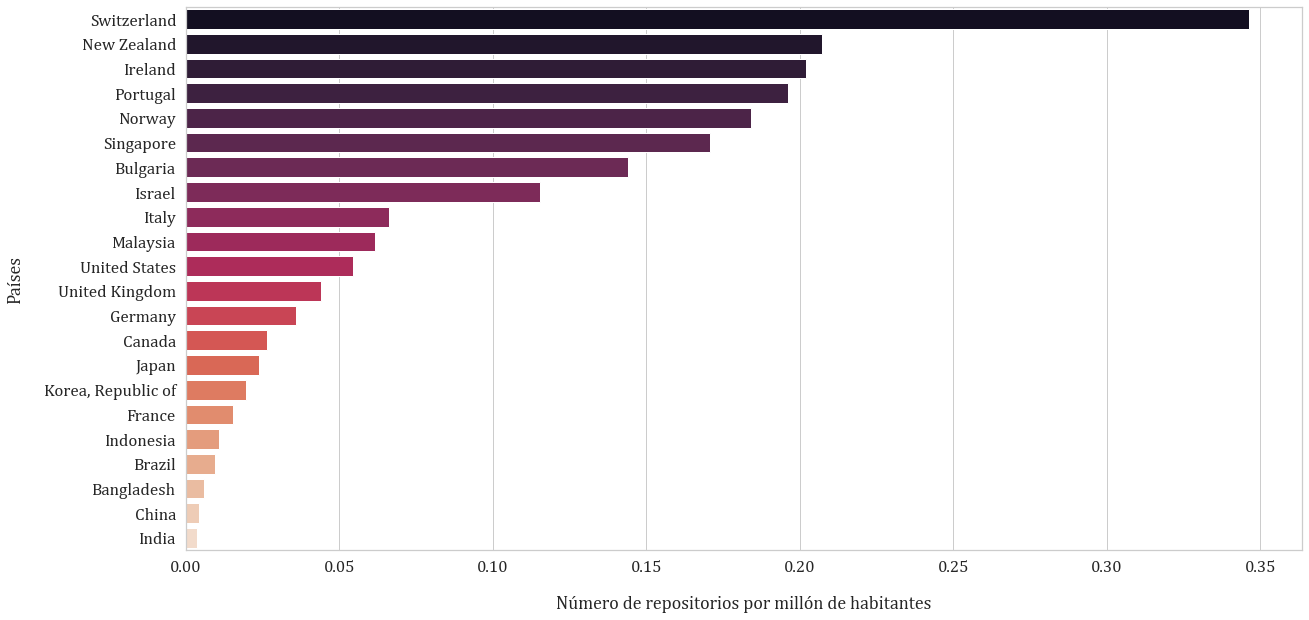

In [608]:
fig = plt.figure(figsize=(20,10))

sns.barplot(y="name", x='num_repos_per_million', 
            data=top_100_con_paises_y_millon_habitantes.sort_values(by="num_repos_per_million", ascending = False), 
            palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios por millón de habitantes', size=18, labelpad=20)
# plt.xticks(np.arange(0, 20, 1))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.show()

--------

### Fecha de creación

In [484]:
top_100

id                         full_name  \
0       238316428           CSSEGISandData/COVID-19   
2271    247386519   covid19india/covid19india-react   
5387    249842476             nytimes/covid-19-data   
13380   243894277    tokyo-metropolitan-gov/covid19   
13024   246079929                owid/covid-19-data   
...           ...                               ...   
59282   250423021  Tencent/TH_COVID19_International   
76762   252258050     youyanggu/covid19_projections   
159145  236146885                 lispczz/pneumonia   
175028  247677393    fossasia/Event-Safety-Measures   
37587   249297850     thepanacealab/covid19_twitter   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
2271             Tracking the impact of COVID-19 in India              6658   
5387    An ongoing repository of data on coronavirus c...              6509   
13380   東京都 新型コロナウイルス感染症対策サイト / Tokyo COVID-19 Task Fo...              6195   
13024   Data on COVID-19 (coronavirus) cases, deaths, ...              4137   
...                                                   ...               ...   
59282                                                 NaN               358   
76762         COVID-19 Projections Using Machine Learning               357   
159145                                   中国新型冠状病毒肺炎地级市疫情图               356   
175028  List of Safety Measures for Events during Covid19               351   
37587   Covid-19 Twitter dataset for non-commercial re...               350   

        forks_count                                           homepage  \
0             17432  https://systems.jhu.edu/research/public-health...   
2271           3343                       https://www.covid19india.org   
5387           2987  https://www.nytimes.com/interactive/2020/us/co...   
13380          2079             https://stopcovid19.metro.tokyo.lg.jp/   
13024          2582             https://ourworldindata.org/coronavirus   
...             ...                                                ...   
59282            82                                                NaN   
76762            87                    https://covid19-projections.com   
159145          100               https://lispczz.github.io/pneumonia/   
175028            4                                                NaN   
37587           136                 http://www.panacealab.org/covid19/   

                                                 html_url  archived  \
0              https://github.com/CSSEGISandData/COVID-19     False   
2271    https://github.com/covid19india/covid19india-r...     False   
5387             https://github.com/nytimes/covid-19-data     False   
13380   https://github.com/tokyo-metropolitan-gov/covid19     False   
13024               https://github.com/owid/covid-19-data     False   
...                                                   ...       ...   
59282   https://github.com/Tencent/TH_COVID19_Internat...     False   
76762    https://github.com/youyanggu/covid19_projections     False   
159145               https://github.com/lispczz/pneumonia     False   
175028  https://github.com/fossasia/Event-Safety-Measures     False   
37587    https://github.com/thepanacealab/covid19_twitter     False   

                language            created_at            updated_at  \
0                    NaN  2020-02-04T22:03:53Z  2021-08-14T11:56:01Z   
2271          JavaScript  2020-03-15T02:16:02Z  2021-08-14T09:00:43Z   
5387                 NaN  2020-03-24T23:41:39Z  2021-08-14T03:14:24Z   
13380                Vue  2020-02-29T02:57:45Z  2021-08-13T09:24:44Z   
13024             Python  2020-03-09T16:00:06Z  2021-08-14T10:14:11Z   
...                  ...                   ...                   ...   
59282               TSQL  2020-03-27T02:35:33Z  2021-08-13T01:02:26Z   
76762                NaN  2020-04-01T18:39:59Z  2021-08-06T07:24:15Z   
159145        J

In [485]:
top_100["created_at"] = pd.to_datetime(top_100['created_at'])
top_100["updated_at"] = pd.to_datetime(top_100['updated_at'])
top_100

id                         full_name  \
0       238316428           CSSEGISandData/COVID-19   
2271    247386519   covid19india/covid19india-react   
5387    249842476             nytimes/covid-19-data   
13380   243894277    tokyo-metropolitan-gov/covid19   
13024   246079929                owid/covid-19-data   
...           ...                               ...   
59282   250423021  Tencent/TH_COVID19_International   
76762   252258050     youyanggu/covid19_projections   
159145  236146885                 lispczz/pneumonia   
175028  247677393    fossasia/Event-Safety-Measures   
37587   249297850     thepanacealab/covid19_twitter   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
2271             Tracking the impact of COVID-19 in India              6658   
5387    An ongoing repository of data on coronavirus c...              6509   
13380   東京都 新型コロナウイルス感染症対策サイト / Tokyo COVID-19 Task Fo...              6195   
13024   Data on COVID-19 (coronavirus) cases, deaths, ...              4137   
...                                                   ...               ...   
59282                                                 NaN               358   
76762         COVID-19 Projections Using Machine Learning               357   
159145                                   中国新型冠状病毒肺炎地级市疫情图               356   
175028  List of Safety Measures for Events during Covid19               351   
37587   Covid-19 Twitter dataset for non-commercial re...               350   

        forks_count                                           homepage  \
0             17432  https://systems.jhu.edu/research/public-health...   
2271           3343                       https://www.covid19india.org   
5387           2987  https://www.nytimes.com/interactive/2020/us/co...   
13380          2079             https://stopcovid19.metro.tokyo.lg.jp/   
13024          2582             https://ourworldindata.org/coronavirus   
...             ...                                                ...   
59282            82                                                NaN   
76762            87                    https://covid19-projections.com   
159145          100               https://lispczz.github.io/pneumonia/   
175028            4                                                NaN   
37587           136                 http://www.panacealab.org/covid19/   

                                                 html_url  archived  \
0              https://github.com/CSSEGISandData/COVID-19     False   
2271    https://github.com/covid19india/covid19india-r...     False   
5387             https://github.com/nytimes/covid-19-data     False   
13380   https://github.com/tokyo-metropolitan-gov/covid19     False   
13024               https://github.com/owid/covid-19-data     False   
...                                                   ...       ...   
59282   https://github.com/Tencent/TH_COVID19_Internat...     False   
76762    https://github.com/youyanggu/covid19_projections     False   
159145               https://github.com/lispczz/pneumonia     False   
175028  https://github.com/fossasia/Event-Safety-Measures     False   
37587    https://github.com/thepanacealab/covid19_twitter     False   

                language                created_at                updated_at  \
0                    NaN 2020-02-04 22:03:53+00:00 2021-08-14 11:56:01+00:00   
2271          JavaScript 2020-03-15 02:16:02+00:00 2021-08-14 09:00:43+00:00   
5387                 NaN 2020-03-24 23:41:39+00:00 2021-08-14 03:14:24+00:00   
13380                Vue 2020-02-29 02:57:45+00:00 2021-08-13 09:24:44+00:00   
13024             Python 2020-03-09 16:00:06+00:00 2021-08-14 10:14:11+00:00   
...                  ...                       ...                       ...   
59282               TSQL 2020-03-27 02:35:33+00:00 2021-08-13 01:02:26+00:00   
76762                Na

In [486]:
top_100_fechas = top_100.copy()
top_100_fechas = top_100_fechas.set_index("created_at")

top_100_fechas_meses = top_100_fechas.copy()
top_100_fechas_meses.index = top_100_fechas_meses.index.strftime('%Y-%m')

top_100_fechas_meses_grouped = top_100_fechas.groupby([top_100_fechas_meses.index]).size()
top_100_fechas_meses_grouped

created_at
2015-04     1
2018-03     1
2020-01    10
2020-02     9
2020-03    42
2020-04    12
2020-05     8
2020-06     1
2020-07     2
2020-08     1
2020-10     1
2020-11     1
2021-01     1
2021-02     1
2021-03     2
2021-04     1
2021-05     1
2021-06     2
2021-07     3
dtype: int64

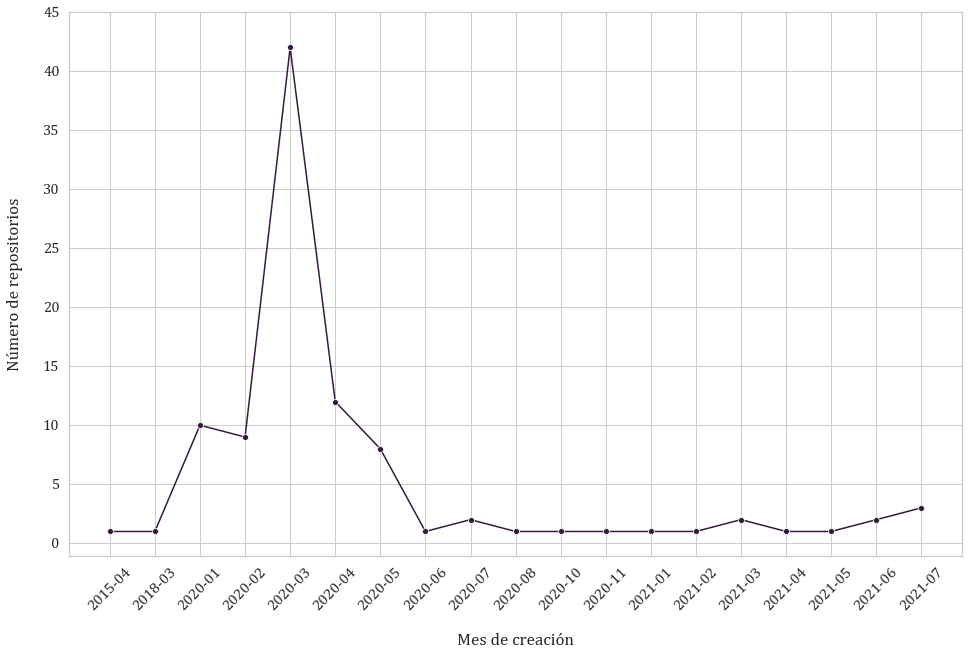

In [490]:
plt.figure(figsize = (16,10))
sns.lineplot(data = top_100_fechas_meses_grouped, color=color[0], marker="o")
plt.xticks(rotation=45)
plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Mes de creación', size=17, labelpad=20) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yticks(np.arange(0, 50, 5))
plt.show()

### Fecha de actualización

In [491]:
top_100_fechas_meses_actu = top_100.copy()
top_100_fechas_meses_actu = top_100_fechas_meses_actu.set_index("updated_at")

top_100_fechas_meses_actu.index = top_100_fechas_meses_actu.index.strftime('%Y-%m')

top_100_fechas_meses_actu_grouped = top_100_fechas_meses_actu.groupby([top_100_fechas_meses_actu.index]).size()
top_100_fechas_meses_actu_grouped = top_100_fechas_meses_actu_grouped.sort_values(ascending = False)
top_100_fechas_meses_actu_grouped

updated_at
2021-08    90
2021-07     9
2021-06     1
dtype: int64

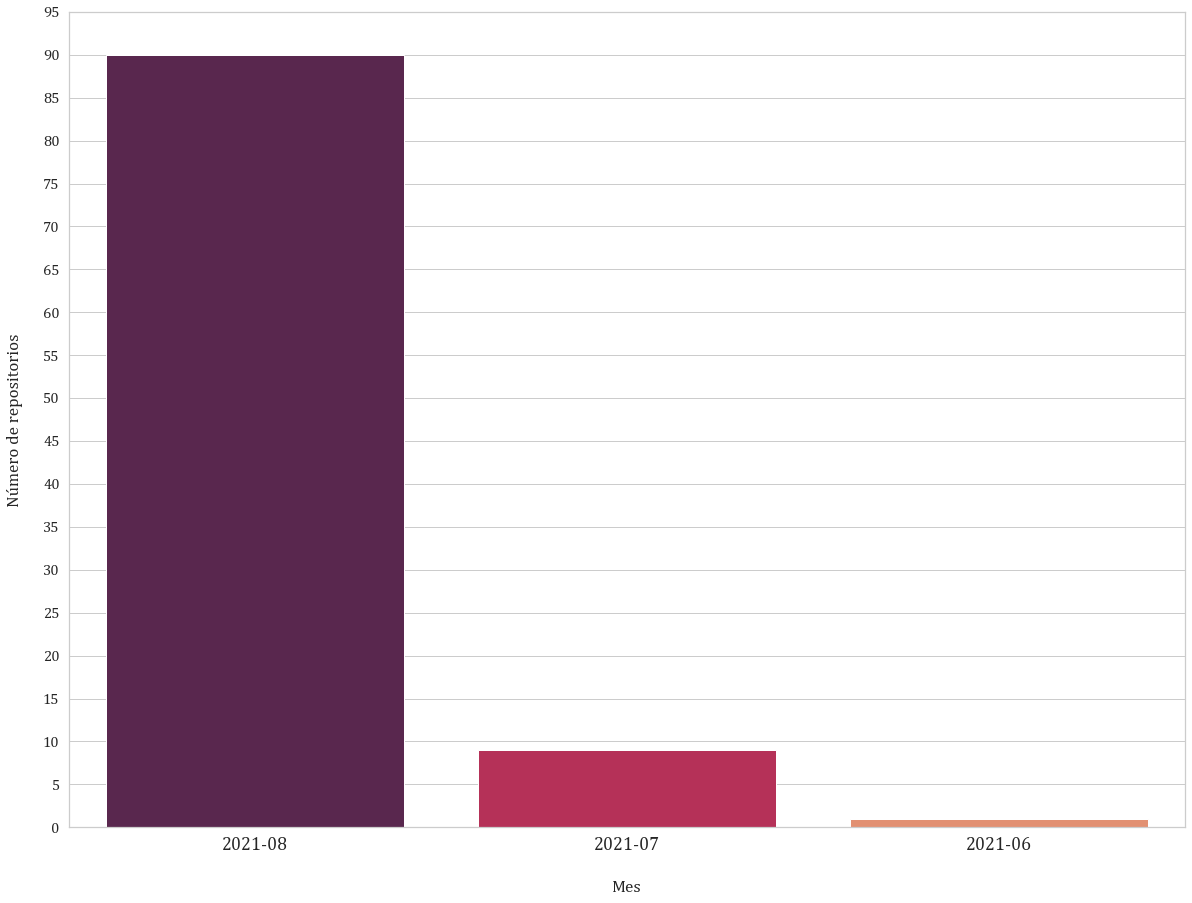

In [495]:
fig = plt.figure(figsize=(20,15))

sns.barplot(x=top_100_fechas_meses_actu_grouped.index, y=top_100_fechas_meses_actu_grouped.values, palette='rocket')
plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Mes', size=17, labelpad=26)
plt.yticks(np.arange(0, 100, 5))
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

In [ ]:
# show(top_100)

In [ ]:
top_100_usuarios = top_100.groupby(top_100["owner.login"]).size()
a = top_100_usuarios.sort_values(ascending = False)
# show(a)

In [427]:
# show(top_100_con_paises)

### Temática

Se han analizado manualmente los 100 repositorios para etiquetarlos con una temática. El *dataset* con la columna de la temática rellena es *top100_con_paises_y_etiquetas.xlsx*.

In [496]:
top_100_con_tematica = pd.read_excel('top100_con_paises_y_etiquetas.xlsx', index_col=[0])
top_100_con_tematica

id                                    full_name  \
1678    247136985                              wcota/covid19br   
9       236119949    globalcitizen/2019-wuhan-coronavirus-data   
46076   245630760                             pcm-dpc/COVID-19   
76564   326954012              italia/covid19-opendata-vaccini   
131302  385245208                  MoH-Malaysia/covid19-public   
...           ...                                          ...   
13382   240615573             ieee8023/covid-chestxray-dataset   
4       234936988                              nextstrain/ncov   
76762   252258050                youyanggu/covid19_projections   
61616   250671863                           UCSD-AI4H/COVID-CT   
3962    244265996  mattroconnor/deep_learning_coronavirus_cure   

                                              description  stargazers_count  \
1678    Confirmed cases and deaths of COVID-19 in Braz...               379   
9       2019 Wuhan Coronavirus data (COVID-19 / 2019-n...               626   
46076           COVID-19 Italia - Monitoraggio situazione              3854   
76564   Open Data su consegna e somministrazione dei v...               480   
131302  Official data on the COVID-19 epidemic in Mala...               528   
...                                                   ...               ...   
13382   We are building an open database of COVID-19 c...              2681   
4       Nextstrain build for novel coronavirus SARS-CoV-2              1208   
76762         COVID-19 Projections Using Machine Learning               357   
61616   COVID-CT-Dataset: A CT Scan Dataset about COVI...               871   
3962    Using deep learning to generate novel molecule...               363   

        forks_count                         homepage  \
1678            116      https://covid19br.wcota.me/   
9               139                              NaN   
46076          2261                              NaN   
76564           180                              NaN   
131302          254                              NaN   
...             ...                              ...   
13382          1114                              NaN   
4               343      https://nextstrain.org/ncov   
76762            87  https://covid19-projections.com   
61616           376                              NaN   
3962            116                              NaN   

                                                 html_url          language  \
1678                   https://github.com/wcota/covid19br               NaN   
9       https://github.com/globalcitizen/2019-wuhan-co...               PHP   
46076                 https://github.com/pcm-dpc/COVID-19               NaN   
76564   https://github.com/italia/covid19-opendata-vac...               NaN   
131302     https://github.com/MoH-Malaysia/covid19-public               NaN   
...                                                   ...               ...   
13382   https://github.com/ieee8023/covid-chestxray-da...  Jupyter Notebook   
4                      https://github.com/nextstrain/ncov            Python   
76762    https://github.com/youyanggu/covid19_projections               NaN   
61616               https://github.com/UCSD-AI4H/COVID-CT  Jupyter Notebook   
3962    https://github.com/mattroconnor/deep_learning_...  Jupyter Notebook   

                  created_at            updated_at    owner.login  \
1678    2020-03-13T18:26:37Z  2021-08-14T03:41:52Z          wcota   
9       2020-01-25T03:17:22Z  2021-07-26T09:12:32Z  globalcitizen   
46076   2020-03-07T12:42:02Z  2021-08-12T16:27:18Z        pcm-dpc   
76564   2021-01-05T09:47:27Z  2021-08-14T04:18:24Z         italia   
131302  2021-07-12T12:46:56Z  2021-08-14T11:58:54Z   MoH-Malaysia   
...                      ...                   ...            ...   
13382   2020-02-14T23:22:23Z  2021-08-12T19:20:29Z       ieee8023   
4       2020-01-19T17:23:17Z  2021-08-13T12:36:10Z     nextstrain   
76762   2020-04-01T18:39:59Z  

In [497]:
top_100_con_tematica_grouped = top_100_con_tematica.groupby(top_100_con_tematica.temas).size()
top_100_con_tematica_grouped = top_100_con_tematica_grouped.sort_values(ascending = False)
top_100_con_tematica_grouped = top_100_con_tematica_grouped.to_frame()
top_100_con_tematica_grouped.columns = ["num_repos"]
top_100_con_tematica_grouped

num_repos
temas                                            
herramienta                                    27
herramienta - seguimiento                      27
datasets                                       14
información - otros                             6
investigación/detección                         6
herramienta, investigación/detección            3
información                                     3
información, datasets                           3
investigación/detección, datasets               3
herramienta - seguimiento, datasets             2
herramienta, datasets                           2
herramienta, investigación                      2
herramienta - seguimiento, información          1
herramienta, información                        1

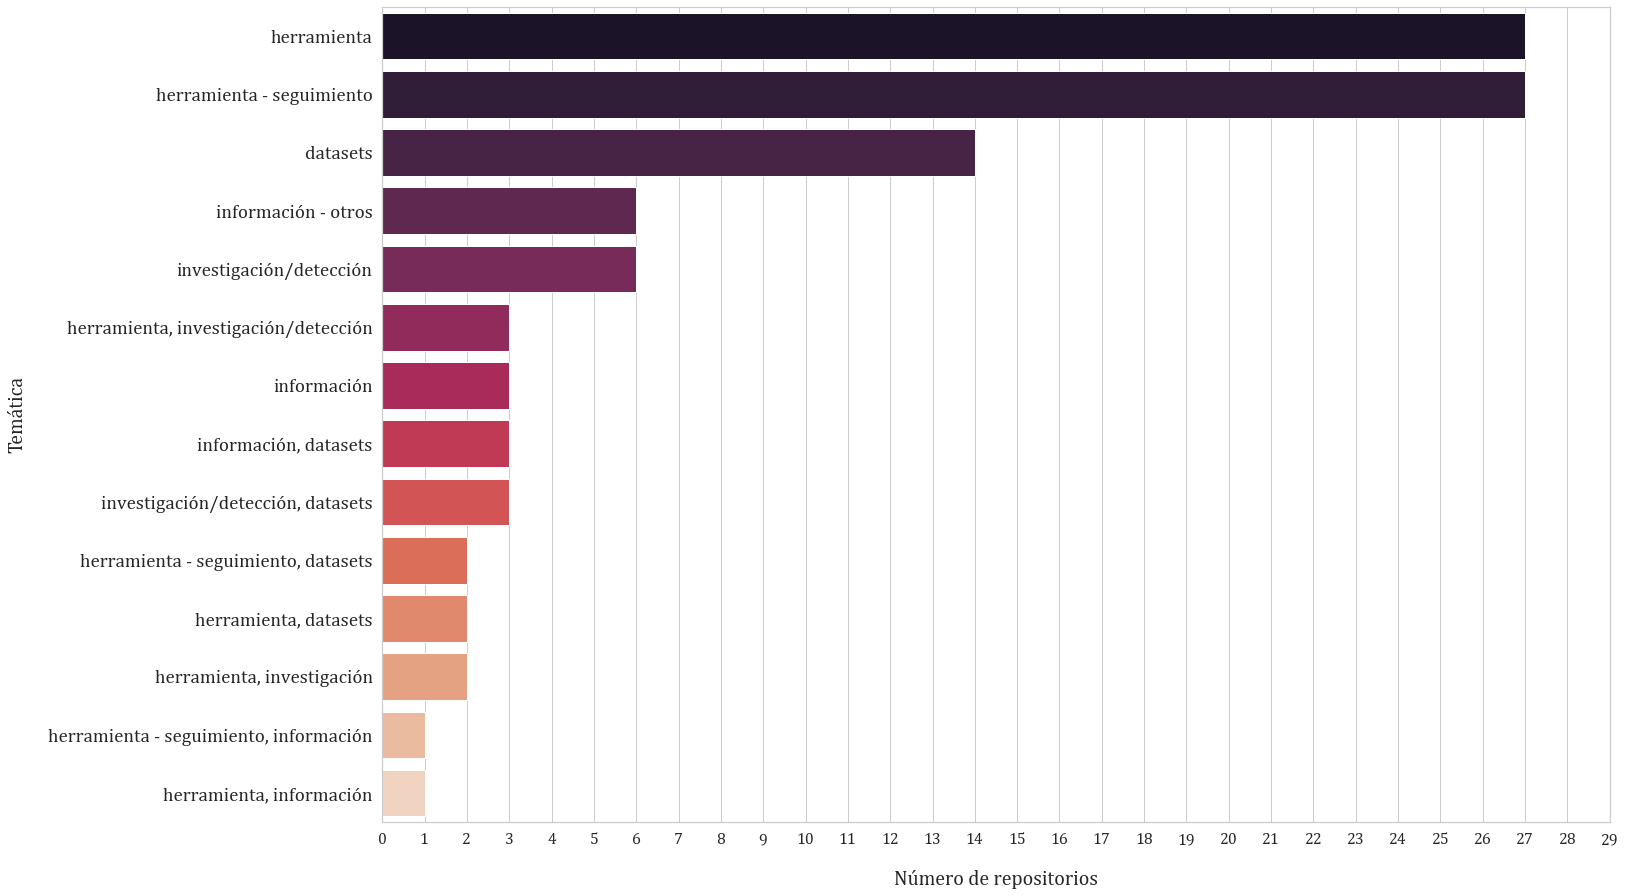

In [501]:
fig = plt.figure(figsize=(22,15))

sns.barplot(y=top_100_con_tematica_grouped.index, x='num_repos', data=top_100_con_tematica_grouped, palette='rocket')
plt.ylabel('Temática', size=20, labelpad=22) 
plt.xlabel('Número de repositorios', size=20, labelpad=22)
plt.xticks(np.arange(0, 30, 1))
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.show()

-------

## Usuarios

In [355]:
usuarios = pd.read_csv('usuarios_total_validos.csv')
usuarios

repo_id           login  \
0       238316428  CSSEGISandData   
1       235374822   midas-network   
2       239777191     RamiKrispin   
3       237129709   FoldingAtHome   
4       234936988      nextstrain   
...           ...             ...   
177817  269527538          ALT-F1   
177818  270034436   marvinIsSacul   
177819  269906994  jahnavi-prasad   
177820  270013759         Tackode   
177821  270006438         Tackode   

                                                      bio  \
0                                                     NaN   
1       The MIDAS Network is funded by the National In...   
2       Data scientist, 📦 developer, author, #rstats, ...   
3                                                     NaN   
4                Real-time tracking of pathogen evolution   
...                                                   ...   
177817  Design, Build, Test, Deploy and Maintain large...   
177818                         Just a little bit curious.   
177819                                                NaN   
177820                                                NaN   
177821                                                NaN   

                                     blog                           company  \
0                https://systems.jhu.edu/  CSSE at Johns Hopkins University   
1                                     NaN                               NaN   
2          https://ramikrispin.github.io/                               NaN   
3              https://foldingathome.org/                               NaN   
4                  https://nextstrain.org                               NaN   
...                                   ...                               ...   
177817               http://www.alt-f1.be                               NaN   
177818                                NaN                         @ikhokha    
177819  www.linkedin.com/in/jahnaviprasad       https://jahnaviprasad.tech/   
177820                https://tackode.com                               NaN   
177821                https://tackode.com                               NaN   

                  created_at  followers                   location  \
0       2020-02-04T22:02:23Z     3101.0              Baltimore, MD   
1       2019-05-08T14:56:50Z        0.0                        NaN   
2       2015-06-05T09:56:59Z      669.0  Cupertino, California, US   
3       2013-04-16T01:20:37Z        0.0                      WUSTL   
4       2016-09-12T21:55:44Z        0.0                        NaN   
...                      ...        ...                        ...   
177817  2011-06-21T00:01:55Z        0.0          Brussels, Belgium   
177818  2018-10-04T06:11:53Z        0.0               South Africa   
177819  2018-08-13T17:23:30Z       19.0                      India   
177820  2020-06-06T14:27:00Z        0.0                      Paris   
177821  2020-06-06T14:27:00Z        0.0                      Paris   

                                                     name          type  \
0                                                     NaN          User   
1                                           MIDAS Network  Organization   
2                                            Rami Krispin          User   
3                                            Folding@home  Organization   
4                                              Nextstrain  Organization   
...                                                   ...           ...   
177817  ALT-F1 supports your industry with SOFTWARE, D...  Organization   
177818                                      Marvin Kagiso          User   
177819                                     Jahnavi Prasad          User   
177820                                            Tackode  Organization   
177821                                            Tackode  Organization   

                  updated_at  
0       2021-08-23T13:11:11Z  
1       2021-08-16T16:14:15Z  
2       2021-04-13T21:43:59Z  
3       2021-07-1

### Usuarios únicos

In [356]:
usuarios_unicos = usuarios.drop_duplicates(subset = "login")
usuarios_unicos.shape[0]

149866

#### Tipo de cuentas

In [357]:
grouped_types = usuarios_unicos.groupby(usuarios_unicos.type).size()
grouped_types

type
Organization      5763
User            144103
dtype: int64

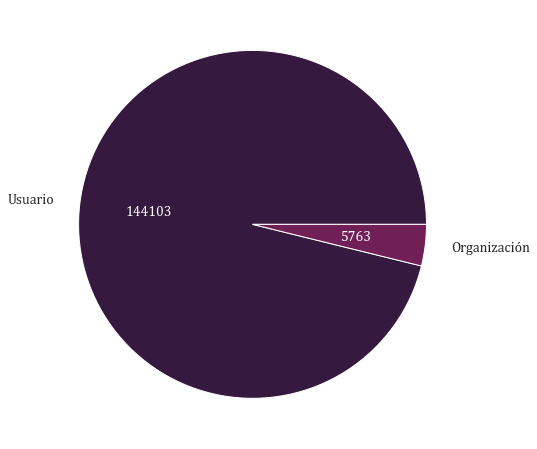

In [358]:
tipos = ["Usuario", "Organización"]
num_cuentas = [grouped_types[1], grouped_types[0]]

plt.figure(figsize=(10,8))
# Label distance: gives the space between labels and the center of the pie
_, _, autotexts = plt.pie(num_cuentas, labels=tipos, colors=color, autopct=lambda p:f'{p*sum(num_cuentas)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

#### Fecha de registro

In [359]:
df_usuarios_unicos_fecha = usuarios_unicos.copy()
df_usuarios_unicos_fecha["created_at"] = pd.to_datetime(df_usuarios_unicos_fecha['created_at'])
df_usuarios_unicos_fecha = df_usuarios_unicos_fecha.set_index("created_at")
df_usuarios_unicos_fecha

repo_id           login  \
created_at                                             
2020-02-04 22:02:23+00:00  238316428  CSSEGISandData   
2019-05-08 14:56:50+00:00  235374822   midas-network   
2015-06-05 09:56:59+00:00  239777191     RamiKrispin   
2013-04-16 01:20:37+00:00  237129709   FoldingAtHome   
2016-09-12 21:55:44+00:00  234936988      nextstrain   
...                              ...             ...   
2017-08-09 17:01:53+00:00  268856502            fwcd   
2010-04-22 14:46:51+00:00  269601203           StefH   
2018-10-04 06:11:53+00:00  270034436   marvinIsSacul   
2018-08-13 17:23:30+00:00  269906994  jahnavi-prasad   
2020-06-06 14:27:00+00:00  270013759         Tackode   

                                                                         bio  \
created_at                                                                     
2020-02-04 22:02:23+00:00                                                NaN   
2019-05-08 14:56:50+00:00  The MIDAS Network is funded by the National In...   
2015-06-05 09:56:59+00:00  Data scientist, 📦 developer, author, #rstats, ...   
2013-04-16 01:20:37+00:00                                                NaN   
2016-09-12 21:55:44+00:00           Real-time tracking of pathogen evolution   
...                                                                      ...   
2017-08-09 17:01:53+00:00                               CS and math student.   
2010-04-22 14:46:51+00:00                     https://twitter.com/sheyenrath   
2018-10-04 06:11:53+00:00                         Just a little bit curious.   
2018-08-13 17:23:30+00:00                                                NaN   
2020-06-06 14:27:00+00:00                                                NaN   

                                                        blog  \
created_at                                                     
2020-02-04 22:02:23+00:00           https://systems.jhu.edu/   
2019-05-08 14:56:50+00:00                                NaN   
2015-06-05 09:56:59+00:00     https://ramikrispin.github.io/   
2013-04-16 01:20:37+00:00         https://foldingathome.org/   
2016-09-12 21:55:44+00:00             https://nextstrain.org   
...                                                      ...   
2017-08-09 17:01:53+00:00                                NaN   
2010-04-22 14:46:51+00:00         https://sourcerer.io/stefh   
2018-10-04 06:11:53+00:00                                NaN   
2018-08-13 17:23:30+00:00  www.linkedin.com/in/jahnaviprasad   
2020-06-06 14:27:00+00:00                https://tackode.com   

                                                    company  followers  \
created_at                                                               
2020-02-04 22:02:23+00:00  CSSE at Johns Hopkins University     3101.0   
2019-05-08 14:56:50+00:00                               NaN        0.0   
2015-06-05 09:56:59+00:00                               NaN      669.0   
2013-04-16 01:20:37+00:00                               NaN        0.0   
2016-09-12 21:55:44+00:00                               NaN        0.0   
...                                                     ...        ...   
2017-08-09 17:01:53+00:00                   Kiel University       80.0   
2010-04-22 14:46:51+00:00                         mStack.nl      113.0   
2018-10-04 06:11:53+00:00                         @ikhokha         0.0   
2018-08-13 17:23:30+00:00       https://jahnaviprasad.tech/       19.0   
2020-06-06 14:27:00+00:00                               NaN        0.0   

                                            location            name  \
created_at                                                             
2020-02-04 22:02:23+00:00              Baltimore, MD             NaN   
2019-05-08 14:56:50+00:00                        NaN   MIDAS Network   
2015-06-05 09:56:59+00:00  Cupertino, California, US    Rami Krispin   
2013-04-16 01:20:37+00:00                      WUSTL    Folding@home   
2016-09-12 21:55:44+00:00      

In [360]:
df_usuarios_unicos_fecha_mes = df_usuarios_unicos_fecha.copy()
df_usuarios_unicos_fecha_mes.index = df_usuarios_unicos_fecha_mes.index.strftime('%Y-%m')
df_usuarios_unicos_fecha_mes

repo_id           login  \
created_at                              
2020-02     238316428  CSSEGISandData   
2019-05     235374822   midas-network   
2015-06     239777191     RamiKrispin   
2013-04     237129709   FoldingAtHome   
2016-09     234936988      nextstrain   
...               ...             ...   
2017-08     268856502            fwcd   
2010-04     269601203           StefH   
2018-10     270034436   marvinIsSacul   
2018-08     269906994  jahnavi-prasad   
2020-06     270013759         Tackode   

                                                          bio  \
created_at                                                      
2020-02                                                   NaN   
2019-05     The MIDAS Network is funded by the National In...   
2015-06     Data scientist, 📦 developer, author, #rstats, ...   
2013-04                                                   NaN   
2016-09              Real-time tracking of pathogen evolution   
...                                                       ...   
2017-08                                  CS and math student.   
2010-04                        https://twitter.com/sheyenrath   
2018-10                            Just a little bit curious.   
2018-08                                                   NaN   
2020-06                                                   NaN   

                                         blog  \
created_at                                      
2020-02              https://systems.jhu.edu/   
2019-05                                   NaN   
2015-06        https://ramikrispin.github.io/   
2013-04            https://foldingathome.org/   
2016-09                https://nextstrain.org   
...                                       ...   
2017-08                                   NaN   
2010-04            https://sourcerer.io/stefh   
2018-10                                   NaN   
2018-08     www.linkedin.com/in/jahnaviprasad   
2020-06                   https://tackode.com   

                                     company  followers  \
created_at                                                
2020-02     CSSE at Johns Hopkins University     3101.0   
2019-05                                  NaN        0.0   
2015-06                                  NaN      669.0   
2013-04                                  NaN        0.0   
2016-09                                  NaN        0.0   
...                                      ...        ...   
2017-08                      Kiel University       80.0   
2010-04                            mStack.nl      113.0   
2018-10                            @ikhokha         0.0   
2018-08          https://jahnaviprasad.tech/       19.0   
2020-06                                  NaN        0.0   

                             location            name          type  \
created_at                                                            
2020-02                 Baltimore, MD             NaN          User   
2019-05                           NaN   MIDAS Network  Organization   
2015-06     Cupertino, California, US    Rami Krispin          User   
2013-04                         WUSTL    Folding@home  Organization   
2016-09                           NaN      Nextstrain  Organization   
...                               ...             ...           ...   
2017-08                       Germany              FW          User   
2010-04                            NL  Stef Heyenrath          User   
2018-10                  South Africa   Marvin Kagiso          User   
2018-08                         India  Jahnavi Prasad          User   
2020-06                         Paris         Tackode  Organization   

                      updated_at  
created_at                        
2020-02     2021-08-23T13:11:11Z  
2019-05     2021-08-16T16:14:15Z  
2015-06     2021-04-13T21:43:59Z  
2013-04     2021-07-12T14:38:21Z  
2016-09     2021-04-22T16:46:07Z  
...                          ...  
2017-08     2021-08-17T1

In [361]:
df_usuarios_unicos_fecha_mes_grouped = df_usuarios_unicos_fecha_mes.groupby([df_usuarios_unicos_fecha_mes.index]).size()
df_usuarios_unicos_fecha_mes_grouped

created_at
2008-01       1
2008-02      19
2008-03      22
2008-04      32
2008-05      23
           ... 
2021-04    1209
2021-05    1352
2021-06     853
2021-07     460
2021-08       5
Length: 164, dtype: int64

In [362]:
df_usuarios_created_grouped = df_usuarios_unicos_fecha_mes_grouped.sort_values(ascending = False).head(30)
df_usuarios_created_grouped = df_usuarios_created_grouped.to_frame()
df_usuarios_created_grouped.columns = ["num_usuarios"]
df_usuarios_created_grouped

num_usuarios
created_at              
2020-04             5682
2020-03             5544
2020-05             4376
2019-09             3558
2019-10             3295
2020-06             3281
2020-02             3242
2020-01             3070
2020-07             3052
2020-08             2736
2019-08             2728
2020-09             2629
2019-11             2574
2019-07             2506
2018-10             2424
2020-10             2323
2019-01             2303
2019-03             2295
2018-09             2280
2019-02             2243
2019-12             2207
2019-06             2194
2019-05             2135
2019-04             2080
2018-08             1995
2020-11             1823
2018-03             1798
2018-01             1721
2018-07             1693
2018-11             1683

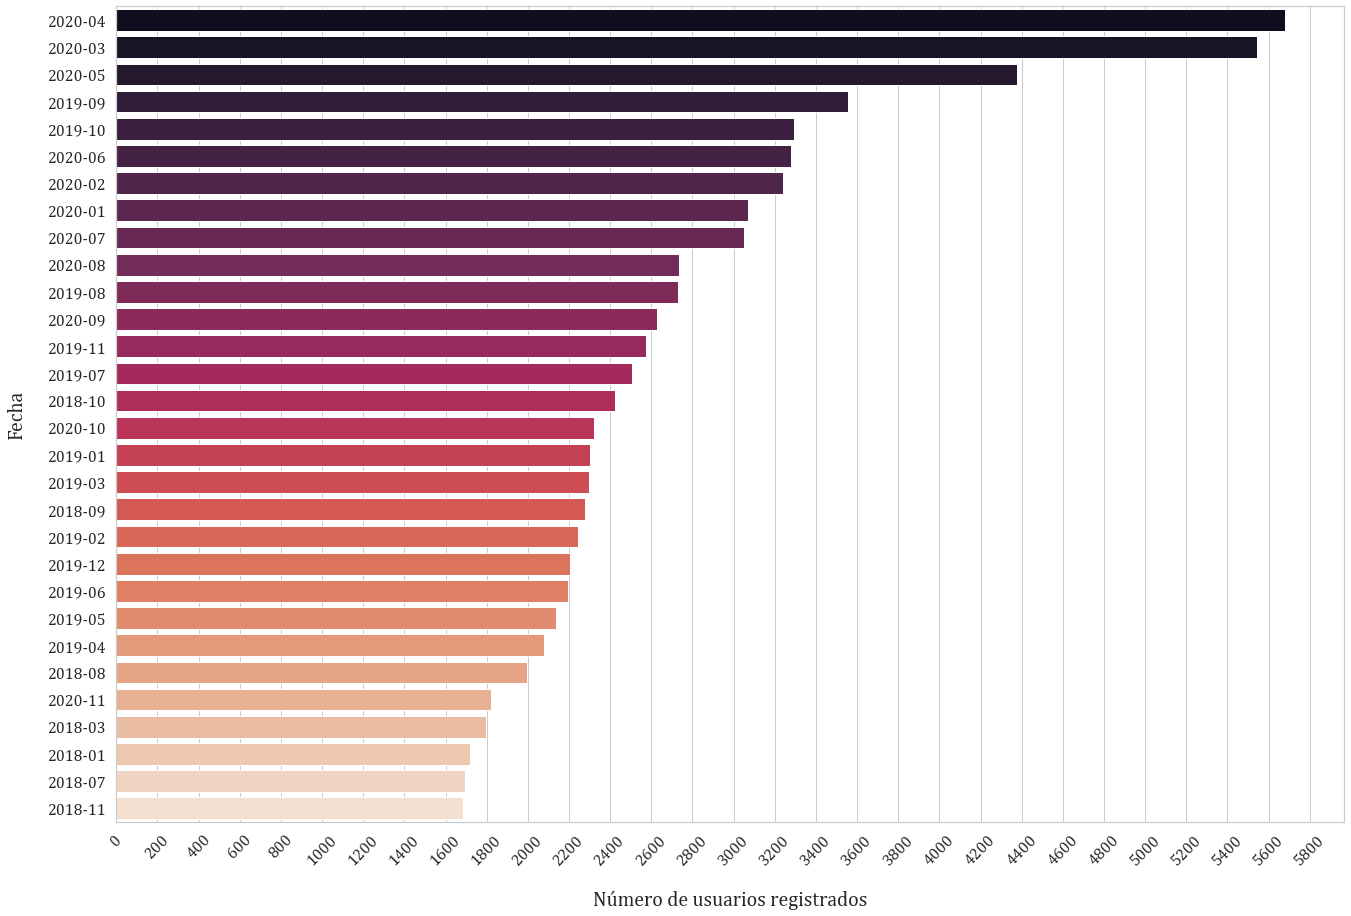

In [367]:
fig = plt.figure(figsize=(22,15))

sns.barplot(y=df_usuarios_created_grouped.index, x=df_usuarios_created_grouped.num_usuarios, data=df_usuarios_created_grouped, palette='rocket')
plt.ylabel('Fecha', size=20, labelpad=22) 
plt.xlabel('Número de usuarios registrados', size=20, labelpad=22)
plt.xticks(np.arange(0, 6000, 200))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

#### Seguidores

In [374]:
df_usuarios_unicos_seguidores = usuarios_unicos.copy()
df_usuarios_unicos_seguidores

repo_id           login  \
0       238316428  CSSEGISandData   
1       235374822   midas-network   
2       239777191     RamiKrispin   
3       237129709   FoldingAtHome   
4       234936988      nextstrain   
...           ...             ...   
177814  268856502            fwcd   
177816  269601203           StefH   
177818  270034436   marvinIsSacul   
177819  269906994  jahnavi-prasad   
177820  270013759         Tackode   

                                                      bio  \
0                                                     NaN   
1       The MIDAS Network is funded by the National In...   
2       Data scientist, 📦 developer, author, #rstats, ...   
3                                                     NaN   
4                Real-time tracking of pathogen evolution   
...                                                   ...   
177814                               CS and math student.   
177816                     https://twitter.com/sheyenrath   
177818                         Just a little bit curious.   
177819                                                NaN   
177820                                                NaN   

                                     blog                           company  \
0                https://systems.jhu.edu/  CSSE at Johns Hopkins University   
1                                     NaN                               NaN   
2          https://ramikrispin.github.io/                               NaN   
3              https://foldingathome.org/                               NaN   
4                  https://nextstrain.org                               NaN   
...                                   ...                               ...   
177814                                NaN                   Kiel University   
177816         https://sourcerer.io/stefh                         mStack.nl   
177818                                NaN                         @ikhokha    
177819  www.linkedin.com/in/jahnaviprasad       https://jahnaviprasad.tech/   
177820                https://tackode.com                               NaN   

                  created_at  followers                   location  \
0       2020-02-04T22:02:23Z     3101.0              Baltimore, MD   
1       2019-05-08T14:56:50Z        0.0                        NaN   
2       2015-06-05T09:56:59Z      669.0  Cupertino, California, US   
3       2013-04-16T01:20:37Z        0.0                      WUSTL   
4       2016-09-12T21:55:44Z        0.0                        NaN   
...                      ...        ...                        ...   
177814  2017-08-09T17:01:53Z       80.0                    Germany   
177816  2010-04-22T14:46:51Z      113.0                         NL   
177818  2018-10-04T06:11:53Z        0.0               South Africa   
177819  2018-08-13T17:23:30Z       19.0                      India   
177820  2020-06-06T14:27:00Z        0.0                      Paris   

                  name          type            updated_at  
0                  NaN          User  2021-08-23T13:11:11Z  
1        MIDAS Network  Organization  2021-08-16T16:14:15Z  
2         Rami Krispin          User  2021-04-13T21:43:59Z  
3         Folding@home  Organization  2021-07-12T14:38:21Z  
4           Nextstrain  Organization  2021-04-22T16:46:07Z  
...                ...           ...                   ...  
177814              FW          User  2021-08-17T12:02:01Z  
177816  Stef Heyenrath          User  2021-08-28T07:04:11Z  
177818   Marvin Kagiso          User  2021-08-18T08:37:09Z  
177819  Jahnavi Prasad          User  2021-08-19T14:54:45Z  
177820         Tackode  Organization  2021-08-16T17:01:02Z  

[149866 rows x 11 columns]

In [375]:
df_usuarios_unicos_seguidores.sort_values(by="followers", ascending = False)

repo_id             login  \
115865  360669603      bradtraversy   
77963   251170593          karpathy   
176956  249301266            geohot   
93346   253048275         mitsuhiko   
48      237517471  WebDevSimplified   
...           ...               ...   
82617   324582844  sekhar-git-cloud   
82614   324490964          jjiaoyan   
82613   324543172         Luigi1201   
82611   324611535           fuseter   
177820  270013759           Tackode   

                                                      bio  \
115865  Full stack web developer and online instructor...   
77963   I like to train Deep Neural Nets on large data...   
176956         \r\n    We will win self driving cars.\r\n   
93346   Software developer and Open Source nut. Creato...   
48                                                    NaN   
...                                                   ...   
82617                                                 NaN   
82614                                                 NaN   
82613                                                 NaN   
82611                                                 NaN   
177820                                                NaN   

                                blog           company            created_at  \
115865             traversymedia.com    Traversy Media  2013-09-26T15:36:02Z   
77963   https://twitter.com/karpathy               NaN  2010-04-10T17:55:32Z   
176956                    1m2019.com          comma.ai  2009-04-12T03:30:56Z   
93346       http://lucumr.pocoo.org/            Sentry  2008-04-15T10:03:57Z   
48          www.webdevsimplified.com  WebDevSimplified  2018-05-29T02:08:43Z   
...                              ...               ...                   ...   
82617                            NaN               NaN  2020-12-07T07:25:27Z   
82614                            NaN               NaN  2018-02-05T03:49:39Z   
82613                            NaN               NaN  2020-12-10T16:14:35Z   
82611                            NaN               NaN  2019-07-23T08:30:13Z   
177820           https://tackode.com               NaN  2020-06-06T14:27:00Z   

        followers       location                name          type  \
115865    43806.0  Massachusetts       Brad Traversy          User   
77963     30994.0       Stanford              Andrej          User   
176956    24632.0  San Diego, CA         George Hotz          User   
93346     15990.0        Austria      Armin Ronacher          User   
48        11229.0       Nebraska                 NaN          User   
...           ...            ...                 ...           ...   
82617         0.0            NaN                 NaN          User   
82614         0.0            NaN                 NaN          User   
82613         0.0            NaN                 NaN          User   
82611         0.0            NaN  พงศ์คเณศ แก้วฤทธิ์          User   
177820        0.0          Paris             Tackode  Organization   

                  updated_at  
115865  2021-08-03T22:28:41Z  
77963   2021-04-27T03:34:21Z  
176956  2021-08-29T07:28:11Z  
93346   2021-08-09T07:07:33Z  
48      2021-07-26T13:27:39Z  
...                      ...  
82617   2021-04-20T10:12:46Z  
82614   2021-08-02T15:31:34Z  
82613   2021-07-09T15:51:54Z  
82611   2021-06-07T02:51:54Z  
177820  2021-08-16T17:01:02Z  

[149866 rows x 11 columns]

In [376]:
df_usuarios_unicos_seguidores_grouped = df_usuarios_unicos_seguidores.groupby([df_usuarios_unicos_seguidores.followers]).size()
df_usuarios_unicos_seguidores_grouped

followers
0.0        66564
1.0        20387
2.0        11772
3.0         7987
4.0         5845
           ...  
11229.0        1
15990.0        1
24632.0        1
30994.0        1
43806.0        1
Length: 640, dtype: int64

In [377]:
df_usuarios_unicos_seguidores_grouped = df_usuarios_unicos_seguidores_grouped.sort_values(ascending = False)
df_usuarios_unicos_seguidores_grouped = df_usuarios_unicos_seguidores_grouped.to_frame()
df_usuarios_unicos_seguidores_grouped.columns = ["num_usuarios"]
df_usuarios_unicos_seguidores_grouped

num_usuarios
followers              
0.0               66564
1.0               20387
2.0               11772
3.0                7987
4.0                5845
...                 ...
547.0                 1
541.0                 1
539.0                 1
537.0                 1
43806.0               1

[640 rows x 1 columns]

In [370]:
df_usuarios_unicos_seguidores_grouped[100:].sum()

num_usuarios    1810
dtype: int64

In [419]:
df_usuarios_unicos_seguidores_grouped.sort_index()[100:].sum().values[0]

1745

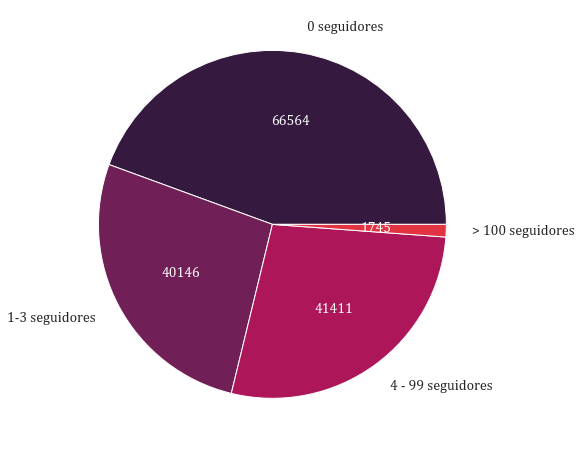

In [420]:
seguidores = ["0 seguidores", "1-3 seguidores", "4 - 99 seguidores", "> 100 seguidores"]
num_usuarios = [df_usuarios_unicos_seguidores_grouped[:0].sum().values[0], 
                df_usuarios_unicos_seguidores_grouped[1:3].sum().values[0], 
                df_usuarios_unicos_seguidores_grouped.sort_index()[4:99].sum().values[0], 
                df_usuarios_unicos_seguidores_grouped.sort_index()[100:].sum().values[0]]

plt.figure(figsize=(10,8))
# Label distance: gives the space between labels and the center of the pie
_, _, autotexts = plt.pie(num_usuarios, labels=seguidores, colors=color, autopct=lambda p:f'{p*sum(num_usuarios)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

# plt.title('Distribución de estrellas por repositorio', fontsize=20)
plt.show()

### Usuarios con más repositorios creados

In [388]:
top_usuarios = usuarios.groupby(['login']).size().reset_index(name='num_repos').sort_values(by=['num_repos'], ascending=False)
top_usuarios

login  num_repos
41659      SmartPracticeschool        816
10985     Covid19-project-hack         72
71472          davidjayjackson         58
123118              rearc-data         40
134585  soumyadipchattopadhyay         40
...                        ...        ...
53246                  akuku20          1
53245                   akukas          1
53244              akufarich75          1
53241                   aku134          1
149865                 zzyin66          1

[149866 rows x 2 columns]

In [389]:
top_20_usuarios = top_usuarios[:20]
top_20_usuarios

login  num_repos
41659      SmartPracticeschool        816
10985     Covid19-project-hack         72
71472          davidjayjackson         58
123118              rearc-data         40
134585  soumyadipchattopadhyay         40
68686               coronasafe         39
108092                  minvws         39
7085             BBC-Data-Unit         37
78035             exactum-furg         36
1229                AP-2020-1S         35
8991             COVID-19-Apps         34
83068                 guardian         34
109727                 mrc-ide         32
77219             epiforecasts         30
32172                 NumtraCG         30
74870            drjoeycadieux         29
118766               pooja2893         28
133757          smartinternz02         28
135578             statistikZH         27
114966           ohdsi-studies         27

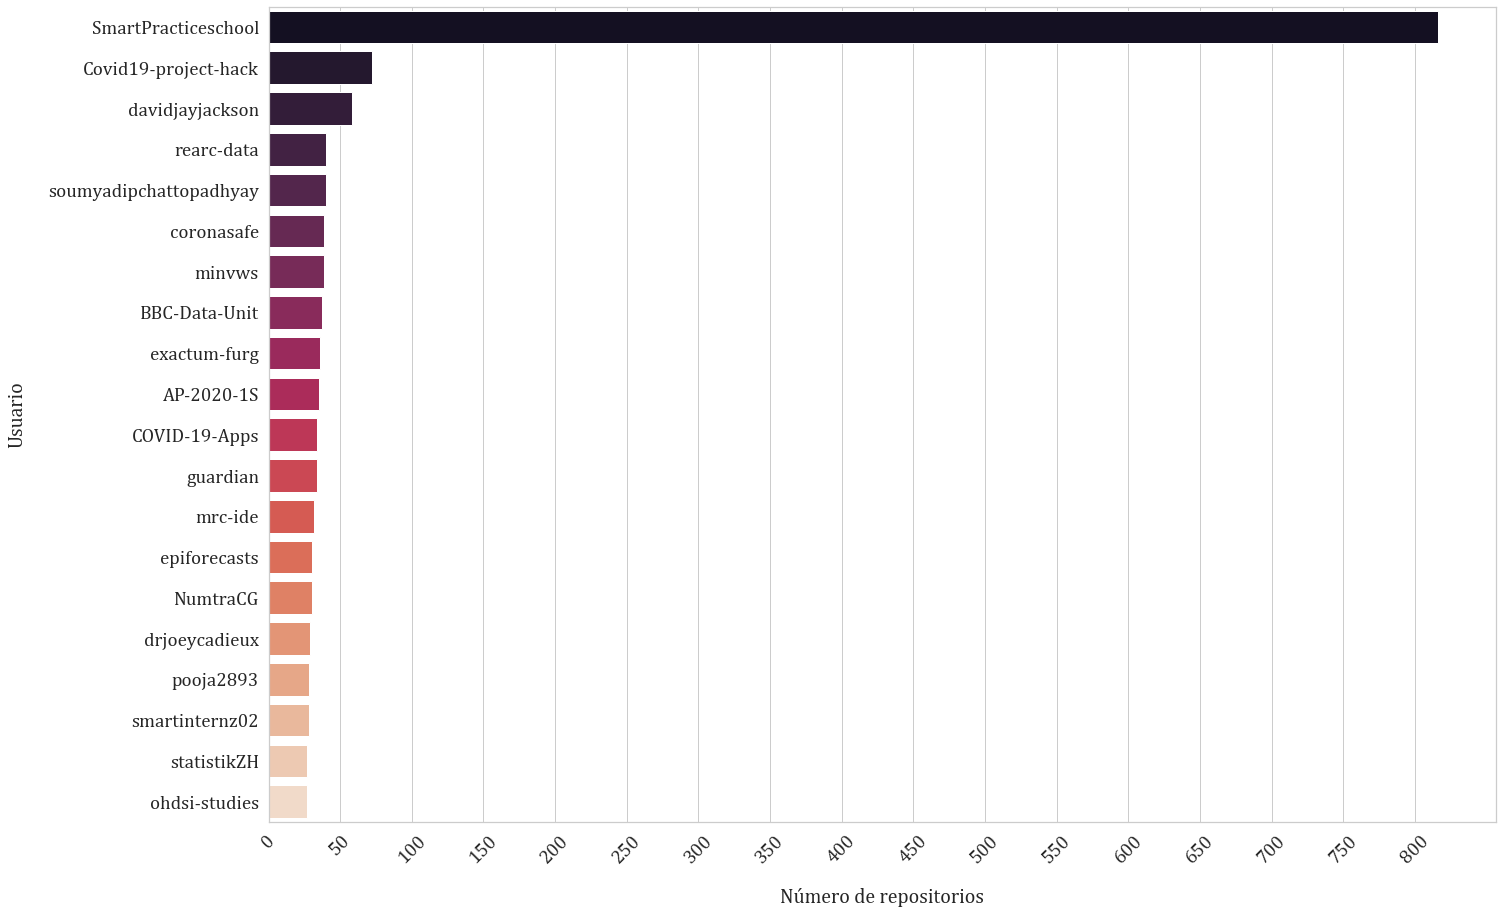

In [397]:
fig = plt.figure(figsize=(22,15))

sns.barplot(y='login', x='num_repos', data=top_20_usuarios, palette='rocket')
plt.ylabel('Usuario', size=20, labelpad=22) 
plt.xlabel('Número de repositorios', size=20, labelpad=22)
plt.xticks(np.arange(0, 840, 50))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

In [391]:
top_20_usuarios_sin_primero = top_usuarios[1:21]
top_20_usuarios_sin_primero

login  num_repos
10985     Covid19-project-hack         72
71472          davidjayjackson         58
123118              rearc-data         40
134585  soumyadipchattopadhyay         40
68686               coronasafe         39
108092                  minvws         39
7085             BBC-Data-Unit         37
78035             exactum-furg         36
1229                AP-2020-1S         35
8991             COVID-19-Apps         34
83068                 guardian         34
109727                 mrc-ide         32
77219             epiforecasts         30
32172                 NumtraCG         30
74870            drjoeycadieux         29
118766               pooja2893         28
133757          smartinternz02         28
135578             statistikZH         27
114966           ohdsi-studies         27
69427                     cran         26

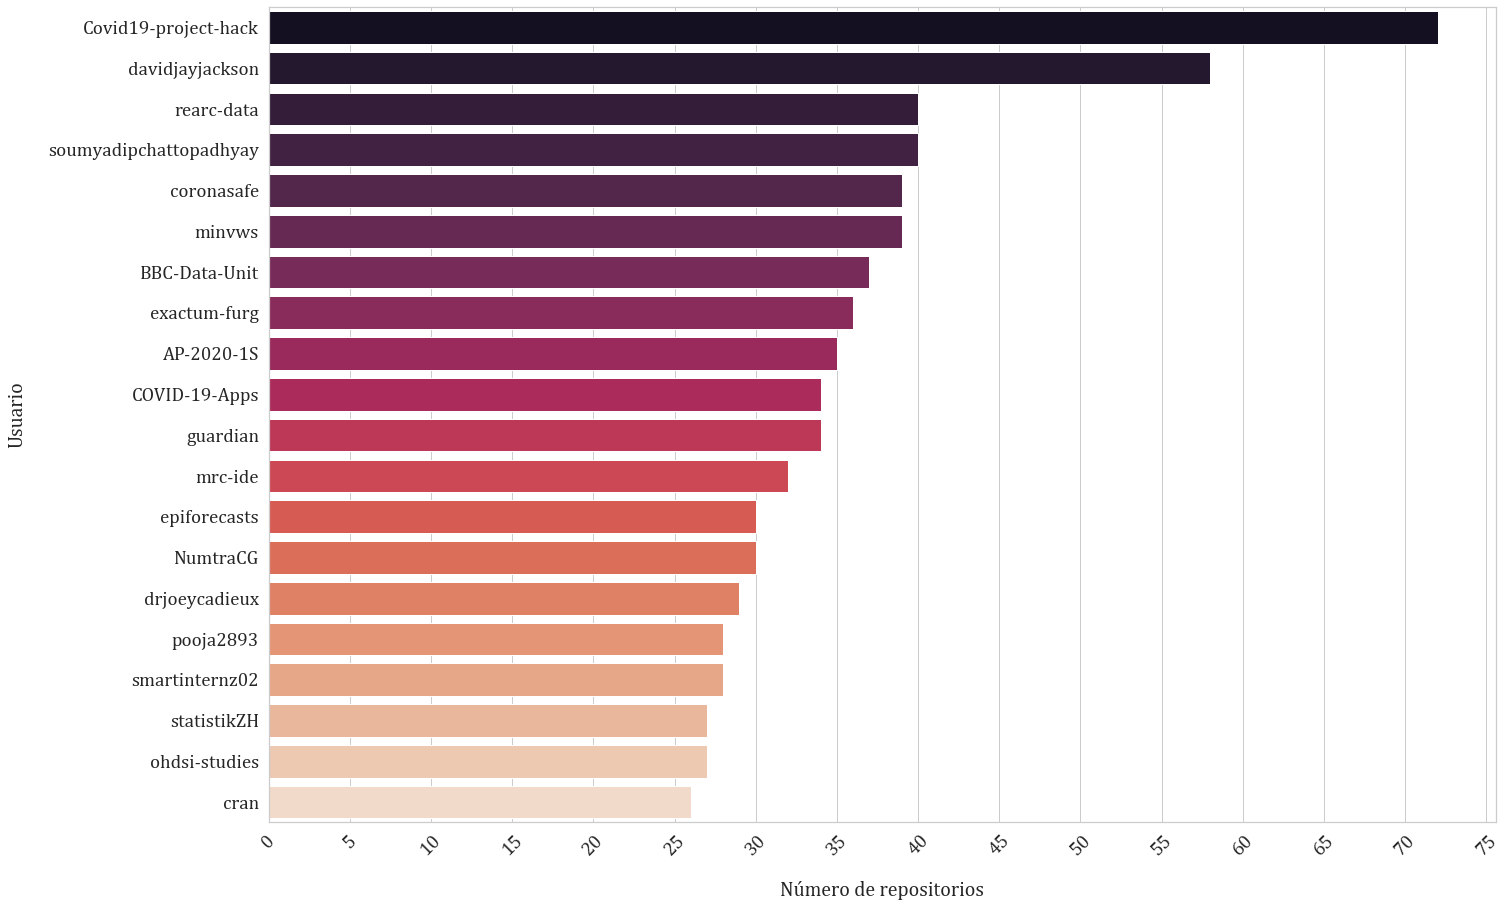

In [394]:
fig = plt.figure(figsize=(22,15))

sns.barplot(y='login', x='num_repos', data=top_20_usuarios_sin_primero, palette='rocket')
plt.ylabel('Usuario', size=20, labelpad=22) 
plt.xlabel('Número de repositorios', size=20, labelpad=22)
plt.xticks(np.arange(0, 80, 5))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

#### Distribución de repositorios creados por usuario

In [354]:
num_repos_by_usuarios = top_usuarios.groupby(top_usuarios.num_repos).size().sort_values(ascending = True)
num_repos_by_usuarios

NameError: name 'top_usuarios' is not defined

In [ ]:
df_num_repos_by_usuarios = num_repos_by_usuarios.to_frame()
df_num_repos_by_usuarios.columns = ["num_usuarios"]
df_num_repos_by_usuarios

In [ ]:
res_3_10 = int(df_num_repos_by_usuarios[(df_num_repos_by_usuarios.index > 2) & (df_num_repos_by_usuarios.index < 11)].sum())
res_mas_10 = int(df_num_repos_by_usuarios[(df_num_repos_by_usuarios.index > 10)].sum())

In [ ]:
repos = ["1 repositorio", "2 repositorios", "3 - 10 repositorios", "> 10 repositorios"]
num_usuarios = [num_repos_by_usuarios[1], num_repos_by_usuarios[2], res_3_10, res_mas_10]

plt.figure(figsize=(10,8))
# Label distance: gives the space between labels and the center of the pie
_, _, autotexts = plt.pie(num_usuarios, labels=repos, colors=color, autopct=lambda p:f'{p*sum(num_usuarios)/100 :.0f}', 
                          textprops={'fontsize': 14}, labeldistance=1.15)
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

In [ ]:
top_usuarios.head(1000)

## Países

In [276]:
df_repos = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df_repos

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

Lectura del dataset de usuarios (que contiene los países) y unión con el de repositorios:

In [277]:
na_values = ['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
             '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', '']

usuarios_con_paises = pd.read_csv("usuarios_totales_con_paises.csv", na_values=na_values, keep_default_na=False)
usuarios_con_paises = usuarios_con_paises[["repo_id", "country_code", "country_name"]]
usuarios_con_paises

repo_id country_code   country_name
0       238316428           US  United States
1       235374822          NaN            NaN
2       239777191           US  United States
3       237129709           US  United States
4       234936988          NaN            NaN
...           ...          ...            ...
177817  269527538           BE        Belgium
177818  270034436           ZA   South Africa
177819  269906994           IN          India
177820  270013759           US  United States
177821  270006438           US  United States

[177822 rows x 3 columns]

In [278]:
repos_con_paises = df_repos.join(usuarios_con_paises.set_index('repo_id'), on='id')
repos_con_paises

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  \
0                  27211           27211        17432  ...   
1                    642             642          221  ...   
2                    394             394          175  ...   
3                   1115            1115           87  ...   
4                   1208            1208          343  ...   
...                  ...             ...          ...  ...   
178034                 1               1            0  ...   
178035                 2               2            0  ...   
178036                 1               1            0  ...   
178037                 0               0            0  ...   
178038                 0               0            0  ...   

                                                 homepage  \
0       https://systems.jhu.edu/research/public-health...   
1                                                     NaN   
2              https://ramikrispin.github.io/coronavirus/   
3                               https://foldingathome.org   
4        

Nos quedamos con las columnas más interesantes:

In [279]:
repos_con_paises = repos_con_paises[["id", "full_name", "owner.login", "country_code", "country_name"]]
repos_con_paises

id                               full_name     owner.login  \
0       238316428                 CSSEGISandData/COVID-19  CSSEGISandData   
1       235374822                  midas-network/COVID-19   midas-network   
2       239777191                 RamiKrispin/coronavirus     RamiKrispin   
3       237129709               FoldingAtHome/coronavirus   FoldingAtHome   
4       234936988                         nextstrain/ncov      nextstrain   
...           ...                                     ...             ...   
178034  268856502                 fwcd/iot-contact-tracer            fwcd   
178035  269479371                           kclhi/jupyter           kclhi   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories          ALT-F1   
178037  270013759                        Tackode/frontend         Tackode   
178038  270006438                         Tackode/backend         Tackode   

       country_code    country_name  
0                US   United States  
1               NaN             NaN  
2                US   United States  
3                US   United States  
4               NaN             NaN  
...             ...             ...  
178034           DE         Germany  
178035           GB  United Kingdom  
178036           BE         Belgium  
178037           US   United States  
178038           US   United States  

[178039 rows x 5 columns]

Descartamos los países nulos:

In [280]:
repos_con_paises = repos_con_paises[repos_con_paises.country_name.notnull()]
repos_con_paises

id                               full_name     owner.login  \
0       238316428                 CSSEGISandData/COVID-19  CSSEGISandData   
2       239777191                 RamiKrispin/coronavirus     RamiKrispin   
3       237129709               FoldingAtHome/coronavirus   FoldingAtHome   
5       238601449        ExpDev07/coronavirus-tracker-api        ExpDev07   
6       237817105                   JohnCoene/coronavirus       JohnCoene   
...           ...                                     ...             ...   
178034  268856502                 fwcd/iot-contact-tracer            fwcd   
178035  269479371                           kclhi/jupyter           kclhi   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories          ALT-F1   
178037  270013759                        Tackode/frontend         Tackode   
178038  270006438                         Tackode/backend         Tackode   

       country_code    country_name  
0                US   United States  
2                US   United States  
3                US   United States  
5                NO          Norway  
6                CH     Switzerland  
...             ...             ...  
178034           DE         Germany  
178035           GB  United Kingdom  
178036           BE         Belgium  
178037           US   United States  
178038           US   United States  

[74711 rows x 5 columns]

In [281]:
repos_con_paises_grouped = repos_con_paises.groupby([repos_con_paises.country_name, repos_con_paises.country_code]).size()
repos_con_paises_grouped = repos_con_paises_grouped.to_frame()
repos_con_paises_grouped.columns = ["num_repos"]
repos_con_paises_grouped

num_repos
country_name                      country_code           
Afghanistan                       AF                   18
Albania                           AL                   12
Algeria                           DZ                  113
Angola                            AO                   51
Argentina                         AR                  525
...                                                   ...
Venezuela, Bolivarian Republic of VE                  318
Viet Nam                          VN                  400
Yemen                             YE                    7
Zambia                            ZM                   14
Zimbabwe                          ZW                   48

[182 rows x 1 columns]

In [282]:
repos_con_paises_grouped.reset_index(inplace=True)

In [283]:
repos_con_paises_grouped

country_name country_code  num_repos
0                          Afghanistan           AF         18
1                              Albania           AL         12
2                              Algeria           DZ        113
3                               Angola           AO         51
4                            Argentina           AR        525
..                                 ...          ...        ...
177  Venezuela, Bolivarian Republic of           VE        318
178                           Viet Nam           VN        400
179                              Yemen           YE          7
180                             Zambia           ZM         14
181                           Zimbabwe           ZW         48

[182 rows x 3 columns]

In [176]:
repos_con_paises_grouped_sin_cc = repos_con_paises_grouped.drop(columns=['country_code'])
repos_con_paises_grouped_sin_cc.index = repos_con_paises_grouped.country_name
repos_con_paises_grouped_sin_cc = repos_con_paises_grouped_sin_cc.drop(columns=['country_name'])
repos_con_paises_grouped_sin_cc

num_repos
country_name                                
Afghanistan                               18
Albania                                   12
Algeria                                  113
Angola                                    51
Argentina                                525
...                                      ...
Venezuela, Bolivarian Republic of        318
Viet Nam                                 400
Yemen                                      7
Zambia                                    14
Zimbabwe                                  48

[182 rows x 1 columns]

In [158]:
repos_con_paises_grouped.num_repos.sum()

74711

In [284]:
repos_con_paises_grouped.sort_values(by ="num_repos", ascending = False).head(10)

country_name country_code  num_repos
75            India           IN      17113
174   United States           US      16253
22           Brazil           BR       4719
30           Canada           CA       2426
173  United Kingdom           GB       2291
76        Indonesia           ID       2256
59          Germany           DE       1831
130        Pakistan           PK       1628
11       Bangladesh           BD       1212
126         Nigeria           NG       1147

### Dibujo del mapa de calor

In [285]:
import json
import country_converter as cc
from datetime import datetime, timedelta
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [286]:
# Ruta al shapefile
SHAPEFILE = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

# Lectura usando Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Renombre de las columnas
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

country country_code                                           geometry
0  Indonesia          IDN  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1   Malaysia          MYS  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2      Chile          CHL  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...

In [287]:
# Conversión de códigos de países de alpha3 a alpha2
iso3_codes = geo_df['country'].to_list()

iso2_codes_list = cc.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Añadir columna con los códigos alpha2 de los países
geo_df['iso2_code'] = iso2_codes_list

# Eliminamos los que sean nulos
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
CuraÃ§ao not found in regex
SÃ£o TomÃ© and Principe not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


<AxesSubplot:>

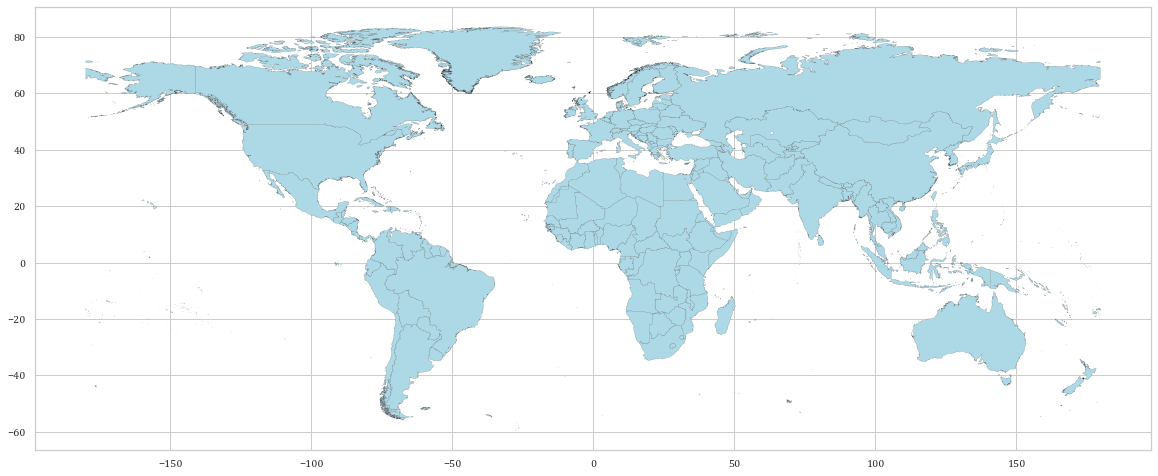

In [288]:
# Eliminamos la Antártida por ocupar mucho espacio
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

geo_df.plot(figsize=(20, 20), edgecolor='black', linewidth=.1, color='lightblue')

In [289]:
merged_df = pd.merge(left=geo_df, right=repos_con_paises_grouped, how='left', left_on='iso2_code', right_on='country_code')
merged_df

country country_code_x  \
0                   Indonesia            IDN   
1                    Malaysia            MYS   
2                       Chile            CHL   
3                     Bolivia            BOL   
4                        Peru            PER   
..                        ...            ...   
235                     Palau            PLW   
236                      Guam            GUM   
237  Northern Mariana Islands            MNP   
238                   Bahrain            BHR   
239               Macao S.A.R            MAC   

                                              geometry iso2_code  \
0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...        ID   
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...        MY   
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...        CL   
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...        BO   
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...        PE   
..                                                 ...       ...   
235  MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...        PW   
236  POLYGON ((144.88640 13.64020, 144.89666 13.617...        GU   
237  MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...        MP   
238  POLYGON ((50.55161 26.19424, 50.59474 26.16031...        BH   
239  MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...        MO   

                        country_name country_code_y  num_repos  
0                          Indonesia             ID     2256.0  
1                           Malaysia             MY      292.0  
2                              Chile             CL      281.0  
3    Bolivia, Plurinational State of             BO       89.0  
4                               Peru             PE      188.0  
..                               ...            ...        ...  
235                              NaN            NaN        NaN  
236                             Guam             GU        2.0  
237                              NaN            NaN        NaN  
238                          Bahrain             BH       10.0  
239                            Macao             MO        2.0  

[240 rows x 7 columns]

Eliminamos los países en los que no se ha creado ningún repositorio:

In [290]:
merged_df = merged_df[merged_df.num_repos.notnull()]
merged_df

country country_code_x  \
0                         Indonesia            IDN   
1                          Malaysia            MYS   
2                             Chile            CHL   
3                           Bolivia            BOL   
4                              Peru            PER   
..                              ...            ...   
227                        Maldives            MDV   
229  Federated States of Micronesia            FSM   
236                            Guam            GUM   
238                         Bahrain            BHR   
239                     Macao S.A.R            MAC   

                                              geometry iso2_code  \
0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...        ID   
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...        MY   
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...        CL   
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...        BO   
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...        PE   
..                                                 ...       ...   
227  MULTIPOLYGON (((73.16310 -0.68182, 73.17254 -0...        MV   
229  MULTIPOLYGON (((163.02605 5.34089, 163.03045 5...        FM   
236  POLYGON ((144.88640 13.64020, 144.89666 13.617...        GU   
238  POLYGON ((50.55161 26.19424, 50.59474 26.16031...        BH   
239  MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...        MO   

                        country_name country_code_y  num_repos  
0                          Indonesia             ID     2256.0  
1                           Malaysia             MY      292.0  
2                              Chile             CL      281.0  
3    Bolivia, Plurinational State of             BO       89.0  
4                               Peru             PE      188.0  
..                               ...            ...        ...  
227                         Maldives             MV       10.0  
229  Micronesia, Federated States of             FM        2.0  
236                             Guam             GU        2.0  
238                          Bahrain             BH       10.0  
239                            Macao             MO        2.0  

[184 rows x 7 columns]

Dibujamos el mapa:

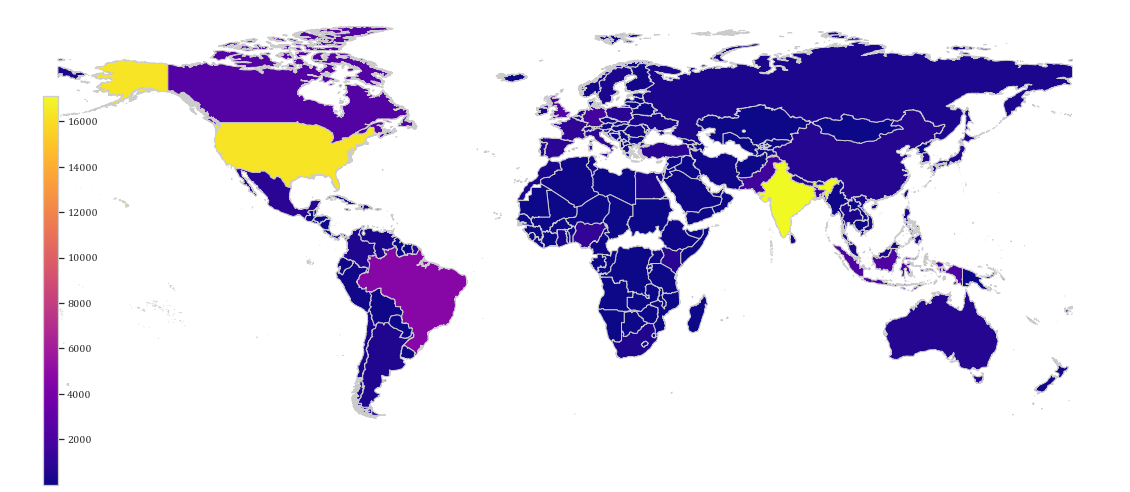

In [291]:
col = 'num_repos'
vmin = merged_df[col].min()
vmax = merged_df[col].max()
cmap = 'plasma'

fig, ax = plt.subplots(1, figsize=(20, 18))

# Eliminamos el eje
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
            
# Creación de la leyenda
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Rellenamos y situamos la leyenda
cbaxes = fig.add_axes([0.15, 0.3, 0.01, 0.3])
cbar = fig.colorbar(sm, cax=cbaxes)

------

De esta forma, los países que efectivamente han creado un mayor número de repositorios son los que cuentan con un mayor número de población. Para trabajar con valores relativos, calcularemos el número de repositorios creados por cada 100.000 habitantes en cada uno de los países.

#### Medidas relativas

In [3]:
df_repos = pd.read_csv('dataset_repositorios_filtrados_final.csv')

In [4]:
na_values = ['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
             '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', '']

usuarios_con_paises = pd.read_csv("usuarios_totales_con_paises.csv", na_values=na_values, keep_default_na=False)
usuarios_con_paises = usuarios_con_paises[["repo_id", "country_code", "country_name"]]

In [5]:
repos_con_paises = df_repos.join(usuarios_con_paises.set_index('repo_id'), on='id')
repos_con_paises = repos_con_paises[["id", "full_name", "owner.login", "country_code", "country_name"]]
repos_con_paises = repos_con_paises[repos_con_paises.country_name.notnull()]

In [6]:
repos_con_paises_grouped = repos_con_paises.groupby([repos_con_paises.country_name, repos_con_paises.country_code]).size()
repos_con_paises_grouped = repos_con_paises_grouped.to_frame()
repos_con_paises_grouped.columns = ["num_repos"]
repos_con_paises_grouped.reset_index(inplace=True)

In [7]:
repos_con_paises_grouped

country_name country_code  num_repos
0                          Afghanistan           AF         18
1                              Albania           AL         12
2                              Algeria           DZ        113
3                               Angola           AO         51
4                            Argentina           AR        525
..                                 ...          ...        ...
177  Venezuela, Bolivarian Republic of           VE        318
178                           Viet Nam           VN        400
179                              Yemen           YE          7
180                             Zambia           ZM         14
181                           Zimbabwe           ZW         48

[182 rows x 3 columns]

Generación de la nueva columna con el número de repositorios creados por cada millón de habitantes:

In [8]:
import country_converter as cc

In [9]:
def get_short_name(df):
    country_name = df['country_name']
    short_name = cc.convert(country_name, to='name_short')
    return short_name

In [10]:
repos_con_paises_grouped["short_country_name"] = repos_con_paises_grouped.apply(get_short_name, axis = 1)

In [11]:
repos_con_paises_grouped

country_name country_code  num_repos  \
0                          Afghanistan           AF         18   
1                              Albania           AL         12   
2                              Algeria           DZ        113   
3                               Angola           AO         51   
4                            Argentina           AR        525   
..                                 ...          ...        ...   
177  Venezuela, Bolivarian Republic of           VE        318   
178                           Viet Nam           VN        400   
179                              Yemen           YE          7   
180                             Zambia           ZM         14   
181                           Zimbabwe           ZW         48   

    short_country_name  
0          Afghanistan  
1              Albania  
2              Algeria  
3               Angola  
4            Argentina  
..                 ...  
177          Venezuela  
178            Vietnam  
179              Yemen  
180             Zambia  
181           Zimbabwe  

[182 rows x 4 columns]

In [12]:
repos_con_paises_grouped_2 = repos_con_paises_grouped.drop(columns="country_name")
repos_con_paises_grouped_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_code        182 non-null    object
 1   num_repos           182 non-null    int64 
 2   short_country_name  182 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


#### Población

In [128]:
population = pd.read_csv("population_by_country_2020_kaggle.csv")
population

Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                     China         1440297825        0.39 %     5540090   
1                     India         1382345085        0.99 %    13586631   
2             United States          331341050        0.59 %     1937734   
3                 Indonesia          274021604        1.07 %     2898047   
4                  Pakistan          221612785        2.00 %     4327022   
..                      ...                ...           ...         ...   
230              Montserrat               4993        0.06 %           3   
231        Falkland Islands               3497        3.05 %         103   
232                    Niue               1628        0.68 %          11   
233                 Tokelau               1360        1.27 %          17   
234                Holy See                801        0.25 %           2   

     Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0                153          9388211       -348399.0        1.7       38   
1                464          2973190       -532687.0        2.2       28   
2                 36          9147420        954806.0        1.8       38   
3                151          1811570        -98955.0        2.3       30   
4                287           770880       -233379.0        3.6       23   
..               ...              ...             ...        ...      ...   
230               50              100             NaN       N.A.     N.A.   
231                0            12170             NaN       N.A.     N.A.   
232                6              260             NaN       N.A.     N.A.   
233              136               10             NaN       N.A.     N.A.   
234             2003                0             NaN       N.A.     N.A.   

    Urban Pop % World Share  
0          61 %     18.47 %  
1          35 %     17.70 %  
2          83 %      4.25 %  
3          56 %      3.51 %  
4          35 %      2.83 %  
..          ...         ...  
230        10 %      0.00 %  
231        66 %      0.00 %  
232        46 %      0.00 %  
233         0 %      0.00 %  
234        N.A.      0.00 %  

[235 rows x 11 columns]

In [129]:
population = pd.read_csv("population_by_country_2020_kaggle.csv")
population = population[["Country (or dependency)", "Population (2020)"]]

In [130]:
population.rename(columns={ population.columns[0]: "name" }, inplace = True)
population.rename(columns={ population.columns[1]: "pop2020" }, inplace = True)
population

name     pop2020
0               China  1440297825
1               India  1382345085
2       United States   331341050
3           Indonesia   274021604
4            Pakistan   221612785
..                ...         ...
230        Montserrat        4993
231  Falkland Islands        3497
232              Niue        1628
233           Tokelau        1360
234          Holy See         801

[235 rows x 2 columns]

In [131]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     235 non-null    object
 1   pop2020  235 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [132]:
merged_population = pd.merge(left=repos_con_paises_grouped_2, right=population, how='left', left_on='short_country_name', right_on='name')
merged_population

country_code  num_repos short_country_name         name     pop2020
0             AF         18        Afghanistan  Afghanistan  39074280.0
1             AL         12            Albania      Albania   2877239.0
2             DZ        113            Algeria      Algeria  43984569.0
3             AO         51             Angola       Angola  33032075.0
4             AR        525          Argentina    Argentina  45267449.0
..           ...        ...                ...          ...         ...
177           VE        318          Venezuela    Venezuela  28421581.0
178           VN        400            Vietnam      Vietnam  97490013.0
179           YE          7              Yemen        Yemen  29935468.0
180           ZM         14             Zambia       Zambia  18468257.0
181           ZW         48           Zimbabwe     Zimbabwe  14899771.0

[182 rows x 5 columns]

In [133]:
def get_num_repos_por_millon_habitantes(df):
    short_country_name = df['short_country_name']
    num_repos = df['num_repos']
    population = df['pop2020']
    
    res = ( (1000000 * num_repos) / population )
    return res

In [134]:
merged_population["num_repos_per_million"] = merged_population.apply(get_num_repos_por_millon_habitantes, axis = 1)

In [135]:
merged_population

country_code  num_repos short_country_name         name     pop2020  \
0             AF         18        Afghanistan  Afghanistan  39074280.0   
1             AL         12            Albania      Albania   2877239.0   
2             DZ        113            Algeria      Algeria  43984569.0   
3             AO         51             Angola       Angola  33032075.0   
4             AR        525          Argentina    Argentina  45267449.0   
..           ...        ...                ...          ...         ...   
177           VE        318          Venezuela    Venezuela  28421581.0   
178           VN        400            Vietnam      Vietnam  97490013.0   
179           YE          7              Yemen        Yemen  29935468.0   
180           ZM         14             Zambia       Zambia  18468257.0   
181           ZW         48           Zimbabwe     Zimbabwe  14899771.0   

     num_repos_per_million  
0                 0.460661  
1                 4.170665  
2                 2.569083  
3                 1.543954  
4                11.597738  
..                     ...  
177              11.188681  
178               4.102984  
179               0.233836  
180               0.758057  
181               3.221526  

[182 rows x 6 columns]

In [29]:
show(merged_population.sort_values(by ="num_repos_per_million", ascending = False))

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [92]:
merged_population.sort_values(by ="num_repos_per_million", ascending = False).head(89)

country_code  num_repos  short_country_name                name  \
101           LU         47          Luxembourg          Luxembourg   
149           SG        391           Singapore           Singapore   
79            IE        320             Ireland             Ireland   
17            BM          4             Bermuda             Bermuda   
30            CA       2426              Canada              Canada   
..           ...        ...                 ...                 ...   
46            EC        124             Ecuador             Ecuador   
171           UA        286             Ukraine             Ukraine   
132           PA         28              Panama              Panama   
45            DO         70  Dominican Republic  Dominican Republic   
111           MX        824              Mexico              Mexico   

         pop2020  num_repos_per_million  
101     627704.0              74.876056  
149    5858322.0              66.742661  
79     4947267.0              64.682177  
17       62237.0              64.270450  
30    37799407.0              64.180901  
..           ...                    ...  
46    17688599.0               7.010165  
171   43686577.0               6.546633  
132    4326296.0               6.472049  
45    10866667.0               6.441718  
111  129166028.0               6.379386  

[89 rows x 6 columns]

### Dibujo del mapa con número de repositorios relativos

In [443]:
import json
import country_converter as cc
from datetime import datetime, timedelta
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [444]:
# Ruta al shapefile
SHAPEFILE = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

# Lectura usando Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Renombre de las columnas
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

country country_code                                           geometry
0  Indonesia          IDN  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1   Malaysia          MYS  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2      Chile          CHL  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...

In [445]:
# Conversión de códigos de países de alpha3 a alpha2
iso3_codes = geo_df['country'].to_list()

iso2_codes_list = cc.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Añadir columna con los códigos alpha2 de los países
geo_df['iso2_code'] = iso2_codes_list

# Eliminamos los que sean nulos
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
CuraÃ§ao not found in regex
SÃ£o TomÃ© and Principe not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


In [452]:
# Eliminamos la Antártida por ocupar mucho espacio
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

In [447]:
merged_df = pd.merge(left=geo_df, right=merged_population, how='left', left_on='iso2_code', right_on='country_code')
merged_df

country country_code_x  \
0                   Indonesia            IDN   
1                    Malaysia            MYS   
2                       Chile            CHL   
3                     Bolivia            BOL   
4                        Peru            PER   
..                        ...            ...   
235                     Palau            PLW   
236                      Guam            GUM   
237  Northern Mariana Islands            MNP   
238                   Bahrain            BHR   
239               Macao S.A.R            MAC   

                                              geometry iso2_code  \
0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...        ID   
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...        MY   
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...        CL   
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...        BO   
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...        PE   
..                                                 ...       ...   
235  MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...        PW   
236  POLYGON ((144.88640 13.64020, 144.89666 13.617...        GU   
237  MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...        MP   
238  POLYGON ((50.55161 26.19424, 50.59474 26.16031...        BH   
239  MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...        MO   

    country_code_y  num_repos short_country_name       name      pop2020  \
0               ID     2256.0          Indonesia  Indonesia  274021604.0   
1               MY      292.0           Malaysia   Malaysia   32436963.0   
2               CL      281.0              Chile      Chile   19144605.0   
3               BO       89.0            Bolivia    Bolivia   11700207.0   
4               PE      188.0               Peru       Peru   33050211.0   
..             ...        ...                ...        ...          ...   
235            NaN        NaN                NaN        NaN          NaN   
236             GU        2.0               Guam       Guam     169031.0   
237            NaN        NaN                NaN        NaN          NaN   
238             BH       10.0            Bahrain    Bahrain    1711057.0   
239             MO        2.0              Macau        NaN          NaN   

     num_repos_per_million  
0                 8.232928  
1                 9.002076  
2                14.677764  
3                 7.606703  
4                 5.688315  
..                     ...  
235                    NaN  
236              11.832149  
237                    NaN  
238               5.844341  
239                    NaN  

[240 rows x 10 columns]

Eliminamos los países en los que no se ha creado ningún repositorio:

In [448]:
merged_df = merged_df[merged_df.num_repos.notnull()]
merged_df

country country_code_x  \
0                         Indonesia            IDN   
1                          Malaysia            MYS   
2                             Chile            CHL   
3                           Bolivia            BOL   
4                              Peru            PER   
..                              ...            ...   
227                        Maldives            MDV   
229  Federated States of Micronesia            FSM   
236                            Guam            GUM   
238                         Bahrain            BHR   
239                     Macao S.A.R            MAC   

                                              geometry iso2_code  \
0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...        ID   
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...        MY   
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...        CL   
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...        BO   
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...        PE   
..                                                 ...       ...   
227  MULTIPOLYGON (((73.16310 -0.68182, 73.17254 -0...        MV   
229  MULTIPOLYGON (((163.02605 5.34089, 163.03045 5...        FM   
236  POLYGON ((144.88640 13.64020, 144.89666 13.617...        GU   
238  POLYGON ((50.55161 26.19424, 50.59474 26.16031...        BH   
239  MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...        MO   

    country_code_y  num_repos     short_country_name       name      pop2020  \
0               ID     2256.0              Indonesia  Indonesia  274021604.0   
1               MY      292.0               Malaysia   Malaysia   32436963.0   
2               CL      281.0                  Chile      Chile   19144605.0   
3               BO       89.0                Bolivia    Bolivia   11700207.0   
4               PE      188.0                   Peru       Peru   33050211.0   
..             ...        ...                    ...        ...          ...   
227             MV       10.0               Maldives   Maldives     542151.0   
229             FM        2.0  Micronesia, Fed. Sts.        NaN          NaN   
236             GU        2.0                   Guam       Guam     169031.0   
238             BH       10.0                Bahrain    Bahrain    1711057.0   
239             MO        2.0                  Macau        NaN          NaN   

     num_repos_per_million  
0                 8.232928  
1                 9.002076  
2                14.677764  
3                 7.606703  
4                 5.688315  
..                     ...  
227              18.445046  
229                    NaN  
236              11.832149  
238               5.844341  
239                    NaN  

[184 rows x 10 columns]

Dibujamos el mapa:

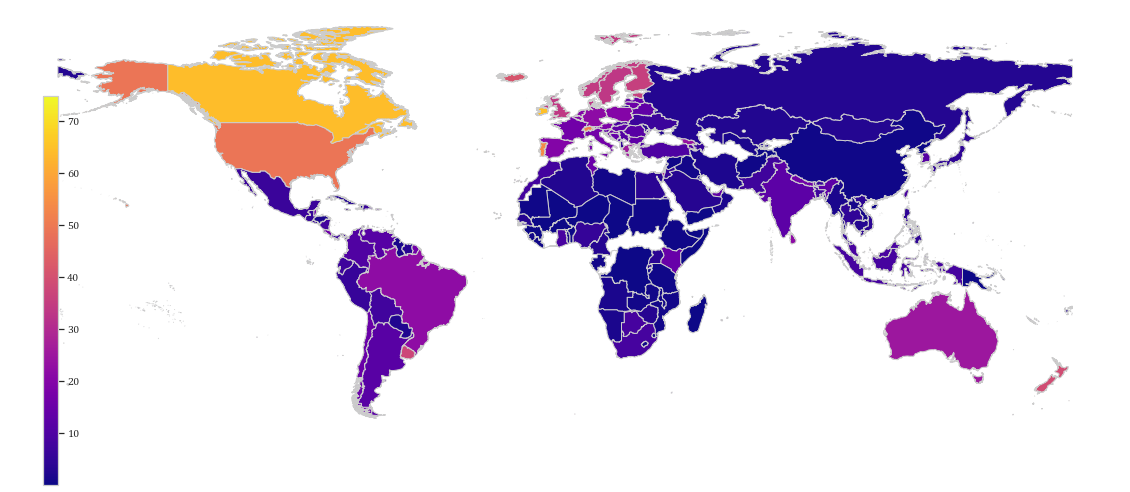

In [450]:
col = 'num_repos_per_million'
vmin = merged_df[col].min()
vmax = merged_df[col].max()
cmap = 'plasma'

fig, ax = plt.subplots(1, figsize=(20, 18))

# Eliminamos el eje
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
            
# Creación de la leyenda
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Rellenamos y situamos la leyenda
cbaxes = fig.add_axes([0.15, 0.3, 0.01, 0.3])
cbar = fig.colorbar(sm, cax=cbaxes)

### Análisis por países

#### Carga de datasets de evolución COVID-19

In [34]:
df_covid = pd.read_csv('owid-covid-data.csv')
df_covid

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1           AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...         ...       ...          ...         ...          ...        ...   
115888      ZWE    Africa     Zimbabwe  2021-09-06     125671.0      121.0   
115889      ZWE    Africa     Zimbabwe  2021-09-07     125796.0      125.0   
115890      ZWE    Africa     Zimbabwe  2021-09-08     125931.0      135.0   
115891      ZWE    Africa     Zimbabwe  2021-09-09     126056.0      125.0   
115892      ZWE    Africa     Zimbabwe  2021-09-10     126163.0      107.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
115888             155.714        4493.0        11.0               11.000   
115889             146.143        4503.0        10.0               12.000   
115890             138.714        4517.0        14.0               11.286   
115891             134.000        4521.0         4.0               10.286   
115892             118.857        4532.0        11.0               10.714   

        ...  extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0       ...              NaN                597.029                 9.59   
1       ...              NaN                597.029                 9.59   
2       ...              NaN                597.029                 9.59   
3       ...              NaN                597.029                 9.59   
4       ...              NaN                597.029                 9.59   
...     ...              ...                    ...                  ...   
115888  ...             21.4                307.846                 1.82   
115889  ...             21.4                307.846                 1.82   
115890  ...             21.4                307.846                 1.82   
115891  ...             21.4                307.846                 1.82   
115892  ...             21.4                307.846                 1.82   

        female_smokers  male_smokers  handwashing_facilities  \
0                  NaN           NaN                  37.746   
1                  NaN           NaN                  37.746   
2                  NaN           NaN                  37.746   
3                  NaN           NaN                  37.746   
4                  NaN           NaN                  37.746   
...                ...           ...                     ...   
115888             1.6          30.7                  36.791   
115889             1.6          30.7                  36.791   
115890             1.6          30.7                  36.791   
115891             1.6          30.7                  36.791   
115892             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83            

In [35]:
df_covid = df_covid[["location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", 
                                      'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 
                                       'new_deaths_per_million']]
df_covid

location        date  total_cases  new_cases  total_deaths  \
0       Afghanistan  2020-02-24          1.0        1.0           NaN   
1       Afghanistan  2020-02-25          1.0        0.0           NaN   
2       Afghanistan  2020-02-26          1.0        0.0           NaN   
3       Afghanistan  2020-02-27          1.0        0.0           NaN   
4       Afghanistan  2020-02-28          1.0        0.0           NaN   
...             ...         ...          ...        ...           ...   
115888     Zimbabwe  2021-09-06     125671.0      121.0        4493.0   
115889     Zimbabwe  2021-09-07     125796.0      125.0        4503.0   
115890     Zimbabwe  2021-09-08     125931.0      135.0        4517.0   
115891     Zimbabwe  2021-09-09     126056.0      125.0        4521.0   
115892     Zimbabwe  2021-09-10     126163.0      107.0        4532.0   

        new_deaths  total_cases_per_million  new_cases_per_million  \
0              NaN                    0.025                  0.025   
1              NaN                    0.025                  0.000   
2              NaN                    0.025                  0.000   
3              NaN                    0.025                  0.000   
4              NaN                    0.025                  0.000   
...            ...                      ...                    ...   
115888        11.0                 8326.900                  8.017   
115889        10.0                 8335.183                  8.282   
115890        14.0                 8344.128                  8.945   
115891         4.0                 8352.410                  8.282   
115892        11.0                 8359.500                  7.090   

        total_deaths_per_million  new_deaths_per_million  
0                            NaN                     NaN  
1                            NaN                     NaN  
2                            NaN                     NaN  
3                            NaN                     NaN  
4                            NaN                     NaN  
...                          ...                     ...  
115888                   297.704                   0.729  
115889                   298.367                   0.663  
115890                   299.294                   0.928  
115891                   299.559                   0.265  
115892                   300.288                   0.729  

[115893 rows x 10 columns]

#### Carga de datasets de países y repositorios, por meses de creación

In [36]:
df_repos = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df_repos

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

In [37]:
na_values = ['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
             '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', '']

usuarios_con_paises = pd.read_csv("usuarios_totales_con_paises.csv", na_values=na_values, keep_default_na=False)
usuarios_con_paises = usuarios_con_paises[["repo_id", "country_code", "country_name"]]
usuarios_con_paises

repo_id country_code   country_name
0       238316428           US  United States
1       235374822          NaN            NaN
2       239777191           US  United States
3       237129709           US  United States
4       234936988          NaN            NaN
...           ...          ...            ...
177817  269527538           BE        Belgium
177818  270034436           ZA   South Africa
177819  269906994           IN          India
177820  270013759           US  United States
177821  270006438           US  United States

[177822 rows x 3 columns]

In [38]:
repos_con_paises = df_repos.join(usuarios_con_paises.set_index('repo_id'), on='id')
repos_con_paises

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  \
0                  27211           27211        17432  ...   
1                    642             642          221  ...   
2                    394             394          175  ...   
3                   1115            1115           87  ...   
4                   1208            1208          343  ...   
...                  ...             ...          ...  ...   
178034                 1               1            0  ...   
178035                 2               2            0  ...   
178036                 1               1            0  ...   
178037                 0               0            0  ...   
178038                 0               0            0  ...   

                                                 homepage  \
0       https://systems.jhu.edu/research/public-health...   
1                                                     NaN   
2              https://ramikrispin.github.io/coronavirus/   
3                               https://foldingathome.org   
4        

In [39]:
repos_con_paises = repos_con_paises[["id", "full_name", "owner.login", "country_code", "country_name", "created_at", "updated_at"]]
repos_con_paises

id                               full_name     owner.login  \
0       238316428                 CSSEGISandData/COVID-19  CSSEGISandData   
1       235374822                  midas-network/COVID-19   midas-network   
2       239777191                 RamiKrispin/coronavirus     RamiKrispin   
3       237129709               FoldingAtHome/coronavirus   FoldingAtHome   
4       234936988                         nextstrain/ncov      nextstrain   
...           ...                                     ...             ...   
178034  268856502                 fwcd/iot-contact-tracer            fwcd   
178035  269479371                           kclhi/jupyter           kclhi   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories          ALT-F1   
178037  270013759                        Tackode/frontend         Tackode   
178038  270006438                         Tackode/backend         Tackode   

       country_code    country_name            created_at  \
0                US   United States  2020-02-04T22:03:53Z   
1               NaN             NaN  2020-01-21T15:27:23Z   
2                US   United States  2020-02-11T14:08:06Z   
3                US   United States  2020-01-30T03:12:19Z   
4               NaN             NaN  2020-01-19T17:23:17Z   
...             ...             ...                   ...   
178034           DE         Germany  2020-06-02T16:46:15Z   
178035           GB  United Kingdom  2020-06-04T22:35:16Z   
178036           BE         Belgium  2020-06-05T04:04:46Z   
178037           US   United States  2020-06-06T14:57:50Z   
178038           US   United States  2020-06-06T14:30:13Z   

                  updated_at  
0       2021-08-14T11:56:01Z  
1       2021-08-12T20:15:21Z  
2       2021-08-14T08:19:52Z  
3       2021-08-09T21:17:36Z  
4       2021-08-13T12:36:10Z  
...                      ...  
178034  2020-09-04T15:03:54Z  
178035  2021-08-14T14:32:53Z  
178036  2020-06-08T12:44:27Z  
178037  2021-01-11T08:38:35Z  
178038  2021-05-26T08:44:01Z  

[178039 rows x 7 columns]

In [40]:
repos_con_paises_validos = repos_con_paises[repos_con_paises.country_name.notnull()]
repos_con_paises_validos

id                               full_name     owner.login  \
0       238316428                 CSSEGISandData/COVID-19  CSSEGISandData   
2       239777191                 RamiKrispin/coronavirus     RamiKrispin   
3       237129709               FoldingAtHome/coronavirus   FoldingAtHome   
5       238601449        ExpDev07/coronavirus-tracker-api        ExpDev07   
6       237817105                   JohnCoene/coronavirus       JohnCoene   
...           ...                                     ...             ...   
178034  268856502                 fwcd/iot-contact-tracer            fwcd   
178035  269479371                           kclhi/jupyter           kclhi   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories          ALT-F1   
178037  270013759                        Tackode/frontend         Tackode   
178038  270006438                         Tackode/backend         Tackode   

       country_code    country_name            created_at  \
0                US   United States  2020-02-04T22:03:53Z   
2                US   United States  2020-02-11T14:08:06Z   
3                US   United States  2020-01-30T03:12:19Z   
5                NO          Norway  2020-02-06T03:42:14Z   
6                CH     Switzerland  2020-02-02T18:34:42Z   
...             ...             ...                   ...   
178034           DE         Germany  2020-06-02T16:46:15Z   
178035           GB  United Kingdom  2020-06-04T22:35:16Z   
178036           BE         Belgium  2020-06-05T04:04:46Z   
178037           US   United States  2020-06-06T14:57:50Z   
178038           US   United States  2020-06-06T14:30:13Z   

                  updated_at  
0       2021-08-14T11:56:01Z  
2       2021-08-14T08:19:52Z  
3       2021-08-09T21:17:36Z  
5       2021-08-13T03:53:22Z  
6       2021-06-03T16:03:02Z  
...                      ...  
178034  2020-09-04T15:03:54Z  
178035  2021-08-14T14:32:53Z  
178036  2020-06-08T12:44:27Z  
178037  2021-01-11T08:38:35Z  
178038  2021-05-26T08:44:01Z  

[74711 rows x 7 columns]

In [41]:
repos_y_paises = repos_con_paises_validos.copy()
repos_y_paises["created_at"] = pd.to_datetime(repos_y_paises['created_at'])
repos_y_paises = repos_y_paises.set_index("created_at")
repos_y_paises

id                               full_name  \
created_at                                                                     
2020-02-04 22:03:53+00:00  238316428                 CSSEGISandData/COVID-19   
2020-02-11 14:08:06+00:00  239777191                 RamiKrispin/coronavirus   
2020-01-30 03:12:19+00:00  237129709               FoldingAtHome/coronavirus   
2020-02-06 03:42:14+00:00  238601449        ExpDev07/coronavirus-tracker-api   
2020-02-02 18:34:42+00:00  237817105                   JohnCoene/coronavirus   
...                              ...                                     ...   
2020-06-02 16:46:15+00:00  268856502                 fwcd/iot-contact-tracer   
2020-06-04 22:35:16+00:00  269479371                           kclhi/jupyter   
2020-06-05 04:04:46+00:00  269527538  ALT-F1/OpenWeatherMap-concat-histories   
2020-06-06 14:57:50+00:00  270013759                        Tackode/frontend   
2020-06-06 14:30:13+00:00  270006438                         Tackode/backend   

                              owner.login country_code    country_name  \
created_at                                                               
2020-02-04 22:03:53+00:00  CSSEGISandData           US   United States   
2020-02-11 14:08:06+00:00     RamiKrispin           US   United States   
2020-01-30 03:12:19+00:00   FoldingAtHome           US   United States   
2020-02-06 03:42:14+00:00        ExpDev07           NO          Norway   
2020-02-02 18:34:42+00:00       JohnCoene           CH     Switzerland   
...                                   ...          ...             ...   
2020-06-02 16:46:15+00:00            fwcd           DE         Germany   
2020-06-04 22:35:16+00:00           kclhi           GB  United Kingdom   
2020-06-05 04:04:46+00:00          ALT-F1           BE         Belgium   
2020-06-06 14:57:50+00:00         Tackode           US   United States   
2020-06-06 14:30:13+00:00         Tackode           US   United States   

                                     updated_at  
created_at                                       
2020-02-04 22:03:53+00:00  2021-08-14T11:56:01Z  
2020-02-11 14:08:06+00:00  2021-08-14T08:19:52Z  
2020-01-30 03:12:19+00:00  2021-08-09T21:17:36Z  
2020-02-06 03:42:14+00:00  2021-08-13T03:53:22Z  
2020-02-02 18:34:42+00:00  2021-06-03T16:03:02Z  
...                                         ...  
2020-06-02 16:46:15+00:00  2020-09-04T15:03:54Z  
2020-06-04 22:35:16+00:00  2021-08-14T14:32:53Z  
2020-06-05 04:04:46+00:00  2020-06-08T12:44:27Z  
2020-06-06 14:57:50+00:00  2021-01-11T08:38:35Z  
2020-06-06 14:30:13+00:00  2021-05-26T08:44:01Z  

[74711 rows x 6 columns]

In [42]:
repos_y_paises_meses = repos_y_paises.copy()
repos_y_paises_meses.index = repos_y_paises_meses.index.strftime('%Y-%m')
repos_y_paises_meses

id                               full_name     owner.login  \
created_at                                                                      
2020-02     238316428                 CSSEGISandData/COVID-19  CSSEGISandData   
2020-02     239777191                 RamiKrispin/coronavirus     RamiKrispin   
2020-01     237129709               FoldingAtHome/coronavirus   FoldingAtHome   
2020-02     238601449        ExpDev07/coronavirus-tracker-api        ExpDev07   
2020-02     237817105                   JohnCoene/coronavirus       JohnCoene   
...               ...                                     ...             ...   
2020-06     268856502                 fwcd/iot-contact-tracer            fwcd   
2020-06     269479371                           kclhi/jupyter           kclhi   
2020-06     269527538  ALT-F1/OpenWeatherMap-concat-histories          ALT-F1   
2020-06     270013759                        Tackode/frontend         Tackode   
2020-06     270006438                         Tackode/backend         Tackode   

           country_code    country_name            updated_at  
created_at                                                     
2020-02              US   United States  2021-08-14T11:56:01Z  
2020-02              US   United States  2021-08-14T08:19:52Z  
2020-01              US   United States  2021-08-09T21:17:36Z  
2020-02              NO          Norway  2021-08-13T03:53:22Z  
2020-02              CH     Switzerland  2021-06-03T16:03:02Z  
...                 ...             ...                   ...  
2020-06              DE         Germany  2020-09-04T15:03:54Z  
2020-06              GB  United Kingdom  2021-08-14T14:32:53Z  
2020-06              BE         Belgium  2020-06-08T12:44:27Z  
2020-06              US   United States  2021-01-11T08:38:35Z  
2020-06              US   United States  2021-05-26T08:44:01Z  

[74711 rows x 6 columns]

In [240]:
population

name     pop2020
0               China  1440297825
1               India  1382345085
2       United States   331341050
3           Indonesia   274021604
4            Pakistan   221612785
..                ...         ...
230        Montserrat        4993
231  Falkland Islands        3497
232              Niue        1628
233           Tokelau        1360
234          Holy See         801

[235 rows x 2 columns]

In [239]:
show(repos_y_paises_meses)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


#### Creación de dataframe con número de repositorios por millón de habitantes, por fechas

In [811]:
import country_converter as cc

def get_num_repos_mes_por_millon_habitantes(df, country_code, merged_population):
    num_repos = df["num_repos"]
    population_pais = merged_population[merged_population.country_code == country_code]
    population_pais = population_pais.pop2020.values[0]
    
    res = ( (1000000 * num_repos) / population_pais )
    return res

def get_short_name(df):
    country_name = df['country_name']
    short_name = cc.convert(country_name, to='name_short')
    return short_name

def get_df_num_repos_por_millon(country_code):
    population = pd.read_csv("population_by_country_2020_kaggle.csv")
    population = population[["Country (or dependency)", "Population (2020)"]]
    population.rename(columns={ population.columns[0]: "name" }, inplace = True)
    population.rename(columns={ population.columns[1]: "pop2020" }, inplace = True)
    
    
    na_values = ['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
                 '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', '']

    usuarios_con_paises = pd.read_csv("usuarios_totales_con_paises.csv", na_values=na_values, keep_default_na=False)
    usuarios_con_paises = usuarios_con_paises[["repo_id", "country_code", "country_name"]]
    
    df_repos = pd.read_csv('dataset_repositorios_filtrados_final.csv')
    repos_con_paises = df_repos.join(usuarios_con_paises.set_index('repo_id'), on='id')
    repos_con_paises = repos_con_paises[["id", "full_name", "owner.login", "country_code", "country_name", "created_at", "updated_at"]]
    repos_con_paises_validos = repos_con_paises[repos_con_paises.country_name.notnull()]

    repos_con_paises_grouped = repos_con_paises.groupby([repos_con_paises_validos.country_name, 
                                                         repos_con_paises_validos.country_code]).size()
    repos_con_paises_grouped = repos_con_paises_grouped.to_frame()
    repos_con_paises_grouped.columns = ["num_repos"]
    repos_con_paises_grouped.reset_index(inplace=True)
    repos_con_paises_grouped["short_country_name"] = repos_con_paises_grouped.apply(get_short_name, axis = 1)
    repos_con_paises_grouped_2 = repos_con_paises_grouped.drop(columns="country_name")
    
    merged_population = pd.merge(left=repos_con_paises_grouped_2, right=population, how='left', 
                                 left_on='short_country_name', right_on='name')
    repos_y_paises = repos_con_paises_validos.copy()
    repos_y_paises["created_at"] = pd.to_datetime(repos_y_paises['created_at'])
    repos_y_paises = repos_y_paises.set_index("created_at")
    repos_y_paises_meses = repos_y_paises.copy()
    repos_y_paises_meses.index = repos_y_paises_meses.index.strftime('%Y-%m')
    
    repos_y_paises_meses = repos_y_paises_meses[repos_y_paises_meses.country_code == country_code]
    repos_y_paises_meses_grouped = repos_y_paises_meses.groupby([repos_y_paises_meses.index]).size()
    repos_y_paises_meses_grouped = repos_y_paises_meses_grouped.to_frame()
    columns = ["num_repos"]
    repos_y_paises_meses_grouped.columns = columns
    repos_y_paises_meses_grouped["num_repos_per_million"] = repos_y_paises_meses_grouped.apply(get_num_repos_mes_por_millon_habitantes, 
                                                                                               args=(country_code, merged_population), axis = 1)
    return repos_y_paises_meses_grouped

In [812]:
get_df_num_repos_por_millon("US")

num_repos  num_repos_per_million
created_at                                  
2011-11             1               0.003018
2015-01             1               0.003018
2015-08             1               0.003018
2016-11             1               0.003018
2017-02             1               0.003018
2018-03             1               0.003018
2018-10             1               0.003018
2018-12             1               0.003018
2019-01             1               0.003018
2019-02             2               0.006036
2019-05             1               0.003018
2019-07             1               0.003018
2019-08             3               0.009054
2019-09             2               0.006036
2019-10             1               0.003018
2019-11             2               0.006036
2019-12             5               0.015090
2020-01            25               0.075451
2020-02           116               0.350092
2020-03          3121               9.419298
2020-04          2757               8.320732
2020-05          1510               4.557238
2020-06          1006               3.036147
2020-07           939               2.833938
2020-08           800               2.414431
2020-09           718               2.166952
2020-10           674               2.034158
2020-11           698               2.106591
2020-12           674               2.034158
2021-01           622               1.877220
2021-02           590               1.780643
2021-03           555               1.675011
2021-04           513               1.548254
2021-05           411               1.240414
2021-06           286               0.863159
2021-07           212               0.639824

-----

#### Estados Unidos

Repositorio:

In [13]:
repos_y_paises_meses_usa = repos_y_paises_meses[repos_y_paises_meses.country_code == "US"]
repos_y_paises_meses_usa_grouped = repos_y_paises_meses_usa.groupby([repos_y_paises_meses_usa.index]).size()
repos_y_paises_meses_usa_grouped

created_at
2011-11       1
2015-01       1
2015-08       1
2016-11       1
2017-02       1
2018-03       1
2018-10       1
2018-12       1
2019-01       1
2019-02       2
2019-05       1
2019-07       1
2019-08       3
2019-09       2
2019-10       1
2019-11       2
2019-12       5
2020-01      25
2020-02     116
2020-03    3121
2020-04    2757
2020-05    1510
2020-06    1006
2020-07     939
2020-08     800
2020-09     718
2020-10     674
2020-11     698
2020-12     674
2021-01     622
2021-02     590
2021-03     555
2021-04     513
2021-05     411
2021-06     286
2021-07     212
dtype: int64

Covid:

In [127]:
df_covid_usa = df_covid[df_covid.location == "United States"]
df_covid_usa

location        date  total_cases  new_cases  total_deaths  \
109840  United States  2020-01-22          1.0        NaN           NaN   
109841  United States  2020-01-23          1.0        0.0           NaN   
109842  United States  2020-01-24          2.0        1.0           NaN   
109843  United States  2020-01-25          2.0        0.0           NaN   
109844  United States  2020-01-26          5.0        3.0           NaN   
...               ...         ...          ...        ...           ...   
110433  United States  2021-09-06   40018318.0    73326.0      648998.0   
110434  United States  2021-09-07   40280001.0   261683.0      650511.0   
110435  United States  2021-09-08   40456711.0   176710.0      652657.0   
110436  United States  2021-09-09   40601792.0   145081.0      654583.0   
110437  United States  2021-09-10   40863868.0   262076.0      658992.0   

        new_deaths  total_cases_per_million  new_cases_per_million  \
109840         NaN                    0.003                    NaN   
109841         NaN                    0.003                  0.000   
109842         NaN                    0.006                  0.003   
109843         NaN                    0.006                  0.000   
109844         NaN                    0.015                  0.009   
...            ...                      ...                    ...   
110433       530.0               120205.786                220.254   
110434      1513.0               120991.821                786.035   
110435      2146.0               121522.617                530.796   
110436      1926.0               121958.407                435.790   
110437      4409.0               122745.623                787.216   

        total_deaths_per_million  new_deaths_per_million  
109840                       NaN                     NaN  
109841                       NaN                     NaN  
109842                       NaN                     NaN  
109843                       NaN                     NaN  
109844                       NaN                     NaN  
...                          ...                     ...  
110433                  1949.440                   1.592  
110434                  1953.985                   4.545  
110435                  1960.431                   6.446  
110436                  1966.216                   5.785  
110437                  1979.460                  13.244  

[598 rows x 10 columns]

In [128]:
df_covid_usa["date"] = pd.to_datetime(df_covid_usa['date'])
df_covid_usa = df_covid_usa.set_index("date")
df_covid_usa

location  total_cases  new_cases  total_deaths  new_deaths  \
date                                                                          
2020-01-22  United States          1.0        NaN           NaN         NaN   
2020-01-23  United States          1.0        0.0           NaN         NaN   
2020-01-24  United States          2.0        1.0           NaN         NaN   
2020-01-25  United States          2.0        0.0           NaN         NaN   
2020-01-26  United States          5.0        3.0           NaN         NaN   
...                   ...          ...        ...           ...         ...   
2021-09-06  United States   40018318.0    73326.0      648998.0       530.0   
2021-09-07  United States   40280001.0   261683.0      650511.0      1513.0   
2021-09-08  United States   40456711.0   176710.0      652657.0      2146.0   
2021-09-09  United States   40601792.0   145081.0      654583.0      1926.0   
2021-09-10  United States   40863868.0   262076.0      658992.0      4409.0   

            total_cases_per_million  new_cases_per_million  \
date                                                         
2020-01-22                    0.003                    NaN   
2020-01-23                    0.003                  0.000   
2020-01-24                    0.006                  0.003   
2020-01-25                    0.006                  0.000   
2020-01-26                    0.015                  0.009   
...                             ...                    ...   
2021-09-06               120205.786                220.254   
2021-09-07               120991.821                786.035   
2021-09-08               121522.617                530.796   
2021-09-09               121958.407                435.790   
2021-09-10               122745.623                787.216   

            total_deaths_per_million  new_deaths_per_million  
date                                                          
2020-01-22                       NaN                     NaN  
2020-01-23                       NaN                     NaN  
2020-01-24                       NaN                     NaN  
2020-01-25                       NaN                     NaN  
2020-01-26                       NaN                     NaN  
...                              ...                     ...  
2021-09-06                  1949.440                   1.592  
2021-09-07                  1953.985                   4.545  
2021-09-08                  1960.431                   6.446  
2021-09-09                  1966.216                   5.785  
2021-09-10                  1979.460                  13.244  

[598 rows x 9 columns]

In [129]:
df_covid_usa_meses = df_covid_usa.copy()
df_covid_usa_meses.index = df_covid_usa_meses.index.strftime('%Y-%m')
df_covid_usa_meses

location  total_cases  new_cases  total_deaths  new_deaths  \
date                                                                       
2020-01  United States          1.0        NaN           NaN         NaN   
2020-01  United States          1.0        0.0           NaN         NaN   
2020-01  United States          2.0        1.0           NaN         NaN   
2020-01  United States          2.0        0.0           NaN         NaN   
2020-01  United States          5.0        3.0           NaN         NaN   
...                ...          ...        ...           ...         ...   
2021-09  United States   40018318.0    73326.0      648998.0       530.0   
2021-09  United States   40280001.0   261683.0      650511.0      1513.0   
2021-09  United States   40456711.0   176710.0      652657.0      2146.0   
2021-09  United States   40601792.0   145081.0      654583.0      1926.0   
2021-09  United States   40863868.0   262076.0      658992.0      4409.0   

         total_cases_per_million  new_cases_per_million  \
date                                                      
2020-01                    0.003                    NaN   
2020-01                    0.003                  0.000   
2020-01                    0.006                  0.003   
2020-01                    0.006                  0.000   
2020-01                    0.015                  0.009   
...                          ...                    ...   
2021-09               120205.786                220.254   
2021-09               120991.821                786.035   
2021-09               121522.617                530.796   
2021-09               121958.407                435.790   
2021-09               122745.623                787.216   

         total_deaths_per_million  new_deaths_per_million  
date                                                       
2020-01                       NaN                     NaN  
2020-01                       NaN                     NaN  
2020-01                       NaN                     NaN  
2020-01                       NaN                     NaN  
2020-01                       NaN                     NaN  
...                           ...                     ...  
2021-09                  1949.440                   1.592  
2021-09                  1953.985                   4.545  
2021-09                  1960.431                   6.446  
2021-09                  1966.216                   5.785  
2021-09                  1979.460                  13.244  

[598 rows x 9 columns]

In [130]:
df_covid_usa_meses_grouped = df_covid_usa_meses.groupby([df_covid_usa_meses.index]).sum()
df_covid_usa_meses_grouped

total_cases  new_cases  total_deaths  new_deaths  \
date                                                         
2020-01  4.100000e+01        7.0           0.0         0.0   
2020-02  4.020000e+02       17.0           1.0         1.0   
2020-03  1.120124e+06   192276.0       26006.0      5361.0   
2020-04  1.996081e+07   888804.0     1070099.0     60825.0   
2020-05  4.553630e+07   717688.0     2800488.0     41546.0   
2020-06  6.496646e+07   843440.0     3570464.0     19738.0   
2020-07  1.113734e+08  1925231.0     4323242.0     26518.0   
2020-08  1.663589e+08  1459482.0     5263872.0     29627.0   
2020-09  1.992228e+08  1208552.0     5882616.0     23400.0   
2020-10  2.514093e+08  1930288.0     6789622.0     24503.0   
2020-11  3.398063e+08  4504911.0     7498270.0     39301.0   
2020-12  5.281633e+08  6429552.0     9671106.0     81179.0   
2021-01  7.309456e+08  6149116.0    12437381.0     97187.0   
2021-02  7.743214e+08  2402073.0    13626083.0     65621.0   
2021-03  9.167292e+08  1813678.0    16639784.0     37503.0   
2021-04  9.446506e+08  1885741.0    16957873.0     23788.0   
2021-05  1.020168e+09   916735.0    18162317.0     18173.0   
2021-06  1.004645e+09   397399.0    18010223.0     10323.0   
2021-07  1.057902e+09  1313292.0    18868827.0      8733.0   
2021-08  1.146261e+09  4219848.0    19359437.0     26862.0   
2021-09  4.008678e+08  1665737.0     6495806.0     18803.0   

         total_cases_per_million  new_cases_per_million  \
date                                                      
2020-01                    0.123                  0.021   
2020-02                    1.206                  0.051   
2020-03                 3364.593                577.551   
2020-04                59957.658               2669.765   
2020-05               136780.525               2155.769   
2020-06               195144.225               2533.502   
2020-07               334540.081               5782.949   
2020-08               499703.728               4383.947   
2020-09               598419.168               3630.213   
2020-10               755175.385               5798.140   
2020-11              1020699.664              13531.714   
2020-12              1586480.609              19312.888   
2021-01              2195591.712              18470.525   
2021-02              2325882.601               7215.276   
2021-03              2753642.690               5447.870   
2021-04              2837512.383               5664.331   
2021-05              3064350.470               2753.663   
2021-06              3017720.117               1193.696   
2021-07              3177693.985               3944.826   
2021-08              3443103.054              12675.446   
2021-09              1204114.382               5003.488   

         total_deaths_per_million  new_deaths_per_million  
date                                                       
2020-01                     0.000                   0.000  
2020-02                     0.003                   0.003  
2020-03                    78.114                  16.102  
2020-04                  3214.328                 182.700  
2020-05                  8412.019                 124.795  
2020-06                 10724.849                  59.288  
2020-07                 12986.020                  79.655  
2020-08                 15811.455                  88.993  
2020-09                 17670.018                  70.290  
2020-10                 20394.456                  73.603  
2020-11                 22523.075                 118.050  
2020-12                 29049.767                 243.843  
2021-01                 37359.020                 291.928  
2021-02                 40929.602                 197.110  
2021-03                 49982.068                 112.651  
2021-04                 50937.531                  71.454  
2021-05                 54555.408                  54.589  
2021-06                 54098.551                  31.005  
2021-07                 5

*repos_y_paises_meses_usa_grouped* --- *df_covid_usa_meses_grouped*

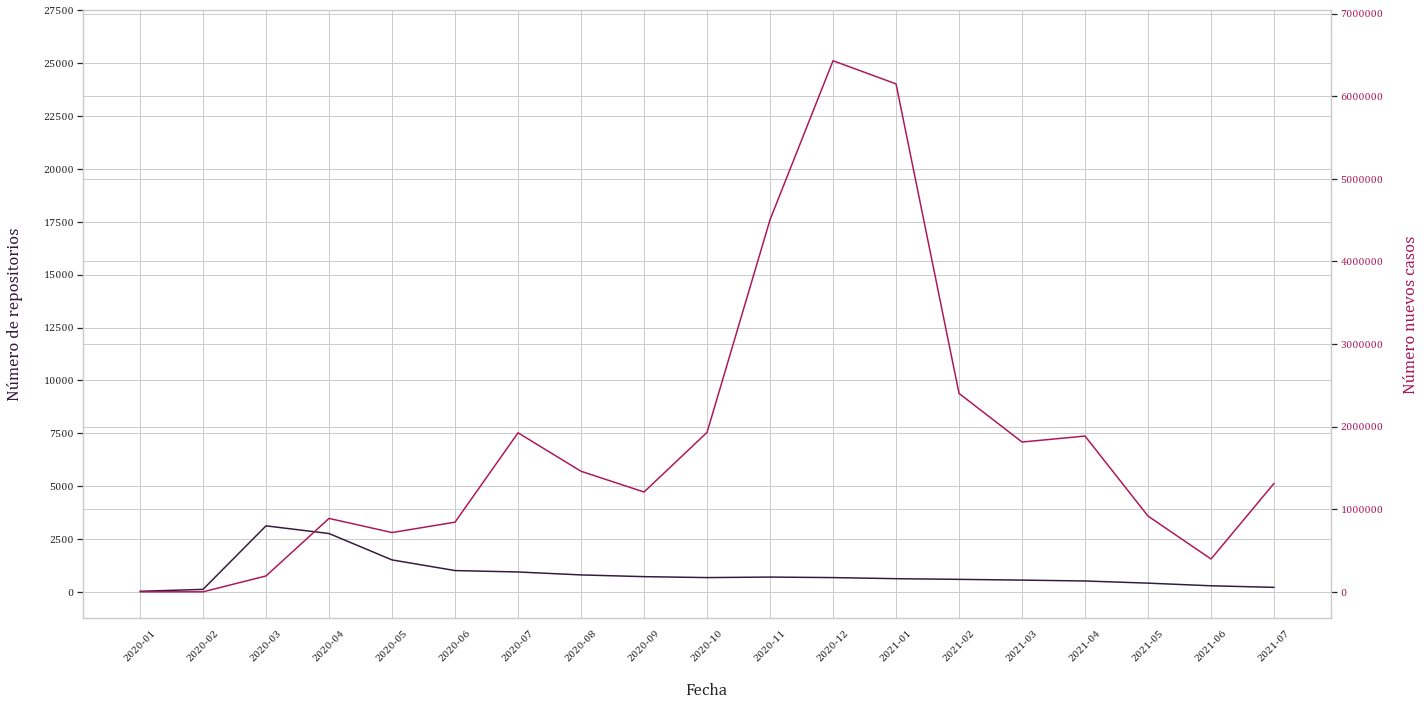

In [131]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_usa_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_usa_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 25000000, 1000000))
fig.tight_layout()
align_yaxis(ax1, ax2)
plt.show()

----------------

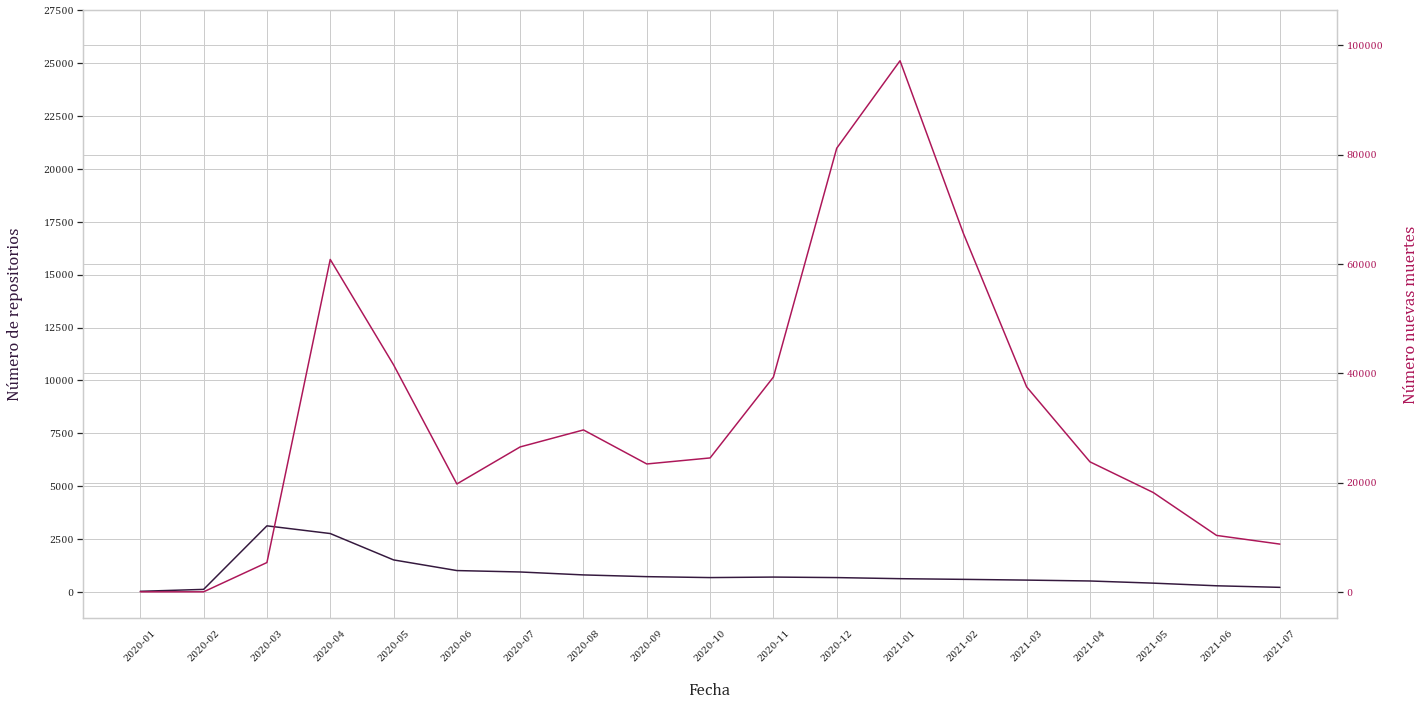

In [132]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_usa_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_usa_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 25000000, 1000000))
fig.tight_layout()
align_yaxis(ax1, ax2)
plt.show()

#### India

In [149]:
repos_y_paises_meses_india = repos_y_paises_meses[repos_y_paises_meses.country_code == "IN"]
repos_y_paises_meses_india_grouped = repos_y_paises_meses_india.groupby([repos_y_paises_meses_india.index]).size()

df_covid_india = df_covid[df_covid.location == "India"]

df_covid_india["date"] = pd.to_datetime(df_covid_india['date'])
df_covid_india = df_covid_india.set_index("date")

df_covid_india_meses = df_covid_india.copy()
df_covid_india_meses.index = df_covid_india_meses.index.strftime('%Y-%m')

df_covid_india_meses_grouped = df_covid_india_meses.groupby([df_covid_india_meses.index]).sum()

merged_population_india = merged_population_2[merged_population_2.name == "India"]
num_repos_per_million_india = merged_population_india.num_repos_per_million.values[0]



In [159]:
repos_y_paises_con_repos_por_millon_india = repos_y_paises_con_repos_por_millon[repos_y_paises_con_repos_por_millon.country_code == "IN"]
repos_y_paises_con_repos_por_millon_india

id                                   full_name  \
43     242682283        pratik-276/CoronaVirus-Data-Analysis   
75     216746155                      Daggron/No-coronavirus   
96     191726058                        Sumyak-Jain/COVID-19   
121    244000565              jkarethiya/coronavirus-tracker   
126    239511661  anishsingh20/Analyzing-Corona-Virus-Spread   
...          ...                                         ...   
74688  266480351                        Sync-Codes/RyujinBot   
74690  267065955              Prags21/Data-Analysis-Projects   
74691  267412360                  InterfaceMatters/indus-web   
74698  267685164               InterfaceMatters/indus-mobile   
74702  268354891                       samsruti/Kotlin30Days   

            owner.login country_code country_name            updated_at  \
43           pratik-276           IN        India  2021-07-08T11:42:27Z   
75              Daggron           IN        India  2020-12-15T13:40:04Z   
96          Sumyak-Jain           IN        India  2020-06-26T12:34:33Z   
121          jkarethiya           IN        India  2020-03-01T08:10:14Z   
126        anishsingh20           IN        India  2020-07-25T13:27:05Z   
...                 ...          ...          ...                   ...   
74688        Sync-Codes           IN        India  2021-06-29T08:40:28Z   
74690           Prags21           IN        India  2020-05-28T16:44:50Z   
74691  InterfaceMatters           IN        India  2020-09-29T12:54:56Z   
74698  InterfaceMatters           IN        India  2020-09-29T12:55:19Z   
74702          samsruti           IN        India  2020-06-01T17:57:26Z   

      short_country_name       pop2020  
43                 India  1.382345e+09  
75                 India  1.382345e+09  
96                 India  1.382345e+09  
121                India  1.382345e+09  
126                India  1.382345e+09  
...                  ...           ...  
74688              India  1.382345e+09  
74690              India  1.382345e+09  
74691              India  1.382345e+09  
74698              India  1.382345e+09  
74702              India  1.382345e+09  

[17113 rows x 8 columns]

*repos_y_paises_meses_india_grouped* --- *df_covid_india_meses_grouped*

In [44]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

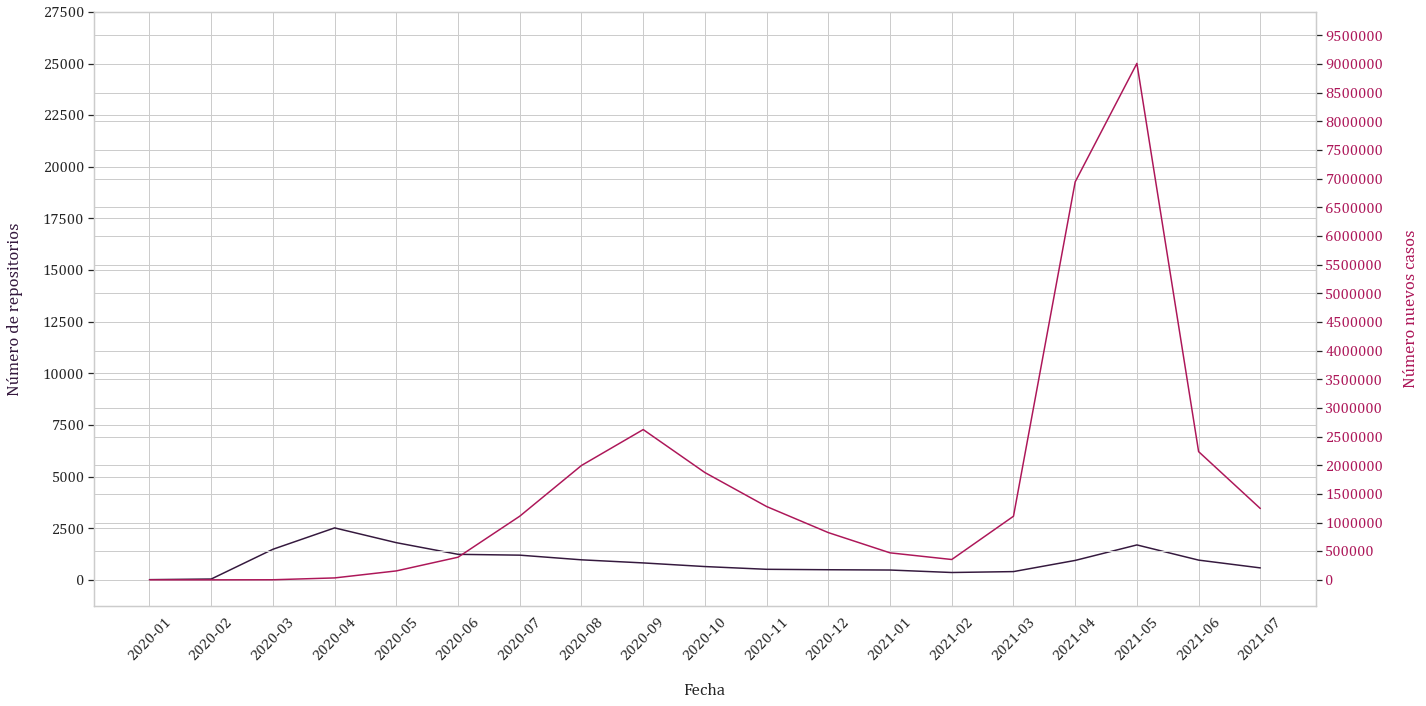

In [54]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_india_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_india_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 10000000, 500000))
align_yaxis(ax1, ax2)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()

plt.show()

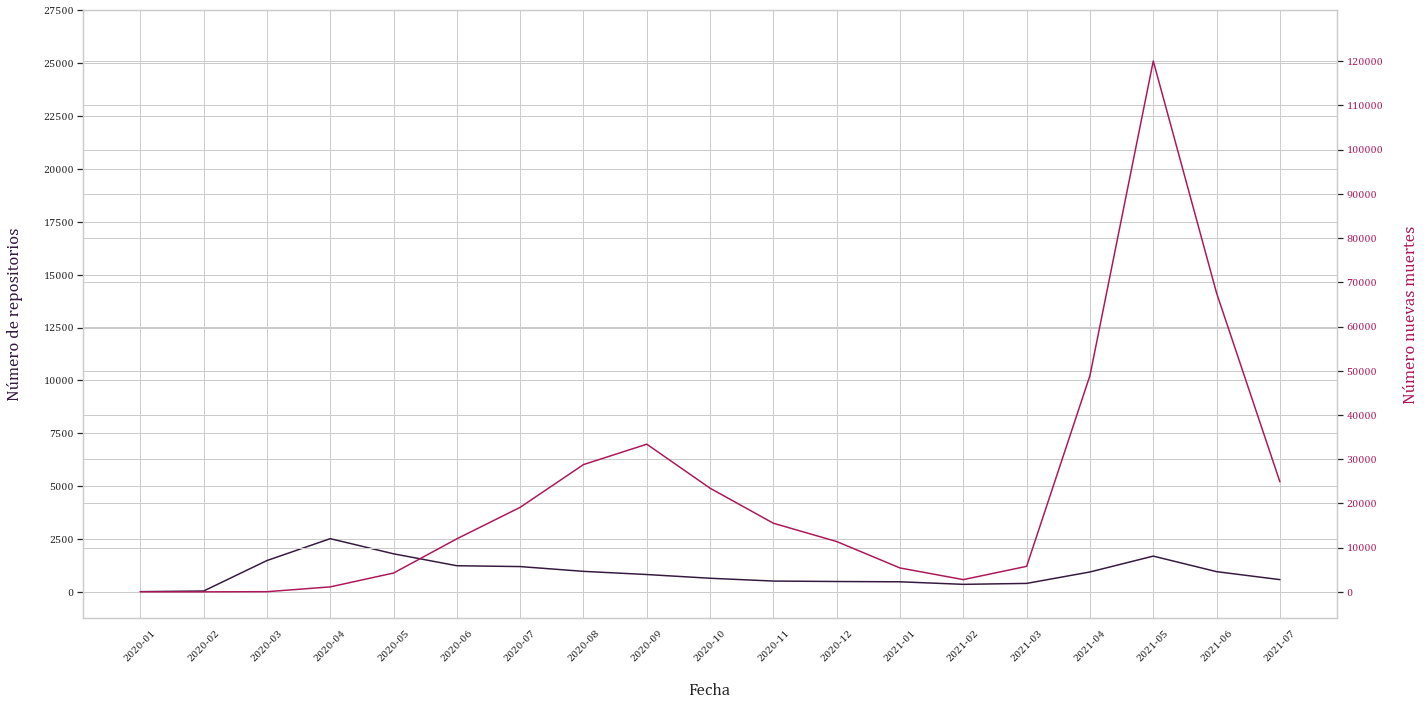

In [46]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_india_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 30000, 2500))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_india_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 130000, 10000))
align_yaxis(ax1, ax2)
fig.tight_layout()

plt.show()

-------

Primeros 8 meses:

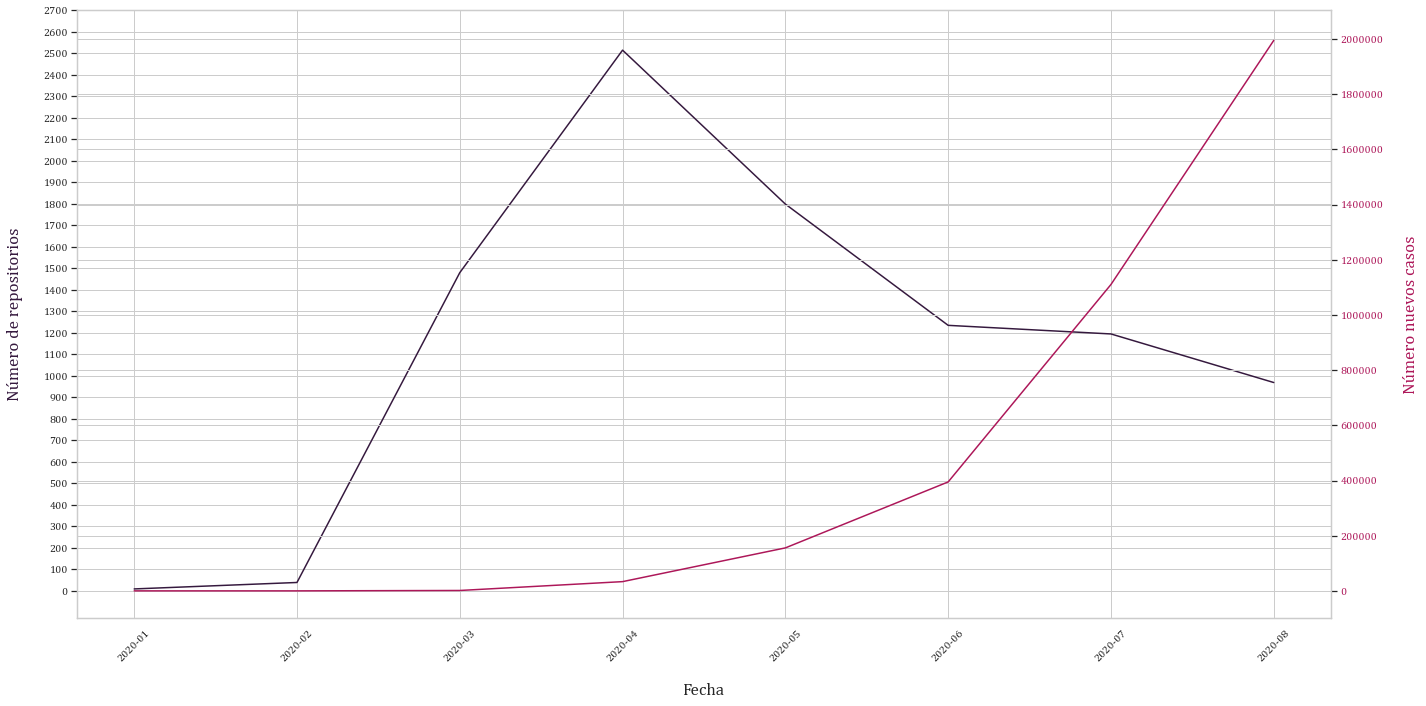

In [47]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_india_grouped.loc["2020-01":"2020-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 2800, 100))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_india_meses_grouped["new_cases"].loc[:"2020-08"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 2200000, 200000))
align_yaxis(ax1, ax2)
fig.tight_layout()

plt.show()

In [127]:
merged_population[["short_country_name"]] = "India"
merged_population

country_code  num_repos short_country_name   name     pop2020  \
0             AF         18        Afghanistan  India  39074280.0   
1             AL         12            Albania  India   2877239.0   
2             DZ        113            Algeria  India  43984569.0   
3             AO         51             Angola  India  33032075.0   
4             AR        525          Argentina  India  45267449.0   
..           ...        ...                ...    ...         ...   
177           VE        318          Venezuela  India  28421581.0   
178           VN        400            Vietnam  India  97490013.0   
179           YE          7              Yemen  India  29935468.0   
180           ZM         14             Zambia  India  18468257.0   
181           ZW         48           Zimbabwe  India  14899771.0   

     num_repos_per_million  
0                 0.460661  
1                 4.170665  
2                 2.569083  
3                 1.543954  
4                11.597738  
..                     ...  
177              11.188681  
178               4.102984  
179               0.233836  
180               0.758057  
181               3.221526  

[182 rows x 6 columns]

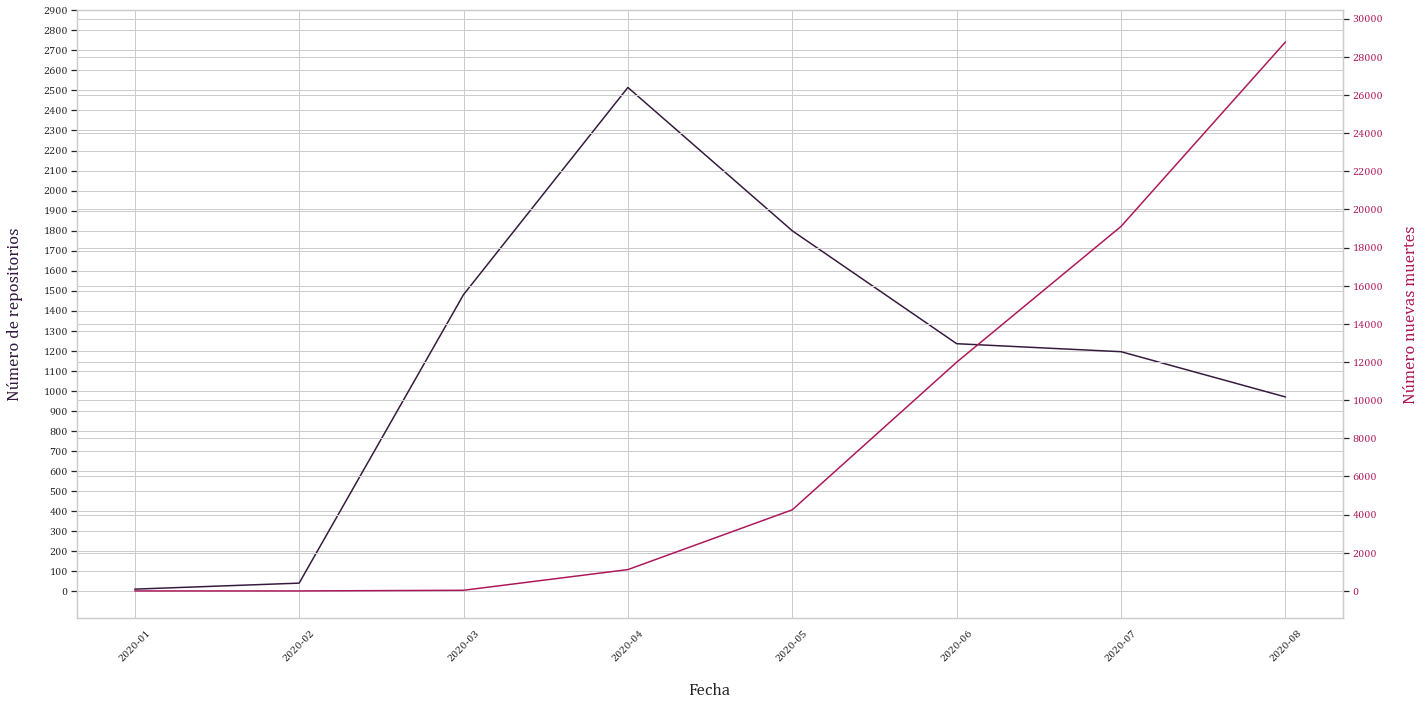

In [48]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_india_grouped.loc["2020-01":"2020-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 3000, 100))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_india_meses_grouped["new_deaths"].loc[:"2020-08"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 31000, 2000))
align_yaxis(ax1, ax2)
fig.tight_layout()

plt.show()

----------------

#### Nueva Zelanda

In [801]:
df_covid_nz = df_covid[df_covid.location == "New Zealand"]
df_covid_nz

location        date  total_cases  new_cases  total_deaths  \
74372  New Zealand  2020-02-28          1.0        1.0           NaN   
74373  New Zealand  2020-02-29          1.0        0.0           NaN   
74374  New Zealand  2020-03-01          1.0        0.0           NaN   
74375  New Zealand  2020-03-02          1.0        0.0           NaN   
74376  New Zealand  2020-03-03          1.0        0.0           NaN   
...            ...         ...          ...        ...           ...   
74928  New Zealand  2021-09-06       3814.0       21.0          27.0   
74929  New Zealand  2021-09-07       3830.0       16.0          27.0   
74930  New Zealand  2021-09-08       3848.0       18.0          27.0   
74931  New Zealand  2021-09-09       3867.0       19.0          27.0   
74932  New Zealand  2021-09-10       3891.0       24.0          27.0   

       new_deaths  total_cases_per_million  new_cases_per_million  \
74372         NaN                    0.206                  0.206   
74373         NaN                    0.206                  0.000   
74374         NaN                    0.206                  0.000   
74375         NaN                    0.206                  0.000   
74376         NaN                    0.206                  0.000   
...           ...                      ...                    ...   
74928         0.0                  784.670                  4.320   
74929         0.0                  787.962                  3.292   
74930         0.0                  791.665                  3.703   
74931         0.0                  795.574                  3.909   
74932         0.0                  800.512                  4.938   

       total_deaths_per_million  new_deaths_per_million  
74372                       NaN                     NaN  
74373                       NaN                     NaN  
74374                       NaN                     NaN  
74375                       NaN                     NaN  
74376                       NaN                     NaN  
...                         ...                     ...  
74928                     5.555                     0.0  
74929                     5.555                     0.0  
74930                     5.555                     0.0  
74931                     5.555                     0.0  
74932                     5.555                     0.0  

[561 rows x 10 columns]

In [802]:
repos_y_paises_meses_nz = repos_y_paises_meses[repos_y_paises_meses.country_code == "NZ"]
repos_y_paises_meses_nz_grouped = repos_y_paises_meses_nz.groupby([repos_y_paises_meses_nz.index]).size()

df_covid_nz = df_covid[df_covid.location == "New Zealand"]

df_covid_nz["date"] = pd.to_datetime(df_covid_nz['date'])
df_covid_nz = df_covid_nz.set_index("date")

df_covid_nz_meses = df_covid_nz.copy()
df_covid_nz_meses.index = df_covid_nz_meses.index.strftime('%Y-%m')

df_covid_nz_meses_grouped = df_covid_nz_meses.groupby([df_covid_nz_meses.index]).sum()

*repos_y_paises_meses_nz_grouped* --- *df_covid_nz_meses_grouped*

In [803]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

Nuevos casos:

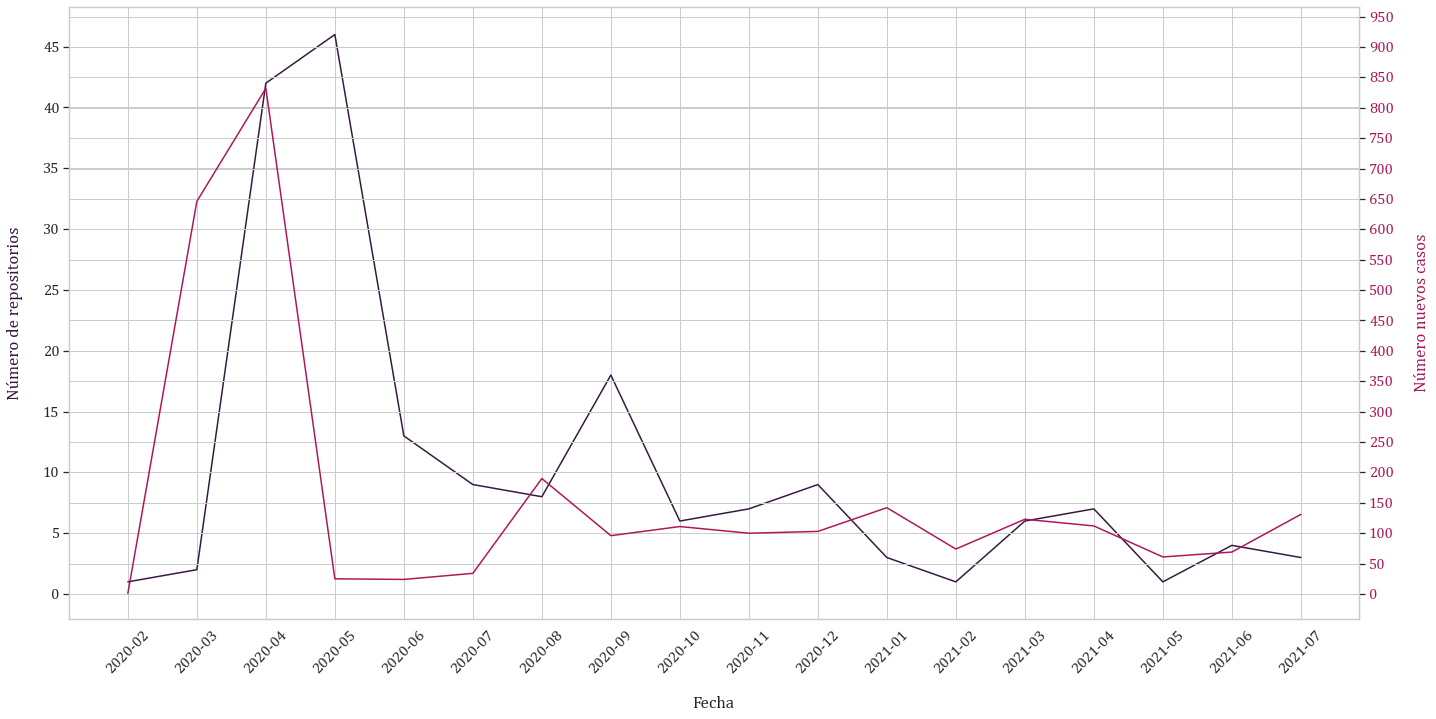

In [806]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_nz_grouped.loc["2020-01":"2021-06"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_nz_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 1000, 50))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Nuevas muertes:

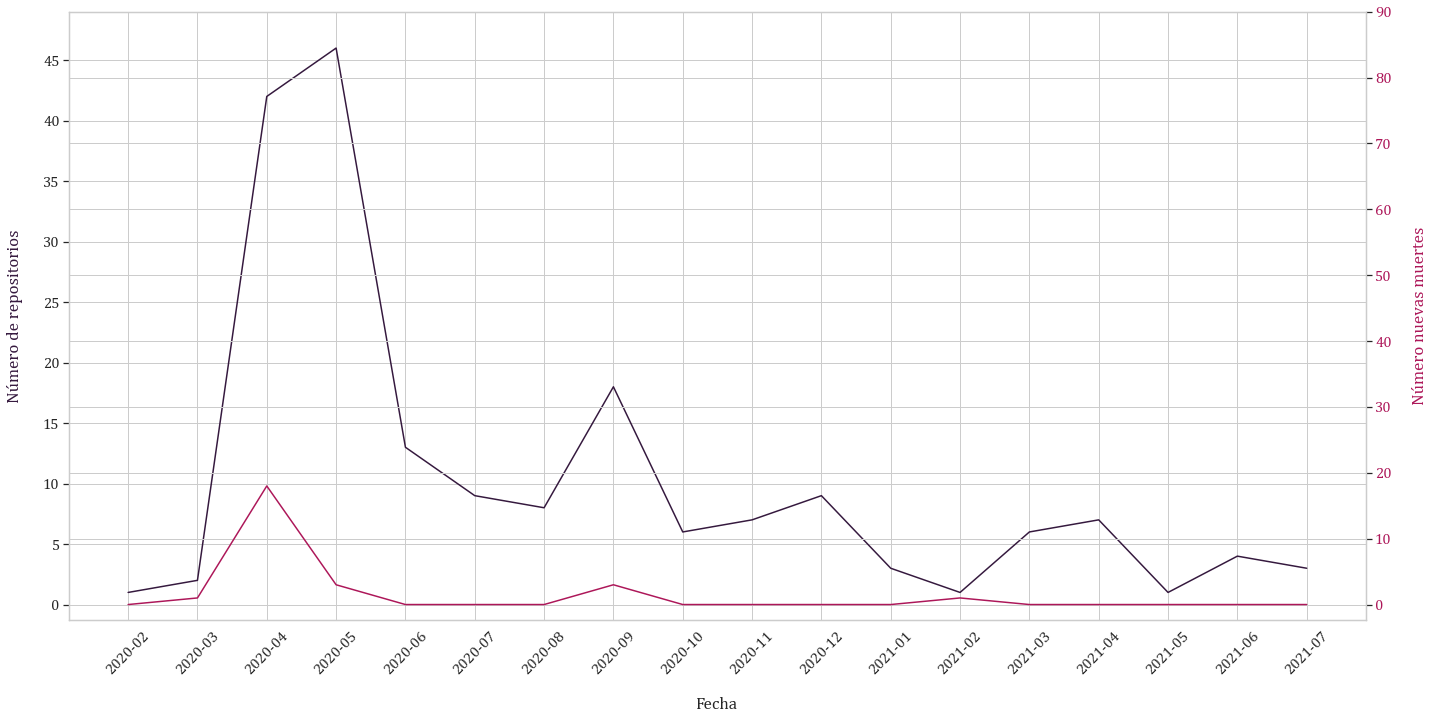

In [808]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_nz_grouped.loc["2020-01":"2021-06"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_nz_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 100, 10))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

----------------

In [809]:
df_covid_nz_meses_grouped["new_deaths_per_million"].loc[:"2021-08"]

date
2020-02    0.000
2020-03    0.206
2020-04    3.704
2020-05    0.618
2020-06    0.000
2020-07    0.000
2020-08    0.000
2020-09    0.617
2020-10    0.000
2020-11    0.000
2020-12    0.000
2021-01    0.000
2021-02    0.206
2021-03    0.000
2021-04    0.000
2021-05    0.000
2021-06    0.000
2021-07    0.000
2021-08    0.000
Name: new_deaths_per_million, dtype: float64

Nuevas muertes por millón de habitantes:

Usar función ***get_df_num_repos_por_millon(country_code)***

In [813]:
res_nz = get_df_num_repos_por_millon("NZ")["num_repos_per_million"]

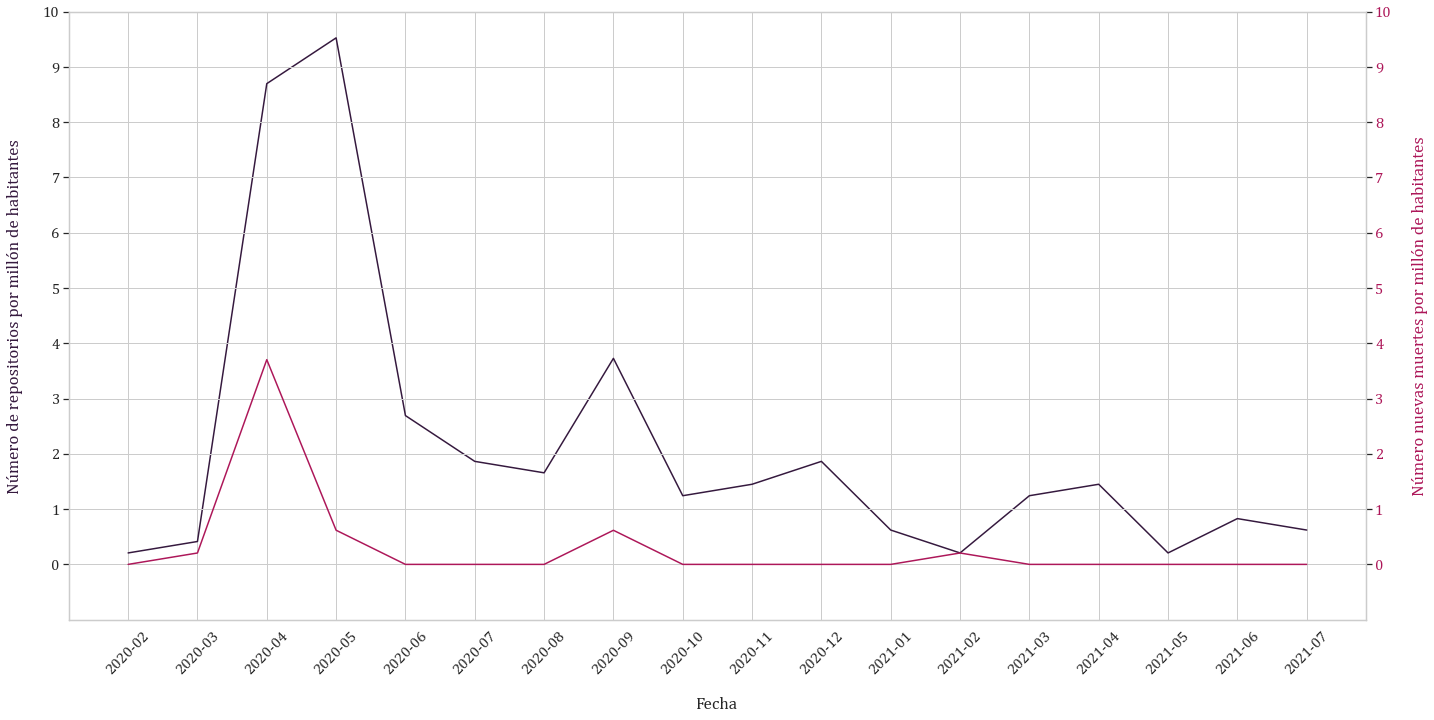

In [814]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = res_nz.loc["2020-01":"2021-06"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios por millón de habitantes', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 11, 1))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes por millón de habitantes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_nz_meses_grouped["new_deaths_per_million"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 11, 1))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(-1,10)
ax2.set_ylim(-1,10)
plt.show()

#### Taiwán

In [62]:
repos_y_paises_meses_tw = repos_y_paises_meses[repos_y_paises_meses.country_code == "TW"]
repos_y_paises_meses_tw_grouped = repos_y_paises_meses_tw.groupby([repos_y_paises_meses_tw.index]).size()

df_covid_tw = df_covid[df_covid.location == "Taiwan"]

df_covid_tw["date"] = pd.to_datetime(df_covid_tw['date'])
df_covid_tw = df_covid_tw.set_index("date")

df_covid_tw_meses = df_covid_tw.copy()
df_covid_tw_meses.index = df_covid_tw_meses.index.strftime('%Y-%m')

df_covid_tw_meses_grouped = df_covid_tw_meses.groupby([df_covid_tw_meses.index]).sum()

*repos_y_paises_meses_tw_grouped* --- *df_covid_tw_meses_grouped*

In [63]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

Nuevos casos:

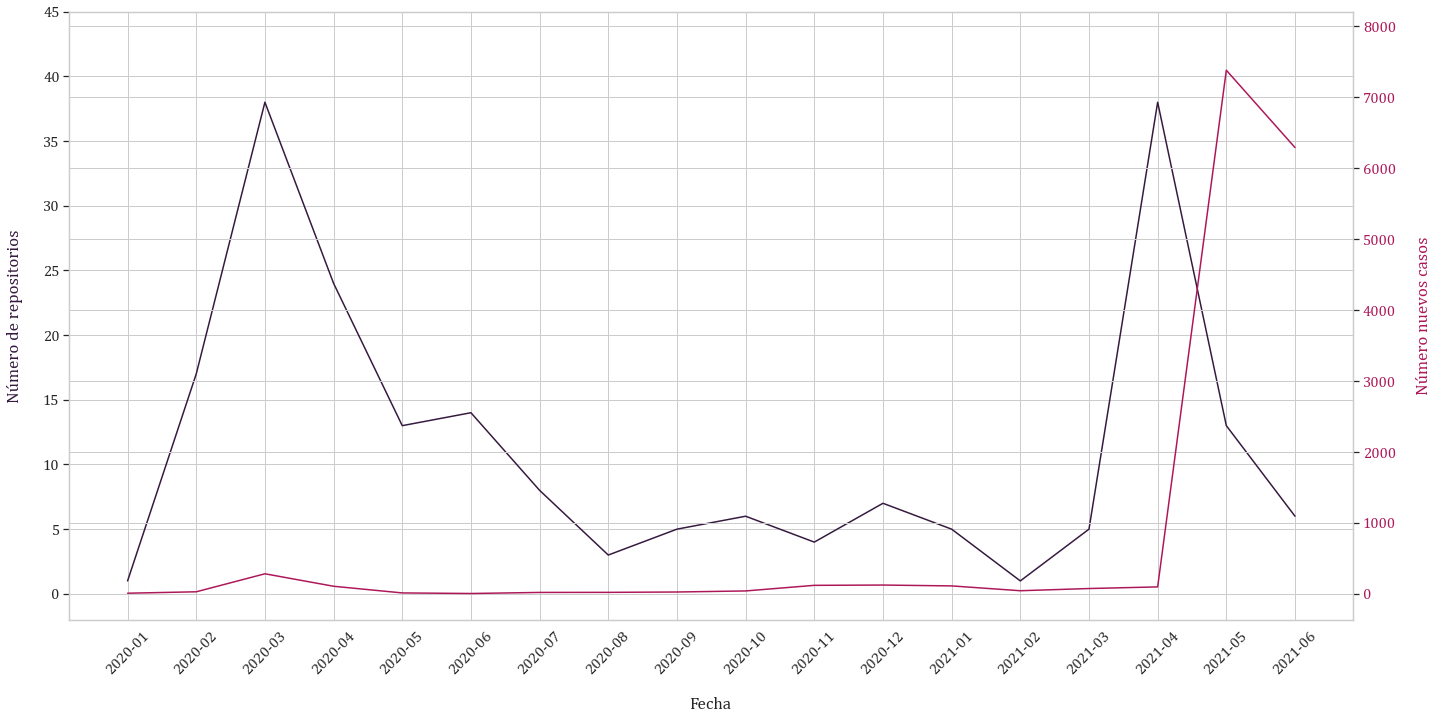

In [346]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_tw_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_tw_meses_grouped["new_cases"].loc[:"2021-06"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 8500, 1000))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Nuevas muertes:

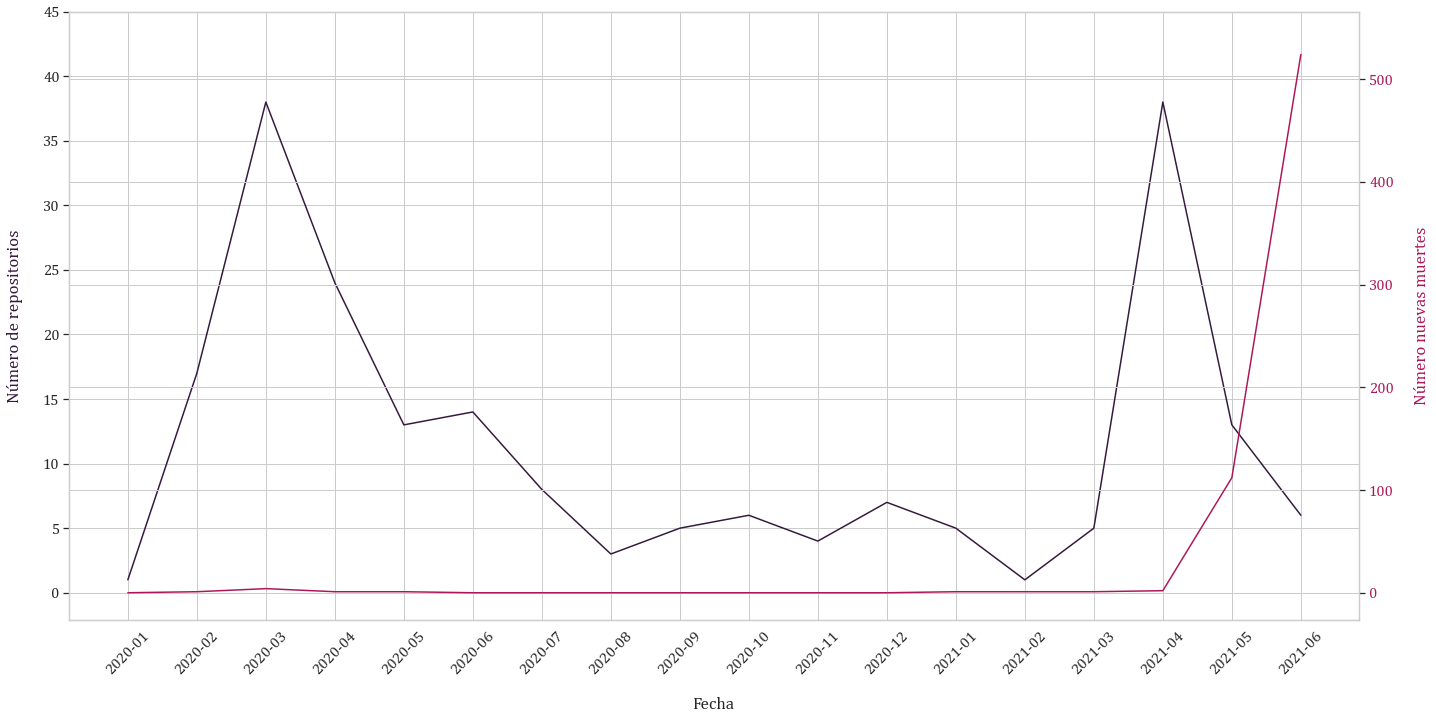

In [348]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_tw_grouped.loc["2020-01":"2021-09"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_tw_meses_grouped["new_deaths"].loc[:"2021-06"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0,  600, 50))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

----------------

In [171]:
df_covid_tw_meses_grouped["new_deaths_per_million"].loc[:"2021-08"]

date
2020-01     0.000
2020-02     0.042
2020-03     0.168
2020-04     0.042
2020-05     0.042
2020-06     0.000
2020-07     0.000
2020-08     0.000
2020-09     0.000
2020-10     0.000
2020-11     0.000
2020-12     0.000
2021-01     0.042
2021-02     0.042
2021-03     0.042
2021-04     0.084
2021-05     4.696
2021-06    21.966
2021-07     5.832
2021-08     2.015
Name: new_deaths_per_million, dtype: float64

Nuevas muertes por millón de habitantes:

In [278]:
res_tw = get_df_num_repos_por_millon("TW")["num_repos_per_million"]

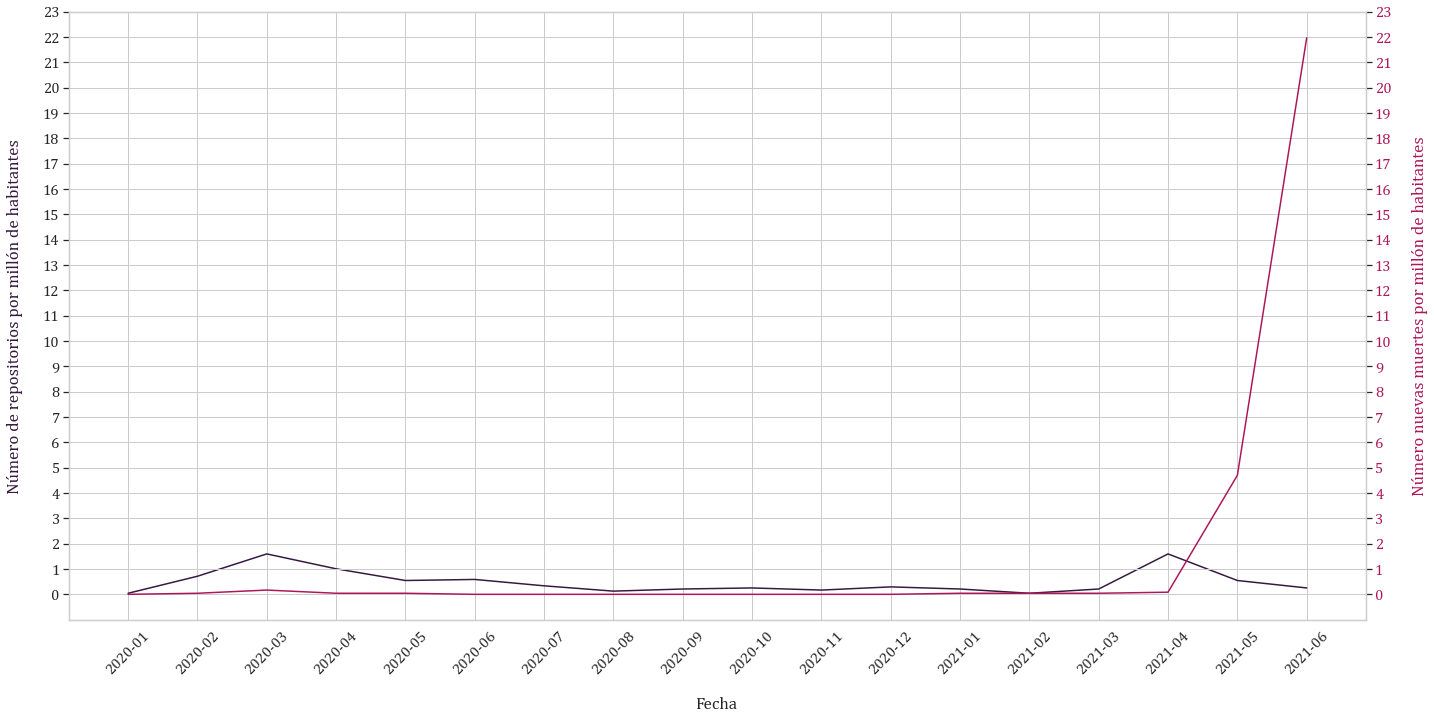

In [306]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = res_tw.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios por millón de habitantes', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 26, 1))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes por millón de habitantes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_tw_meses_grouped["new_deaths_per_million"].loc[:"2021-06"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 25, 1))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(-1,23)
ax2.set_ylim(-1,23)
plt.show()

#### Corea del Sur

In [67]:
repos_y_paises_meses_kr = repos_y_paises_meses[repos_y_paises_meses.country_code == "KR"]
repos_y_paises_meses_kr_grouped = repos_y_paises_meses_kr.groupby([repos_y_paises_meses_kr.index]).size()

df_covid_kr = df_covid[df_covid.location == "South Korea"]

df_covid_kr["date"] = pd.to_datetime(df_covid_kr['date'])
df_covid_kr = df_covid_kr.set_index("date")

df_covid_kr_meses = df_covid_kr.copy()
df_covid_kr_meses.index = df_covid_kr_meses.index.strftime('%Y-%m')

df_covid_kr_meses_grouped = df_covid_kr_meses.groupby([df_covid_kr_meses.index]).sum()

*repos_y_paises_meses_kr_grouped* --- *df_covid_kr_meses_grouped*

In [68]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

Nuevos casos:

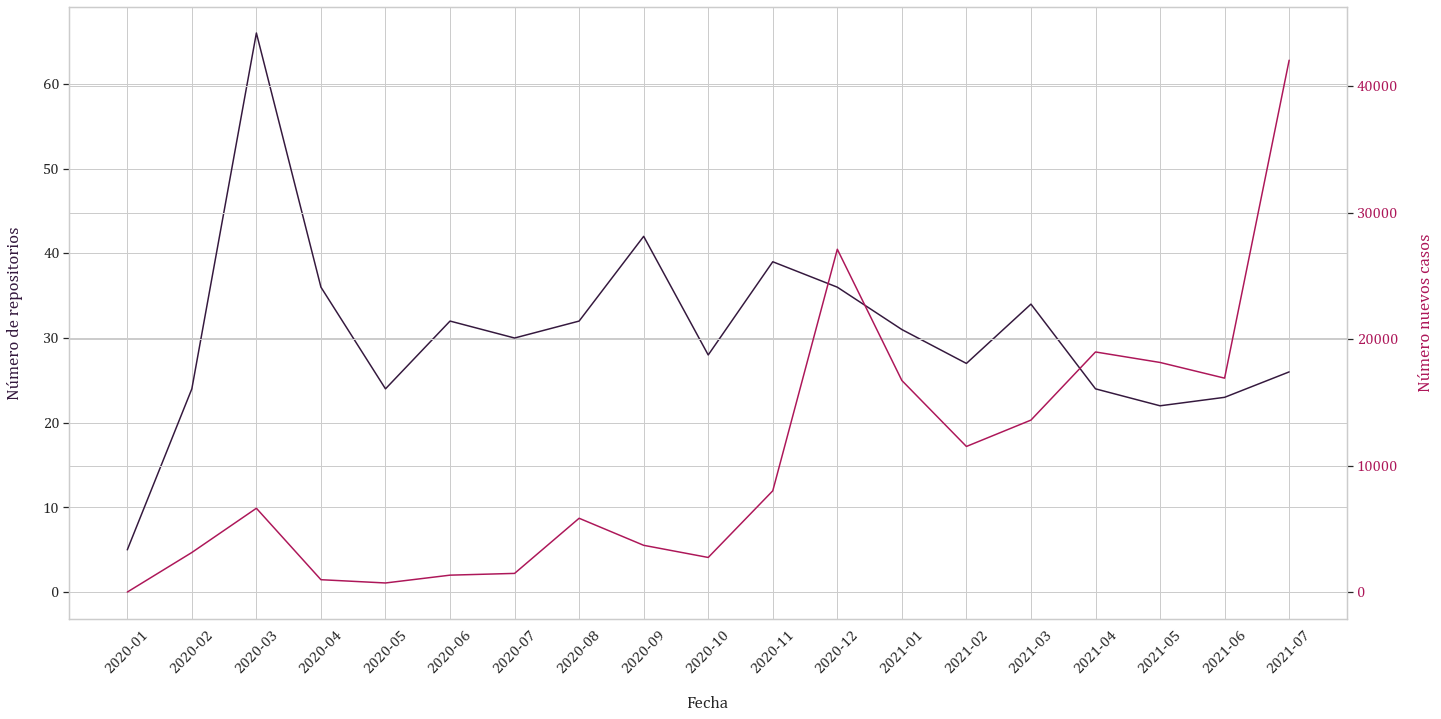

In [74]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_kr_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_kr_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 8500, 1000))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Nuevas muertes:

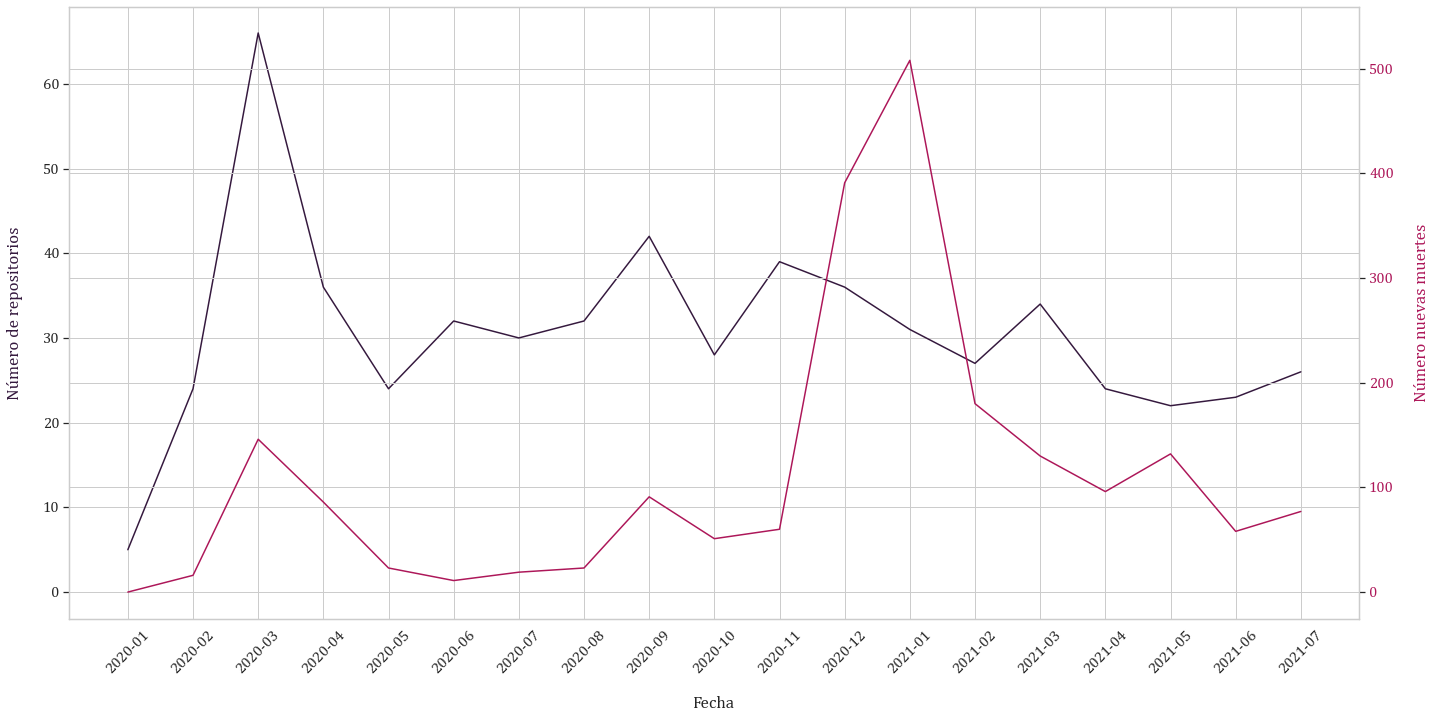

In [75]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_kr_grouped.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_kr_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0,  600, 50))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [71]:
df_covid_kr_meses_grouped["new_deaths_per_million"].loc[:"2021-08"]

date
2020-01    0.000
2020-02    0.310
2020-03    2.840
2020-04    1.669
2020-05    0.444
2020-06    0.210
2020-07    0.364
2020-08    0.443
2020-09    1.767
2020-10    0.986
2020-11    1.163
2020-12    7.617
2021-01    9.896
2021-02    3.503
2021-03    2.527
2021-04    1.865
2021-05    2.566
2021-06    1.122
2021-07    1.494
2021-08    3.773
Name: new_deaths_per_million, dtype: float64

Nuevas muertes por millón de habitantes:

In [289]:
res_kr = get_df_num_repos_por_millon("KR")["num_repos_per_million"]

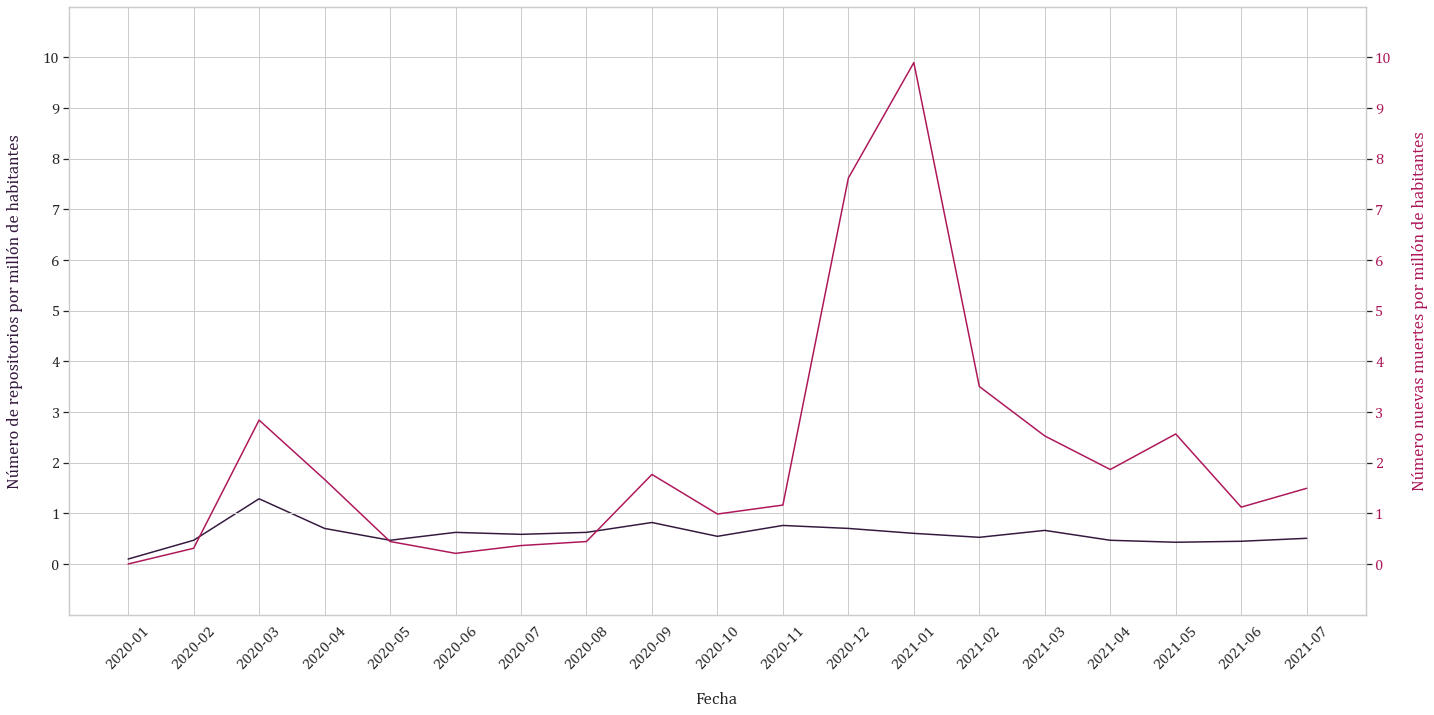

In [313]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = res_kr.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios por millón de habitantes', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 11, 1))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes por millón de habitantes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_kr_meses_grouped["new_deaths_per_million"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 11, 1))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(-1,11)
ax2.set_ylim(-1,11)
plt.show()

#### Estados Unidos

In [76]:
repos_y_paises_meses_us = repos_y_paises_meses[repos_y_paises_meses.country_code == "US"]
repos_y_paises_meses_us_grouped = repos_y_paises_meses_us.groupby([repos_y_paises_meses_us.index]).size()

df_covid_us = df_covid[df_covid.location == "United States"]

df_covid_us["date"] = pd.to_datetime(df_covid_us['date'])
df_covid_us = df_covid_us.set_index("date")

df_covid_us_meses = df_covid_us.copy()
df_covid_us_meses.index = df_covid_us_meses.index.strftime('%Y-%m')

df_covid_us_meses_grouped = df_covid_us_meses.groupby([df_covid_us_meses.index]).sum()

In [77]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

*repos_y_paises_meses_us_grouped* --- *df_covid_us_meses_grouped*

Nuevos casos:

In [86]:
repos_y_paises_meses_us_grouped.loc["2020-01":"2020-03"]

created_at
2020-01      25
2020-02     116
2020-03    3121
dtype: int64

In [87]:
df_covid_us_meses_grouped["new_cases"].loc["2020-01":"2020-03"]

date
2020-01         7.0
2020-02        17.0
2020-03    192276.0
Name: new_cases, dtype: float64

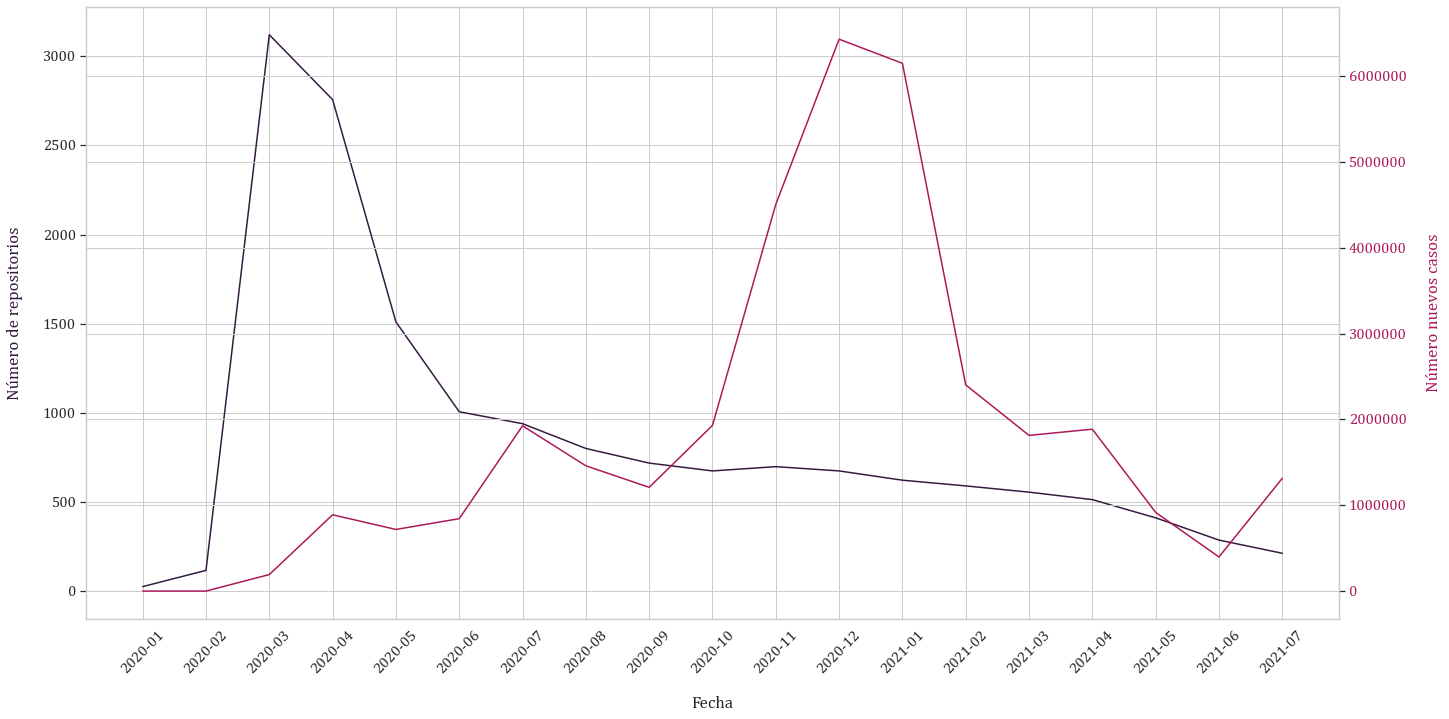

In [78]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_us_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_us_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 8500, 1000))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Nuevas muertes:

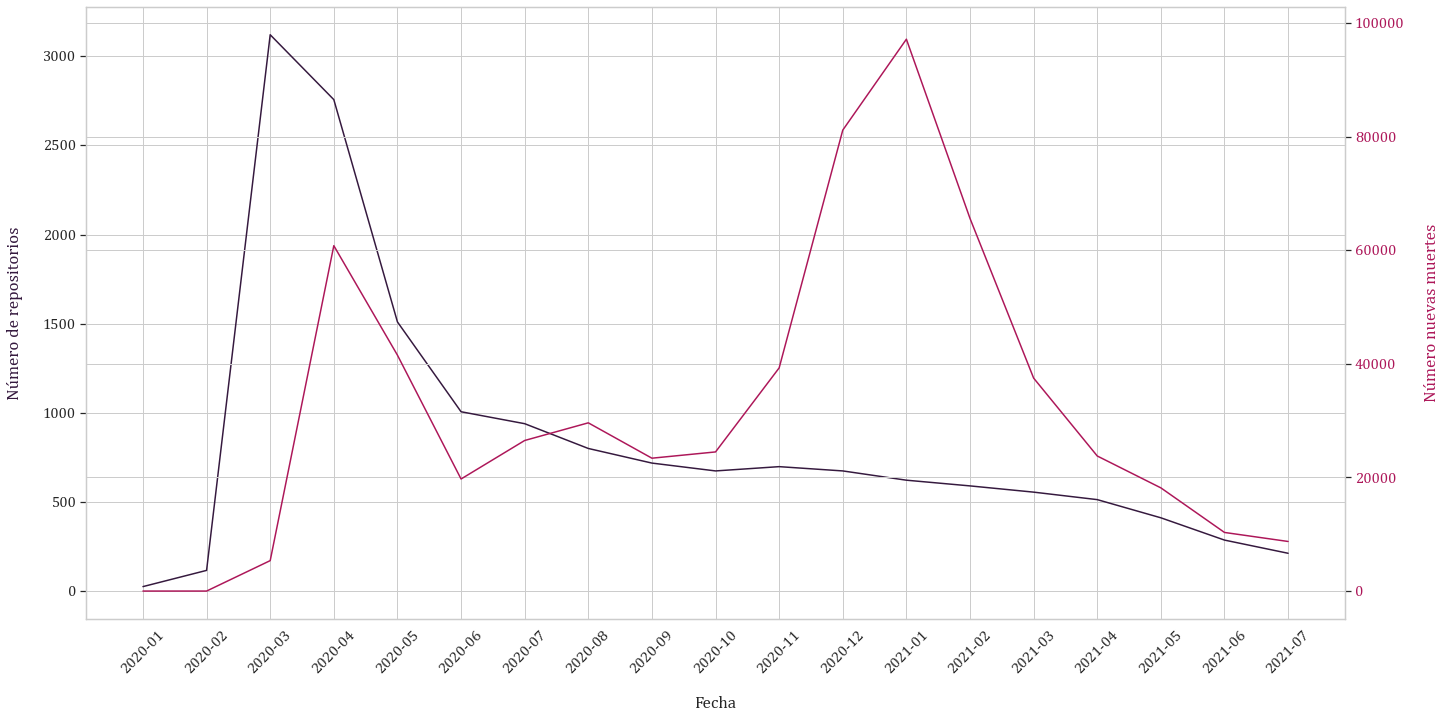

In [85]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_us_grouped.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_us_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0,  600, 50))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [79]:
df_covid_us_meses_grouped["new_deaths_per_million"].loc[:"2021-08"]

date
2020-01      0.000
2020-02      0.003
2020-03     16.102
2020-04    182.700
2020-05    124.795
2020-06     59.288
2020-07     79.655
2020-08     88.993
2020-09     70.290
2020-10     73.603
2020-11    118.050
2020-12    243.843
2021-01    291.928
2021-02    197.110
2021-03    112.651
2021-04     71.454
2021-05     54.589
2021-06     31.005
2021-07     26.229
2021-08     80.686
Name: new_deaths_per_million, dtype: float64

Nuevas muertes por millón de habitantes:

In [311]:
res_us = get_df_num_repos_por_millon("US")["num_repos_per_million"]

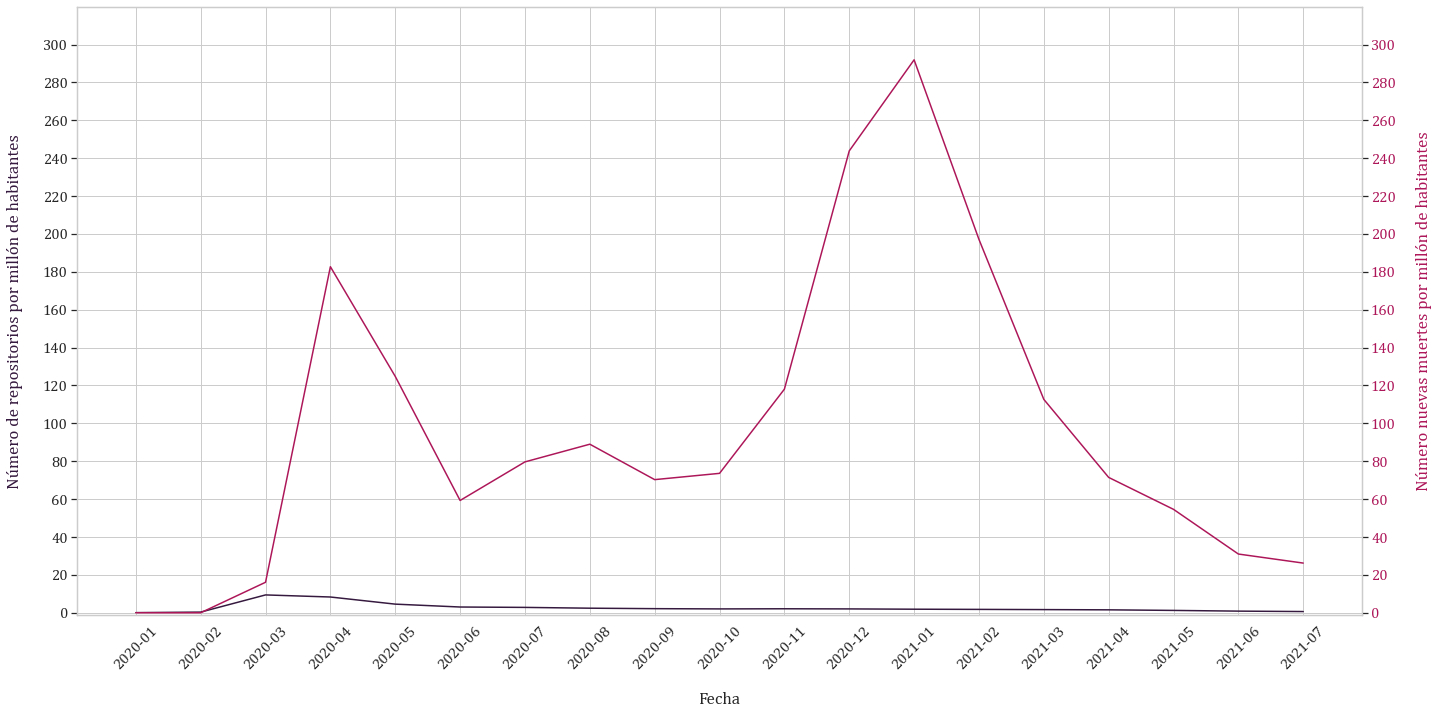

In [322]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = res_us.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios por millón de habitantes', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 320, 20))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes por millón de habitantes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_us_meses_grouped["new_deaths_per_million"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 320, 20))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(-1,320)
ax2.set_ylim(-1,320)
plt.show()

#### México

In [93]:
repos_y_paises_meses_mx = repos_y_paises_meses[repos_y_paises_meses.country_code == "MX"]
repos_y_paises_meses_mx_grouped = repos_y_paises_meses_mx.groupby([repos_y_paises_meses_mx.index]).size()

df_covid_mx = df_covid[df_covid.location == "Mexico"]

df_covid_mx["date"] = pd.to_datetime(df_covid_mx['date'])
df_covid_mx = df_covid_mx.set_index("date")

df_covid_mx_meses = df_covid_mx.copy()
df_covid_mx_meses.index = df_covid_mx_meses.index.strftime('%Y-%m')

df_covid_mx_meses_grouped = df_covid_mx_meses.groupby([df_covid_mx_meses.index]).sum()

In [77]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

*repos_y_paises_meses_mx_grouped* --- *df_covid_mx_meses_grouped*

Nuevos casos:

In [104]:
repos_y_paises_meses_mx_grouped.loc["2020-01":"2020-08"]

created_at
2020-01      1
2020-02      2
2020-03    129
2020-04    160
2020-05    100
2020-06     55
2020-07     36
2020-08     43
dtype: int64

In [103]:
df_covid_mx_meses_grouped["new_cases"].loc["2020-01":"2020-08"]

date
2020-01         0.0
2020-02         4.0
2020-03      1211.0
2020-04     18009.0
2020-05     71440.0
2020-06    135425.0
2020-07    198548.0
2020-08    174923.0
Name: new_cases, dtype: float64

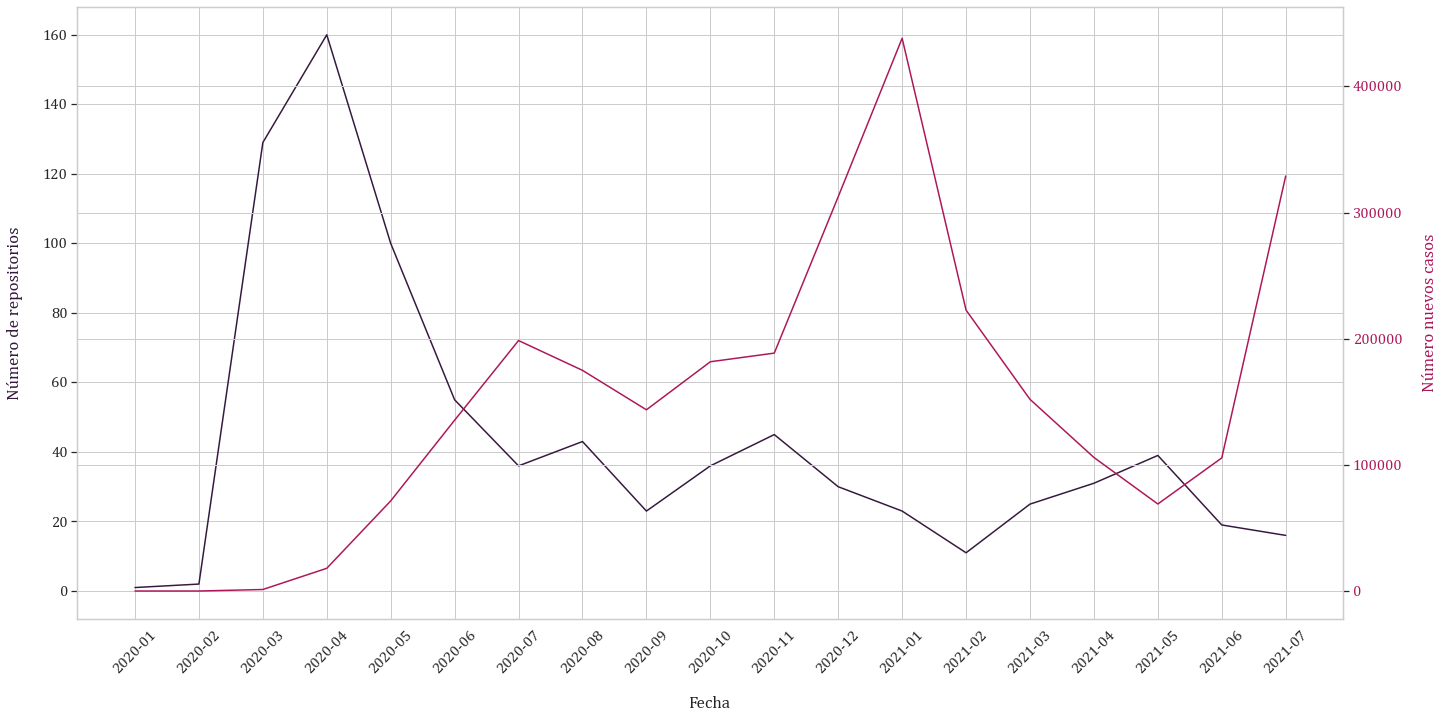

In [96]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_mx_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_mx_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 8500, 1000))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Nuevas muertes:

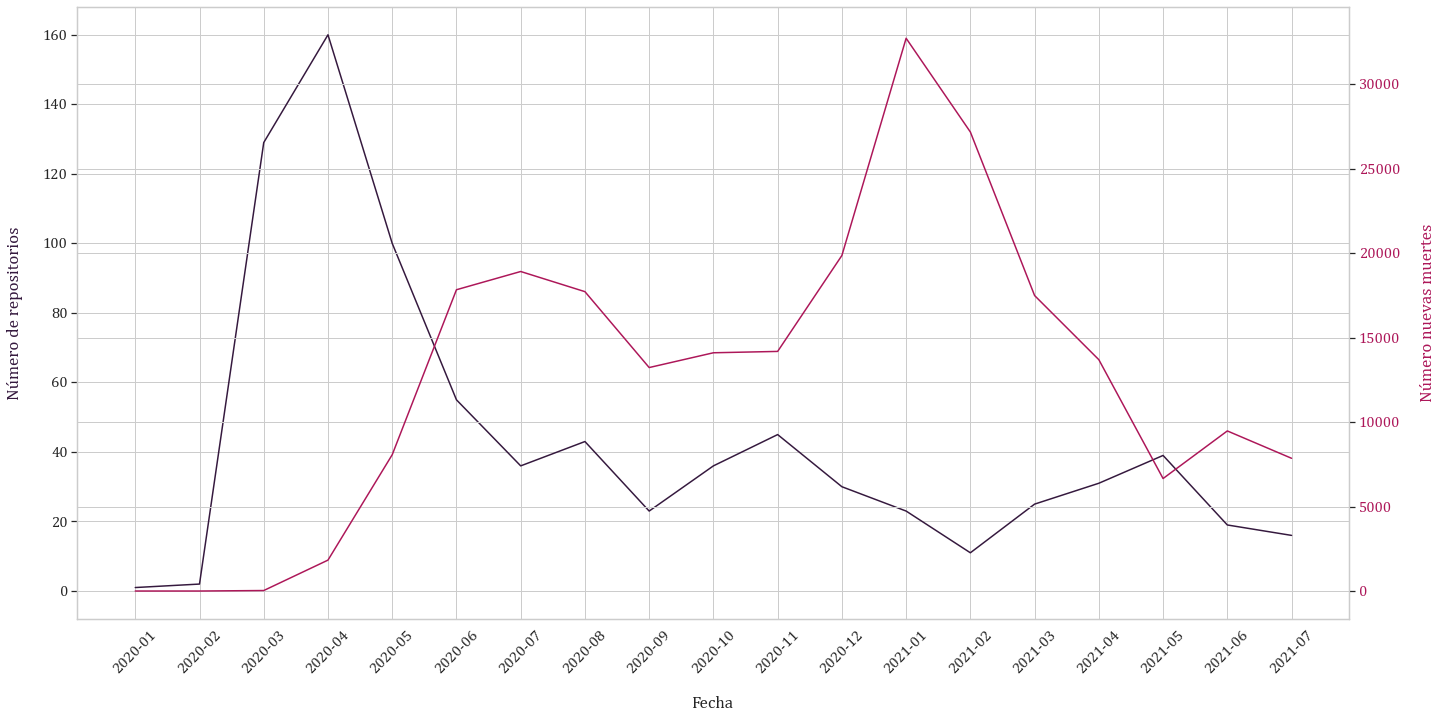

In [97]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_mx_grouped.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_mx_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0,  600, 50))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [100]:
df_covid_mx_meses_grouped["new_deaths_per_million"].loc[:"2021-08"]

date
2020-01      0.000
2020-02      0.000
2020-03      0.225
2020-04     14.047
2020-05     61.959
2020-06    136.946
2020-07    145.238
2020-08    136.080
2020-09    101.579
2020-10    108.297
2020-11    108.914
2020-12    152.516
2021-01    251.256
2021-02    208.649
2021-03    134.304
2021-04    105.151
2021-05     51.133
2021-06     72.767
2021-07     60.333
2021-08    141.408
Name: new_deaths_per_million, dtype: float64

Nuevas muertes por millón de habitantes:

In [337]:
res_mx = get_df_num_repos_por_millon("MX")["num_repos_per_million"]

In [340]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = res_mx.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios por millón de habitantes', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 270, 20))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes por millón de habitantes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_mx_meses_grouped["new_deaths_per_million"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 270, 20))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(-1,260)
ax2.set_ylim(-1,260)
plt.show()

#### España

In [105]:
repos_y_paises_meses_es = repos_y_paises_meses[repos_y_paises_meses.country_code == "ES"]
repos_y_paises_meses_es_grouped = repos_y_paises_meses_es.groupby([repos_y_paises_meses_es.index]).size()

df_covid_es = df_covid[df_covid.location == "Spain"]

df_covid_es["date"] = pd.to_datetime(df_covid_es['date'])
df_covid_es = df_covid_es.set_index("date")

df_covid_es_meses = df_covid_es.copy()
df_covid_es_meses.index = df_covid_es_meses.index.strftime('%Y-%m')

df_covid_es_meses_grouped = df_covid_es_meses.groupby([df_covid_es_meses.index]).sum()

In [106]:
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)

*repos_y_paises_meses_es_grouped* --- *df_covid_es_meses_grouped*

Nuevos casos:

In [107]:
repos_y_paises_meses_es_grouped.loc["2020-01":"2020-08"]

created_at
2020-02      6
2020-03    207
2020-04    196
2020-05     76
2020-06     37
2020-07     32
2020-08     22
dtype: int64

In [108]:
df_covid_es_meses_grouped["new_cases"].loc["2020-01":"2020-08"]

date
2020-02        45.0
2020-03     95878.0
2020-04    117512.0
2020-05     26044.0
2020-06      9792.0
2020-07     39251.0
2020-08    174336.0
Name: new_cases, dtype: float64

In [115]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_es_grouped.loc["2020-01":"2021-07"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevos casos', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_es_meses_grouped["new_cases"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0, 8500, 1000))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Nuevas muertes:

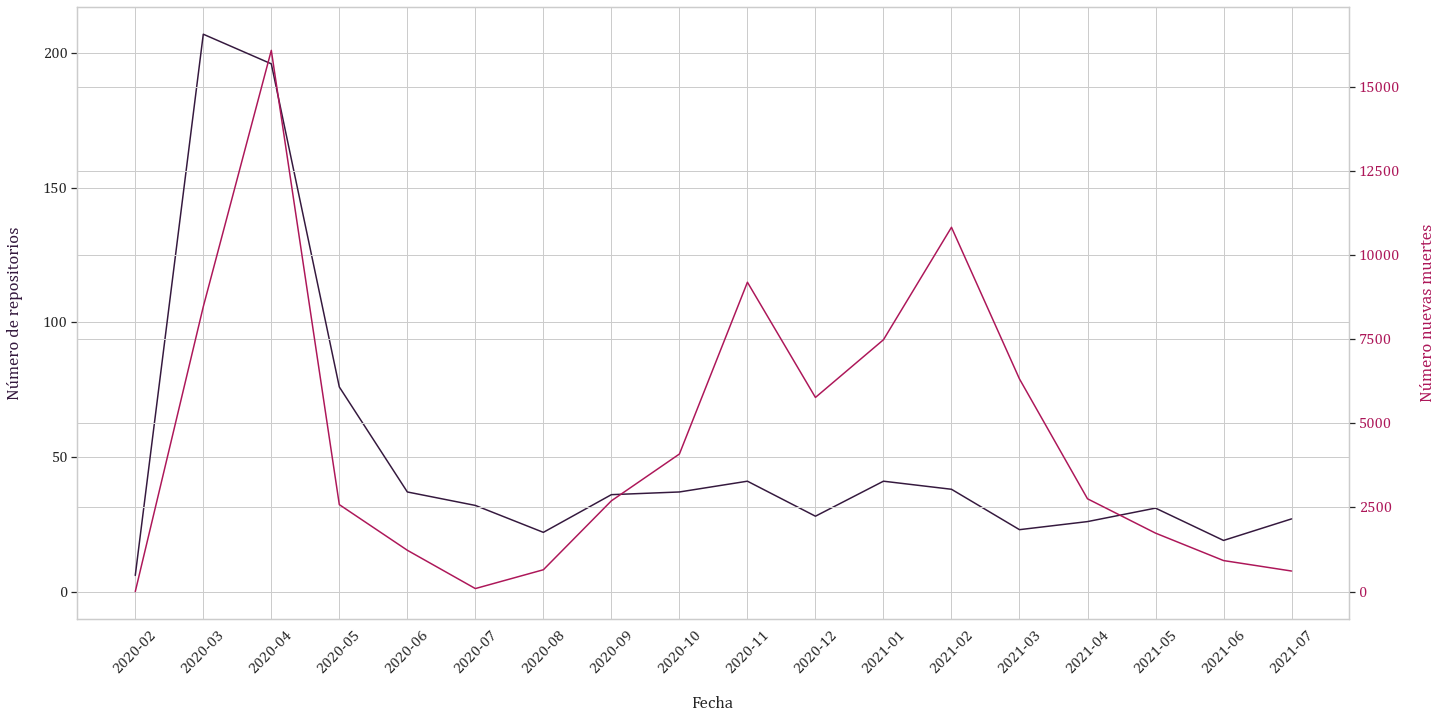

In [110]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = repos_y_paises_meses_es_grouped.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 50, 5))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_es_meses_grouped["new_deaths"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
# ax2.set_yticks(np.arange(0,  600, 50))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [100]:
df_covid_es_meses_grouped["new_deaths_per_million"].loc[:"2021-08"]

date
2020-01      0.000
2020-02      0.000
2020-03      0.225
2020-04     14.047
2020-05     61.959
2020-06    136.946
2020-07    145.238
2020-08    136.080
2020-09    101.579
2020-10    108.297
2020-11    108.914
2020-12    152.516
2021-01    251.256
2021-02    208.649
2021-03    134.304
2021-04    105.151
2021-05     51.133
2021-06     72.767
2021-07     60.333
2021-08    141.408
Name: new_deaths_per_million, dtype: float64

Nuevas muertes por millón de habitantes:

In [341]:
res_es = get_df_num_repos_por_millon("ES")["num_repos_per_million"]

In [343]:
fig = plt.figure(figsize=(20,10))

ax1 = sns.lineplot(data = res_es.loc["2020-01":"2021-08"], color=color[0])

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios por millón de habitantes', size=17, labelpad=20, color=color[0]) 
plt.xlabel('Fecha', size=17, labelpad=20)
plt.yticks(np.arange(0, 370, 20))

ax2 = ax1.twinx()

ax2.set_ylabel('Número nuevas muertes por millón de habitantes', color=color[2], size=17, labelpad=20)
ax2 = sns.lineplot(data = df_covid_es_meses_grouped["new_deaths_per_million"].loc[:"2021-07"], color=color[2])
ax2.tick_params(axis='y', labelcolor=color[2])
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
ax2.set_yticks(np.arange(0, 370, 20))
align_yaxis(ax1, ax2)
fig.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim(-1,360)
ax2.set_ylim(-1,360)
plt.show()

--------

## Vacunas

In [333]:
df = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

In [334]:
df_readmes = pd.read_csv('readmes_TOTAL.csv')
df_readmes = df_readmes.drop(columns="full_name")
df_readmes

repo_id           login  \
0       238316428  CSSEGISandData   
1       235374822   midas-network   
2       239777191     RamiKrispin   
3       237129709   FoldingAtHome   
4       234936988      nextstrain   
...           ...             ...   
178065  269527538          ALT-F1   
178066  270034436   marvinIsSacul   
178067  269906994  jahnavi-prasad   
178068  270013759         Tackode   
178069  270006438         Tackode   

                                                   readme  
0       # COVID-19 Data Repository by the Center for S...  
1       \n\n# MIDAS 2019 Novel Coronavirus Repository\...  
2        README.md is generated from README.Rmd. Pleas...  
3       # Folding@home COVID-19 efforts\n\nThis reposi...  
4       [![GitHub release (latest by date)](https://im...  
...                                                   ...  
178065  # Concatenate weather data histories in CSV fo...  
178066  # mzansi_corona\n\nSouth Africa's Corona Virus...  
178067  ### FaceMaskDetector\n* Created by S. Jahnavi ...  
178068  # Tackode ![CI](https://github.com/Tackode/fro...  
178069  # Tackode Backend ![Build](https://github.com/...  

[178070 rows x 3 columns]

In [335]:
repos_con_readmes = df.join(df_readmes.set_index('repo_id'), on='id')
repos_con_readmes

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  \
0                  27211           27211        17432  ...   
1                    642             642          221  ...   
2                    394             394          175  ...   
3                   1115            1115           87  ...   
4                   1208            1208          343  ...   
...                  ...             ...          ...  ...   
178034                 1               1            0  ...   
178035                 2               2            0  ...   
178036                 1               1            0  ...   
178037                 0               0            0  ...   
178038                 0               0            0  ...   

                                                 homepage  \
0       https://systems.jhu.edu/research/public-health...   
1                                                     NaN   
2              https://ramikrispin.github.io/coronavirus/   
3                               https://foldingathome.org   
4        

In [63]:
repos_con_readmes.columns

Index(['id', 'name', 'full_name', 'description', 'contributors_url',
       'archived', 'disabled', 'stargazers_count', 'watchers_count',
       'forks_count', 'has_downloads', 'has_issues', 'has_pages',
       'has_projects', 'has_wiki', 'homepage', 'html_url', 'language',
       'created_at', 'pushed_at', 'updated_at', 'svn_url', 'owner.login',
       'login', 'readme'],
      dtype='object')

In [336]:
repos_con_readmes = repos_con_readmes[['id', 'full_name', 'description', 'stargazers_count', 'homepage', 'html_url', 'language',
       'created_at', 'pushed_at', 'updated_at', 'login', 'readme']]
repos_con_readmes = repos_con_readmes[repos_con_readmes.readme.notnull()]
repos_con_readmes

id                               full_name  \
0       238316428                 CSSEGISandData/COVID-19   
1       235374822                  midas-network/COVID-19   
2       239777191                 RamiKrispin/coronavirus   
3       237129709               FoldingAtHome/coronavirus   
4       234936988                         nextstrain/ncov   
...           ...                                     ...   
178034  268856502                 fwcd/iot-contact-tracer   
178035  269479371                           kclhi/jupyter   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories   
178037  270013759                        Tackode/frontend   
178038  270006438                         Tackode/backend   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
1                       2019 novel coronavirus repository               642   
2                                 The coronavirus dataset               394   
3                           Folding@home COVID-19 efforts              1115   
4       Nextstrain build for novel coronavirus SARS-CoV-2              1208   
...                                                   ...               ...   
178034  Decentralized contact tracing system supportin...                 1   
178035           :whale2: JupyterHub Docker configuration                 2   
178036  Concatenate histories weather data collected b...                 1   
178037                               Frontend for Tackode                 0   
178038                                Backend for Tackode                 0   

                                                 homepage  \
0       https://systems.jhu.edu/research/public-health...   
1                                                     NaN   
2              https://ramikrispin.github.io/coronavirus/   
3                               https://foldingathome.org   
4                             https://nextstrain.org/ncov   
...                                                   ...   
178034                                                NaN   
178035                                  https://kclhi.org   
178036                               http://www.alt-f1.be   
178037                                https://tackode.com   
178038                                https://tackode.com   

                                                 html_url language  \
0              https://github.com/CSSEGISandData/COVID-19      NaN   
1               https://github.com/midas-network/COVID-19      TeX   
2              https://github.com/RamiKrispin/coronavirus        R   
3            https://github.com/FoldingAtHome/coronavirus   Python   
4                      https://github.com/nextstrain/ncov   Python   
...                                                   ...      ...   
178034         https://github.com/fwcd/iot-contact-tracer     Dart   
178035                   https://github.com/kclhi/jupyter   Python   
178036  https://github.com/ALT-F1/OpenWeatherMap-conca...   Python   
178037                https://github.com/Tackode/frontend      Vue   
178038                 https://github.com/Tackode/backend     Rust   

                  created_at             pushed_at            updated_at  \
0       2020-02-04T22:03:53Z  2021-08-14T11:35:08Z  2021-08-14T11:56:01Z   
1       2020-01-21T15:27:23Z  2021-08-12T20:15:14Z  2021-08-12T20:15:21Z   
2       2020-02-11T14:08:06Z  2021-08-14T08:19:49Z  2021-08-14T08:19:52Z   
3       2020-01-30T03:12:19Z  2020-10-27T03:29:18Z  2021-08-09T21:17:36Z   
4       2020-01-19T17:23:17Z  2021-08-13T12:36:06Z  2021-08-13T12:36:10Z   
...                      ...                   ...                   ...   
178034  2020-06-02T16:46:15Z  2020-09-04T13:14:05Z  2020-09-04T15:03:54Z   
178035  2020-06-04T22:35:16Z  2021-06-11T18:23:39Z  2021-08-14T14:32:53Z   
178036  2020-06-05T04:04:46Z  2021-08-12T13:30:11Z  2020-06-08T12:44:27Z   

In [337]:
import re
related_pfizer = ["pfizer", re.escape("pfizer-biontech"), re.escape("pfizer/biontech"), "biontech", "comirnaty", "tozinameran", "BNT162b2"]
related_moderna = ["moderna", "spikevax", re.escape("mRNA-1273")]
related_astrazeneca = [re.escape("oxford/astraZeneca"), re.escape("oxford-astraZeneca"), "astrazeneca", "vaxzevria", "AZD1222", "covishield", "ChAdOx1"]
related_johnson = ["johnson vaccine", "janssen", re.escape("johnson & johnson"), re.escape("johnson&johnson"), "johnson and johnson", re.escape("Ad26.COV2.S")]

In [338]:
pattern_pfizer = "(?i)" + '|'.join(related_pfizer)
pattern_moderna = "(?i)" + '|'.join(related_moderna)
pattern_astrazeneca = "(?i)" + '|'.join(related_astrazeneca)
pattern_johnson = "(?i)" + '|'.join(related_johnson)

In [339]:
repos_con_readmes_copia = repos_con_readmes.copy()

In [68]:
import re
def get_related_vaccine_type(df, pattern):
    readme = df["readme"]
    regex = re.compile(pattern)
    regex_search = regex.search(readme)
    if regex_search:
        return True
    else:
        return False

In [340]:
repos_con_readmes_copia["pfizer"] = repos_con_readmes_copia.apply(get_related_vaccine_type, args=(pattern_pfizer,), axis = 1)
repos_con_readmes_copia["moderna"] = repos_con_readmes_copia.apply(get_related_vaccine_type, args=(pattern_moderna,), axis = 1)
repos_con_readmes_copia["astrazeneca"] = repos_con_readmes_copia.apply(get_related_vaccine_type, args=(pattern_astrazeneca,), axis = 1)
repos_con_readmes_copia["johnson"] = repos_con_readmes_copia.apply(get_related_vaccine_type, args=(pattern_johnson,), axis = 1)

#### Selección solamente de repositorios relacionados con las vacunas

In [343]:
repos_con_readmes_pfizer = repos_con_readmes_copia[repos_con_readmes_copia.pfizer == True]
repos_con_readmes_moderna = repos_con_readmes_copia[repos_con_readmes_copia.moderna == True]
repos_con_readmes_astrazeneca = repos_con_readmes_copia[repos_con_readmes_copia.astrazeneca == True]
repos_con_readmes_johnson = repos_con_readmes_copia[repos_con_readmes_copia.johnson == True]

In [347]:
repos_relacionados_vacuna = repos_con_readmes_pfizer.append(repos_con_readmes_moderna)
repos_relacionados_vacuna = repos_relacionados_vacuna.append(repos_con_readmes_astrazeneca)
repos_relacionados_vacuna = repos_relacionados_vacuna.append(repos_con_readmes_johnson)
repos_relacionados_vacuna

id                                  full_name  \
790     246323140                  mponce0/covid19.analytics   
2275    247479696  DrozmotiX/ioBroker.coronavirus-statistics   
5388    249628101       datadesk/california-coronavirus-data   
6279    250473220                          kkm24132/COVID-19   
6686    250817451                 sipaque/enlacescoronavirus   
...           ...                                        ...   
171401  376777898           blackdogbarking/Doctolib-Shotgun   
171547  378245809                  Lsamsilva/Projeto_Vacinas   
176563  252725505                             omic/jailbreak   
176637  367958719                       rbignon/doctoshotgun   
177884  376798191              trassmann/berlin-jj-impfcheck   

                                              description  stargazers_count  \
790     R package to obtain and analyze live data from...                28   
2275    Adapter to show Global Corona Virus informatio...                17   
5388    The Los Angeles Times' independent tally of co...               197   
6279    Novel Coronavirus (COVID-19) related learning ...                 3   
6686    Listado de enlaces de información general y es...                 0   
...                                                   ...               ...   
171401          make apointments for covid-19 vaccination                 1   
171547  Projeto com a lista das vacinas aprovadas pela...                 0   
176563  We jailbreak your medical records and genomics...                16   
176637  Script to automatically book a vaccine slot on...               473   
177884                                                NaN                 0   

                                            homepage  \
790     https://mponce0.github.io/covid19.analytics/   
2275                                             NaN   
5388      https://www.latimes.com/coronavirustracker   
6279                                             NaN   
6686                                             NaN   
...                                              ...   
171401                                           NaN   
171547                                           NaN   
176563                                https://c19.ai   
176637                                           NaN   
177884                                           NaN   

                                                 html_url          language  \
790          https://github.com/mponce0/covid19.analytics                 R   
2275    https://github.com/DrozmotiX/ioBroker.coronavi...        JavaScript   
5388    https://github.com/datadesk/california-coronav...  Jupyter Notebook   
6279                 https://github.com/kkm24132/COVID-19               NaN   
6686        https://github.com/sipaque/enlacescoronavirus               NaN   
...                                                   ...               ...   
171401  https://github.com/blackdogbarking/Doctolib-Sh...            Python   
171547       https://github.com/Lsamsilva/Projeto_Vacinas        TypeScript   
176563                  https://github.com/omic/jailbreak        JavaScript   
176637            https://github.com/rbignon/doctoshotgun            Python   
177884   https://github.com/trassmann/berlin-jj-impfcheck        JavaScript   

                  created_at             pushed_at            updated_at  \
790     2020-03-10T14:28:47Z  2021-08-10T17:02:52Z  2021-08-10T17:02:55Z   
2275    2020-03-15T14:13:21Z  2021-08-12T11:59:35Z  2021-08-12T11:53:47Z   
5388    2020-03-24T06:15:32Z  2021-08-14T00:45:26Z  2021-08-14T00:45:30Z   
6279    2020-03-27T07:53:08Z  2021-06-16T10:02:27Z  2021-06-16T10:02:30Z   
6686    2020-03-28T14:37:11Z  2021-08-10T07:22:58Z  2021-08-10T07:23:01Z   
...                      ...                   ...                   ...   
171401  2021-06-14T10:01:22Z  2021-06-14T10:03:54Z  2021-06-28T10:02:42Z   
171547  2021-06-18T19:19:54Z  2021-06-18T22:08:05Z  2021-06-18T22:0

Eliminación de duplicados:

In [348]:
repos_relacionados_vacuna = repos_relacionados_vacuna[~repos_relacionados_vacuna.duplicated(subset=['id'])]
repos_relacionados_vacuna

id                                  full_name  \
790     246323140                  mponce0/covid19.analytics   
2275    247479696  DrozmotiX/ioBroker.coronavirus-statistics   
5388    249628101       datadesk/california-coronavirus-data   
6279    250473220                          kkm24132/COVID-19   
6686    250817451                 sipaque/enlacescoronavirus   
...           ...                                        ...   
108066  362883749               cdgiguere/COVID-19_Dashboard   
134652  388325100     mauforonda/vacunas_unidoscontraelcovid   
162688  249234144                 HarshdeepKahlon/hiring2020   
176563  252725505                             omic/jailbreak   
177884  376798191              trassmann/berlin-jj-impfcheck   

                                              description  stargazers_count  \
790     R package to obtain and analyze live data from...                28   
2275    Adapter to show Global Corona Virus informatio...                17   
5388    The Los Angeles Times' independent tally of co...               197   
6279    Novel Coronavirus (COVID-19) related learning ...                 3   
6686    Listado de enlaces de información general y es...                 0   
...                                                   ...               ...   
108066                                                NaN                 0   
134652  Registro estructurado del reporte diario de do...                 0   
162688  Internship status of companies - COVID-19 outb...                 1   
176563  We jailbreak your medical records and genomics...                16   
177884                                                NaN                 0   

                                            homepage  \
790     https://mponce0.github.io/covid19.analytics/   
2275                                             NaN   
5388      https://www.latimes.com/coronavirustracker   
6279                                             NaN   
6686                                             NaN   
...                                              ...   
108066                                           NaN   
134652                                           NaN   
162688                                           NaN   
176563                                https://c19.ai   
177884                                           NaN   

                                                 html_url          language  \
790          https://github.com/mponce0/covid19.analytics                 R   
2275    https://github.com/DrozmotiX/ioBroker.coronavi...        JavaScript   
5388    https://github.com/datadesk/california-coronav...  Jupyter Notebook   
6279                 https://github.com/kkm24132/COVID-19               NaN   
6686        https://github.com/sipaque/enlacescoronavirus               NaN   
...                                                   ...               ...   
108066    https://github.com/cdgiguere/COVID-19_Dashboard  Jupyter Notebook   
134652  https://github.com/mauforonda/vacunas_unidosco...            Python   
162688      https://github.com/HarshdeepKahlon/hiring2020               NaN   
176563                  https://github.com/omic/jailbreak        JavaScript   
177884   https://github.com/trassmann/berlin-jj-impfcheck        JavaScript   

                  created_at             pushed_at            updated_at  \
790     2020-03-10T14:28:47Z  2021-08-10T17:02:52Z  2021-08-10T17:02:55Z   
2275    2020-03-15T14:13:21Z  2021-08-12T11:59:35Z  2021-08-12T11:53:47Z   
5388    2020-03-24T06:15:32Z  2021-08-14T00:45:26Z  2021-08-14T00:45:30Z   
6279    2020-03-27T07:53:08Z  2021-06-16T10:02:27Z  2021-06-16T10:02:30Z   
6686    2020-03-28T14:37:11Z  2021-08-10T07:22:58Z  2021-08-10T07:23:01Z   
...                      ...                   ...                   ...   
108066  2021-04-29T16:40:55Z  2021-05-12T08:28:22Z  2021-05-12T08:28:25Z   
134652  2021-07-22T04:23:52Z  2021-08-12T22:09:48Z  2021-08-12T22:0

In [360]:
show(repos_relacionados_vacuna)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [349]:
repos_con_readmes_copia.pfizer.sum() + repos_con_readmes_copia.astrazeneca.sum() + repos_con_readmes_copia.johnson.sum() + repos_con_readmes_copia.moderna.sum()

605

In [350]:
x = ["Pfizer", "Moderna", "AstraZeneca", "Johnson & Johnson"]
y = [repos_con_readmes_copia.pfizer.sum(), repos_con_readmes_copia.moderna.sum(),
     repos_con_readmes_copia.astrazeneca.sum(), repos_con_readmes_copia.johnson.sum()]

plt.figure(figsize=(10,10))
plt.bar(x, y, color=color, align = 'center')
plt.ylabel('nº de repositorios', size=15, labelpad=20)

plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.show()

In [351]:
solo_pfizer = (repos_relacionados_vacuna.pfizer == True) & (repos_relacionados_vacuna.moderna == False) & (repos_relacionados_vacuna.astrazeneca == False) & (repos_relacionados_vacuna.johnson == False)
solo_moderna = (repos_relacionados_vacuna.pfizer == False) & (repos_relacionados_vacuna.moderna == True) & (repos_relacionados_vacuna.astrazeneca == False) & (repos_relacionados_vacuna.johnson == False)
solo_astrazeneca = (repos_relacionados_vacuna.pfizer == False) & (repos_relacionados_vacuna.moderna == False) & (repos_relacionados_vacuna.astrazeneca == True) & (repos_relacionados_vacuna.johnson == False)
solo_johnson = (repos_relacionados_vacuna.pfizer == False) & (repos_relacionados_vacuna.moderna == False) & (repos_relacionados_vacuna.astrazeneca == False) & (repos_relacionados_vacuna.johnson == True)

todas_vacunas = (repos_relacionados_vacuna.pfizer == True) & (repos_relacionados_vacuna.moderna == True) & (repos_relacionados_vacuna.astrazeneca == True) & (repos_relacionados_vacuna.johnson == True)

In [352]:
solo_pfizer.sum()

62

In [353]:
solo_moderna.sum()

26

In [354]:
solo_astrazeneca.sum()

73

In [355]:
solo_johnson.sum()

11

In [356]:
todas_vacunas.sum()

32

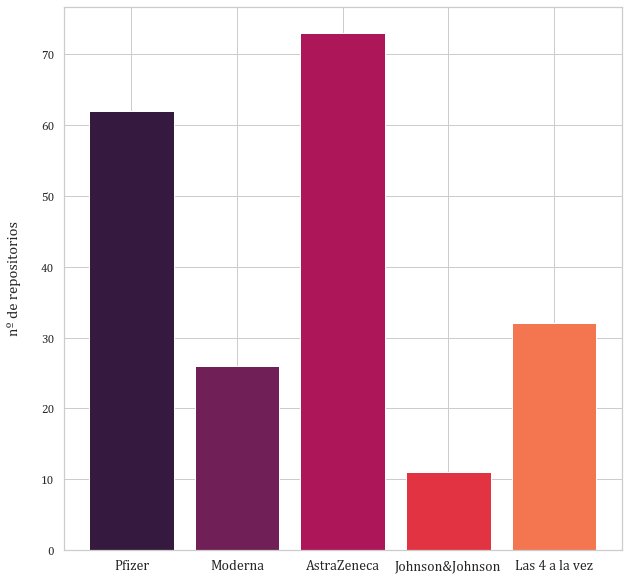

In [357]:
x = ["Pfizer", "Moderna", "AstraZeneca", "Johnson&Johnson", "Las 4 a la vez"]
y = [solo_pfizer.sum(), solo_moderna.sum(),
     solo_astrazeneca.sum(), solo_johnson.sum(), todas_vacunas.sum()]

plt.figure(figsize=(10,10))
plt.bar(x, y, color=color, align = 'center')
plt.ylabel('nº de repositorios', size=15, labelpad=20)

plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.show()

#### Fecha de creación

In [361]:
repos_relacionados_vacuna_created = repos_relacionados_vacuna.copy()

In [362]:
repos_relacionados_vacuna_created["created_at"] = pd.to_datetime(repos_relacionados_vacuna_created['created_at'])
repos_relacionados_vacuna_created = repos_relacionados_vacuna_created.set_index("created_at")
repos_relacionados_vacuna_created

id  \
created_at                             
2020-03-10 14:28:47+00:00  246323140   
2020-03-15 14:13:21+00:00  247479696   
2020-03-24 06:15:32+00:00  249628101   
2020-03-27 07:53:08+00:00  250473220   
2020-03-28 14:37:11+00:00  250817451   
...                              ...   
2021-04-29 16:40:55+00:00  362883749   
2021-07-22 04:23:52+00:00  388325100   
2020-03-22 17:19:29+00:00  249234144   
2020-04-03 12:26:22+00:00  252725505   
2021-06-14 11:23:35+00:00  376798191   

                                                           full_name  \
created_at                                                             
2020-03-10 14:28:47+00:00                  mponce0/covid19.analytics   
2020-03-15 14:13:21+00:00  DrozmotiX/ioBroker.coronavirus-statistics   
2020-03-24 06:15:32+00:00       datadesk/california-coronavirus-data   
2020-03-27 07:53:08+00:00                          kkm24132/COVID-19   
2020-03-28 14:37:11+00:00                 sipaque/enlacescoronavirus   
...                                                              ...   
2021-04-29 16:40:55+00:00               cdgiguere/COVID-19_Dashboard   
2021-07-22 04:23:52+00:00     mauforonda/vacunas_unidoscontraelcovid   
2020-03-22 17:19:29+00:00                 HarshdeepKahlon/hiring2020   
2020-04-03 12:26:22+00:00                             omic/jailbreak   
2021-06-14 11:23:35+00:00              trassmann/berlin-jj-impfcheck   

                                                                 description  \
created_at                                                                     
2020-03-10 14:28:47+00:00  R package to obtain and analyze live data from...   
2020-03-15 14:13:21+00:00  Adapter to show Global Corona Virus informatio...   
2020-03-24 06:15:32+00:00  The Los Angeles Times' independent tally of co...   
2020-03-27 07:53:08+00:00  Novel Coronavirus (COVID-19) related learning ...   
2020-03-28 14:37:11+00:00  Listado de enlaces de información general y es...   
...                                                                      ...   
2021-04-29 16:40:55+00:00                                                NaN   
2021-07-22 04:23:52+00:00  Registro estructurado del reporte diario de do...   
2020-03-22 17:19:29+00:00  Internship status of companies - COVID-19 outb...   
2020-04-03 12:26:22+00:00  We jailbreak your medical records and genomics...   
2021-06-14 11:23:35+00:00                                                NaN   

                           stargazers_count  \
created_at                                    
2020-03-10 14:28:47+00:00                28   
2020-03-15 14:13:21+00:00                17   
2020-03-24 06:15:32+00:00               197   
2020-03-27 07:53:08+00:00                 3   
2020-03-28 14:37:11+00:00                 0   
...                                     ...   
2021-04-29 16:40:55+00:00                 0   
2021-07-22 04:23:52+00:00                 0   
2020-03-22 17:19:29+00:00                 1   
2020-04-03 12:26:22+00:00                16   
2021-06-14 11:23:35+00:00                 0   

                                                               homepage  \
created_at                                                                
2020-03-10 14:28:47+00:00  https://mponce0.github.io/covid19.analytics/   
2020-03-15 14:13:21+00:00                                           NaN   
2020-03-24 06:15:32+00:00    https://www.latimes.com/coronavirustracker   
2020-03-27 07:53:08+00:00                                           NaN   
2020-03-28 14:37:11+00:00                                           NaN   
...                                                                 ...   
2021-04-29 16:40:55+00:00                                           NaN   
2021-07-22 04:23:52+00:00                                           NaN   
2020-03-22 17:19:29+00:00                                           NaN   
2020-04-03 12:26:22+00:00                                https://c19.ai   
2021-06-14 11:23:35+00:

In [363]:
repos_relacionados_vacuna_created.index = repos_relacionados_vacuna_created.index.strftime('%Y-%m')
repos_relacionados_vacuna_created

id                                  full_name  \
created_at                                                         
2020-03     246323140                  mponce0/covid19.analytics   
2020-03     247479696  DrozmotiX/ioBroker.coronavirus-statistics   
2020-03     249628101       datadesk/california-coronavirus-data   
2020-03     250473220                          kkm24132/COVID-19   
2020-03     250817451                 sipaque/enlacescoronavirus   
...               ...                                        ...   
2021-04     362883749               cdgiguere/COVID-19_Dashboard   
2021-07     388325100     mauforonda/vacunas_unidoscontraelcovid   
2020-03     249234144                 HarshdeepKahlon/hiring2020   
2020-04     252725505                             omic/jailbreak   
2021-06     376798191              trassmann/berlin-jj-impfcheck   

                                                  description  \
created_at                                                      
2020-03     R package to obtain and analyze live data from...   
2020-03     Adapter to show Global Corona Virus informatio...   
2020-03     The Los Angeles Times' independent tally of co...   
2020-03     Novel Coronavirus (COVID-19) related learning ...   
2020-03     Listado de enlaces de información general y es...   
...                                                       ...   
2021-04                                                   NaN   
2021-07     Registro estructurado del reporte diario de do...   
2020-03     Internship status of companies - COVID-19 outb...   
2020-04     We jailbreak your medical records and genomics...   
2021-06                                                   NaN   

            stargazers_count                                      homepage  \
created_at                                                                   
2020-03                   28  https://mponce0.github.io/covid19.analytics/   
2020-03                   17                                           NaN   
2020-03                  197    https://www.latimes.com/coronavirustracker   
2020-03                    3                                           NaN   
2020-03                    0                                           NaN   
...                      ...                                           ...   
2021-04                    0                                           NaN   
2021-07                    0                                           NaN   
2020-03                    1                                           NaN   
2020-04                   16                                https://c19.ai   
2021-06                    0                                           NaN   

                                                     html_url  \
created_at                                                      
2020-03          https://github.com/mponce0/covid19.analytics   
2020-03     https://github.com/DrozmotiX/ioBroker.coronavi...   
2020-03     https://github.com/datadesk/california-coronav...   
2020-03                  https://github.com/kkm24132/COVID-19   
2020-03         https://github.com/sipaque/enlacescoronavirus   
...                                                       ...   
2021-04       https://github.com/cdgiguere/COVID-19_Dashboard   
2021-07     https://github.com/mauforonda/vacunas_unidosco...   
2020-03         https://github.com/HarshdeepKahlon/hiring2020   
2020-04                     https://github.com/omic/jailbreak   
2021-06      https://github.com/trassmann/berlin-jj-impfcheck   

                    language             pushed_at            updated_at  \
created_at                                                                 
2020-03                    R  2021-08-10T17:02:52Z  2021-08-10T17:02:55Z   
2020-03           JavaScript  2021-08-12T11:59:35Z  2021-08-12T11:53:47Z   
2020-03     Jupyter Notebook  2021-08-14T00:45:26Z  2021-08-14T00:45:30Z   
2020-03                  NaN  2021-06-16T10:02:

In [364]:
repos_relacionados_vacuna_created_grouped = repos_relacionados_vacuna_created.groupby([repos_relacionados_vacuna_created.index]).size()
repos_relacionados_vacuna_created_grouped

created_at
2020-02     2
2020-03    21
2020-04     7
2020-05     5
2020-06     4
2020-07     3
2020-08     4
2020-09     6
2020-10     1
2020-11     7
2020-12    21
2021-01    26
2021-02    22
2021-03    33
2021-04    26
2021-05    75
2021-06    51
2021-07    14
dtype: int64

#### Fecha de actualización

In [365]:
repos_relacionados_vacuna_updated = repos_relacionados_vacuna.copy()

In [366]:
repos_relacionados_vacuna_updated["updated_at"] = pd.to_datetime(repos_relacionados_vacuna_updated['updated_at'])
repos_relacionados_vacuna_updated = repos_relacionados_vacuna_updated.set_index("updated_at")
repos_relacionados_vacuna_updated

id  \
updated_at                             
2021-08-10 17:02:55+00:00  246323140   
2021-08-12 11:53:47+00:00  247479696   
2021-08-14 00:45:30+00:00  249628101   
2021-06-16 10:02:30+00:00  250473220   
2021-08-10 07:23:01+00:00  250817451   
...                              ...   
2021-05-12 08:28:25+00:00  362883749   
2021-08-12 22:09:51+00:00  388325100   
2020-12-11 11:00:09+00:00  249234144   
2021-04-29 06:19:32+00:00  252725505   
2021-06-15 09:20:40+00:00  376798191   

                                                           full_name  \
updated_at                                                             
2021-08-10 17:02:55+00:00                  mponce0/covid19.analytics   
2021-08-12 11:53:47+00:00  DrozmotiX/ioBroker.coronavirus-statistics   
2021-08-14 00:45:30+00:00       datadesk/california-coronavirus-data   
2021-06-16 10:02:30+00:00                          kkm24132/COVID-19   
2021-08-10 07:23:01+00:00                 sipaque/enlacescoronavirus   
...                                                              ...   
2021-05-12 08:28:25+00:00               cdgiguere/COVID-19_Dashboard   
2021-08-12 22:09:51+00:00     mauforonda/vacunas_unidoscontraelcovid   
2020-12-11 11:00:09+00:00                 HarshdeepKahlon/hiring2020   
2021-04-29 06:19:32+00:00                             omic/jailbreak   
2021-06-15 09:20:40+00:00              trassmann/berlin-jj-impfcheck   

                                                                 description  \
updated_at                                                                     
2021-08-10 17:02:55+00:00  R package to obtain and analyze live data from...   
2021-08-12 11:53:47+00:00  Adapter to show Global Corona Virus informatio...   
2021-08-14 00:45:30+00:00  The Los Angeles Times' independent tally of co...   
2021-06-16 10:02:30+00:00  Novel Coronavirus (COVID-19) related learning ...   
2021-08-10 07:23:01+00:00  Listado de enlaces de información general y es...   
...                                                                      ...   
2021-05-12 08:28:25+00:00                                                NaN   
2021-08-12 22:09:51+00:00  Registro estructurado del reporte diario de do...   
2020-12-11 11:00:09+00:00  Internship status of companies - COVID-19 outb...   
2021-04-29 06:19:32+00:00  We jailbreak your medical records and genomics...   
2021-06-15 09:20:40+00:00                                                NaN   

                           stargazers_count  \
updated_at                                    
2021-08-10 17:02:55+00:00                28   
2021-08-12 11:53:47+00:00                17   
2021-08-14 00:45:30+00:00               197   
2021-06-16 10:02:30+00:00                 3   
2021-08-10 07:23:01+00:00                 0   
...                                     ...   
2021-05-12 08:28:25+00:00                 0   
2021-08-12 22:09:51+00:00                 0   
2020-12-11 11:00:09+00:00                 1   
2021-04-29 06:19:32+00:00                16   
2021-06-15 09:20:40+00:00                 0   

                                                               homepage  \
updated_at                                                                
2021-08-10 17:02:55+00:00  https://mponce0.github.io/covid19.analytics/   
2021-08-12 11:53:47+00:00                                           NaN   
2021-08-14 00:45:30+00:00    https://www.latimes.com/coronavirustracker   
2021-06-16 10:02:30+00:00                                           NaN   
2021-08-10 07:23:01+00:00                                           NaN   
...                                                                 ...   
2021-05-12 08:28:25+00:00                                           NaN   
2021-08-12 22:09:51+00:00                                           NaN   
2020-12-11 11:00:09+00:00                                           NaN   
2021-04-29 06:19:32+00:00                                https://c19.ai   
2021-06-15 09:20:40+00:

In [367]:
repos_relacionados_vacuna_updated.index = repos_relacionados_vacuna_updated.index.strftime('%Y-%m')
repos_relacionados_vacuna_updated

id                                  full_name  \
updated_at                                                         
2021-08     246323140                  mponce0/covid19.analytics   
2021-08     247479696  DrozmotiX/ioBroker.coronavirus-statistics   
2021-08     249628101       datadesk/california-coronavirus-data   
2021-06     250473220                          kkm24132/COVID-19   
2021-08     250817451                 sipaque/enlacescoronavirus   
...               ...                                        ...   
2021-05     362883749               cdgiguere/COVID-19_Dashboard   
2021-08     388325100     mauforonda/vacunas_unidoscontraelcovid   
2020-12     249234144                 HarshdeepKahlon/hiring2020   
2021-04     252725505                             omic/jailbreak   
2021-06     376798191              trassmann/berlin-jj-impfcheck   

                                                  description  \
updated_at                                                      
2021-08     R package to obtain and analyze live data from...   
2021-08     Adapter to show Global Corona Virus informatio...   
2021-08     The Los Angeles Times' independent tally of co...   
2021-06     Novel Coronavirus (COVID-19) related learning ...   
2021-08     Listado de enlaces de información general y es...   
...                                                       ...   
2021-05                                                   NaN   
2021-08     Registro estructurado del reporte diario de do...   
2020-12     Internship status of companies - COVID-19 outb...   
2021-04     We jailbreak your medical records and genomics...   
2021-06                                                   NaN   

            stargazers_count                                      homepage  \
updated_at                                                                   
2021-08                   28  https://mponce0.github.io/covid19.analytics/   
2021-08                   17                                           NaN   
2021-08                  197    https://www.latimes.com/coronavirustracker   
2021-06                    3                                           NaN   
2021-08                    0                                           NaN   
...                      ...                                           ...   
2021-05                    0                                           NaN   
2021-08                    0                                           NaN   
2020-12                    1                                           NaN   
2021-04                   16                                https://c19.ai   
2021-06                    0                                           NaN   

                                                     html_url  \
updated_at                                                      
2021-08          https://github.com/mponce0/covid19.analytics   
2021-08     https://github.com/DrozmotiX/ioBroker.coronavi...   
2021-08     https://github.com/datadesk/california-coronav...   
2021-06                  https://github.com/kkm24132/COVID-19   
2021-08         https://github.com/sipaque/enlacescoronavirus   
...                                                       ...   
2021-05       https://github.com/cdgiguere/COVID-19_Dashboard   
2021-08     https://github.com/mauforonda/vacunas_unidosco...   
2020-12         https://github.com/HarshdeepKahlon/hiring2020   
2021-04                     https://github.com/omic/jailbreak   
2021-06      https://github.com/trassmann/berlin-jj-impfcheck   

                    language            created_at             pushed_at  \
updated_at                                                                 
2021-08                    R  2020-03-10T14:28:47Z  2021-08-10T17:02:52Z   
2021-08           JavaScript  2020-03-15T14:13:21Z  2021-08-12T11:59:35Z   
2021-08     Jupyter Notebook  2020-03-24T06:15:32Z  2021-08-14T00:45:26Z   
2021-06                  NaN  2020-03-27T07:53:

In [368]:
repos_relacionados_vacuna_updated = repos_relacionados_vacuna_updated.groupby([repos_relacionados_vacuna_updated.index]).size()
repos_relacionados_vacuna_updated

updated_at
2020-02     1
2020-03     4
2020-04     1
2020-05     2
2020-06     1
2020-07     7
2020-09     1
2020-10     2
2020-11     3
2020-12    13
2021-01    12
2021-02    10
2021-03    30
2021-04    30
2021-05    46
2021-06    59
2021-07    54
2021-08    52
dtype: int64

In [369]:
df_vacuna_created_y_updated = pd.concat([repos_relacionados_vacuna_created_grouped, repos_relacionados_vacuna_updated], axis=1)

nombres = ['created', 'updated']
df_vacuna_created_y_updated.columns = nombres

df_vacuna_created_y_updated

created  updated
2020-02      2.0      1.0
2020-03     21.0      4.0
2020-04      7.0      1.0
2020-05      5.0      2.0
2020-06      4.0      1.0
2020-07      3.0      7.0
2020-08      4.0      NaN
2020-09      6.0      1.0
2020-10      1.0      2.0
2020-11      7.0      3.0
2020-12     21.0     13.0
2021-01     26.0     12.0
2021-02     22.0     10.0
2021-03     33.0     30.0
2021-04     26.0     30.0
2021-05     75.0     46.0
2021-06     51.0     59.0
2021-07     14.0     54.0
2021-08      NaN     52.0

In [370]:
fig = plt.figure(figsize=(20,10))

palette = [color[2], color[0]]

g = sns.lineplot(data = df_vacuna_created_y_updated.loc["2020-10":"2021-07"], palette=palette)

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 30000, 2500))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

In [797]:
show(df_solo_moderna)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [371]:
df_solo_pfizer = repos_relacionados_vacuna[solo_pfizer]
df_solo_pfizer_created = df_solo_pfizer.copy()
df_solo_pfizer_created["created_at"] = pd.to_datetime(df_solo_pfizer_created['created_at'])
df_solo_pfizer_created = df_solo_pfizer_created.set_index("created_at")
df_solo_pfizer_created.index = df_solo_pfizer_created.index.strftime('%Y-%m')
df_solo_pfizer_created_grouped = df_solo_pfizer_created.groupby([df_solo_pfizer_created.index]).size()

In [372]:
df_solo_moderna = repos_relacionados_vacuna[solo_moderna]
df_solo_moderna_created = df_solo_moderna.copy()
df_solo_moderna_created["created_at"] = pd.to_datetime(df_solo_moderna_created['created_at'])
df_solo_moderna_created = df_solo_moderna_created.set_index("created_at")
df_solo_moderna_created.index = df_solo_moderna_created.index.strftime('%Y-%m')
df_solo_moderna_created_grouped = df_solo_moderna_created.groupby([df_solo_moderna_created.index]).size()

In [373]:
df_solo_astrazeneca = repos_relacionados_vacuna[solo_astrazeneca]
df_solo_astrazeneca_created = df_solo_astrazeneca.copy()
df_solo_astrazeneca_created["created_at"] = pd.to_datetime(df_solo_astrazeneca_created['created_at'])
df_solo_astrazeneca_created = df_solo_astrazeneca_created.set_index("created_at")
df_solo_astrazeneca_created.index = df_solo_astrazeneca_created.index.strftime('%Y-%m')
df_solo_astrazeneca_created_grouped = df_solo_astrazeneca_created.groupby([df_solo_astrazeneca_created.index]).size()

In [374]:
df_solo_johnson = repos_relacionados_vacuna[solo_johnson]
df_solo_johnson_created = df_solo_johnson.copy()
df_solo_johnson_created["created_at"] = pd.to_datetime(df_solo_johnson_created['created_at'])
df_solo_johnson_created = df_solo_johnson_created.set_index("created_at")
df_solo_johnson_created.index = df_solo_johnson_created.index.strftime('%Y-%m')
df_solo_johnson_created_grouped = df_solo_johnson_created.groupby([df_solo_johnson_created.index]).size()

In [375]:
df_vacunas_individuales = pd.concat([df_solo_pfizer_created_grouped, df_solo_moderna_created_grouped,
                                    df_solo_astrazeneca_created_grouped, df_solo_johnson_created_grouped], axis=1)
nombres = ['Pfizer', 'Moderna', "AstraZeneca", "Johnson"]
df_vacunas_individuales.columns = nombres
df_vacunas_individuales = df_vacunas_individuales.sort_index()
df_vacunas_individuales

Pfizer  Moderna  AstraZeneca  Johnson
created_at                                       
2020-02        1.0      1.0          NaN      NaN
2020-03        1.0      5.0          NaN      2.0
2020-04        NaN      1.0          NaN      4.0
2020-05        2.0      1.0          NaN      NaN
2020-06        NaN      3.0          NaN      NaN
2020-07        1.0      1.0          NaN      1.0
2020-08        3.0      NaN          NaN      NaN
2020-09        NaN      1.0          NaN      NaN
2020-11        2.0      NaN          NaN      NaN
2020-12        9.0      NaN          1.0      NaN
2021-01        9.0      4.0          1.0      NaN
2021-02        7.0      NaN          3.0      NaN
2021-03        5.0      1.0          3.0      1.0
2021-04        5.0      3.0          5.0      1.0
2021-05        6.0      3.0         41.0      NaN
2021-06       10.0      1.0         17.0      1.0
2021-07        1.0      1.0          2.0      1.0

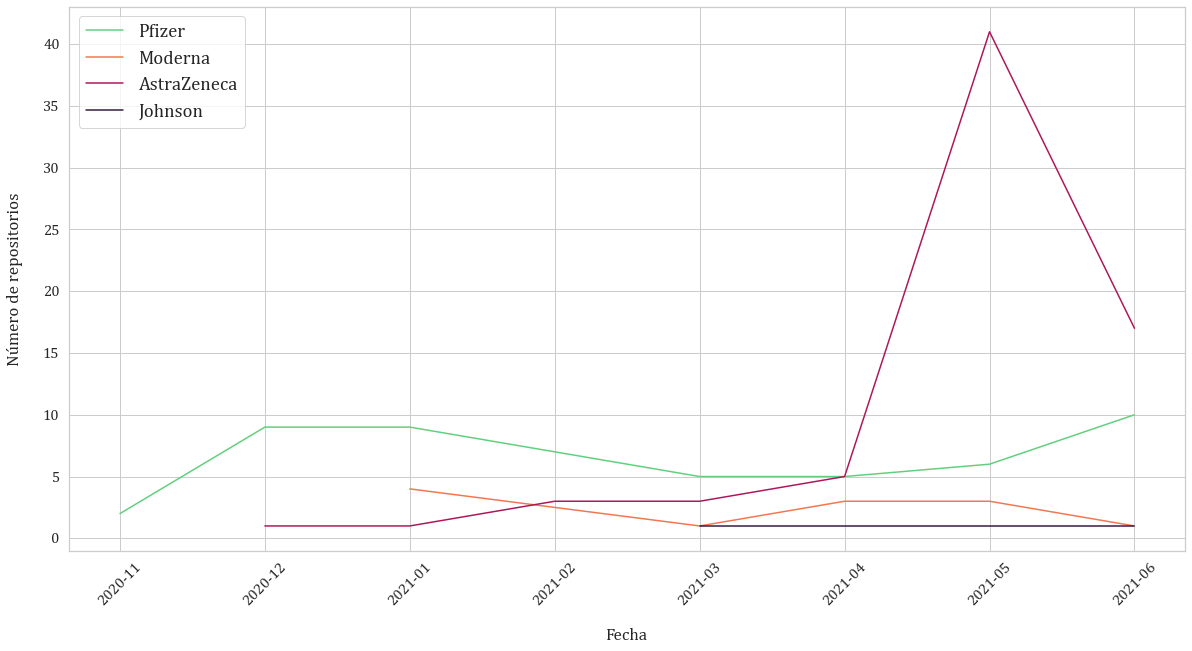

In [376]:
fig = plt.figure(figsize=(20,10))
# "#8b8833", "#f5d574", color[5], color[4], color[2], color[0]
palette = ["#63cf7e", color[4], color[2], color[0]]

g = sns.lineplot(data = df_vacunas_individuales.loc["2020-10":"2021-06"], palette=palette, dashes = False)

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 30000, 2500))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

------

## Cepas

Lectura de los repositorios:

In [228]:
df = pd.read_csv('dataset_repositorios_filtrados_final.csv')
df

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  has_projects  \
0                  27211           27211        17432  ...          True   
1                    642             642          221  ...          True   
2                    394             394          175  ...          True   
3                   1115            1115           87  ...          True   
4                   1208            1208          343  ...          True   
...                  ...             ...          ...  ...           ...   
178034                 1               1            0  ...          True   
178035                 2               2            0  ...          True   
178036                 1               1            0  ...          True   
178037                 0               0            0  ...          True   
178038                 0               0            0  ...          True   

        has_wiki                                           homepage  \
0           True  https://systems.jhu.edu/research/public-health...   
1   

Lectura del dataframe de ficheros READMEs:

In [229]:
df_readmes = pd.read_csv('readmes_TOTAL.csv')
df_readmes = df_readmes.drop(columns="full_name")
df_readmes

repo_id           login  \
0       238316428  CSSEGISandData   
1       235374822   midas-network   
2       239777191     RamiKrispin   
3       237129709   FoldingAtHome   
4       234936988      nextstrain   
...           ...             ...   
178065  269527538          ALT-F1   
178066  270034436   marvinIsSacul   
178067  269906994  jahnavi-prasad   
178068  270013759         Tackode   
178069  270006438         Tackode   

                                                   readme  
0       # COVID-19 Data Repository by the Center for S...  
1       \n\n# MIDAS 2019 Novel Coronavirus Repository\...  
2        README.md is generated from README.Rmd. Pleas...  
3       # Folding@home COVID-19 efforts\n\nThis reposi...  
4       [![GitHub release (latest by date)](https://im...  
...                                                   ...  
178065  # Concatenate weather data histories in CSV fo...  
178066  # mzansi_corona\n\nSouth Africa's Corona Virus...  
178067  ### FaceMaskDetector\n* Created by S. Jahnavi ...  
178068  # Tackode ![CI](https://github.com/Tackode/fro...  
178069  # Tackode Backend ![Build](https://github.com/...  

[178070 rows x 3 columns]

Unión de repositorios con el contenido de sus ficheros README:

In [230]:
repos_con_readmes = df.join(df_readmes.set_index('repo_id'), on='id')
repos_con_readmes

id                             name  \
0       238316428                         COVID-19   
1       235374822                         COVID-19   
2       239777191                      coronavirus   
3       237129709                      coronavirus   
4       234936988                             ncov   
...           ...                              ...   
178034  268856502               iot-contact-tracer   
178035  269479371                          jupyter   
178036  269527538  OpenWeatherMap-concat-histories   
178037  270013759                         frontend   
178038  270006438                          backend   

                                     full_name  \
0                      CSSEGISandData/COVID-19   
1                       midas-network/COVID-19   
2                      RamiKrispin/coronavirus   
3                    FoldingAtHome/coronavirus   
4                              nextstrain/ncov   
...                                        ...   
178034                 fwcd/iot-contact-tracer   
178035                           kclhi/jupyter   
178036  ALT-F1/OpenWeatherMap-concat-histories   
178037                        Tackode/frontend   
178038                         Tackode/backend   

                                              description  \
0       Novel Coronavirus (COVID-19) Cases, provided b...   
1                       2019 novel coronavirus repository   
2                                 The coronavirus dataset   
3                           Folding@home COVID-19 efforts   
4       Nextstrain build for novel coronavirus SARS-CoV-2   
...                                                   ...   
178034  Decentralized contact tracing system supportin...   
178035           :whale2: JupyterHub Docker configuration   
178036  Concatenate histories weather data collected b...   
178037                               Frontend for Tackode   
178038                                Backend for Tackode   

                                         contributors_url  archived  disabled  \
0       https://api.github.com/repos/CSSEGISandData/CO...     False     False   
1       https://api.github.com/repos/midas-network/COV...     False     False   
2       https://api.github.com/repos/RamiKrispin/coron...     False     False   
3       https://api.github.com/repos/FoldingAtHome/cor...     False     False   
4       https://api.github.com/repos/nextstrain/ncov/c...     False     False   
...                                                   ...       ...       ...   
178034  https://api.github.com/repos/fwcd/iot-contact-...     False     False   
178035  https://api.github.com/repos/kclhi/jupyter/con...     False     False   
178036  https://api.github.com/repos/ALT-F1/OpenWeathe...     False     False   
178037  https://api.github.com/repos/Tackode/frontend/...     False     False   
178038  https://api.github.com/repos/Tackode/backend/c...     False     False   

        stargazers_count  watchers_count  forks_count  ...  \
0                  27211           27211        17432  ...   
1                    642             642          221  ...   
2                    394             394          175  ...   
3                   1115            1115           87  ...   
4                   1208            1208          343  ...   
...                  ...             ...          ...  ...   
178034                 1               1            0  ...   
178035                 2               2            0  ...   
178036                 1               1            0  ...   
178037                 0               0            0  ...   
178038                 0               0            0  ...   

                                                 homepage  \
0       https://systems.jhu.edu/research/public-health...   
1                                                     NaN   
2              https://ramikrispin.github.io/coronavirus/   
3                               https://foldingathome.org   
4        

In [233]:
repos_con_readmes = repos_con_readmes[['id', 'full_name', 'description', 'stargazers_count', 'html_url', 'language',
       'created_at', 'pushed_at', 'updated_at', 'login', 'readme']]
repos_con_readmes = repos_con_readmes[repos_con_readmes.readme.notnull()]
repos_con_readmes

id                               full_name  \
0       238316428                 CSSEGISandData/COVID-19   
1       235374822                  midas-network/COVID-19   
2       239777191                 RamiKrispin/coronavirus   
3       237129709               FoldingAtHome/coronavirus   
4       234936988                         nextstrain/ncov   
...           ...                                     ...   
178034  268856502                 fwcd/iot-contact-tracer   
178035  269479371                           kclhi/jupyter   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories   
178037  270013759                        Tackode/frontend   
178038  270006438                         Tackode/backend   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
1                       2019 novel coronavirus repository               642   
2                                 The coronavirus dataset               394   
3                           Folding@home COVID-19 efforts              1115   
4       Nextstrain build for novel coronavirus SARS-CoV-2              1208   
...                                                   ...               ...   
178034  Decentralized contact tracing system supportin...                 1   
178035           :whale2: JupyterHub Docker configuration                 2   
178036  Concatenate histories weather data collected b...                 1   
178037                               Frontend for Tackode                 0   
178038                                Backend for Tackode                 0   

                                                 html_url language  \
0              https://github.com/CSSEGISandData/COVID-19      NaN   
1               https://github.com/midas-network/COVID-19      TeX   
2              https://github.com/RamiKrispin/coronavirus        R   
3            https://github.com/FoldingAtHome/coronavirus   Python   
4                      https://github.com/nextstrain/ncov   Python   
...                                                   ...      ...   
178034         https://github.com/fwcd/iot-contact-tracer     Dart   
178035                   https://github.com/kclhi/jupyter   Python   
178036  https://github.com/ALT-F1/OpenWeatherMap-conca...   Python   
178037                https://github.com/Tackode/frontend      Vue   
178038                 https://github.com/Tackode/backend     Rust   

                  created_at             pushed_at            updated_at  \
0       2020-02-04T22:03:53Z  2021-08-14T11:35:08Z  2021-08-14T11:56:01Z   
1       2020-01-21T15:27:23Z  2021-08-12T20:15:14Z  2021-08-12T20:15:21Z   
2       2020-02-11T14:08:06Z  2021-08-14T08:19:49Z  2021-08-14T08:19:52Z   
3       2020-01-30T03:12:19Z  2020-10-27T03:29:18Z  2021-08-09T21:17:36Z   
4       2020-01-19T17:23:17Z  2021-08-13T12:36:06Z  2021-08-13T12:36:10Z   
...                      ...                   ...                   ...   
178034  2020-06-02T16:46:15Z  2020-09-04T13:14:05Z  2020-09-04T15:03:54Z   
178035  2020-06-04T22:35:16Z  2021-06-11T18:23:39Z  2021-08-14T14:32:53Z   
178036  2020-06-05T04:04:46Z  2021-08-12T13:30:11Z  2020-06-08T12:44:27Z   
178037  2020-06-06T14:57:50Z  2021-08-12T04:05:02Z  2021-01-11T08:38:35Z   
178038  2020-06-06T14:30:13Z  2021-08-13T04:03:31Z  2021-05-26T08:44:01Z   

                 login                                             readme  
0       CSSEGISandData  # COVID-19 Data Repository by the Center for S...  
1        midas-network  \n\n# MIDAS 2019 Novel Coronavirus Repository\...  
2          RamiKrispin   README.md is generated from README.Rmd. Pleas...  
3        FoldingAtHome  # Folding@home COVID-19 efforts\n\nThis reposi...  
4           nextstrain  [![GitHub release (latest by date)](https://im...  
...                ...                                                ...  
178034            fwcd  # IoT Contact Tracer\nA

Lectura del dataframe de usuarios, a fin de sacar las localizaciones:

In [234]:
na_values = ['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
                 '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', '']

usuarios_con_paises = pd.read_csv("usuarios_totales_con_paises.csv", na_values=na_values, keep_default_na=False)
usuarios_con_paises = usuarios_con_paises[["repo_id", "country_name", "type"]]
usuarios_con_paises

repo_id   country_name          type
0       238316428  United States          User
1       235374822            NaN  Organization
2       239777191  United States          User
3       237129709  United States  Organization
4       234936988            NaN  Organization
...           ...            ...           ...
177817  269527538        Belgium  Organization
177818  270034436   South Africa          User
177819  269906994          India          User
177820  270013759  United States  Organization
177821  270006438  United States  Organization

[177822 rows x 3 columns]

In [235]:
repos_con_readmes_y_paises = repos_con_readmes.join(usuarios_con_paises.set_index('repo_id'), on='id')
repos_con_readmes_y_paises

id                               full_name  \
0       238316428                 CSSEGISandData/COVID-19   
1       235374822                  midas-network/COVID-19   
2       239777191                 RamiKrispin/coronavirus   
3       237129709               FoldingAtHome/coronavirus   
4       234936988                         nextstrain/ncov   
...           ...                                     ...   
178034  268856502                 fwcd/iot-contact-tracer   
178035  269479371                           kclhi/jupyter   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories   
178037  270013759                        Tackode/frontend   
178038  270006438                         Tackode/backend   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
1                       2019 novel coronavirus repository               642   
2                                 The coronavirus dataset               394   
3                           Folding@home COVID-19 efforts              1115   
4       Nextstrain build for novel coronavirus SARS-CoV-2              1208   
...                                                   ...               ...   
178034  Decentralized contact tracing system supportin...                 1   
178035           :whale2: JupyterHub Docker configuration                 2   
178036  Concatenate histories weather data collected b...                 1   
178037                               Frontend for Tackode                 0   
178038                                Backend for Tackode                 0   

                                                 html_url language  \
0              https://github.com/CSSEGISandData/COVID-19      NaN   
1               https://github.com/midas-network/COVID-19      TeX   
2              https://github.com/RamiKrispin/coronavirus        R   
3            https://github.com/FoldingAtHome/coronavirus   Python   
4                      https://github.com/nextstrain/ncov   Python   
...                                                   ...      ...   
178034         https://github.com/fwcd/iot-contact-tracer     Dart   
178035                   https://github.com/kclhi/jupyter   Python   
178036  https://github.com/ALT-F1/OpenWeatherMap-conca...   Python   
178037                https://github.com/Tackode/frontend      Vue   
178038                 https://github.com/Tackode/backend     Rust   

                  created_at             pushed_at            updated_at  \
0       2020-02-04T22:03:53Z  2021-08-14T11:35:08Z  2021-08-14T11:56:01Z   
1       2020-01-21T15:27:23Z  2021-08-12T20:15:14Z  2021-08-12T20:15:21Z   
2       2020-02-11T14:08:06Z  2021-08-14T08:19:49Z  2021-08-14T08:19:52Z   
3       2020-01-30T03:12:19Z  2020-10-27T03:29:18Z  2021-08-09T21:17:36Z   
4       2020-01-19T17:23:17Z  2021-08-13T12:36:06Z  2021-08-13T12:36:10Z   
...                      ...                   ...                   ...   
178034  2020-06-02T16:46:15Z  2020-09-04T13:14:05Z  2020-09-04T15:03:54Z   
178035  2020-06-04T22:35:16Z  2021-06-11T18:23:39Z  2021-08-14T14:32:53Z   
178036  2020-06-05T04:04:46Z  2021-08-12T13:30:11Z  2020-06-08T12:44:27Z   
178037  2020-06-06T14:57:50Z  2021-08-12T04:05:02Z  2021-01-11T08:38:35Z   
178038  2020-06-06T14:30:13Z  2021-08-13T04:03:31Z  2021-05-26T08:44:01Z   

                 login                                             readme  \
0       CSSEGISandData  # COVID-19 Data Repository by the Center for S...   
1        midas-network  \n\n# MIDAS 2019 Novel Coronavirus Repository\...   
2          RamiKrispin   README.md is generated from README.Rmd. Pleas...   
3        FoldingAtHome  # Folding@home COVID-19 efforts\n\nThis reposi...   
4           nextstrain  [![GitHub release (latest by date)](https://im...   
...                ...                                                ...   
178034            fwcd  # IoT Contact Tr

Descartamos los que tienen países nulos:

In [236]:
repos_con_readmes_y_paises = repos_con_readmes_y_paises[repos_con_readmes_y_paises.country_name.notnull()]
repos_con_readmes_y_paises

id                               full_name  \
0       238316428                 CSSEGISandData/COVID-19   
2       239777191                 RamiKrispin/coronavirus   
3       237129709               FoldingAtHome/coronavirus   
5       238601449        ExpDev07/coronavirus-tracker-api   
6       237817105                   JohnCoene/coronavirus   
...           ...                                     ...   
178034  268856502                 fwcd/iot-contact-tracer   
178035  269479371                           kclhi/jupyter   
178036  269527538  ALT-F1/OpenWeatherMap-concat-histories   
178037  270013759                        Tackode/frontend   
178038  270006438                         Tackode/backend   

                                              description  stargazers_count  \
0       Novel Coronavirus (COVID-19) Cases, provided b...             27211   
2                                 The coronavirus dataset               394   
3                           Folding@home COVID-19 efforts              1115   
5       🦠 A simple and fast (< 200ms) API for tracking...              1555   
6                  🦠 Novel Coronavirus (COVID-19) Tracker               315   
...                                                   ...               ...   
178034  Decentralized contact tracing system supportin...                 1   
178035           :whale2: JupyterHub Docker configuration                 2   
178036  Concatenate histories weather data collected b...                 1   
178037                               Frontend for Tackode                 0   
178038                                Backend for Tackode                 0   

                                                 html_url language  \
0              https://github.com/CSSEGISandData/COVID-19      NaN   
2              https://github.com/RamiKrispin/coronavirus        R   
3            https://github.com/FoldingAtHome/coronavirus   Python   
5       https://github.com/ExpDev07/coronavirus-tracke...   Python   
6                https://github.com/JohnCoene/coronavirus        R   
...                                                   ...      ...   
178034         https://github.com/fwcd/iot-contact-tracer     Dart   
178035                   https://github.com/kclhi/jupyter   Python   
178036  https://github.com/ALT-F1/OpenWeatherMap-conca...   Python   
178037                https://github.com/Tackode/frontend      Vue   
178038                 https://github.com/Tackode/backend     Rust   

                  created_at             pushed_at            updated_at  \
0       2020-02-04T22:03:53Z  2021-08-14T11:35:08Z  2021-08-14T11:56:01Z   
2       2020-02-11T14:08:06Z  2021-08-14T08:19:49Z  2021-08-14T08:19:52Z   
3       2020-01-30T03:12:19Z  2020-10-27T03:29:18Z  2021-08-09T21:17:36Z   
5       2020-02-06T03:42:14Z  2021-08-14T08:00:48Z  2021-08-13T03:53:22Z   
6       2020-02-02T18:34:42Z  2020-07-13T14:32:23Z  2021-06-03T16:03:02Z   
...                      ...                   ...                   ...   
178034  2020-06-02T16:46:15Z  2020-09-04T13:14:05Z  2020-09-04T15:03:54Z   
178035  2020-06-04T22:35:16Z  2021-06-11T18:23:39Z  2021-08-14T14:32:53Z   
178036  2020-06-05T04:04:46Z  2021-08-12T13:30:11Z  2020-06-08T12:44:27Z   
178037  2020-06-06T14:57:50Z  2021-08-12T04:05:02Z  2021-01-11T08:38:35Z   
178038  2020-06-06T14:30:13Z  2021-08-13T04:03:31Z  2021-05-26T08:44:01Z   

                 login                                             readme  \
0       CSSEGISandData  # COVID-19 Data Repository by the Center for S...   
2          RamiKrispin   README.md is generated from README.Rmd. Pleas...   
3        FoldingAtHome  # Folding@home COVID-19 efforts\n\nThis reposi...   
5             ExpDev07  \n    Coronavirus Tracker API\n\n\nProvides up...   
6            JohnCoene  \n\n badges: start \n[![CircleCI build status]...   
...                ...                                                ...   
178034            fwcd  # IoT Contact Tr

In [268]:
import re

related_alpha = ["alpha variant", "variante alpha", re.escape("202012/01"), "B\.1\.1\.7", re.escape("20B/501Y.V1"), re.escape("20I/501Y.V1"), "501Y\.V1"]
related_beta = ["beta variant", "variante beta", "501\.V2", re.escape("20C/501Y.V2"), re.escape("20H/501Y.V2"), "501Y\.V2", "B\.1\.351", "B\.1\.351\.2", "B\.1\.351\.3"]
related_gamma = ["gamma variant", "variante gamma", re.escape("20J/501Y.V3"), "501Y\.V3", "P\.1", "P\.1\.1", "P\.1\.2"]
related_delta = ["delta variant", "variante delta", "B\.1\.617\.2", re.escape("G/452R.V3"), "21A", re.escape("21A/S:478K"), "AY\.1", "AY\.2"]

In [269]:
pattern_alpha = "(?i)" + '|'.join(related_alpha)
pattern_beta = "(?i)" + '|'.join(related_beta)
pattern_gamma = "(?i)" + '|'.join(related_gamma)
pattern_delta = "(?i)" + '|'.join(related_delta)

In [270]:
repos_con_readmes_y_paises_copia = repos_con_readmes_y_paises.copy()

In [274]:
import re
def get_related_variant_type(df, pattern):
    readme = df["readme"]
    regex = re.compile(pattern)
    regex_search = regex.search(readme)
    if regex_search:
        return True
    else:
        return False

In [275]:
repos_con_readmes_y_paises_copia["alpha"] = repos_con_readmes_y_paises_copia.apply(get_related_variant_type, args=(pattern_alpha,), axis = 1)
repos_con_readmes_y_paises_copia["beta"] = repos_con_readmes_y_paises_copia.apply(get_related_variant_type, args=(pattern_beta,), axis = 1)
repos_con_readmes_y_paises_copia["gamma"] = repos_con_readmes_y_paises_copia.apply(get_related_variant_type, args=(pattern_gamma,), axis = 1)
repos_con_readmes_y_paises_copia["delta"] = repos_con_readmes_y_paises_copia.apply(get_related_variant_type, args=(pattern_delta,), axis = 1)

In [276]:
repos_con_readmes_alpha = repos_con_readmes_y_paises_copia[repos_con_readmes_y_paises_copia.alpha == True]
repos_con_readmes_beta = repos_con_readmes_y_paises_copia[repos_con_readmes_y_paises_copia.beta == True]
repos_con_readmes_gamma = repos_con_readmes_y_paises_copia[repos_con_readmes_y_paises_copia.gamma == True]
repos_con_readmes_delta = repos_con_readmes_y_paises_copia[repos_con_readmes_y_paises_copia.delta == True]

In [277]:
repos_relacionados_cepas = repos_con_readmes_alpha.append(repos_con_readmes_beta)
repos_relacionados_cepas = repos_relacionados_cepas.append(repos_con_readmes_gamma)
repos_relacionados_cepas = repos_relacionados_cepas.append(repos_con_readmes_delta)
repos_relacionados_cepas

id                                          full_name  \
8615    344203354                            USATODAY/covid-variants   
10887   245074310                                davetang/sars_cov_2   
58107   308982420                        mattschlosser/alberta-covid   
75314   325133847             DasLab/superfolder-covid-mrna-vaccines   
80354   330145657  centre-for-humanities-computing/hope-covid-mut...   
...           ...                                                ...   
154560  248076779                      LeoYiChen/CoVID-19-background   
157983  270509391                              comster/covid19_stats   
163683  249824986                  chetannitk/chetanknmiet-gmail.com   
167310  333726540                             lor-enz/pi-info-epaper   
169280  355988562             shubhamRaje98/Disease_Diagnosis_System   

                                              description  stargazers_count  \
8615    DEFUNCT     Coronavirus / COVID-19 variant dat...                 6   
10887               Bioinformatics analysis of SARS-CoV-2                 7   
58107   Alberta Covid Data by Date/Location/Municipali...                 0   
75314   SuperFolder COVID mRNA vaccines, stabilized fo...                50   
80354   Part of the HOPE project, analysis of discours...                 0   
...                                                   ...               ...   
154560                    CoVID-19 Background Information                 0   
157983                                                NaN                 0   
163683                                           COVID-19                 0   
167310  Run this on a pi zero with a waveshare 3.7" e-...                 2   
169280  This project aims to build a handy software, t...                 1   

                                                 html_url          language  \
8615           https://github.com/USATODAY/covid-variants               NaN   
10887              https://github.com/davetang/sars_cov_2              HTML   
58107      https://github.com/mattschlosser/alberta-covid        JavaScript   
75314   https://github.com/DasLab/superfolder-covid-mr...            Python   
80354   https://github.com/centre-for-humanities-compu...  Jupyter Notebook   
...                                                   ...               ...   
154560   https://github.com/LeoYiChen/CoVID-19-background               NaN   
157983           https://github.com/comster/covid19_stats        JavaScript   
163683  https://github.com/chetannitk/chetanknmiet-gma...  Jupyter Notebook   
167310          https://github.com/lor-enz/pi-info-epaper            Python   
169280  https://github.com/shubhamRaje98/Disease_Diagn...            Python   

                  created_at             pushed_at            updated_at  \
8615    2021-03-03T17:11:55Z  2021-04-19T12:21:14Z  2021-04-19T12:21:17Z   
10887   2020-03-05T05:09:50Z  2021-07-22T09:27:10Z  2021-08-05T02:32:32Z   
58107   2020-10-31T22:25:56Z  2021-08-13T21:36:46Z  2021-08-13T21:36:50Z   
75314   2020-12-28T22:53:06Z  2021-08-08T00:48:24Z  2021-08-11T12:39:52Z   
80354   2021-01-16T11:19:07Z  2021-02-21T14:05:42Z  2021-02-21T14:05:45Z   
...                      ...                   ...                   ...   
154560  2020-03-17T21:29:28Z  2020-03-17T21:35:38Z  2020-03-17T21:35:40Z   
157983  2020-06-08T03:08:03Z  2021-08-12T22:42:10Z  2021-04-18T22:31:03Z   
163683  2020-03-24T21:46:01Z  2020-03-24T21:52:09Z  2020-03-24T21:52:11Z   
167310  2021-01-28T10:40:20Z  2021-06-26T09:22:30Z  2021-06-26T09:22:32Z   
169280  2021-04-08T17:03:50Z  2021-05-13T17:51:59Z  2021-05-13T17:52:01Z   

                                  login  \
8615                           USATODAY   
10887                          davetang   
58107                     mattschlosser   
75314                            DasLab   
80354   centre-for-humanities-computing   
...                                 ...   
154560                        LeoYiChe

In [278]:
repos_relacionados_cepas.duplicated(subset=['id']).sum()

19

In [279]:
repos_relacionados_cepas = repos_relacionados_cepas[~repos_relacionados_cepas.duplicated(subset=['id'])]
repos_relacionados_cepas

id                                          full_name  \
8615    344203354                            USATODAY/covid-variants   
10887   245074310                                davetang/sars_cov_2   
58107   308982420                        mattschlosser/alberta-covid   
75314   325133847             DasLab/superfolder-covid-mrna-vaccines   
80354   330145657  centre-for-humanities-computing/hope-covid-mut...   
...           ...                                                ...   
154560  248076779                      LeoYiChen/CoVID-19-background   
157983  270509391                              comster/covid19_stats   
163683  249824986                  chetannitk/chetanknmiet-gmail.com   
167310  333726540                             lor-enz/pi-info-epaper   
169280  355988562             shubhamRaje98/Disease_Diagnosis_System   

                                              description  stargazers_count  \
8615    DEFUNCT     Coronavirus / COVID-19 variant dat...                 6   
10887               Bioinformatics analysis of SARS-CoV-2                 7   
58107   Alberta Covid Data by Date/Location/Municipali...                 0   
75314   SuperFolder COVID mRNA vaccines, stabilized fo...                50   
80354   Part of the HOPE project, analysis of discours...                 0   
...                                                   ...               ...   
154560                    CoVID-19 Background Information                 0   
157983                                                NaN                 0   
163683                                           COVID-19                 0   
167310  Run this on a pi zero with a waveshare 3.7" e-...                 2   
169280  This project aims to build a handy software, t...                 1   

                                                 html_url          language  \
8615           https://github.com/USATODAY/covid-variants               NaN   
10887              https://github.com/davetang/sars_cov_2              HTML   
58107      https://github.com/mattschlosser/alberta-covid        JavaScript   
75314   https://github.com/DasLab/superfolder-covid-mr...            Python   
80354   https://github.com/centre-for-humanities-compu...  Jupyter Notebook   
...                                                   ...               ...   
154560   https://github.com/LeoYiChen/CoVID-19-background               NaN   
157983           https://github.com/comster/covid19_stats        JavaScript   
163683  https://github.com/chetannitk/chetanknmiet-gma...  Jupyter Notebook   
167310          https://github.com/lor-enz/pi-info-epaper            Python   
169280  https://github.com/shubhamRaje98/Disease_Diagn...            Python   

                  created_at             pushed_at            updated_at  \
8615    2021-03-03T17:11:55Z  2021-04-19T12:21:14Z  2021-04-19T12:21:17Z   
10887   2020-03-05T05:09:50Z  2021-07-22T09:27:10Z  2021-08-05T02:32:32Z   
58107   2020-10-31T22:25:56Z  2021-08-13T21:36:46Z  2021-08-13T21:36:50Z   
75314   2020-12-28T22:53:06Z  2021-08-08T00:48:24Z  2021-08-11T12:39:52Z   
80354   2021-01-16T11:19:07Z  2021-02-21T14:05:42Z  2021-02-21T14:05:45Z   
...                      ...                   ...                   ...   
154560  2020-03-17T21:29:28Z  2020-03-17T21:35:38Z  2020-03-17T21:35:40Z   
157983  2020-06-08T03:08:03Z  2021-08-12T22:42:10Z  2021-04-18T22:31:03Z   
163683  2020-03-24T21:46:01Z  2020-03-24T21:52:09Z  2020-03-24T21:52:11Z   
167310  2021-01-28T10:40:20Z  2021-06-26T09:22:30Z  2021-06-26T09:22:32Z   
169280  2021-04-08T17:03:50Z  2021-05-13T17:51:59Z  2021-05-13T17:52:01Z   

                                  login  \
8615                           USATODAY   
10887                          davetang   
58107                     mattschlosser   
75314                            DasLab   
80354   centre-for-humanities-computing   
...                                 ...   
154560                        LeoYiChe

In [245]:
repos_relacionados_cepas.alpha.sum() + repos_relacionados_cepas.beta.sum() + repos_relacionados_cepas.gamma.sum() + repos_relacionados_cepas.delta.sum()

74

In [255]:
show(repos_relacionados_cepas)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


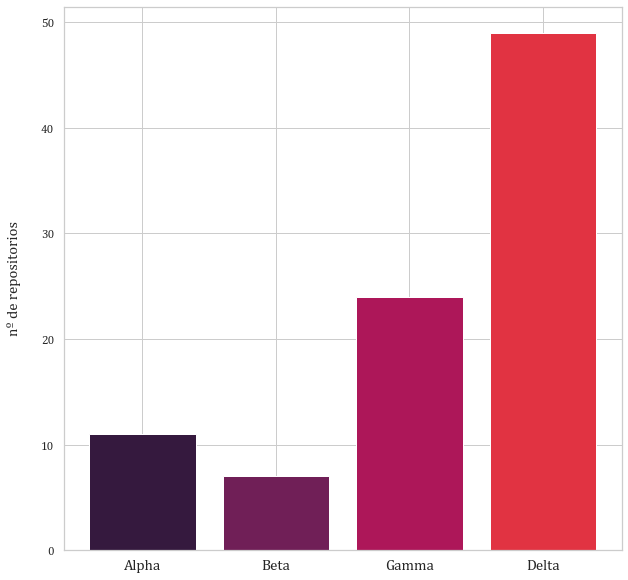

In [280]:
x = ["Alpha", "Beta", "Gamma", "Delta"]
y = [repos_con_readmes_y_paises_copia.alpha.sum(), repos_con_readmes_y_paises_copia.beta.sum(),
     repos_con_readmes_y_paises_copia.gamma.sum(), repos_con_readmes_y_paises_copia.delta.sum()]

plt.figure(figsize=(10,10))
plt.bar(x, y, color=color, align = 'center')
plt.ylabel('nº de repositorios', size=15, labelpad=20)

plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.show()

In [219]:
show(repos_relacionados_cepas)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [281]:
solo_alpha = (repos_relacionados_cepas.alpha == True) & (repos_relacionados_cepas.beta == False) & (repos_relacionados_cepas.gamma == False) & (repos_relacionados_cepas.delta == False)
solo_beta = (repos_relacionados_cepas.alpha == False) & (repos_relacionados_cepas.beta == True) & (repos_relacionados_cepas.gamma == False) & (repos_relacionados_cepas.delta == False)
solo_gamma = (repos_relacionados_cepas.alpha == False) & (repos_relacionados_cepas.beta == False) & (repos_relacionados_cepas.gamma == True) & (repos_relacionados_cepas.delta == False)
solo_delta = (repos_relacionados_cepas.alpha == False) & (repos_relacionados_cepas.beta == False) & (repos_relacionados_cepas.gamma == False) & (repos_relacionados_cepas.delta == True)

todas_cepas = (repos_relacionados_cepas.alpha == True) & (repos_relacionados_cepas.beta == True) & (repos_relacionados_cepas.gamma == True) & (repos_relacionados_cepas.delta == True)

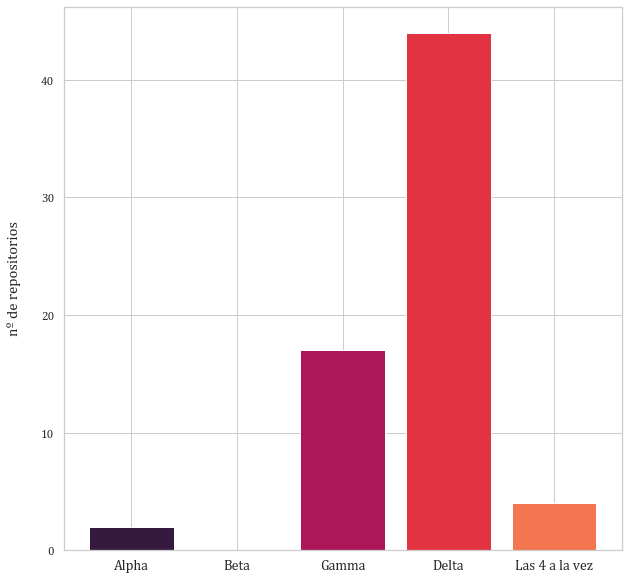

In [282]:
x = ["Alpha", "Beta", "Gamma", "Delta", "Las 4 a la vez"]
y = [solo_alpha.sum(), solo_beta.sum(),
     solo_gamma.sum(), solo_delta.sum(), todas_cepas.sum()]

plt.figure(figsize=(10,10))
plt.bar(x, y, color=color, align = 'center')
plt.ylabel('nº de repositorios', size=15, labelpad=20)

plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.show()

### Fechas de creación/actualización

**Fecha de creación**

In [283]:
repos_relacionados_cepas_created = repos_relacionados_cepas.copy()

repos_relacionados_cepas_created["created_at"] = pd.to_datetime(repos_relacionados_cepas_created['created_at'])
repos_relacionados_cepas_created = repos_relacionados_cepas_created.set_index("created_at")
repos_relacionados_cepas_created

id  \
created_at                             
2021-03-03 17:11:55+00:00  344203354   
2020-03-05 05:09:50+00:00  245074310   
2020-10-31 22:25:56+00:00  308982420   
2020-12-28 22:53:06+00:00  325133847   
2021-01-16 11:19:07+00:00  330145657   
...                              ...   
2020-03-17 21:29:28+00:00  248076779   
2020-06-08 03:08:03+00:00  270509391   
2020-03-24 21:46:01+00:00  249824986   
2021-01-28 10:40:20+00:00  333726540   
2021-04-08 17:03:50+00:00  355988562   

                                                                   full_name  \
created_at                                                                     
2021-03-03 17:11:55+00:00                            USATODAY/covid-variants   
2020-03-05 05:09:50+00:00                                davetang/sars_cov_2   
2020-10-31 22:25:56+00:00                        mattschlosser/alberta-covid   
2020-12-28 22:53:06+00:00             DasLab/superfolder-covid-mrna-vaccines   
2021-01-16 11:19:07+00:00  centre-for-humanities-computing/hope-covid-mut...   
...                                                                      ...   
2020-03-17 21:29:28+00:00                      LeoYiChen/CoVID-19-background   
2020-06-08 03:08:03+00:00                              comster/covid19_stats   
2020-03-24 21:46:01+00:00                  chetannitk/chetanknmiet-gmail.com   
2021-01-28 10:40:20+00:00                             lor-enz/pi-info-epaper   
2021-04-08 17:03:50+00:00             shubhamRaje98/Disease_Diagnosis_System   

                                                                 description  \
created_at                                                                     
2021-03-03 17:11:55+00:00  DEFUNCT     Coronavirus / COVID-19 variant dat...   
2020-03-05 05:09:50+00:00              Bioinformatics analysis of SARS-CoV-2   
2020-10-31 22:25:56+00:00  Alberta Covid Data by Date/Location/Municipali...   
2020-12-28 22:53:06+00:00  SuperFolder COVID mRNA vaccines, stabilized fo...   
2021-01-16 11:19:07+00:00  Part of the HOPE project, analysis of discours...   
...                                                                      ...   
2020-03-17 21:29:28+00:00                    CoVID-19 Background Information   
2020-06-08 03:08:03+00:00                                                NaN   
2020-03-24 21:46:01+00:00                                           COVID-19   
2021-01-28 10:40:20+00:00  Run this on a pi zero with a waveshare 3.7" e-...   
2021-04-08 17:03:50+00:00  This project aims to build a handy software, t...   

                           stargazers_count  \
created_at                                    
2021-03-03 17:11:55+00:00                 6   
2020-03-05 05:09:50+00:00                 7   
2020-10-31 22:25:56+00:00                 0   
2020-12-28 22:53:06+00:00                50   
2021-01-16 11:19:07+00:00                 0   
...                                     ...   
2020-03-17 21:29:28+00:00                 0   
2020-06-08 03:08:03+00:00                 0   
2020-03-24 21:46:01+00:00                 0   
2021-01-28 10:40:20+00:00                 2   
2021-04-08 17:03:50+00:00                 1   

                                                                    html_url  \
created_at                                                                     
2021-03-03 17:11:55+00:00         https://github.com/USATODAY/covid-variants   
2020-03-05 05:09:50+00:00             https://github.com/davetang/sars_cov_2   
2020-10-31 22:25:56+00:00     https://github.com/mattschlosser/alberta-covid   
2020-12-28 22:53:06+00:00  https://github.com/DasLab/superfolder-covid-mr...   
2021-01-16 11:19:07+00:00  https://github.com/centre-for-humanities-compu...   
...                                                                      ...   
2020-03-17 21:29:28+00:00   https://github.com/LeoYiChen/CoVID-19-background   
2020-06-08 03:08:03+00:00           https://github.com/comster/covid19_stats   
2020-03-24 21:46:01

In [284]:
repos_relacionados_cepas_created.index = repos_relacionados_cepas_created.index.strftime('%Y-%m')
repos_relacionados_cepas_created

id                                          full_name  \
created_at                                                                 
2021-03     344203354                            USATODAY/covid-variants   
2020-03     245074310                                davetang/sars_cov_2   
2020-10     308982420                        mattschlosser/alberta-covid   
2020-12     325133847             DasLab/superfolder-covid-mrna-vaccines   
2021-01     330145657  centre-for-humanities-computing/hope-covid-mut...   
...               ...                                                ...   
2020-03     248076779                      LeoYiChen/CoVID-19-background   
2020-06     270509391                              comster/covid19_stats   
2020-03     249824986                  chetannitk/chetanknmiet-gmail.com   
2021-01     333726540                             lor-enz/pi-info-epaper   
2021-04     355988562             shubhamRaje98/Disease_Diagnosis_System   

                                                  description  \
created_at                                                      
2021-03     DEFUNCT     Coronavirus / COVID-19 variant dat...   
2020-03                 Bioinformatics analysis of SARS-CoV-2   
2020-10     Alberta Covid Data by Date/Location/Municipali...   
2020-12     SuperFolder COVID mRNA vaccines, stabilized fo...   
2021-01     Part of the HOPE project, analysis of discours...   
...                                                       ...   
2020-03                       CoVID-19 Background Information   
2020-06                                                   NaN   
2020-03                                              COVID-19   
2021-01     Run this on a pi zero with a waveshare 3.7" e-...   
2021-04     This project aims to build a handy software, t...   

            stargazers_count  \
created_at                     
2021-03                    6   
2020-03                    7   
2020-10                    0   
2020-12                   50   
2021-01                    0   
...                      ...   
2020-03                    0   
2020-06                    0   
2020-03                    0   
2021-01                    2   
2021-04                    1   

                                                     html_url  \
created_at                                                      
2021-03            https://github.com/USATODAY/covid-variants   
2020-03                https://github.com/davetang/sars_cov_2   
2020-10        https://github.com/mattschlosser/alberta-covid   
2020-12     https://github.com/DasLab/superfolder-covid-mr...   
2021-01     https://github.com/centre-for-humanities-compu...   
...                                                       ...   
2020-03      https://github.com/LeoYiChen/CoVID-19-background   
2020-06              https://github.com/comster/covid19_stats   
2020-03     https://github.com/chetannitk/chetanknmiet-gma...   
2021-01             https://github.com/lor-enz/pi-info-epaper   
2021-04     https://github.com/shubhamRaje98/Disease_Diagn...   

                    language             pushed_at            updated_at  \
created_at                                                                 
2021-03                  NaN  2021-04-19T12:21:14Z  2021-04-19T12:21:17Z   
2020-03                 HTML  2021-07-22T09:27:10Z  2021-08-05T02:32:32Z   
2020-10           JavaScript  2021-08-13T21:36:46Z  2021-08-13T21:36:50Z   
2020-12               Python  2021-08-08T00:48:24Z  2021-08-11T12:39:52Z   
2021-01     Jupyter Notebook  2021-02-21T14:05:42Z  2021-02-21T14:05:45Z   
...                      ...                   ...                   ...   
2020-03                  NaN  2020-03-17T21:35:38Z  2020-03-17T21:35:40Z   
2020-06           JavaScript  2021-08-12T22:42:10Z  2021-04-18T22:31:03Z   
2020-03     Jupyter Notebook  2020-03-24T21:52:09Z  2020-03-24T21:52:11Z   
2021-01               Python  2021-06-26T09:22:30Z  2021-06-26T09:22:32Z   
2021-04  

In [285]:
repos_relacionados_cepas_created_grouped = repos_relacionados_cepas_created.groupby([repos_relacionados_cepas_created.index]).size()
repos_relacionados_cepas_created_grouped

created_at
2020-03    11
2020-04     9
2020-05     5
2020-06     1
2020-07     2
2020-08     4
2020-10     3
2020-11     1
2020-12     5
2021-01     6
2021-02     2
2021-03     5
2021-04     3
2021-05     5
2021-06     6
2021-07     4
dtype: int64

**Fecha de actualización**

In [286]:
repos_relacionados_cepas_updated = repos_relacionados_cepas.copy()

repos_relacionados_cepas_updated["updated_at"] = pd.to_datetime(repos_relacionados_cepas_updated['updated_at'])
repos_relacionados_cepas_updated = repos_relacionados_cepas_updated.set_index("updated_at")
repos_relacionados_cepas_updated

id  \
updated_at                             
2021-04-19 12:21:17+00:00  344203354   
2021-08-05 02:32:32+00:00  245074310   
2021-08-13 21:36:50+00:00  308982420   
2021-08-11 12:39:52+00:00  325133847   
2021-02-21 14:05:45+00:00  330145657   
...                              ...   
2020-03-17 21:35:40+00:00  248076779   
2021-04-18 22:31:03+00:00  270509391   
2020-03-24 21:52:11+00:00  249824986   
2021-06-26 09:22:32+00:00  333726540   
2021-05-13 17:52:01+00:00  355988562   

                                                                   full_name  \
updated_at                                                                     
2021-04-19 12:21:17+00:00                            USATODAY/covid-variants   
2021-08-05 02:32:32+00:00                                davetang/sars_cov_2   
2021-08-13 21:36:50+00:00                        mattschlosser/alberta-covid   
2021-08-11 12:39:52+00:00             DasLab/superfolder-covid-mrna-vaccines   
2021-02-21 14:05:45+00:00  centre-for-humanities-computing/hope-covid-mut...   
...                                                                      ...   
2020-03-17 21:35:40+00:00                      LeoYiChen/CoVID-19-background   
2021-04-18 22:31:03+00:00                              comster/covid19_stats   
2020-03-24 21:52:11+00:00                  chetannitk/chetanknmiet-gmail.com   
2021-06-26 09:22:32+00:00                             lor-enz/pi-info-epaper   
2021-05-13 17:52:01+00:00             shubhamRaje98/Disease_Diagnosis_System   

                                                                 description  \
updated_at                                                                     
2021-04-19 12:21:17+00:00  DEFUNCT     Coronavirus / COVID-19 variant dat...   
2021-08-05 02:32:32+00:00              Bioinformatics analysis of SARS-CoV-2   
2021-08-13 21:36:50+00:00  Alberta Covid Data by Date/Location/Municipali...   
2021-08-11 12:39:52+00:00  SuperFolder COVID mRNA vaccines, stabilized fo...   
2021-02-21 14:05:45+00:00  Part of the HOPE project, analysis of discours...   
...                                                                      ...   
2020-03-17 21:35:40+00:00                    CoVID-19 Background Information   
2021-04-18 22:31:03+00:00                                                NaN   
2020-03-24 21:52:11+00:00                                           COVID-19   
2021-06-26 09:22:32+00:00  Run this on a pi zero with a waveshare 3.7" e-...   
2021-05-13 17:52:01+00:00  This project aims to build a handy software, t...   

                           stargazers_count  \
updated_at                                    
2021-04-19 12:21:17+00:00                 6   
2021-08-05 02:32:32+00:00                 7   
2021-08-13 21:36:50+00:00                 0   
2021-08-11 12:39:52+00:00                50   
2021-02-21 14:05:45+00:00                 0   
...                                     ...   
2020-03-17 21:35:40+00:00                 0   
2021-04-18 22:31:03+00:00                 0   
2020-03-24 21:52:11+00:00                 0   
2021-06-26 09:22:32+00:00                 2   
2021-05-13 17:52:01+00:00                 1   

                                                                    html_url  \
updated_at                                                                     
2021-04-19 12:21:17+00:00         https://github.com/USATODAY/covid-variants   
2021-08-05 02:32:32+00:00             https://github.com/davetang/sars_cov_2   
2021-08-13 21:36:50+00:00     https://github.com/mattschlosser/alberta-covid   
2021-08-11 12:39:52+00:00  https://github.com/DasLab/superfolder-covid-mr...   
2021-02-21 14:05:45+00:00  https://github.com/centre-for-humanities-compu...   
...                                                                      ...   
2020-03-17 21:35:40+00:00   https://github.com/LeoYiChen/CoVID-19-background   
2021-04-18 22:31:03+00:00           https://github.com/comster/covid19_stats   
2020-03-24 21:52:11

In [287]:
repos_relacionados_cepas_updated.index = repos_relacionados_cepas_updated.index.strftime('%Y-%m')
repos_relacionados_cepas_updated

id                                          full_name  \
updated_at                                                                 
2021-04     344203354                            USATODAY/covid-variants   
2021-08     245074310                                davetang/sars_cov_2   
2021-08     308982420                        mattschlosser/alberta-covid   
2021-08     325133847             DasLab/superfolder-covid-mrna-vaccines   
2021-02     330145657  centre-for-humanities-computing/hope-covid-mut...   
...               ...                                                ...   
2020-03     248076779                      LeoYiChen/CoVID-19-background   
2021-04     270509391                              comster/covid19_stats   
2020-03     249824986                  chetannitk/chetanknmiet-gmail.com   
2021-06     333726540                             lor-enz/pi-info-epaper   
2021-05     355988562             shubhamRaje98/Disease_Diagnosis_System   

                                                  description  \
updated_at                                                      
2021-04     DEFUNCT     Coronavirus / COVID-19 variant dat...   
2021-08                 Bioinformatics analysis of SARS-CoV-2   
2021-08     Alberta Covid Data by Date/Location/Municipali...   
2021-08     SuperFolder COVID mRNA vaccines, stabilized fo...   
2021-02     Part of the HOPE project, analysis of discours...   
...                                                       ...   
2020-03                       CoVID-19 Background Information   
2021-04                                                   NaN   
2020-03                                              COVID-19   
2021-06     Run this on a pi zero with a waveshare 3.7" e-...   
2021-05     This project aims to build a handy software, t...   

            stargazers_count  \
updated_at                     
2021-04                    6   
2021-08                    7   
2021-08                    0   
2021-08                   50   
2021-02                    0   
...                      ...   
2020-03                    0   
2021-04                    0   
2020-03                    0   
2021-06                    2   
2021-05                    1   

                                                     html_url  \
updated_at                                                      
2021-04            https://github.com/USATODAY/covid-variants   
2021-08                https://github.com/davetang/sars_cov_2   
2021-08        https://github.com/mattschlosser/alberta-covid   
2021-08     https://github.com/DasLab/superfolder-covid-mr...   
2021-02     https://github.com/centre-for-humanities-compu...   
...                                                       ...   
2020-03      https://github.com/LeoYiChen/CoVID-19-background   
2021-04              https://github.com/comster/covid19_stats   
2020-03     https://github.com/chetannitk/chetanknmiet-gma...   
2021-06             https://github.com/lor-enz/pi-info-epaper   
2021-05     https://github.com/shubhamRaje98/Disease_Diagn...   

                    language            created_at             pushed_at  \
updated_at                                                                 
2021-04                  NaN  2021-03-03T17:11:55Z  2021-04-19T12:21:14Z   
2021-08                 HTML  2020-03-05T05:09:50Z  2021-07-22T09:27:10Z   
2021-08           JavaScript  2020-10-31T22:25:56Z  2021-08-13T21:36:46Z   
2021-08               Python  2020-12-28T22:53:06Z  2021-08-08T00:48:24Z   
2021-02     Jupyter Notebook  2021-01-16T11:19:07Z  2021-02-21T14:05:42Z   
...                      ...                   ...                   ...   
2020-03                  NaN  2020-03-17T21:29:28Z  2020-03-17T21:35:38Z   
2021-04           JavaScript  2020-06-08T03:08:03Z  2021-08-12T22:42:10Z   
2020-03     Jupyter Notebook  2020-03-24T21:46:01Z  2020-03-24T21:52:09Z   
2021-06               Python  2021-01-28T10:40:20Z  2021-06-26T09:22:30Z   
2021-05  

In [288]:
repos_relacionados_cepas_updated = repos_relacionados_cepas_updated.groupby([repos_relacionados_cepas_updated.index]).size()
repos_relacionados_cepas_updated

updated_at
2020-03     3
2020-04     4
2020-05     6
2020-07     1
2020-08     3
2020-12     4
2021-01     2
2021-02     3
2021-03     4
2021-04     5
2021-05     4
2021-06    10
2021-07    10
2021-08    13
dtype: int64

In [289]:
df_cepas_created_y_updated = pd.concat([repos_relacionados_cepas_created_grouped, repos_relacionados_cepas_updated], axis=1)

In [290]:
nombres = ['created', 'updated']
df_cepas_created_y_updated.columns = nombres

In [291]:
df_cepas_created_y_updated

created  updated
2020-03     11.0      3.0
2020-04      9.0      4.0
2020-05      5.0      6.0
2020-06      1.0      NaN
2020-07      2.0      1.0
2020-08      4.0      3.0
2020-10      3.0      NaN
2020-11      1.0      NaN
2020-12      5.0      4.0
2021-01      6.0      2.0
2021-02      2.0      3.0
2021-03      5.0      4.0
2021-04      3.0      5.0
2021-05      5.0      4.0
2021-06      6.0     10.0
2021-07      4.0     10.0
2021-08      NaN     13.0

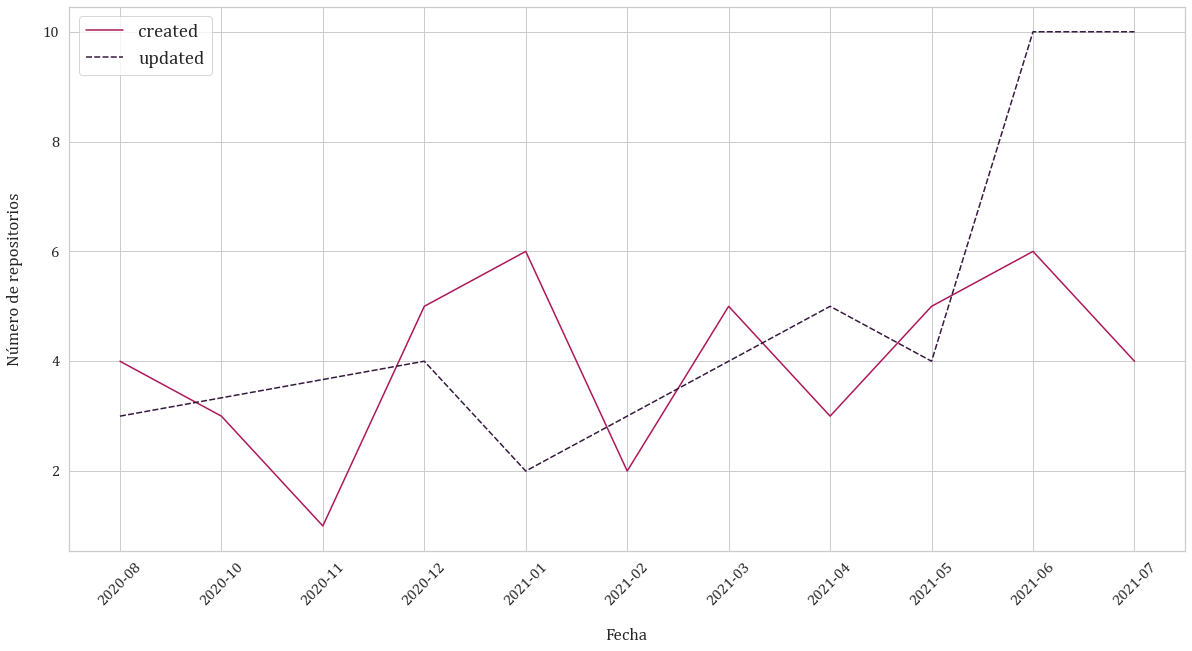

In [293]:
fig = plt.figure(figsize=(20,10))

palette = [color[2], color[0]]

g = sns.lineplot(data = df_cepas_created_y_updated.loc["2020-08":"2021-07"], palette=palette)

plt.xticks(rotation=45)

plt.ylabel('Número de repositorios', size=17, labelpad=20) 
plt.xlabel('Fecha', size=17, labelpad=20)
# plt.yticks(np.arange(0, 30000, 2500))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

### Países

In [297]:
repos_relacionados_cepas_paises = repos_relacionados_cepas.groupby(["country_name"]).size()
repos_relacionados_cepas_paises = repos_relacionados_cepas_paises.sort_values(ascending = False)
repos_relacionados_cepas_paises = repos_relacionados_cepas_paises.to_frame()
repos_relacionados_cepas_paises.columns = ["num_repos"]
repos_relacionados_cepas_paises

num_repos
country_name                                
United States                             24
India                                     12
Indonesia                                  3
United Kingdom                             3
Brazil                                     3
Australia                                  2
Canada                                     2
China                                      2
Denmark                                    2
Germany                                    2
Japan                                      2
Switzerland                                2
Singapore                                  1
Turkey                                     1
Thailand                                   1
South Africa                               1
Malaysia                                   1
Portugal                                   1
Poland                                     1
Netherlands                                1
Mexico                                     1
Korea, Republic of                         1
Kenya                                      1
Italy                                      1
Venezuela, Bolivarian Republic of          1

In [298]:
repos_relacionados_cepas_paises_y_millon_habitantes = repos_relacionados_cepas_paises.copy()

In [299]:
population = pd.read_csv("population_by_country_2020_kaggle.csv")
population = population[["Country (or dependency)", "Population (2020)"]]
population.rename(columns={ population.columns[0]: "name" }, inplace = True)
population.rename(columns={ population.columns[1]: "pop2020" }, inplace = True)

In [300]:
#Cambiamos el nombre de Corea del Sur por su nombre oficial, para que lo detecte el merge posterior con el df de repositorios
population.loc[population.name == "South Korea", "name"] = "Korea, Republic of"

In [302]:
repos_relacionados_cepas_paises_y_millon_habitantes = pd.merge(left=repos_relacionados_cepas_paises_y_millon_habitantes, right=population, how='left', 
                                 left_on=repos_relacionados_cepas_paises_y_millon_habitantes.index, right_on='name')

In [303]:
def get_num_repos_mes_por_millon_habitantes(df):
    num_repos = df["num_repos"]
    population = df["pop2020"]

    res = ( (1000000 * num_repos) / population )
    return res

In [304]:
repos_relacionados_cepas_paises_y_millon_habitantes["num_repos_per_million"] = repos_relacionados_cepas_paises_y_millon_habitantes.apply(get_num_repos_mes_por_millon_habitantes, 
                                                                                         axis = 1)

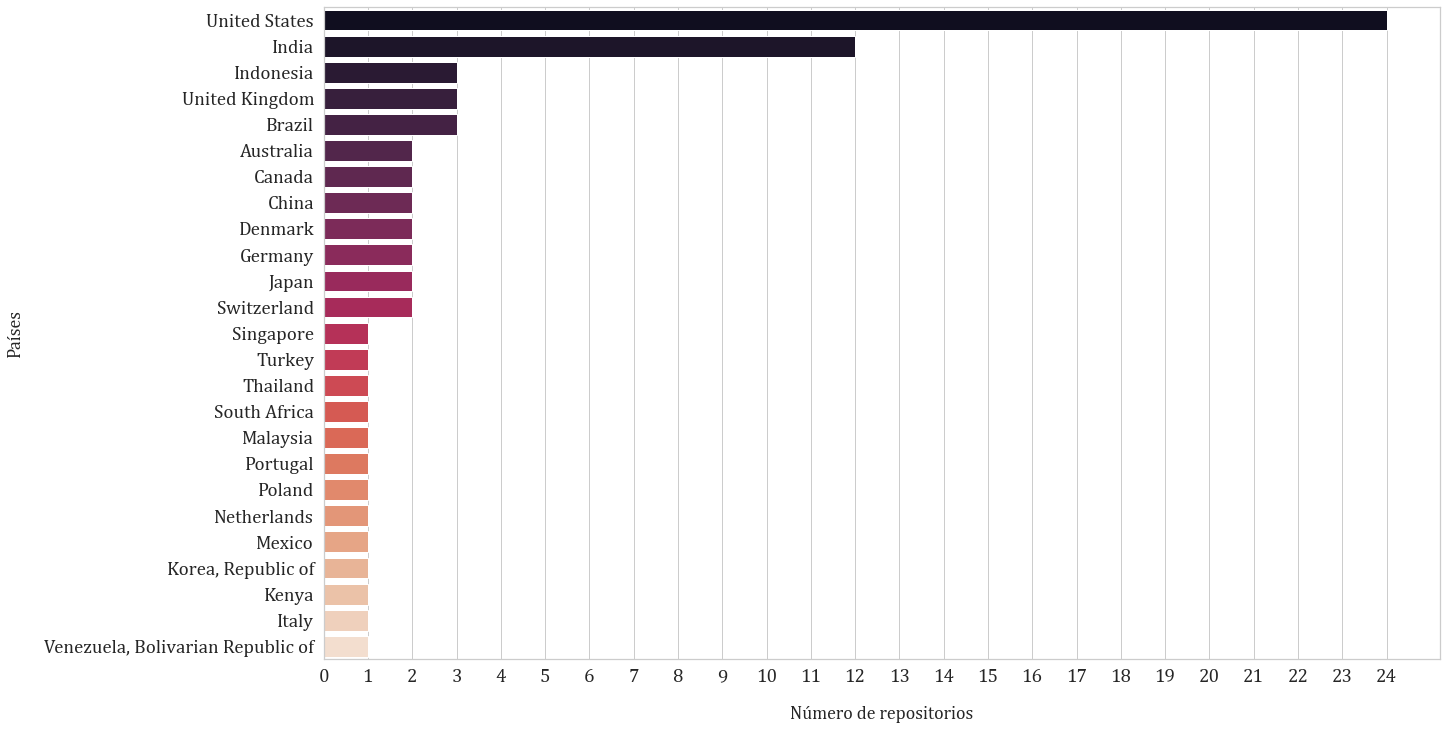

In [309]:
fig = plt.figure(figsize=(20,12))

sns.barplot(y="name", x='num_repos', data=repos_relacionados_cepas_paises_y_millon_habitantes, palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios', size=18, labelpad=20)
plt.xticks(np.arange(0, 25, 1))
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

In [311]:
repos_relacionados_cepas_paises_y_millon_habitantes_sorted = repos_relacionados_cepas_paises_y_millon_habitantes.sort_values(by="num_repos_per_million", ascending = False)

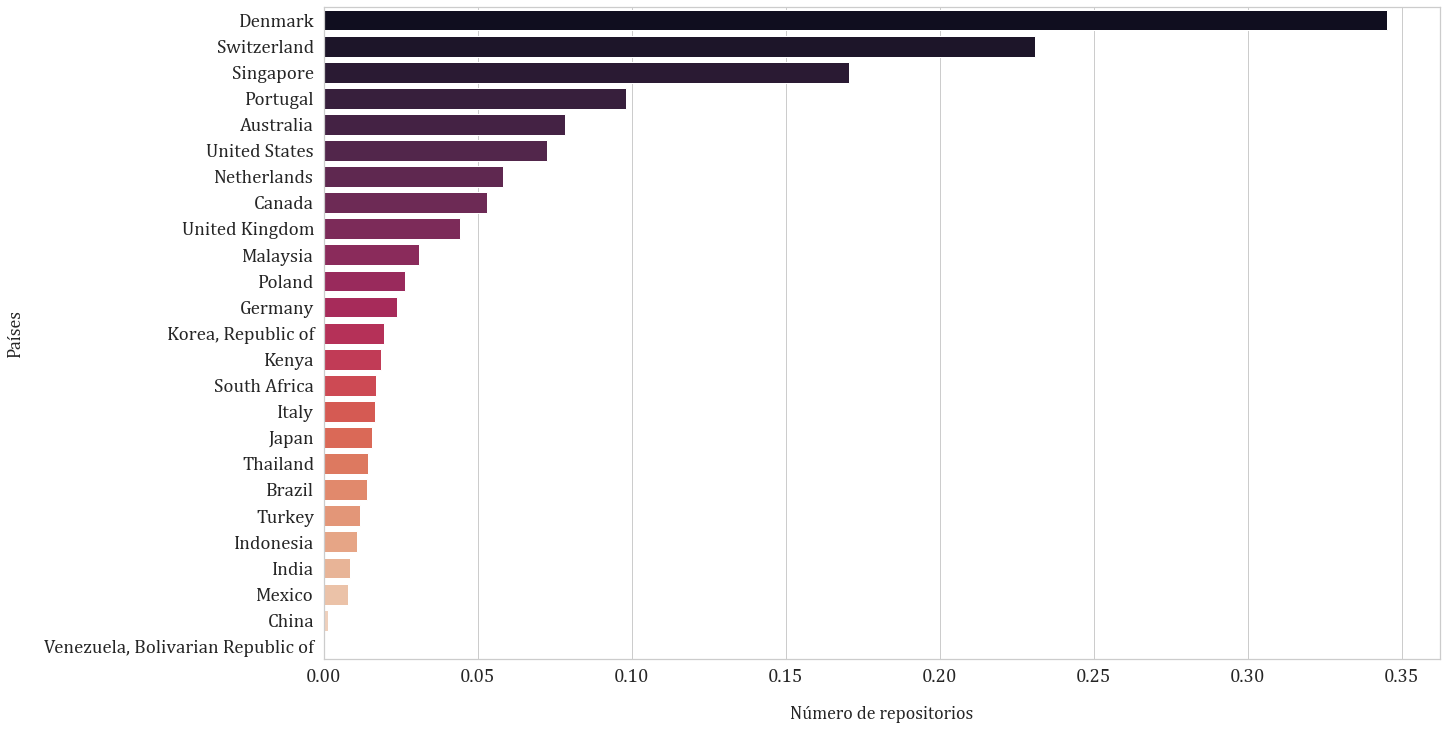

In [313]:
fig = plt.figure(figsize=(20,12))

sns.barplot(y="name", x='num_repos_per_million', data=repos_relacionados_cepas_paises_y_millon_habitantes_sorted, palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios', size=18, labelpad=20)
# plt.xticks(np.arange(0, 2, 1))
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

In [ ]:
#alpha, beta, gamma delta

**Variante Alpha**

In [314]:
repos_relacionados_cepas_paises_alpha = repos_relacionados_cepas[repos_relacionados_cepas.alpha == True].groupby(["country_name"]).size()
repos_relacionados_cepas_paises_alpha = repos_relacionados_cepas_paises_alpha.sort_values(ascending = False)
repos_relacionados_cepas_paises_alpha = repos_relacionados_cepas_paises_alpha.to_frame()
repos_relacionados_cepas_paises_alpha.columns = ["num_repos"]
repos_relacionados_cepas_paises_alpha

num_repos
country_name            
United States          5
Denmark                2
Canada                 1
China                  1
Japan                  1
Switzerland            1

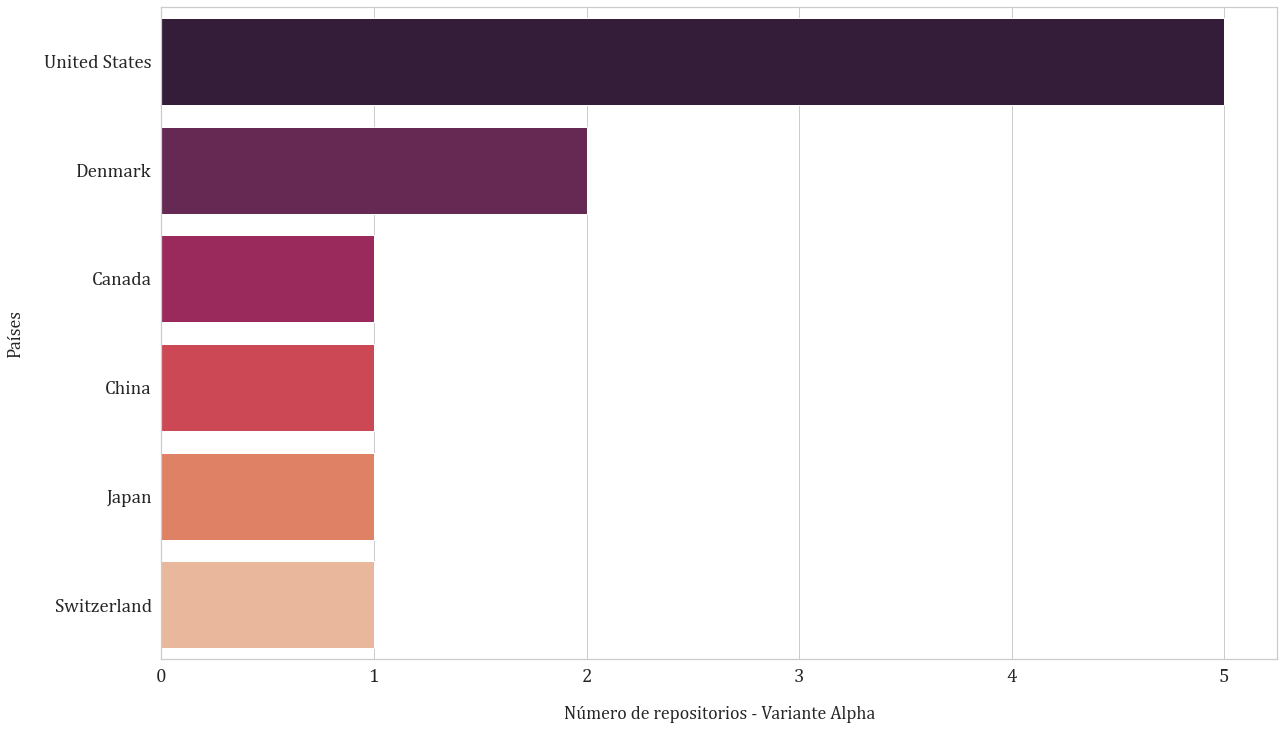

In [325]:
fig = plt.figure(figsize=(20,12))

sns.barplot(y=repos_relacionados_cepas_paises_alpha.index, x='num_repos', data=repos_relacionados_cepas_paises_alpha, palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios - Variante Alpha', size=18, labelpad=20)
plt.xticks(np.arange(0, 6, 1))
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

**Variante Beta**

In [320]:
repos_relacionados_cepas_paises_beta = repos_relacionados_cepas[repos_relacionados_cepas.beta == True].groupby(["country_name"]).size()
repos_relacionados_cepas_paises_beta = repos_relacionados_cepas_paises_beta.sort_values(ascending = False)
repos_relacionados_cepas_paises_beta = repos_relacionados_cepas_paises_beta.to_frame()
repos_relacionados_cepas_paises_beta.columns = ["num_repos"]
repos_relacionados_cepas_paises_beta

num_repos
country_name            
United States          4
Canada                 1
Japan                  1
Switzerland            1

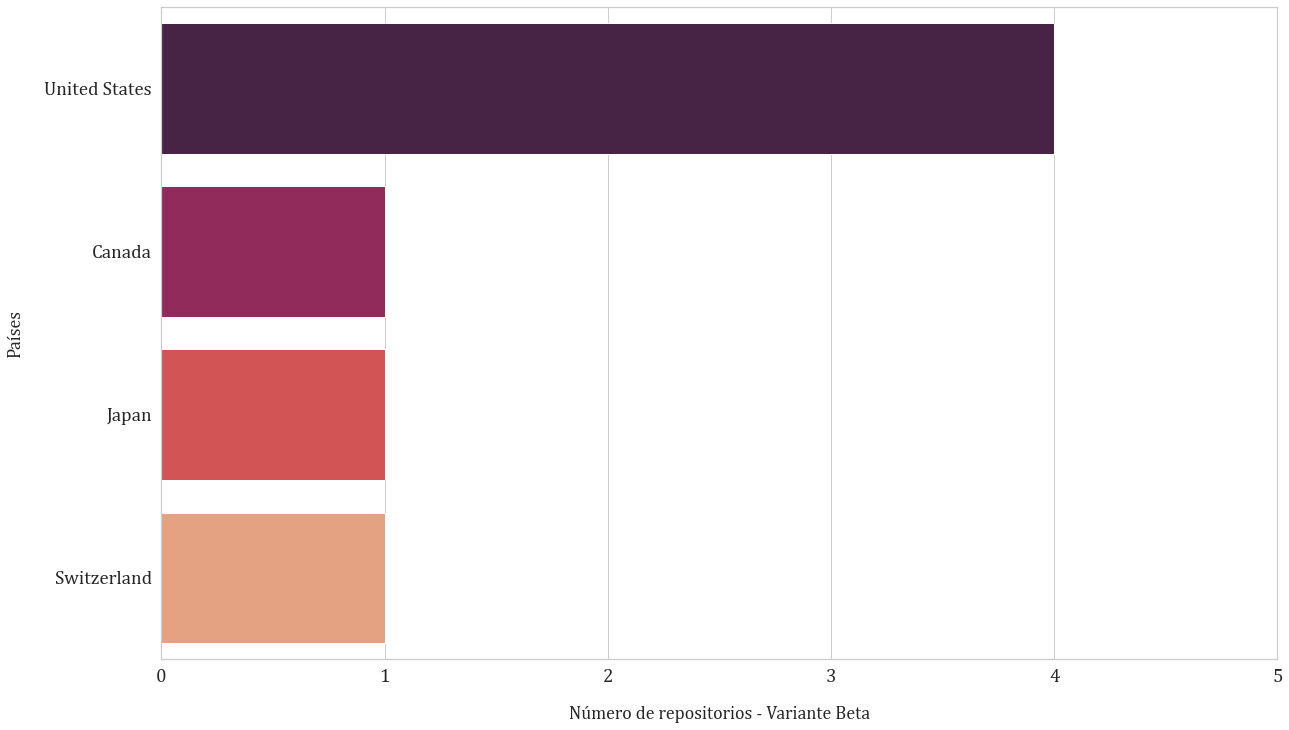

In [326]:
fig = plt.figure(figsize=(20,12))

sns.barplot(y=repos_relacionados_cepas_paises_beta.index, x='num_repos', data=repos_relacionados_cepas_paises_beta, palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios - Variante Beta', size=18, labelpad=20)
plt.xticks(np.arange(0, 6, 1))
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

**Variante Gamma**

In [327]:
repos_relacionados_cepas_paises_gamma = repos_relacionados_cepas[repos_relacionados_cepas.gamma == True].groupby(["country_name"]).size()
repos_relacionados_cepas_paises_gamma = repos_relacionados_cepas_paises_gamma.sort_values(ascending = False)
repos_relacionados_cepas_paises_gamma = repos_relacionados_cepas_paises_gamma.to_frame()
repos_relacionados_cepas_paises_gamma.columns = ["num_repos"]
repos_relacionados_cepas_paises_gamma

num_repos
country_name             
United States           9
Brazil                  2
Canada                  2
China                   2
Australia               1
Indonesia               1
Japan                   1
Netherlands             1
Portugal                1
Switzerland             1
Thailand                1
Turkey                  1
United Kingdom          1

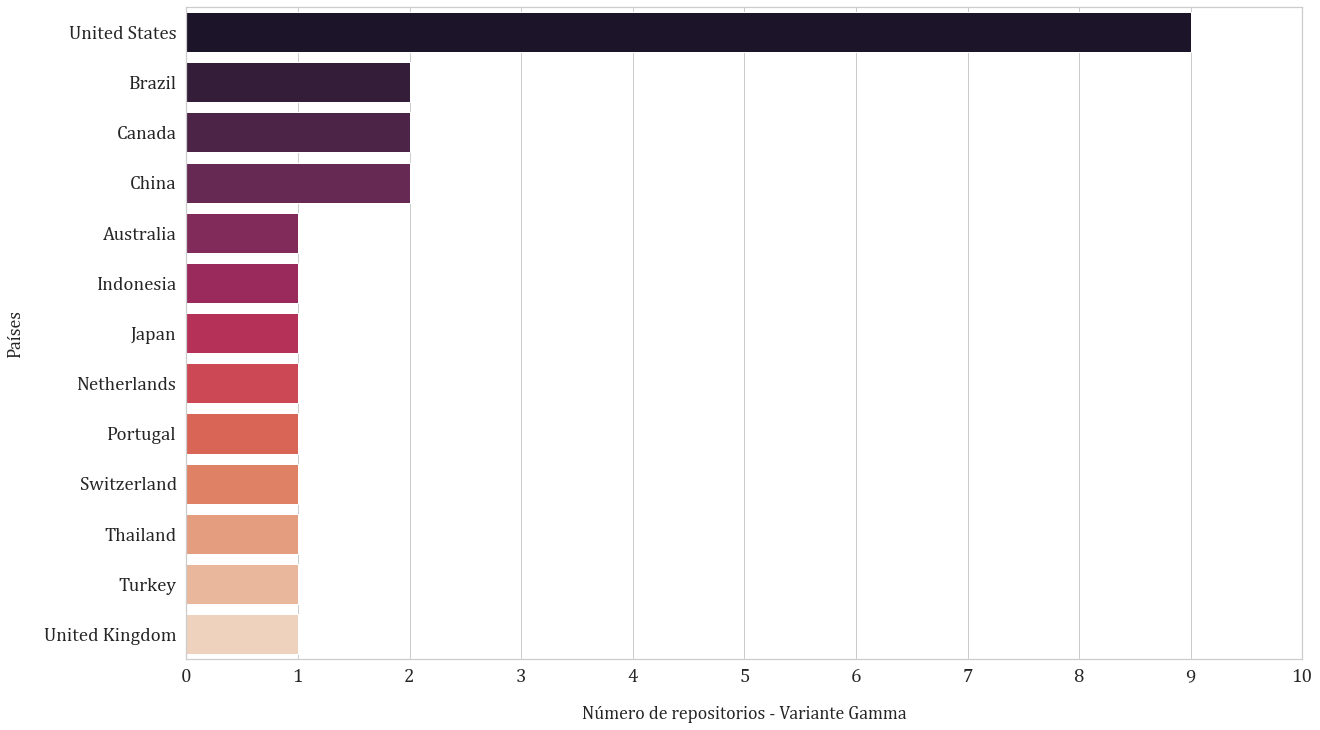

In [332]:
fig = plt.figure(figsize=(20,12))

sns.barplot(y=repos_relacionados_cepas_paises_gamma.index, x='num_repos', data=repos_relacionados_cepas_paises_gamma, palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios - Variante Gamma', size=18, labelpad=20)
plt.xticks(np.arange(0, 11, 1))
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

**Variante Delta**

In [329]:
repos_relacionados_cepas_paises_delta = repos_relacionados_cepas[repos_relacionados_cepas.delta == True].groupby(["country_name"]).size()
repos_relacionados_cepas_paises_delta = repos_relacionados_cepas_paises_delta.sort_values(ascending = False)
repos_relacionados_cepas_paises_delta = repos_relacionados_cepas_paises_delta.to_frame()
repos_relacionados_cepas_paises_delta.columns = ["num_repos"]
repos_relacionados_cepas_paises_delta

num_repos
country_name                                
United States                             16
India                                     12
Germany                                    2
Indonesia                                  2
Japan                                      2
United Kingdom                             2
Switzerland                                2
Australia                                  1
Poland                                     1
South Africa                               1
Singapore                                  1
Malaysia                                   1
Mexico                                     1
Brazil                                     1
Korea, Republic of                         1
Kenya                                      1
Italy                                      1
Venezuela, Bolivarian Republic of          1

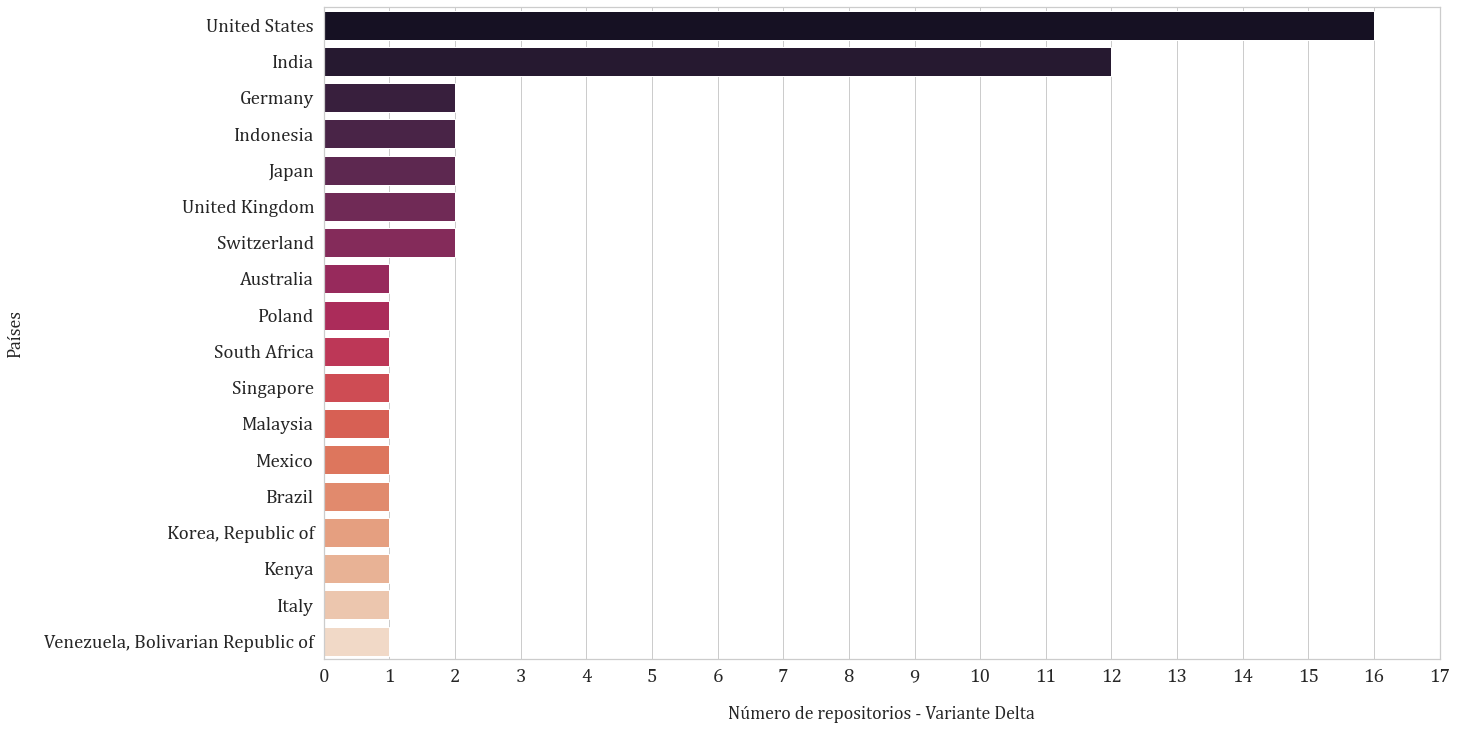

In [331]:
fig = plt.figure(figsize=(20,12))

sns.barplot(y=repos_relacionados_cepas_paises_delta.index, x='num_repos', data=repos_relacionados_cepas_paises_delta, palette='rocket')
plt.ylabel('Países', size=18, labelpad=20) 
plt.xlabel('Número de repositorios - Variante Delta', size=18, labelpad=20)
plt.xticks(np.arange(0, 18, 1))
plt.tick_params(axis='both', which='major', labelsize=19)
plt.show()

-------

--------

## Pruebas de la visualización de los ficheros READMEs

In [13]:
import base64

token = "" # Rellenar con token generado en GitHub
header = {'Authorization': 'token %s' % token}

response = requests.get('https://api.github.com/repos/'+"CSSEGISandData/COVID-19"+'/readme', headers=header)
response_json = response.json()
decoded_readme = base64.b64decode(response_json["content"])
print(decoded_readme)

b'# COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University\n\n\nThis is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).\n\n\n\n<b>Visual Dashboard (desktop):</b>\nhttps://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6\n\n<b>Visual Dashboard (mobile):</b>\nhttp://www.arcgis.com/apps/opsdashboard/index.html#/85320e2ea5424dfaaa75ae62e5c06e61\n\n<b>Please cite our Lancet Article for any use of this data in a publication:</b>\n[An interactive web-based dashboard to track COVID-19 in real time](https://doi.org/10.1016/S1473-3099(20)30120-1)\n\n<b>Provided by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE):</b>\nhttps://systems.jhu.edu/\n\n<b>DONATE to the CSS

In [14]:
import markdown
from bs4 import BeautifulSoup
string_readme = "".join(BeautifulSoup(decoded_readme).findAll(text=True))
print(string_readme)

# COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University


This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).



Visual Dashboard (desktop):
https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Visual Dashboard (mobile):
http://www.arcgis.com/apps/opsdashboard/index.html#/85320e2ea5424dfaaa75ae62e5c06e61

Please cite our Lancet Article for any use of this data in a publication:
[An interactive web-based dashboard to track COVID-19 in real time](https://doi.org/10.1016/S1473-3099(20)30120-1)

Provided by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE):
https://systems.jhu.edu/

DONATE to the CSSE dashboard team: https://engineering.jhu.edu/covid-

In [21]:
a = BeautifulSoup(decoded_readme)
a

<html><body><p># COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University


This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).



<b>Visual Dashboard (desktop):</b>
https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

<b>Visual Dashboard (mobile):</b>
http://www.arcgis.com/apps/opsdashboard/index.html#/85320e2ea5424dfaaa75ae62e5c06e61

<b>Please cite our Lancet Article for any use of this data in a publication:</b>
[An interactive web-based dashboard to track COVID-19 in real time](https://doi.org/10.1016/S1473-3099(20)30120-1)

<b>Provided by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE):</b>
https://systems.jhu.edu/

<b>DONATE to the CSSE dash

In [20]:
import re
from markdown import markdown

html = markdown(decoded_readme)
html
# # remove code snippets
# html = re.sub(r'<pre>(.*?)</pre>', ' ', html)
# html = re.sub(r'<code>(.*?)</code >', ' ', html)

# # extract text
# soup = BeautifulSoup(html, "html.parser")
# text = ''.join(soup.findAll(text=True))
# print(text)

'<p>b\'# COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University\\n\\n\\nThis is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).\\n\\n\\n\\n<b>Visual Dashboard (desktop):</b>\\nhttps://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6\\n\\n<b>Visual Dashboard (mobile):</b>\\nhttp://www.arcgis.com/apps/opsdashboard/index.html#/85320e2ea5424dfaaa75ae62e5c06e61\\n\\n<b>Please cite our Lancet Article for any use of this data in a publication:</b>\\n<a href="https://doi.org/10.1016/S1473-3099(20)30120-1">An interactive web-based dashboard to track COVID-19 in real time</a>\\n\\n<b>Provided by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE):</b>\\nhttps://systems